In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import ttest_1samp

In [4]:
def percent_transform(matrix):
    normalization = np.sum(np.tril(matrix))
    if normalization:
        return np.tril(matrix / normalization), True
    else:
        return np.zeros(matrix.shape), False

In [5]:
def normalized_transform(matrix):
    normalization = matrix[0,-1]
    if normalization:
        return np.tril(matrix / normalization), True
    else:
        return np.zeros(matrix.shape), False

In [6]:
def get_average_bcounts(path: Path, transform: callable = lambda x: (x, True), maximal = False):
    bcount_dict = {}
    averaged_count_dict = {}
    if maximal:
        file_list = path.glob("**/mbcounts.pkl")
    else:
        file_list = path.glob("**/bcounts.pkl")
    for file in file_list:
        file_results = pickle.load(open(file, 'rb'))
        for key in file_results.keys():
            c = bcount_dict.setdefault(key, np.zeros((key+1, key+1)))
            averaged_count_dict.setdefault(key, 0)
            transformed_matrix, is_successful = transform(file_results[key])
            if is_successful:
                bcount_dict[key] = c + transformed_matrix
                averaged_count_dict[key] += 1
    for key in bcount_dict.keys():
        if averaged_count_dict[key]:
            bcount_dict[key] /= averaged_count_dict[key]
    return bcount_dict
            
        
        

# Normal

## All

In [7]:
a = pickle.load(open(Path("data/worm/full/bcounts.pkl"),'rb'))
b = get_average_bcounts(Path("data/worm_control/bishuffled/"))
c = get_average_bcounts(Path("data/worm_control/underlying/"))

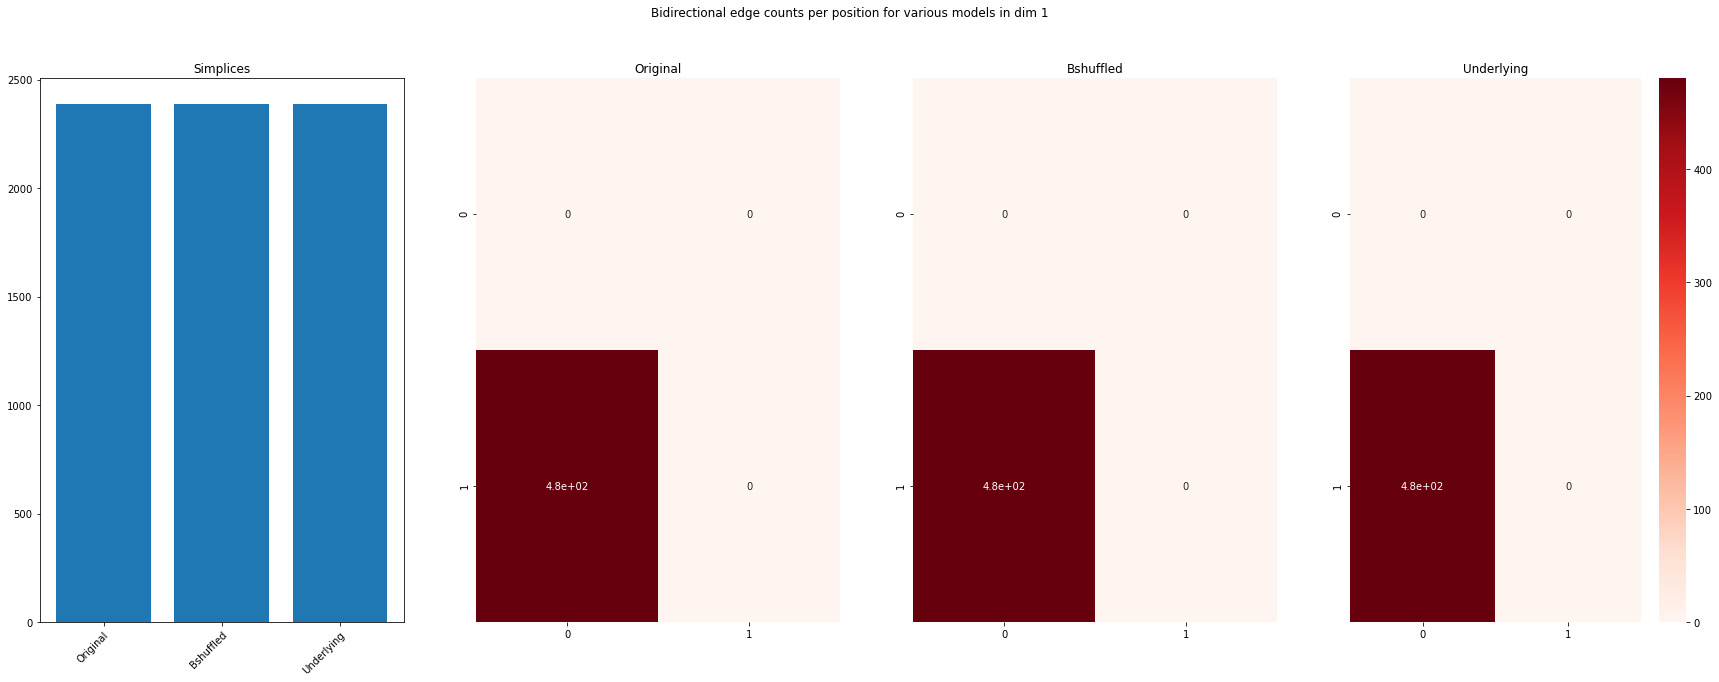

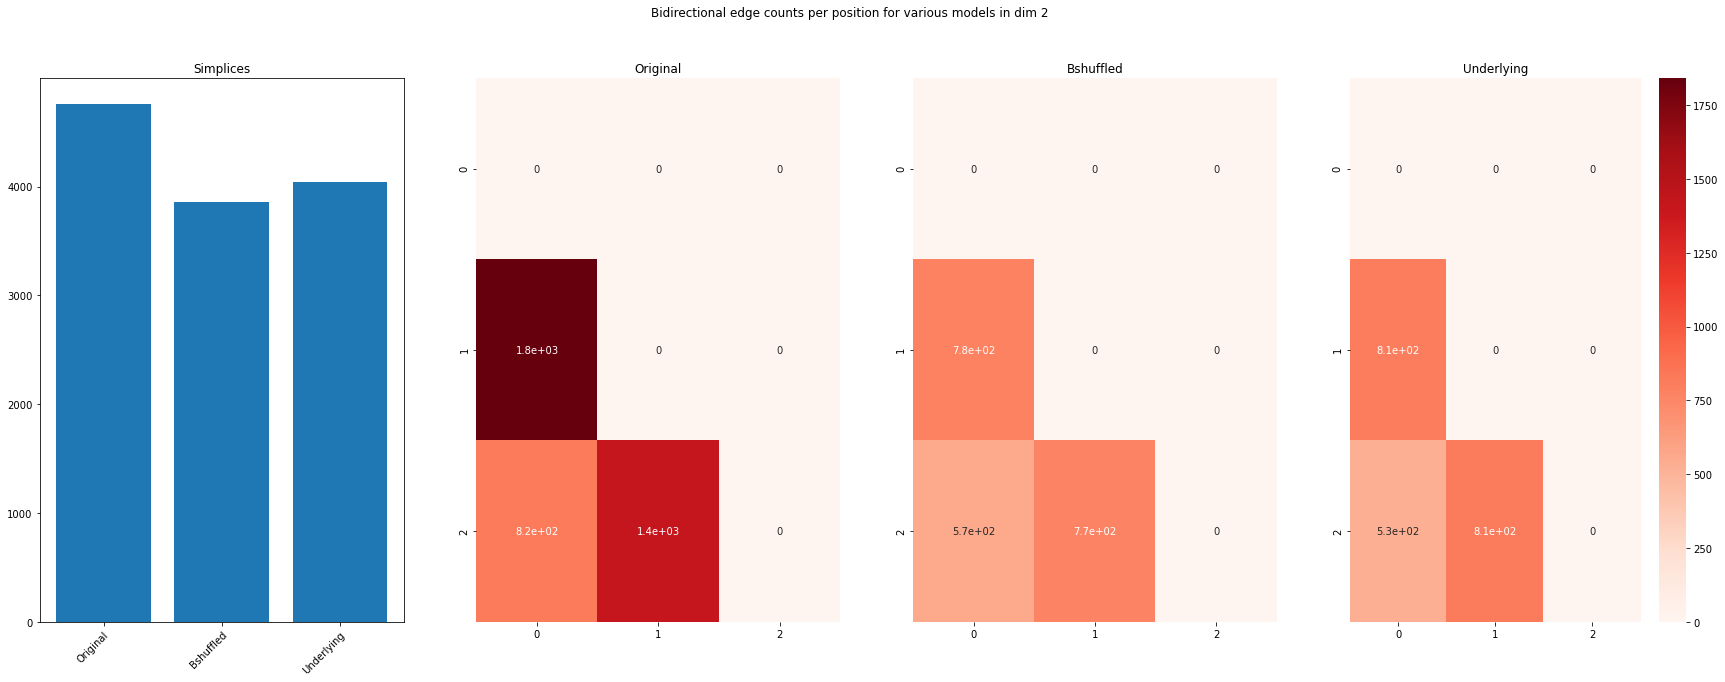

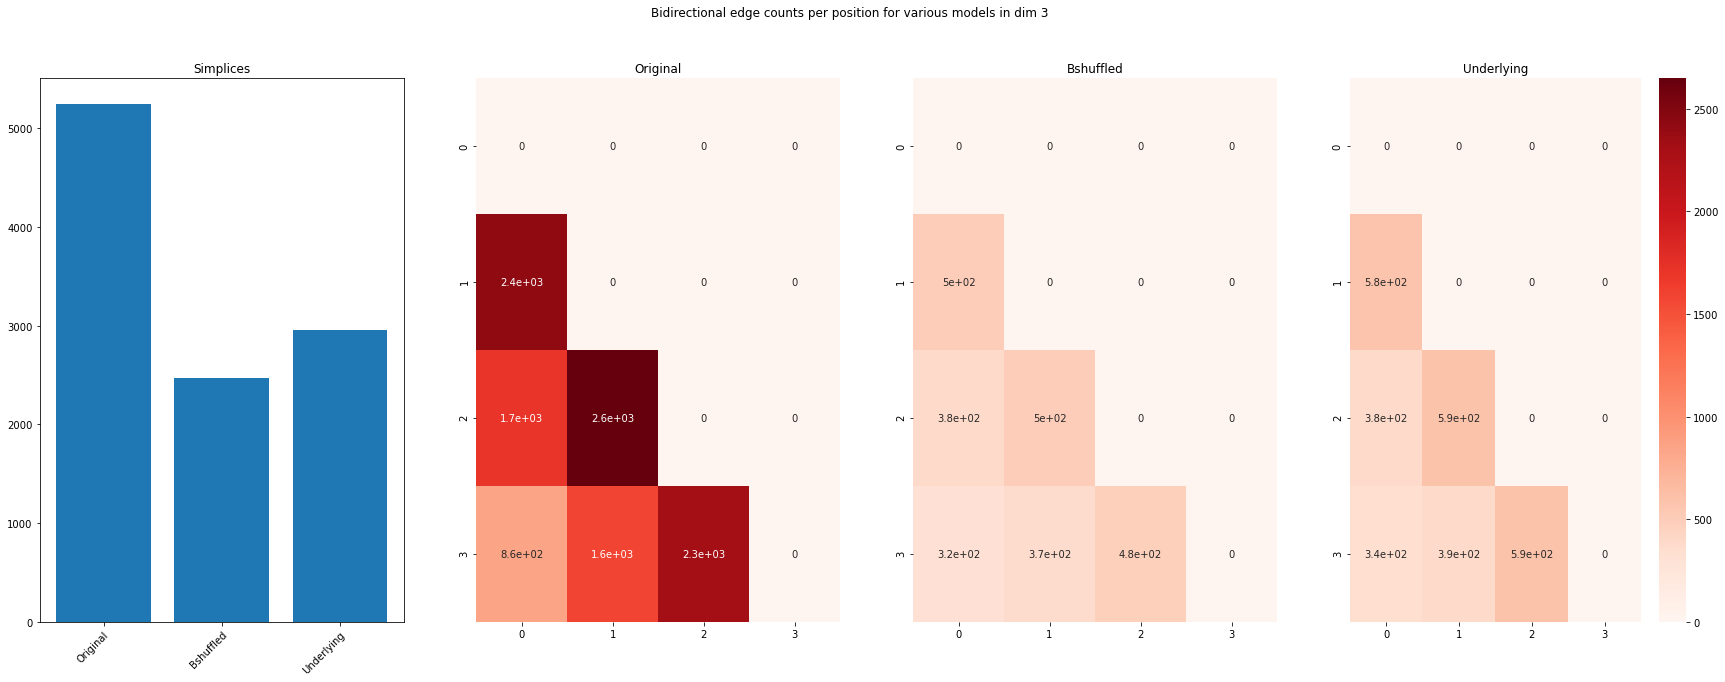

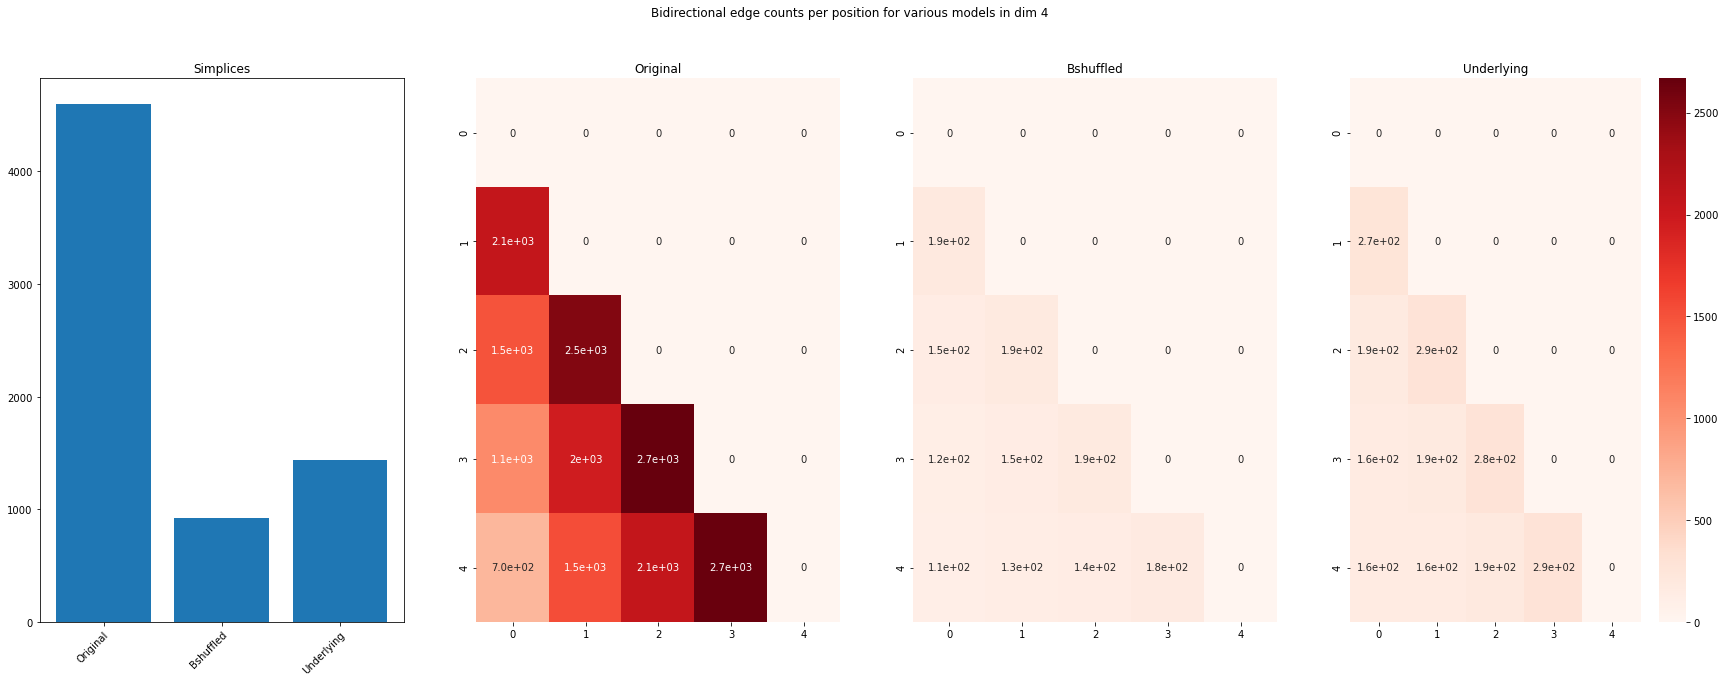

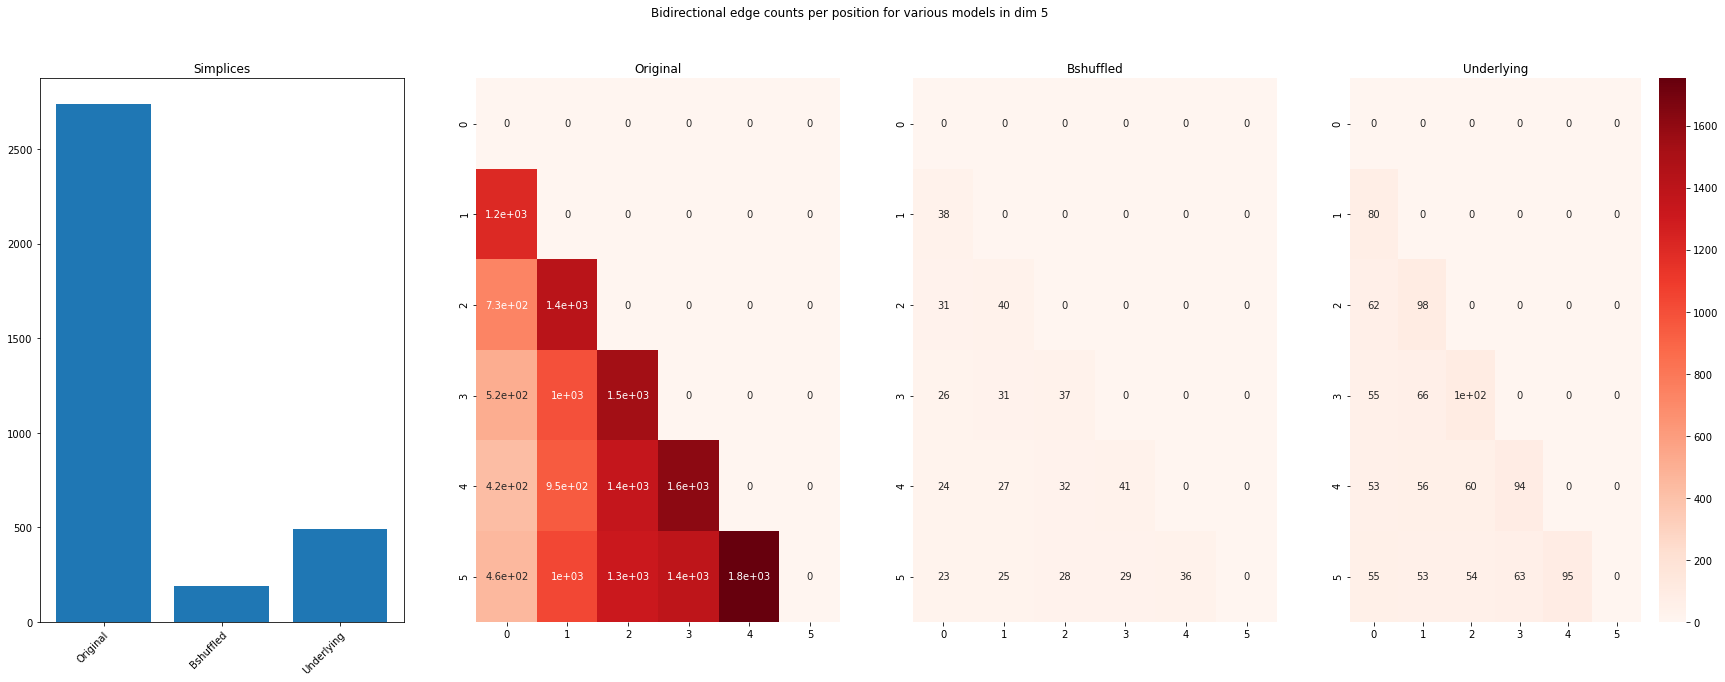

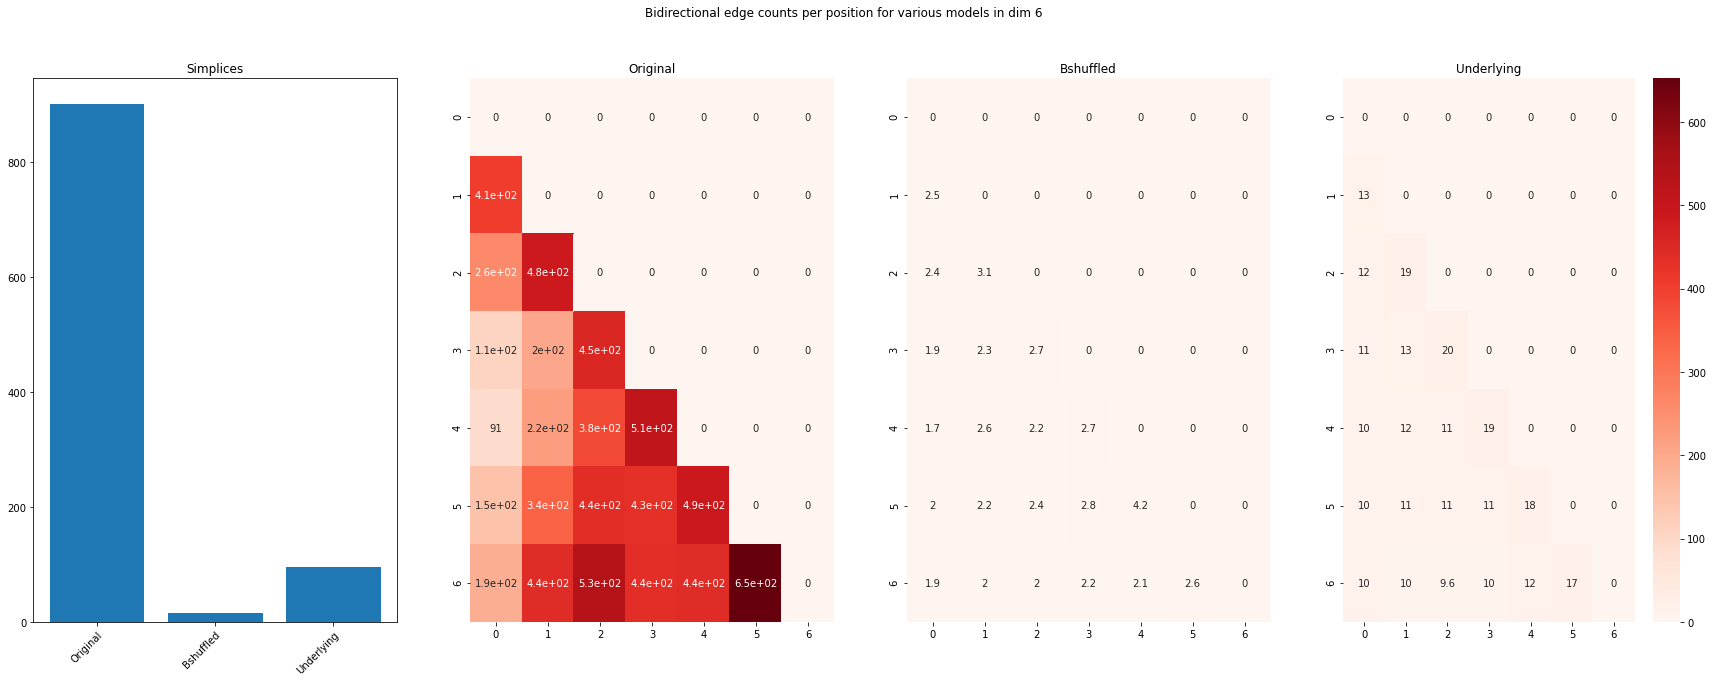

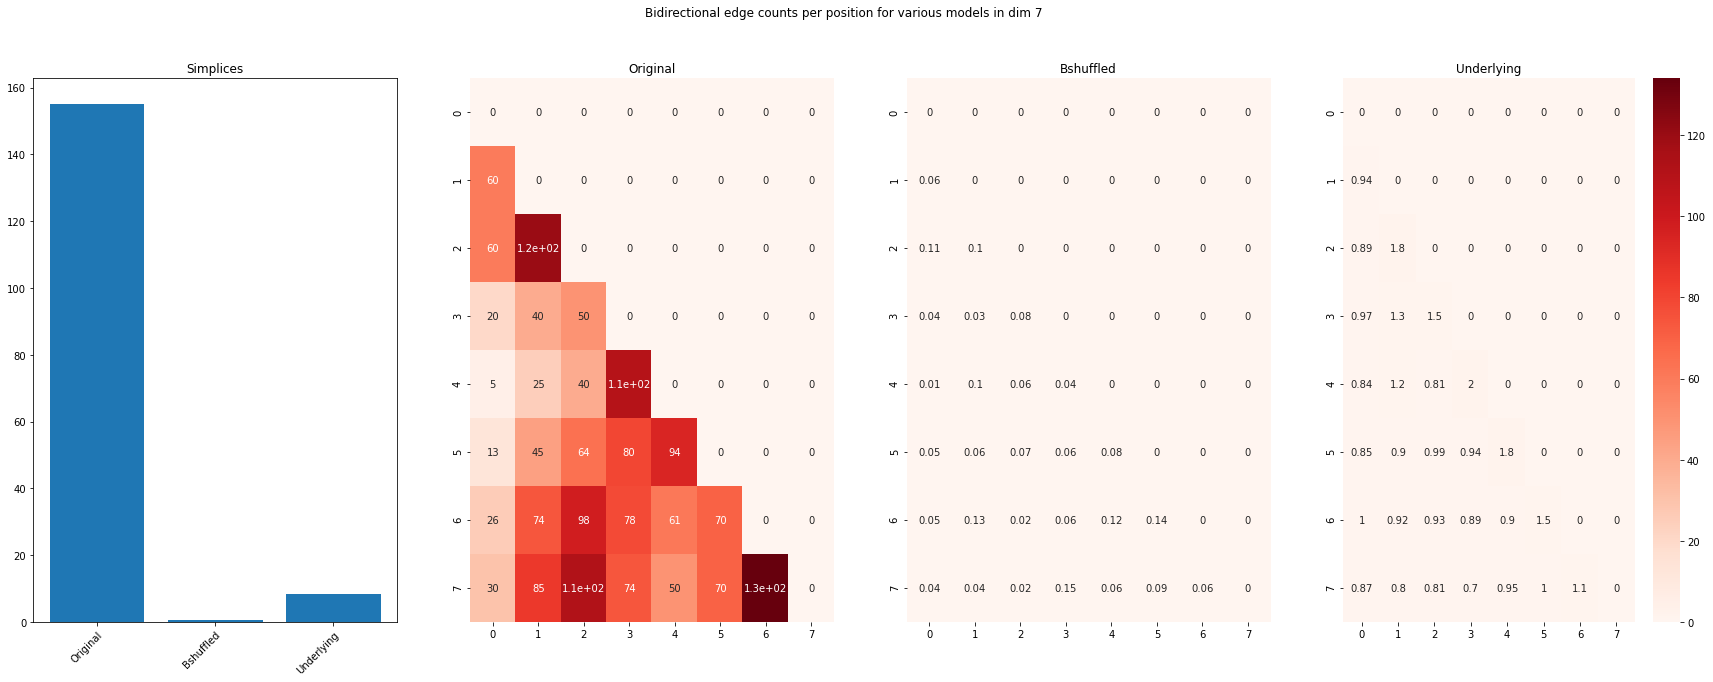

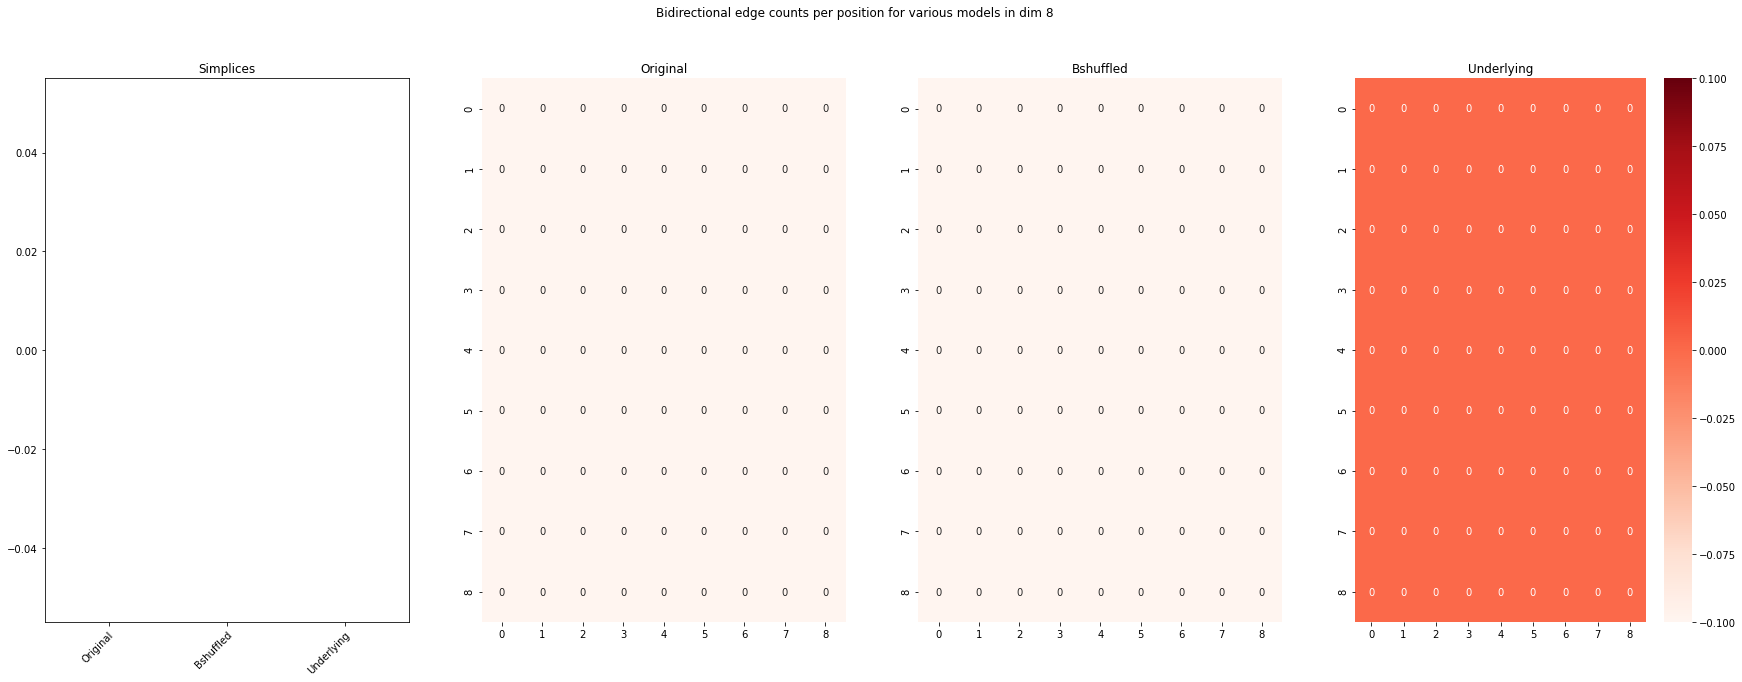

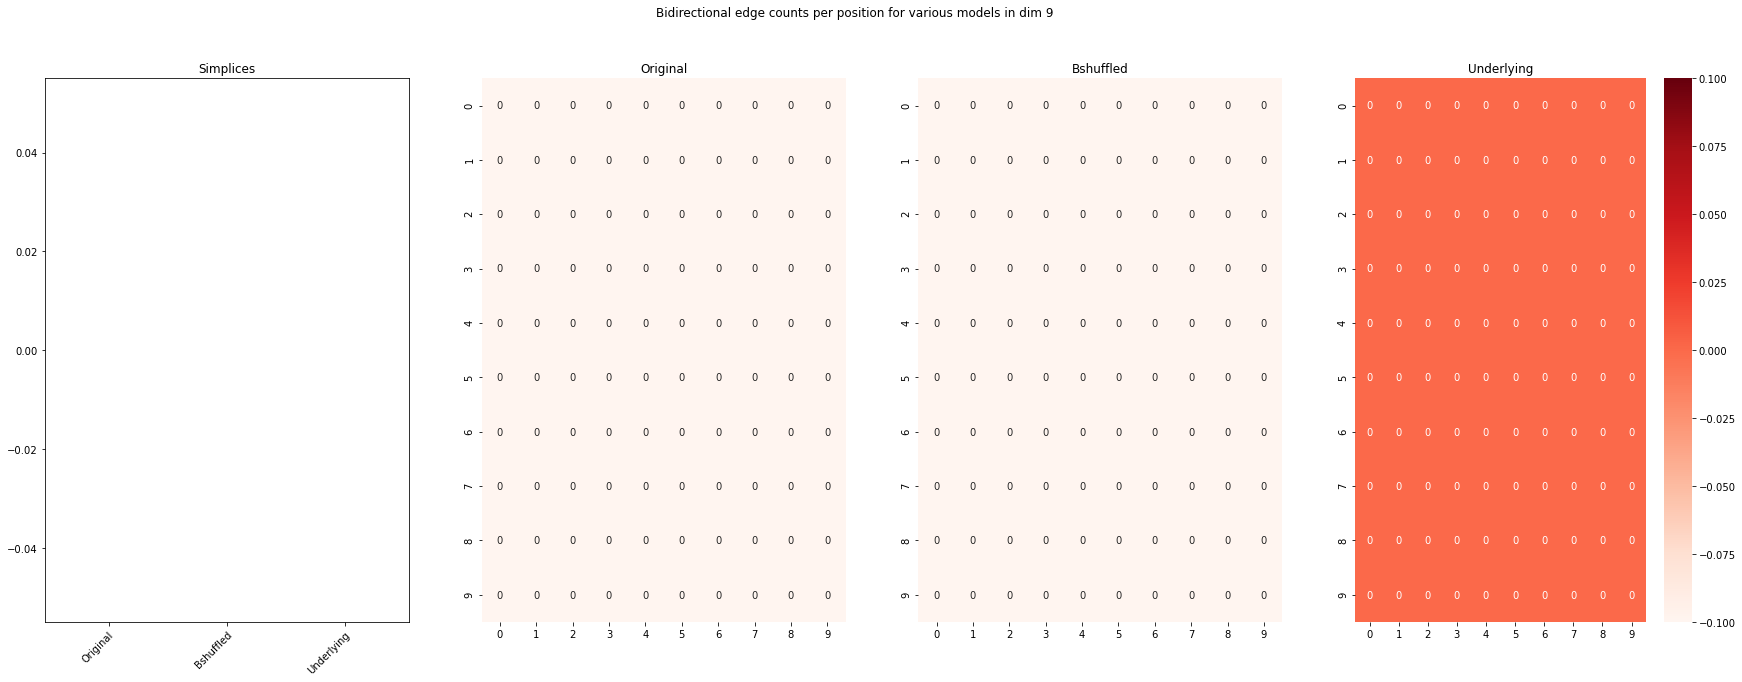

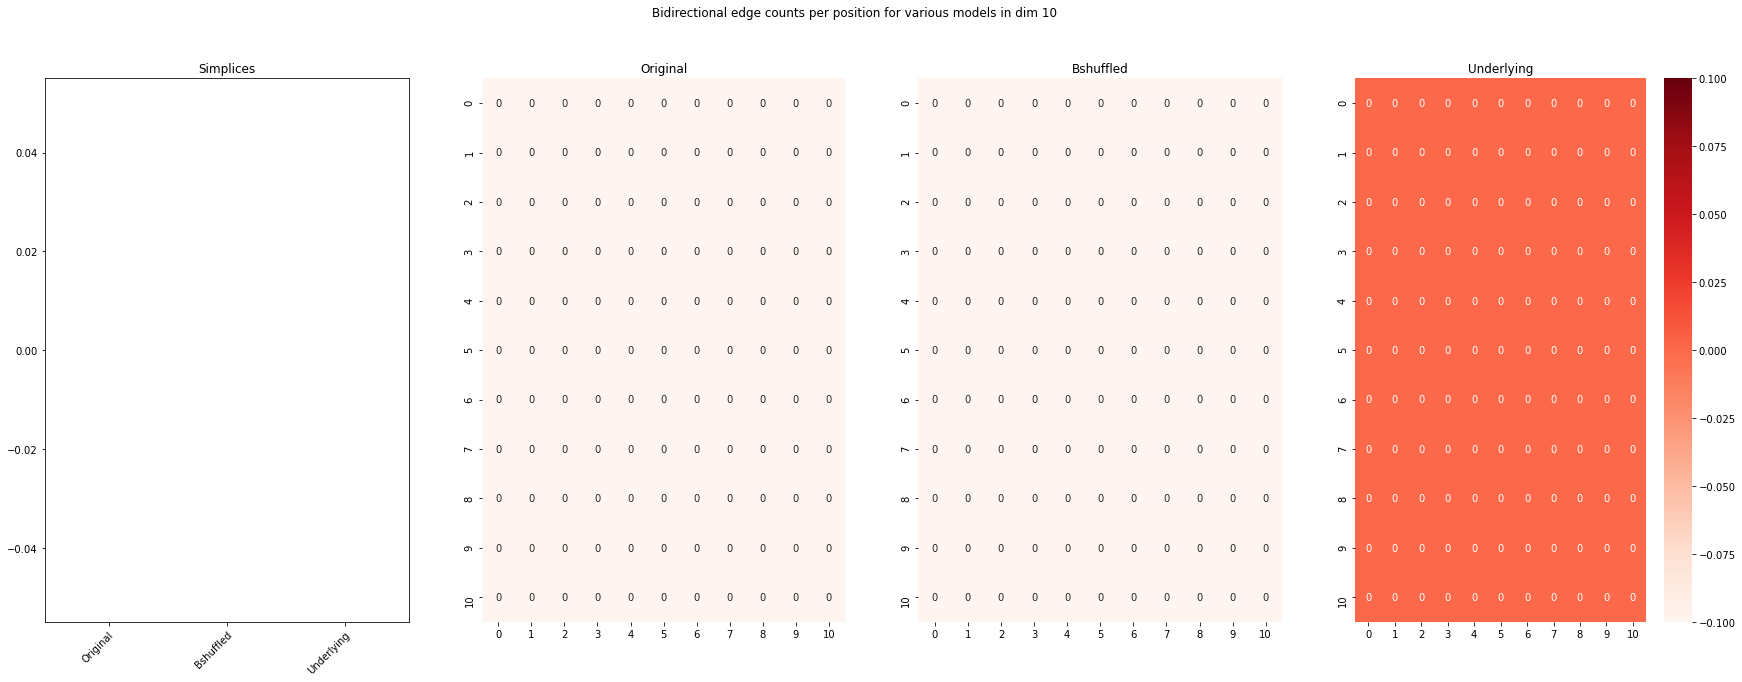

In [8]:
compare_graphs([a,b,c], 1, "worm_bcounts", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

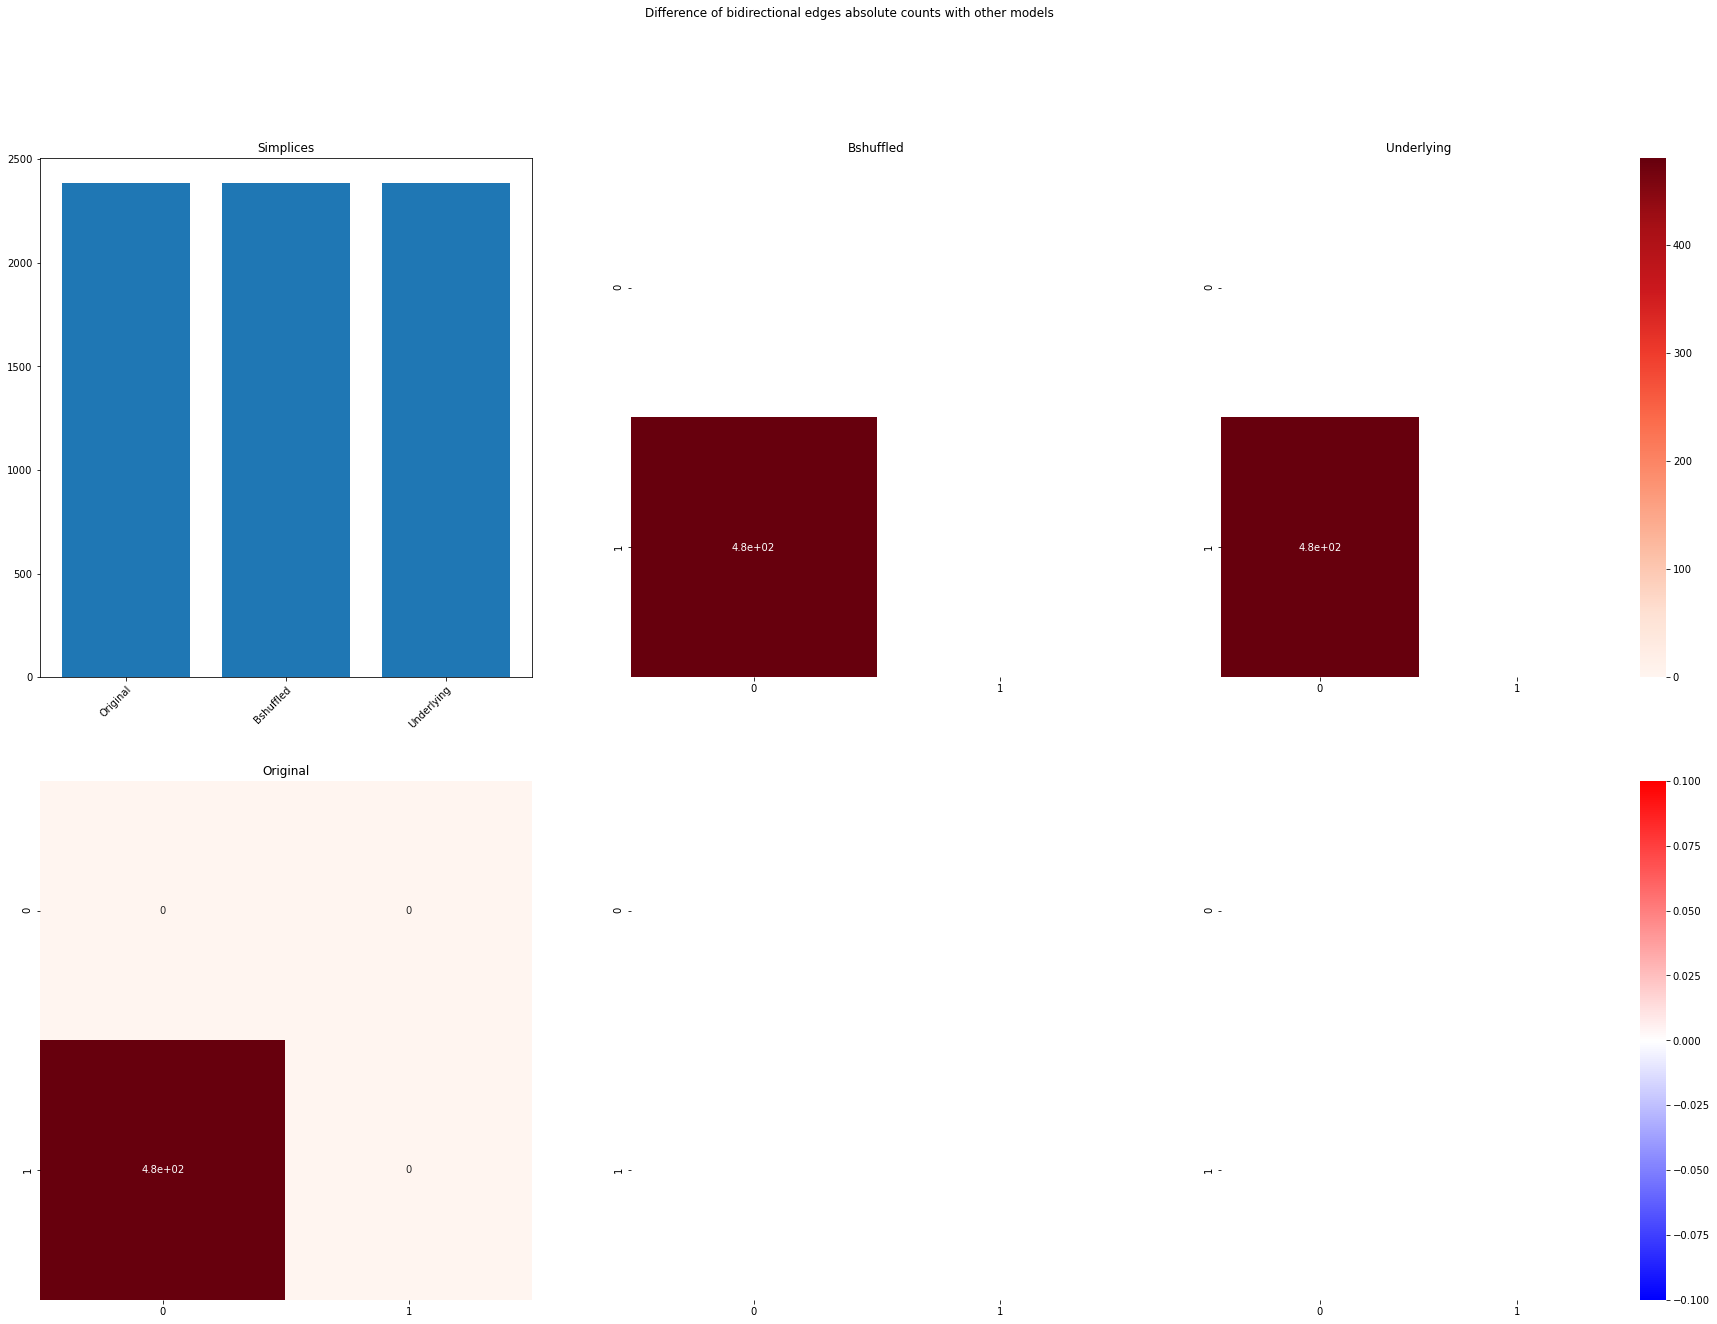

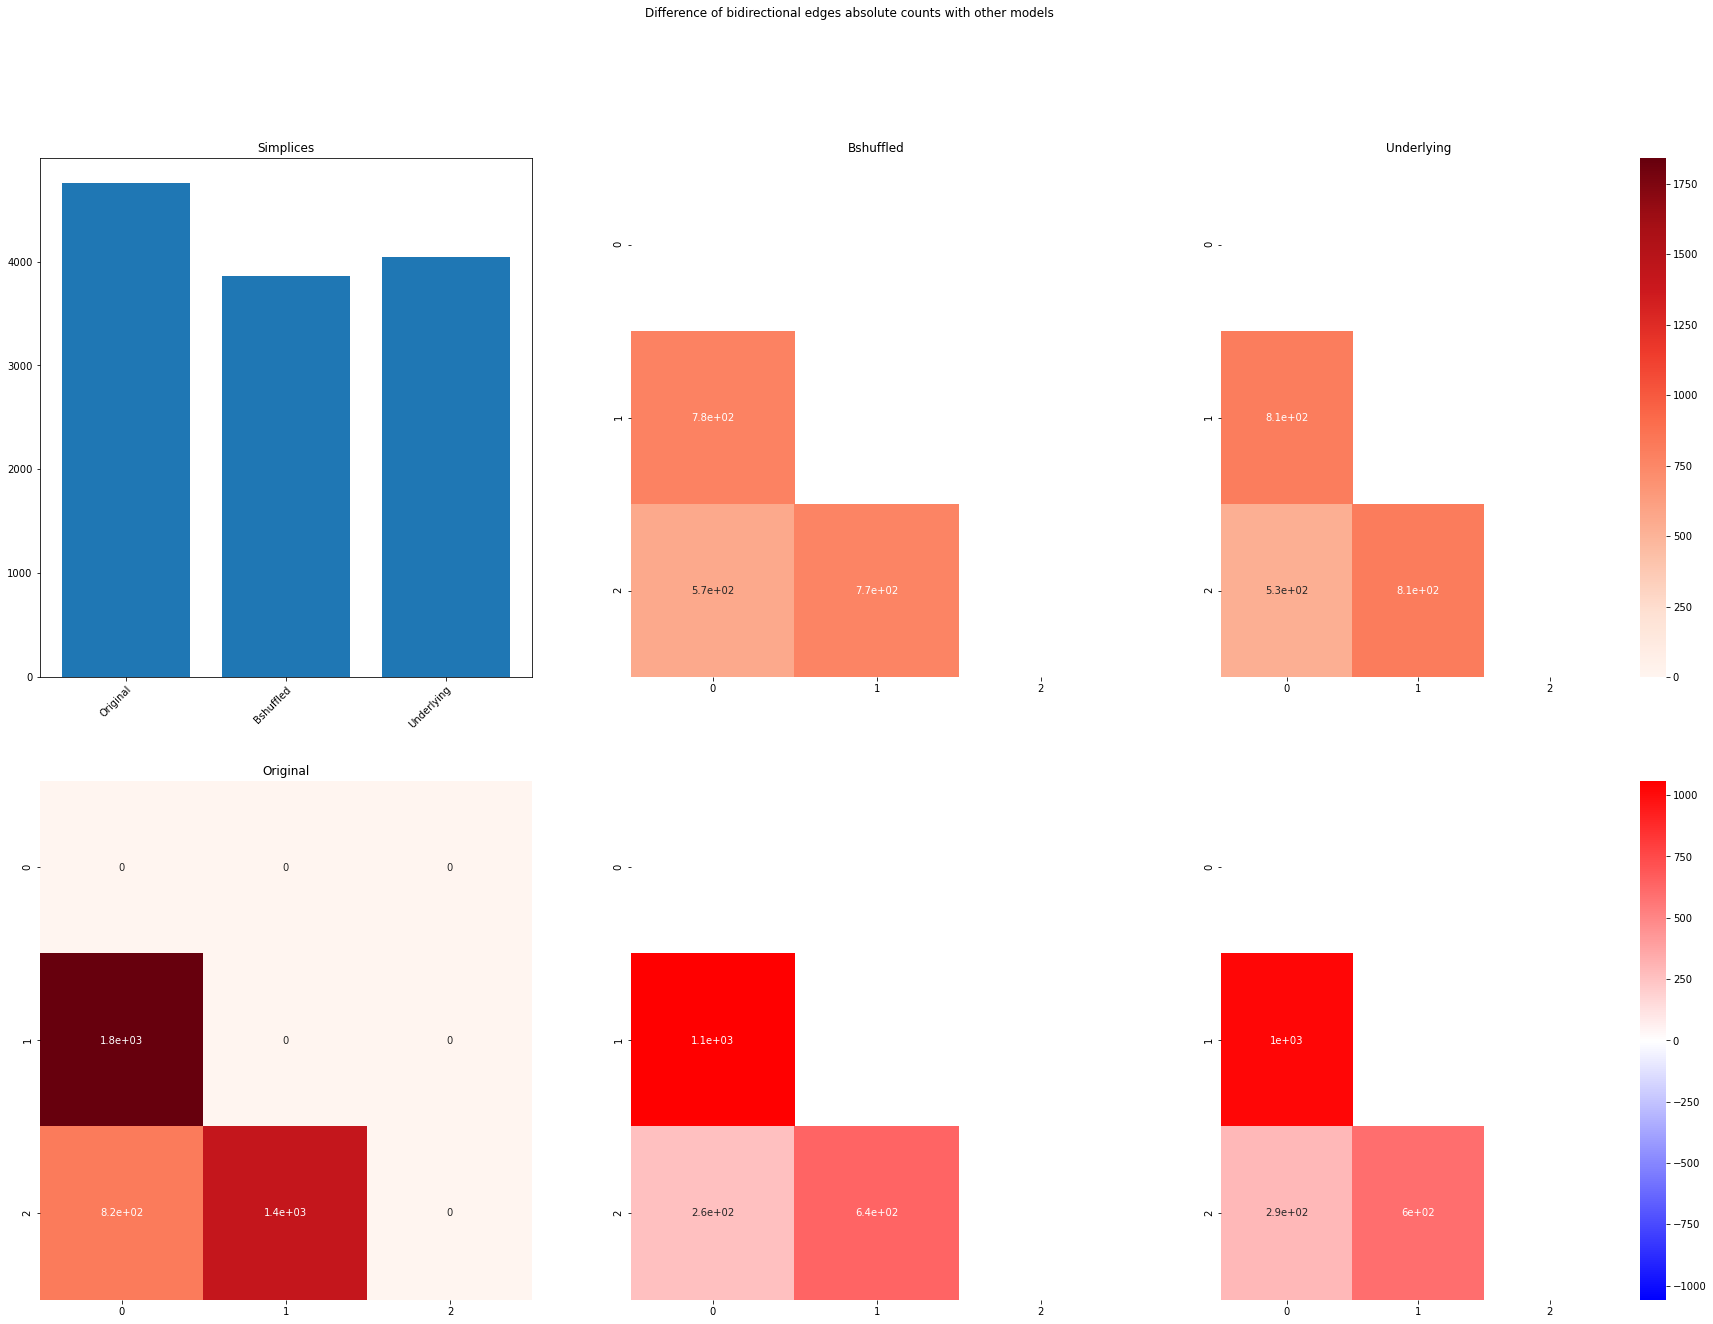

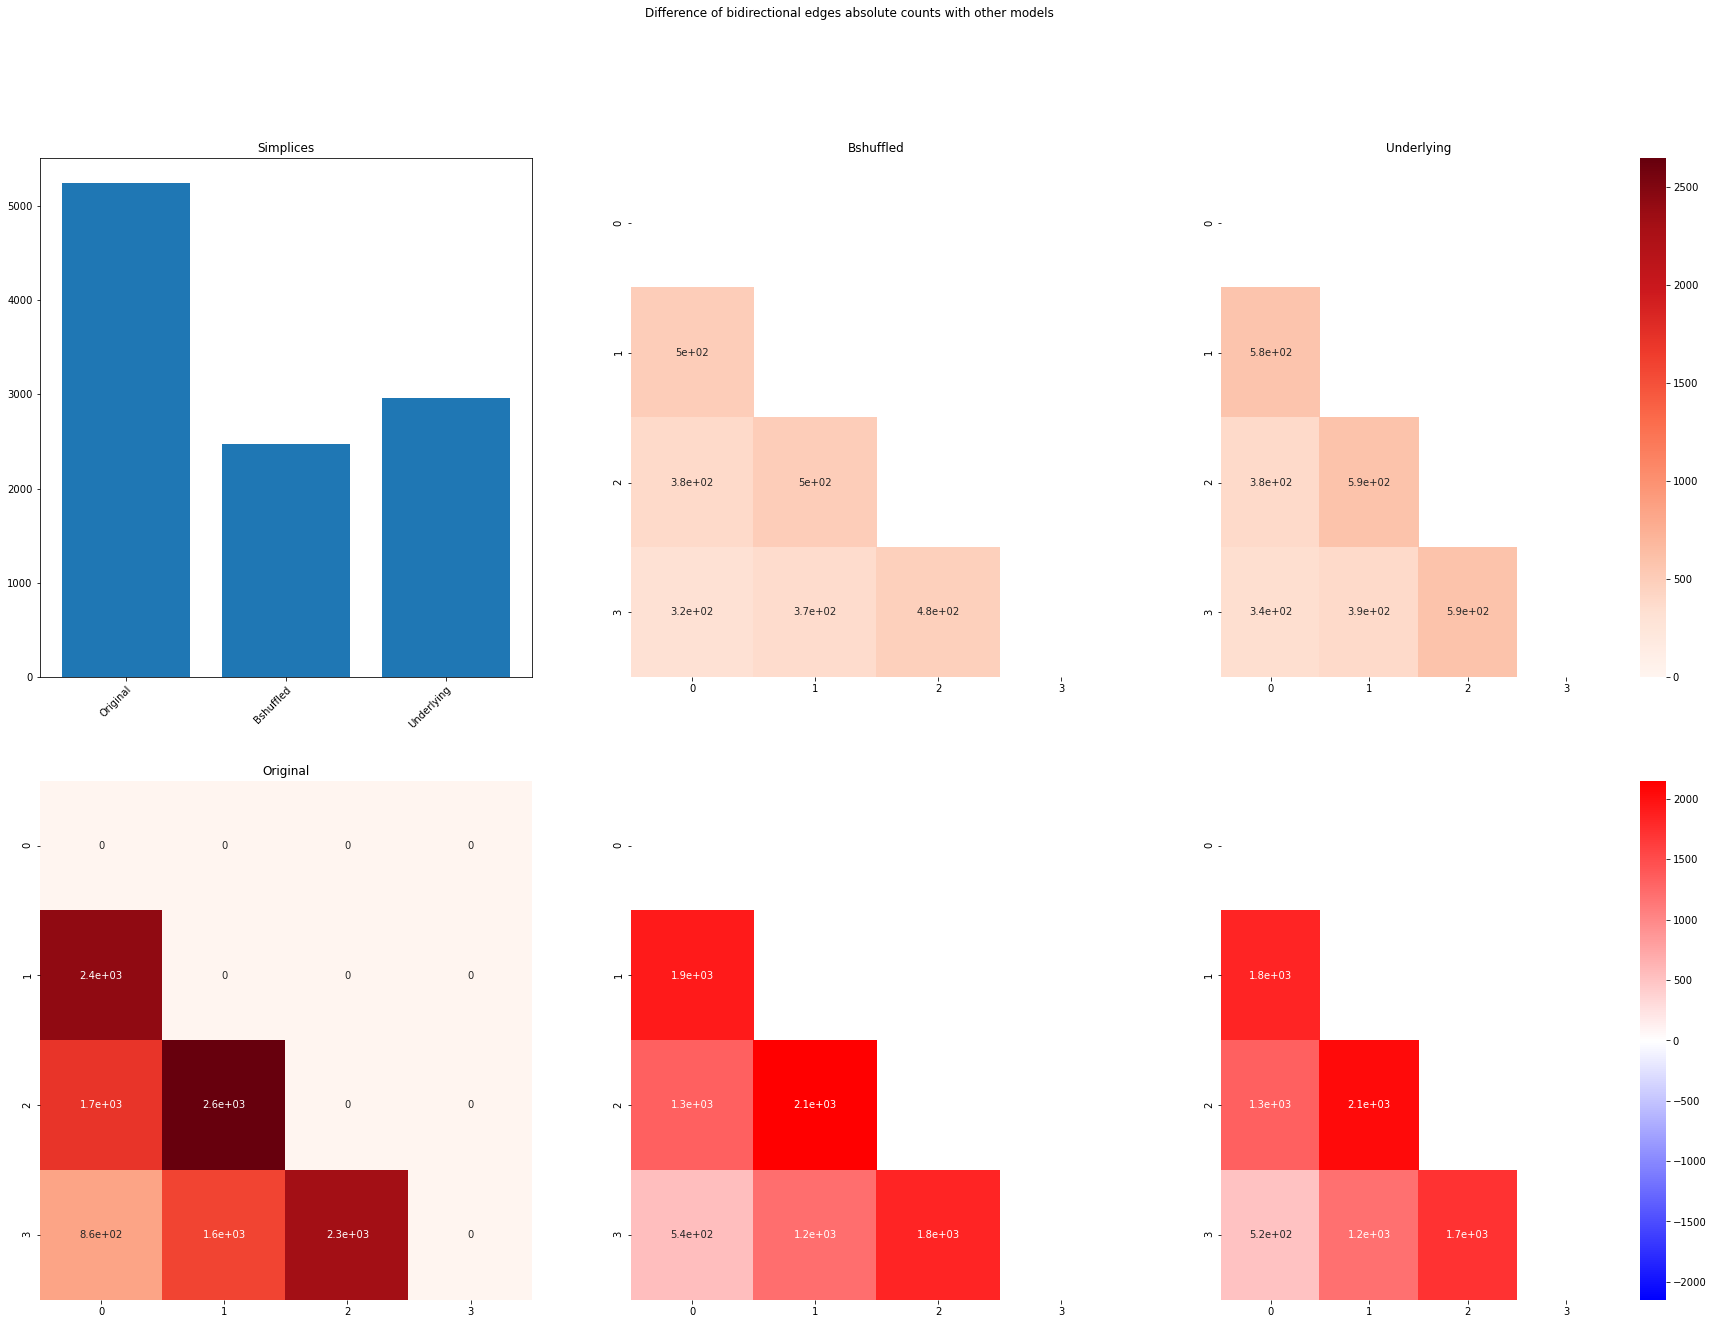

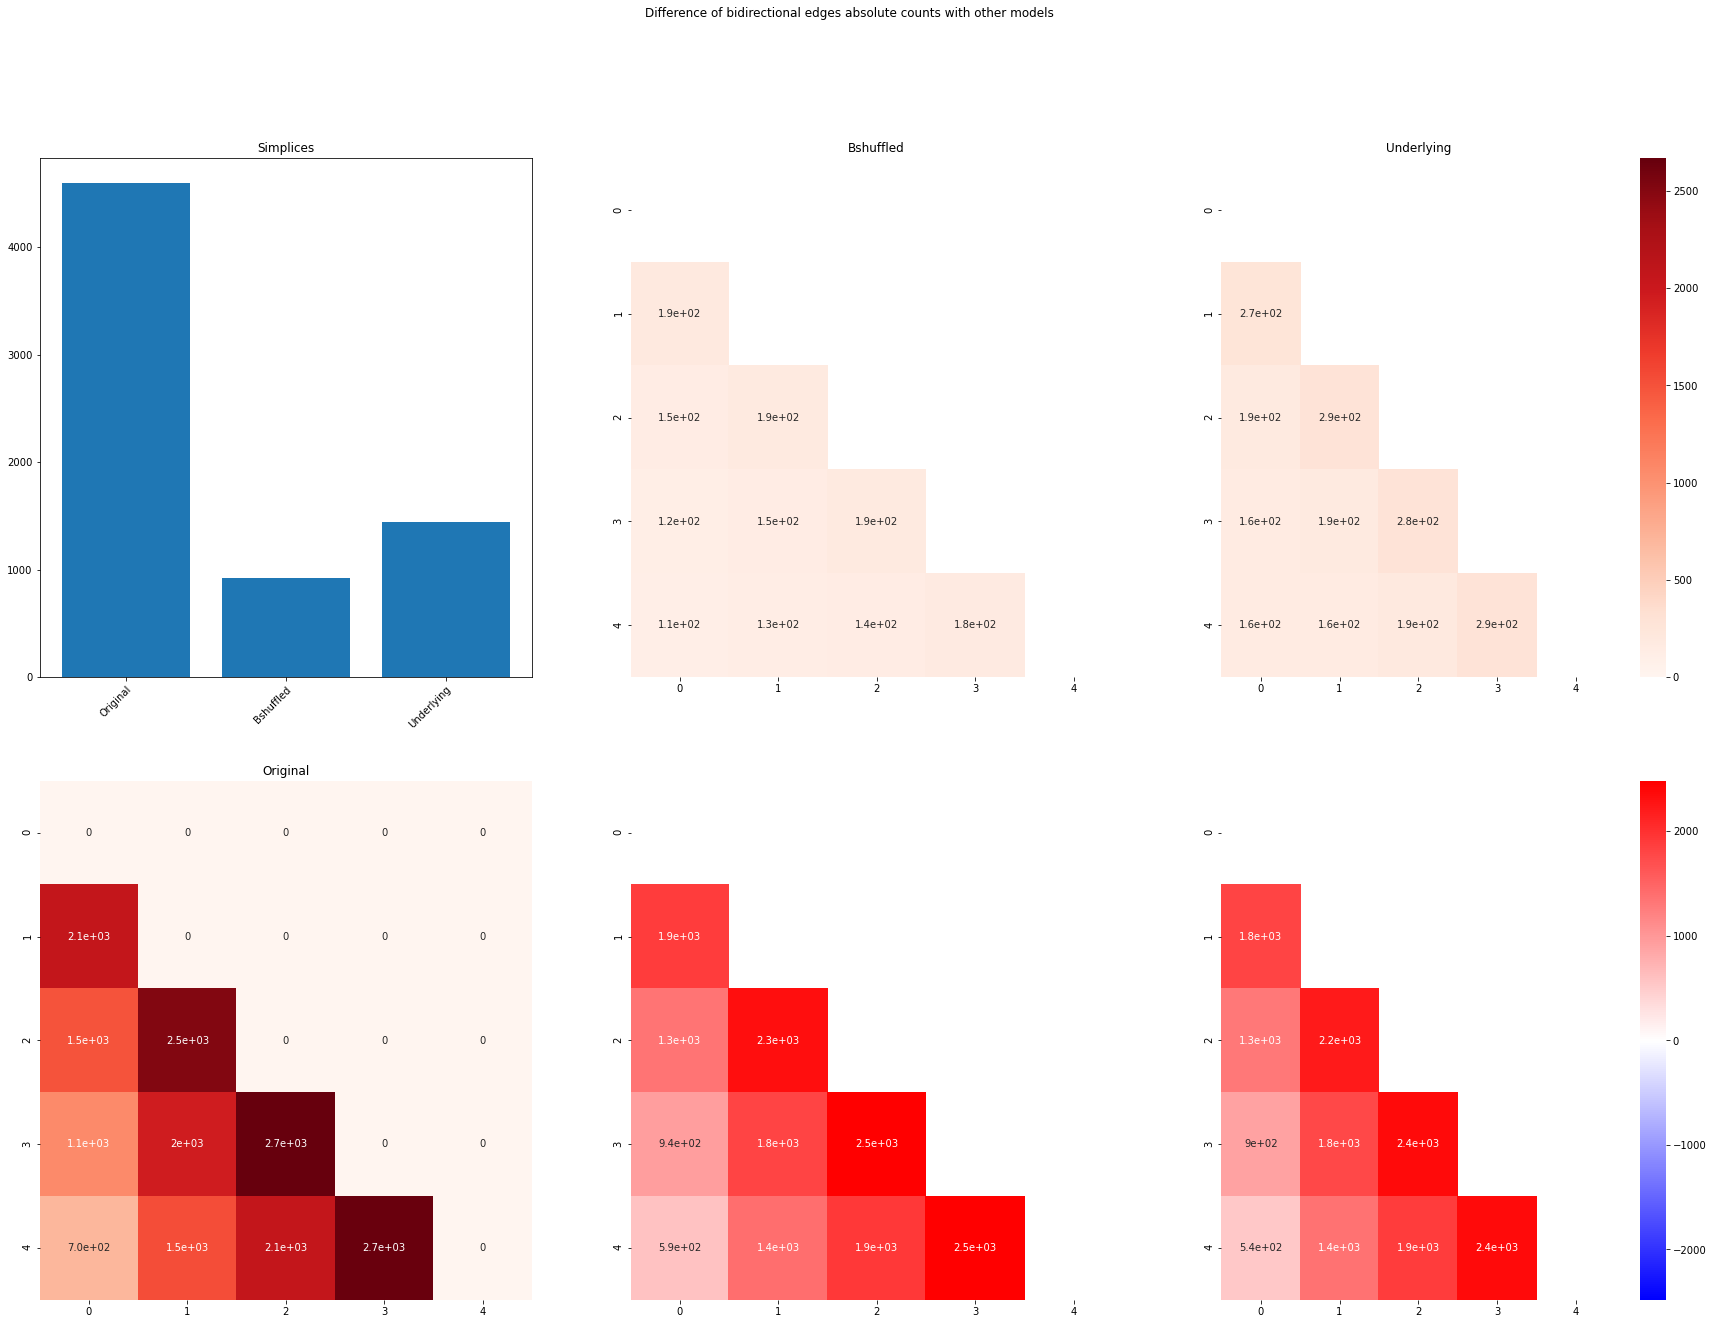

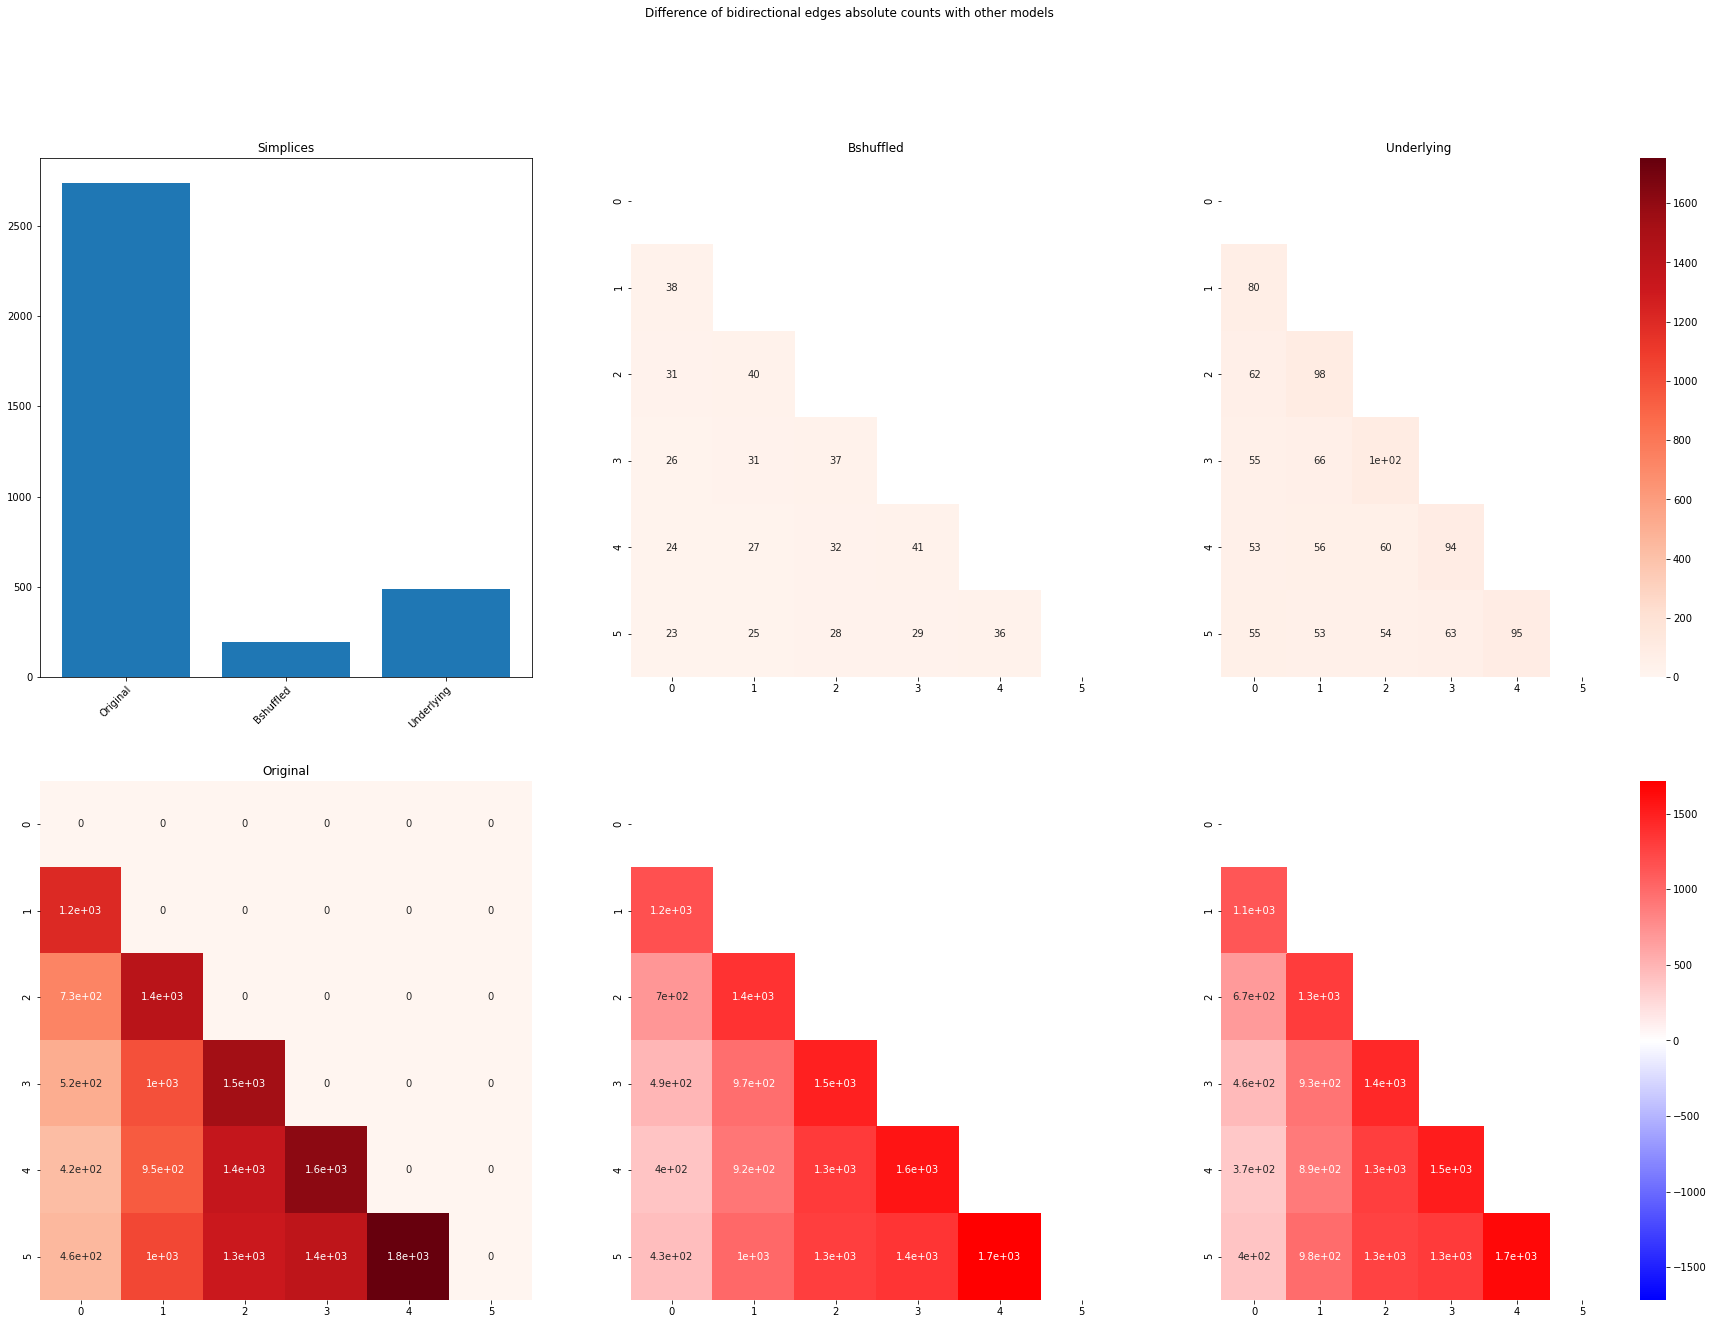

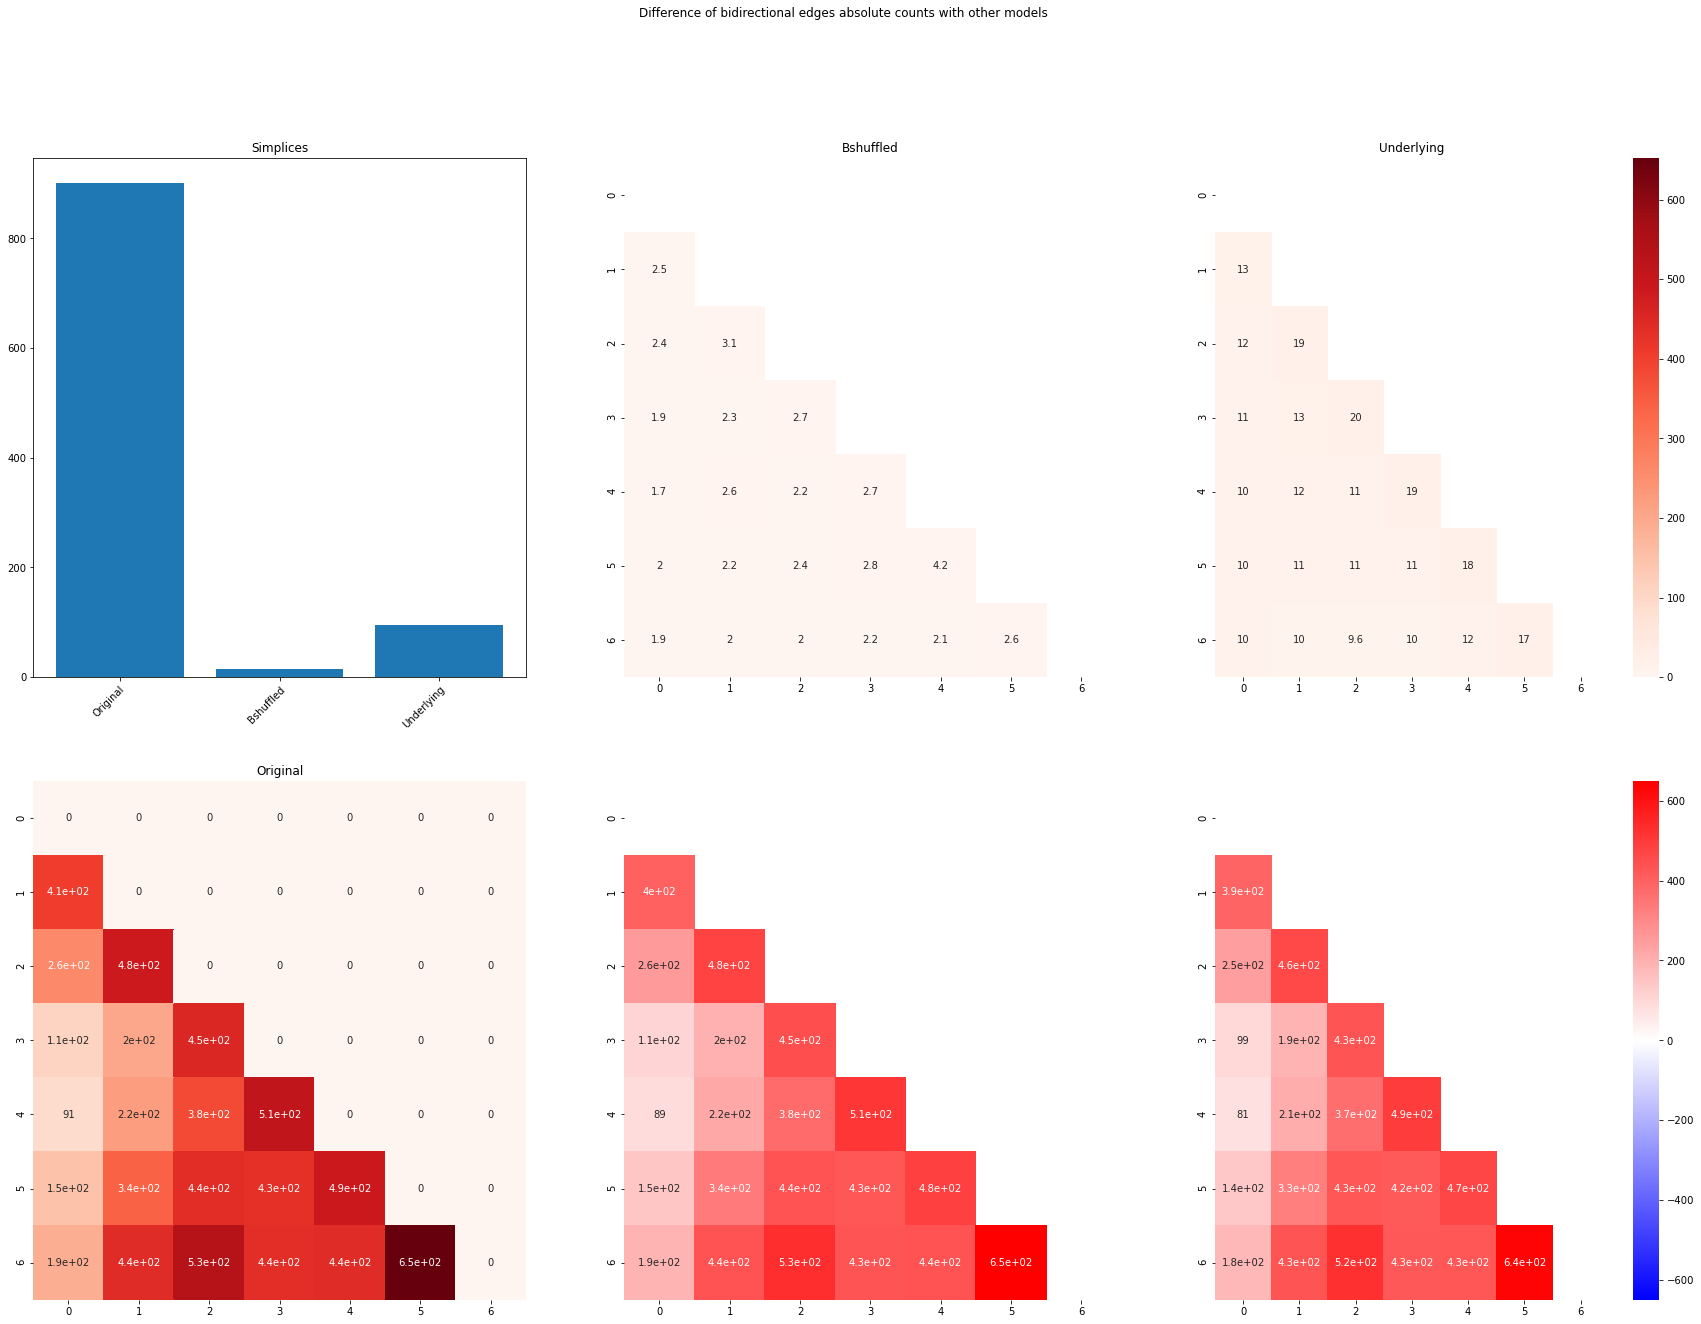

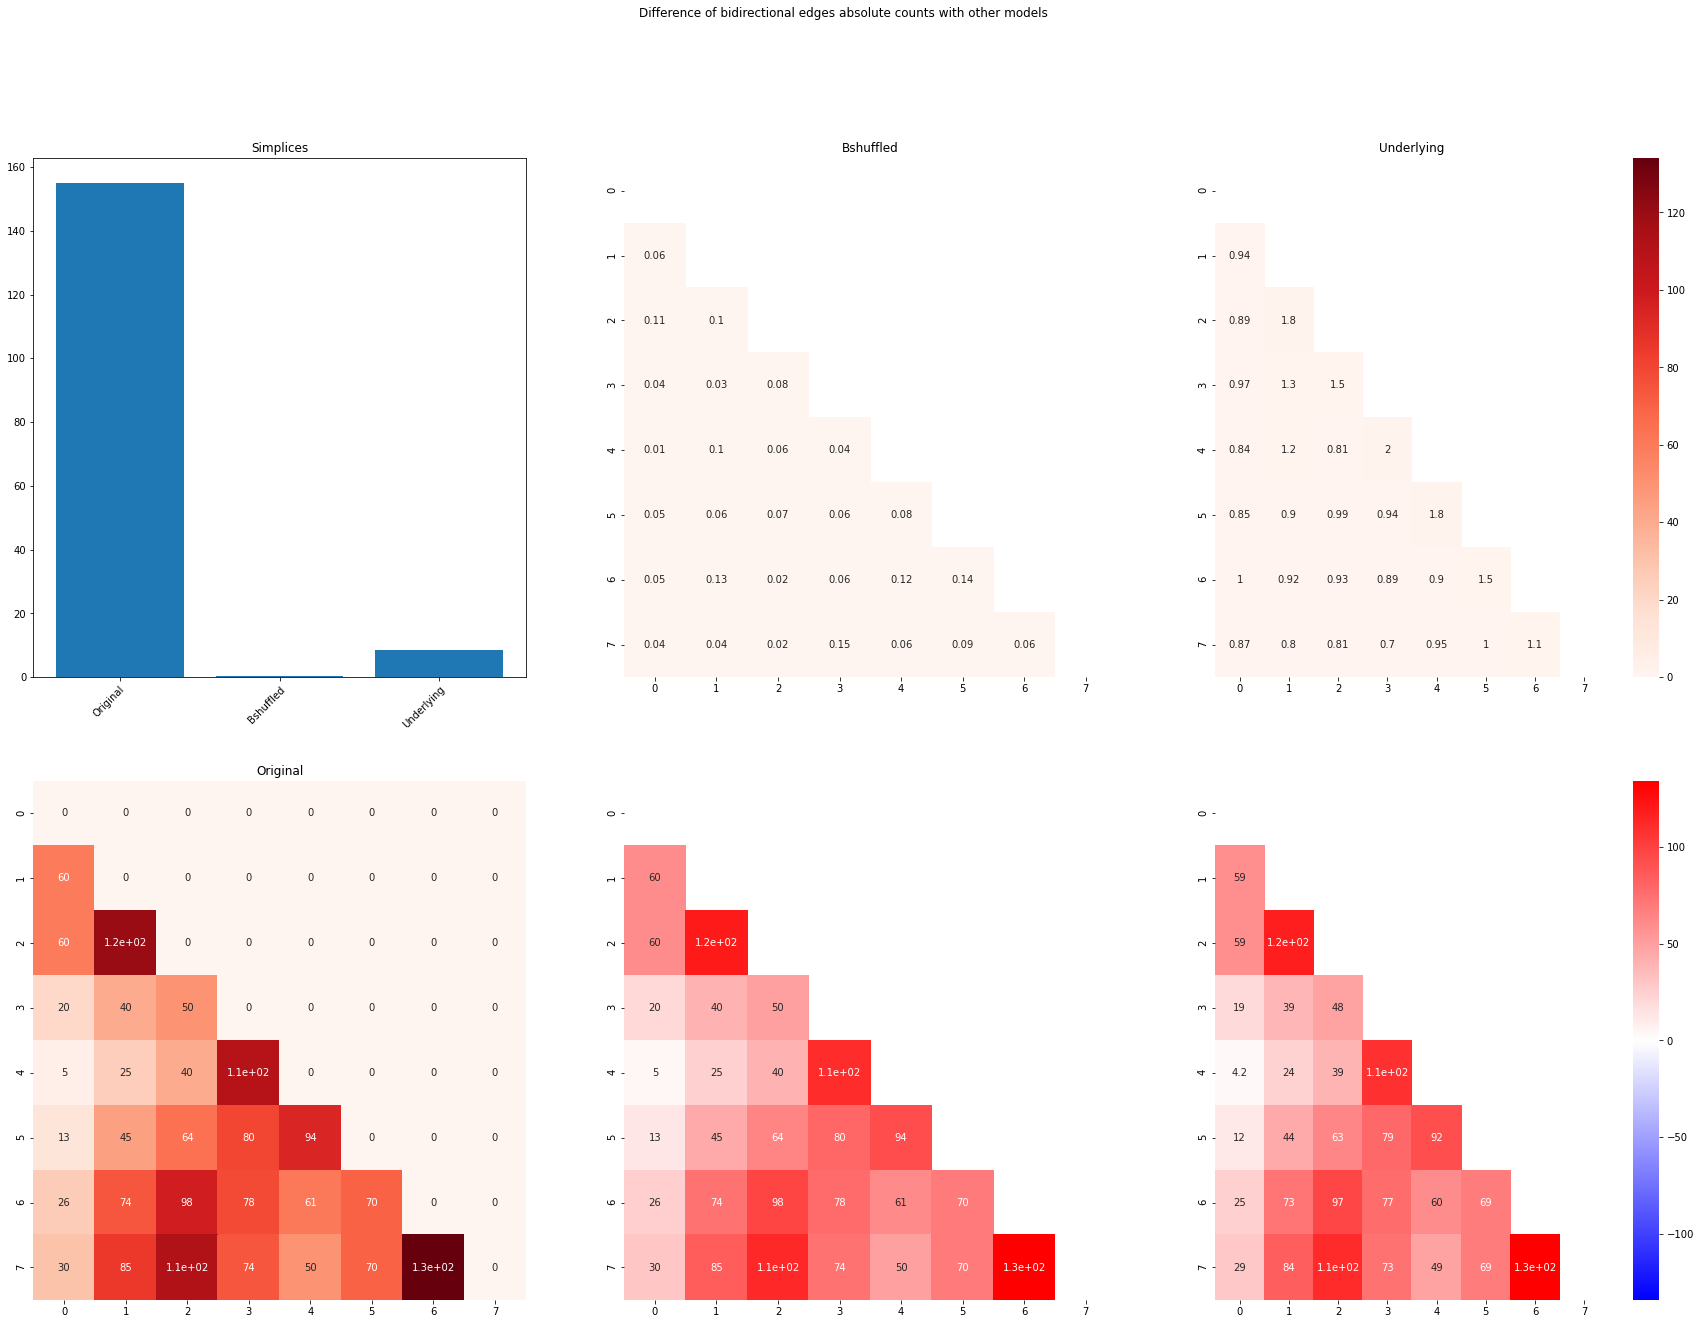

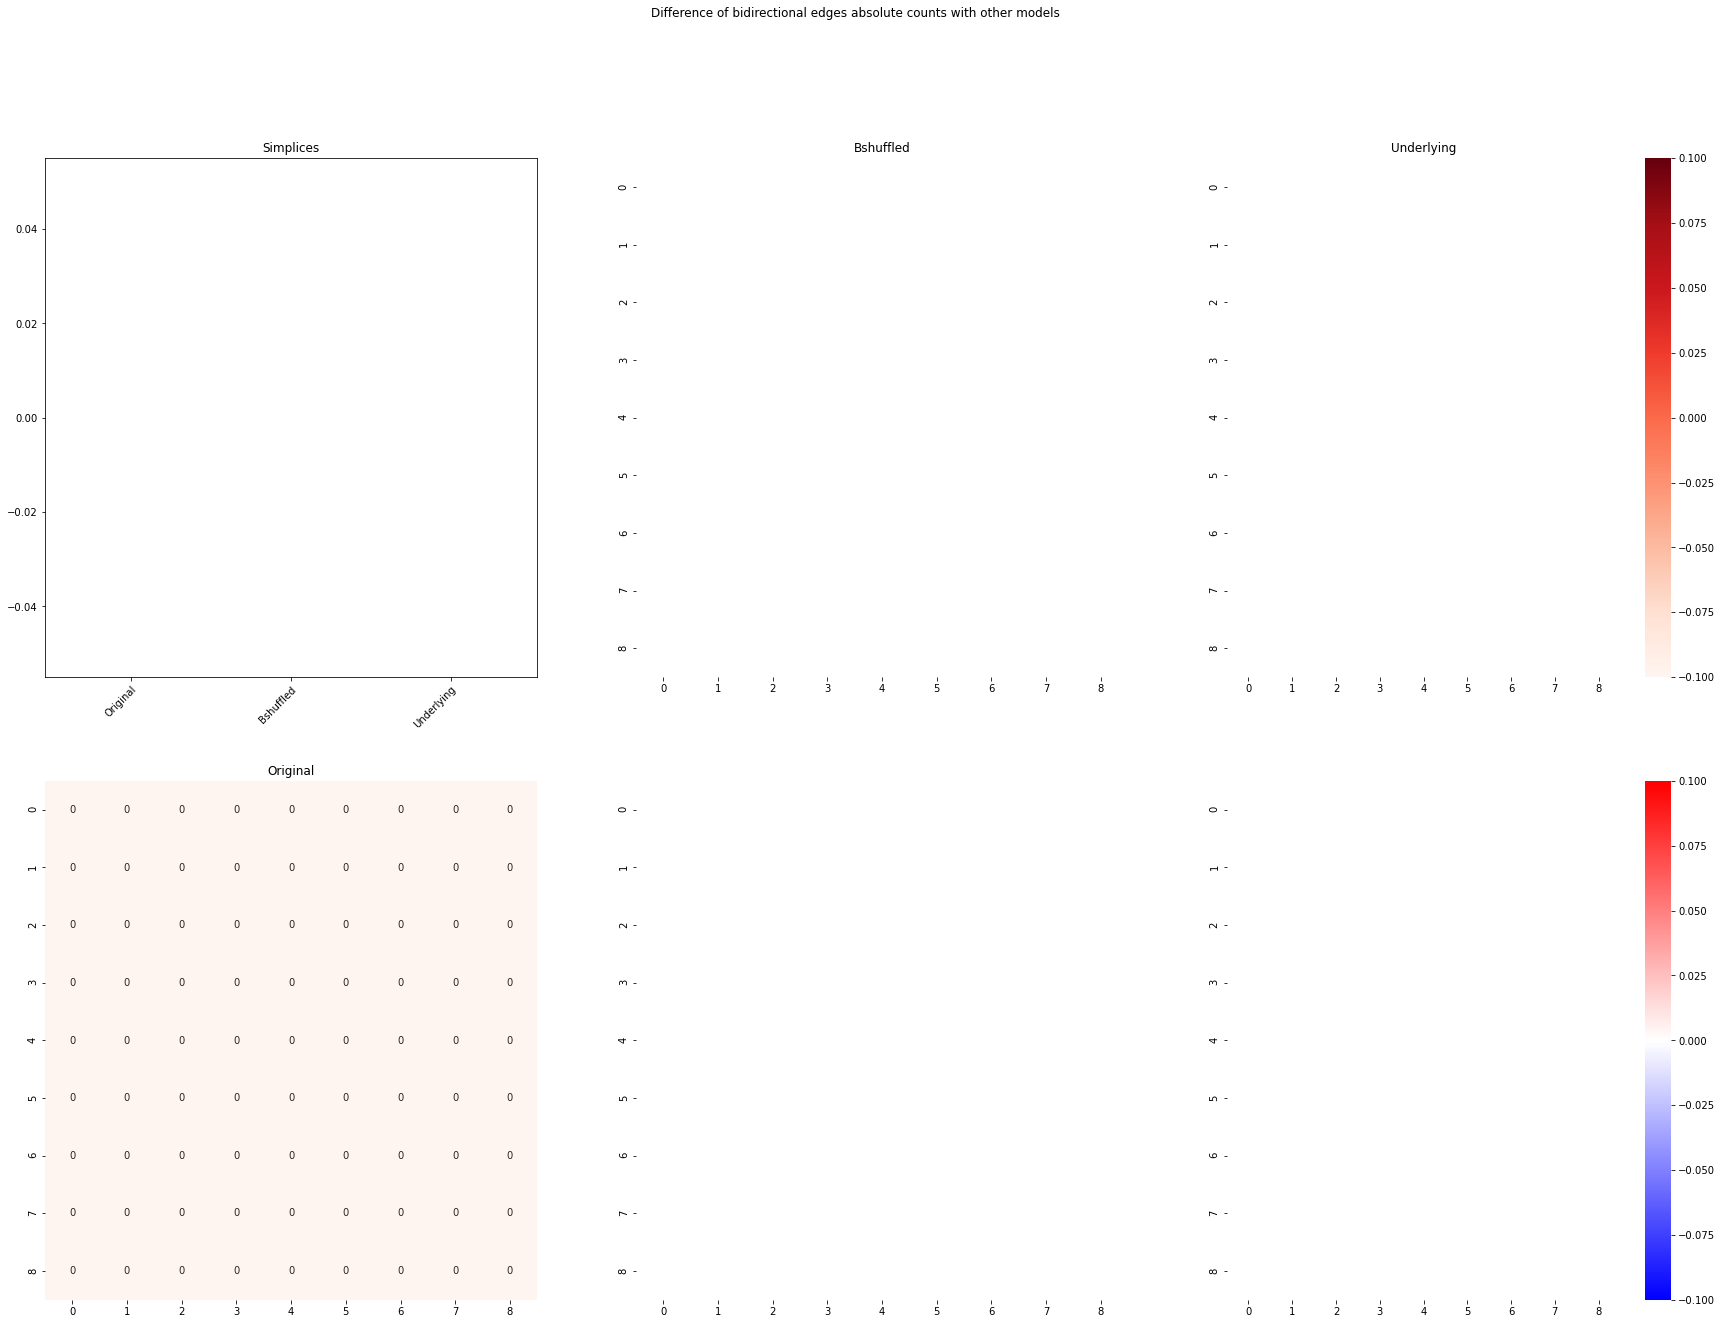

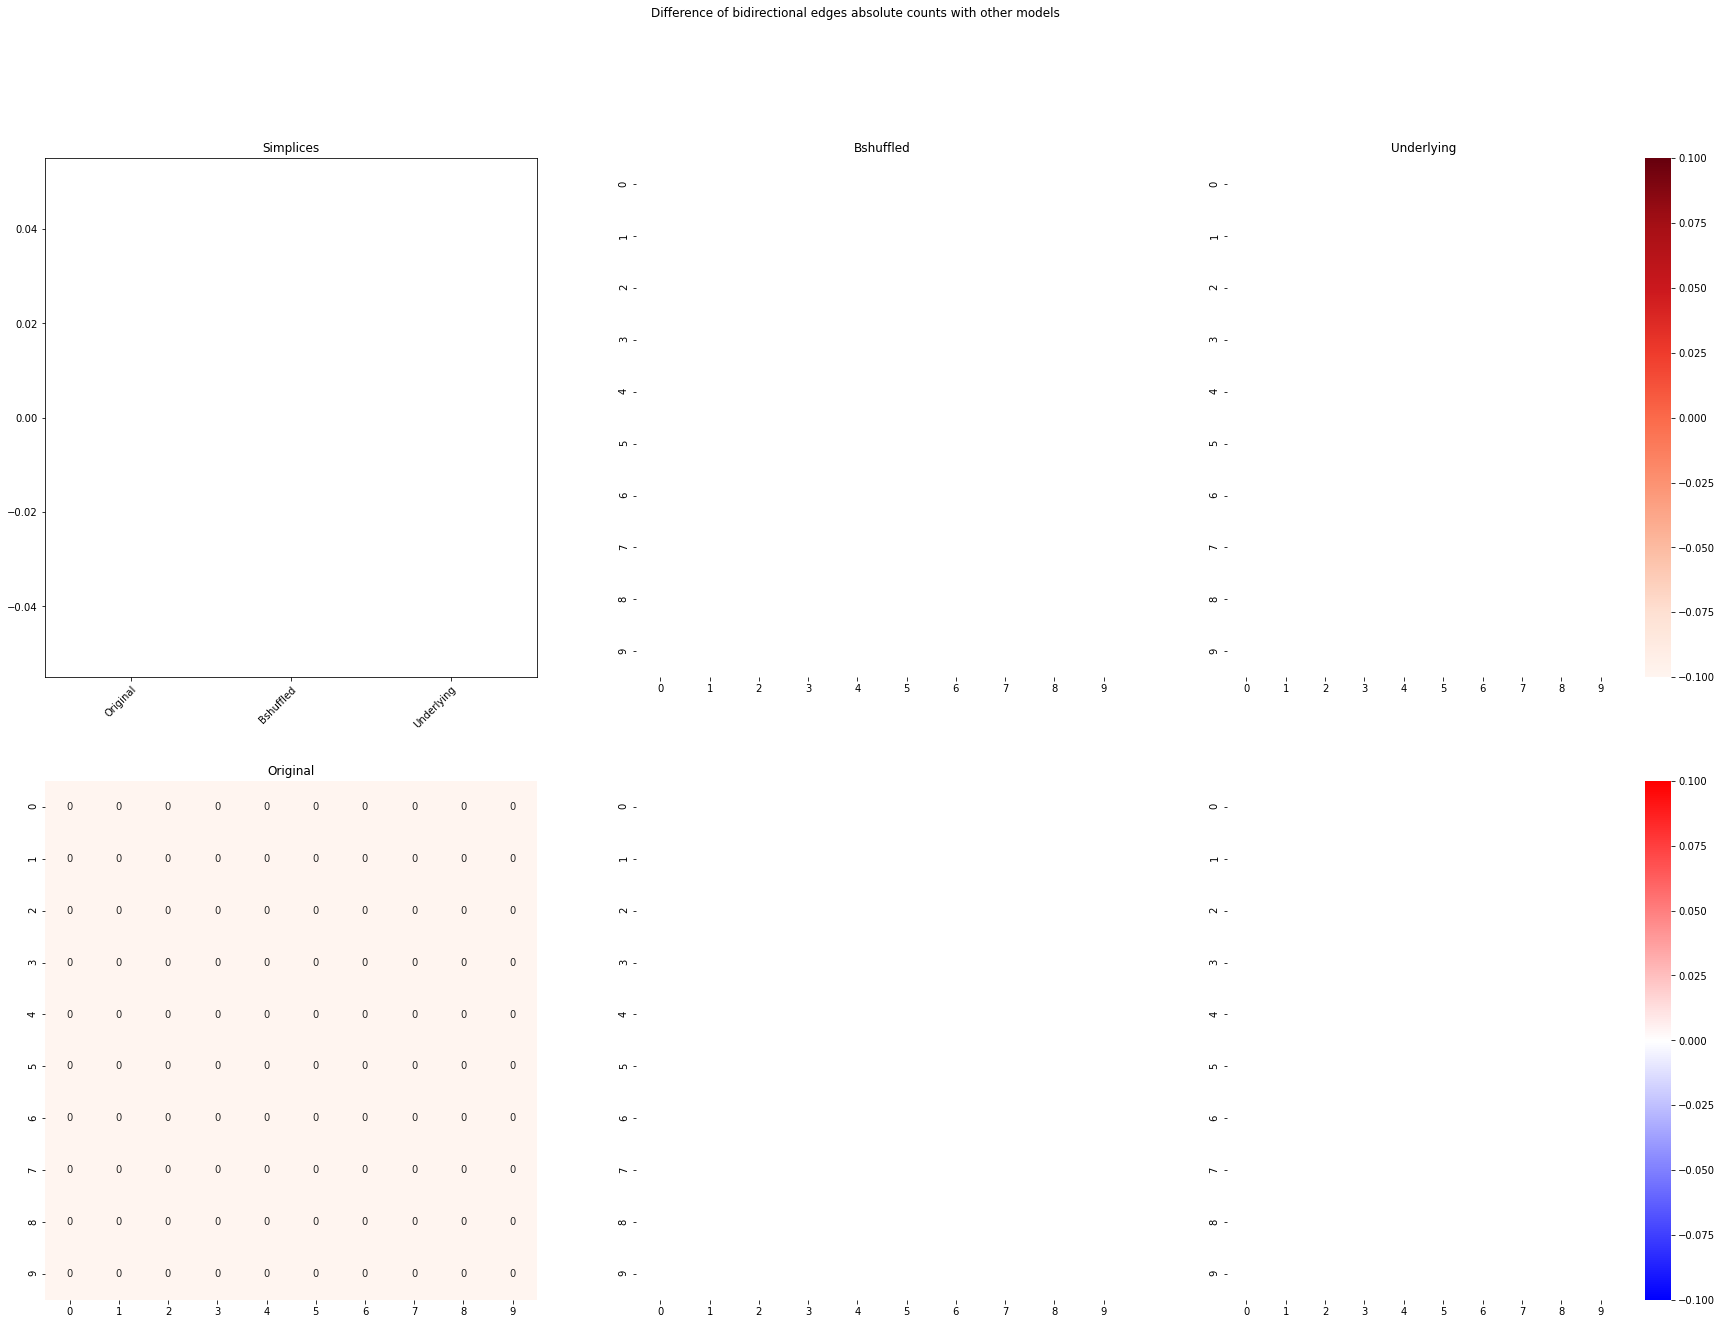

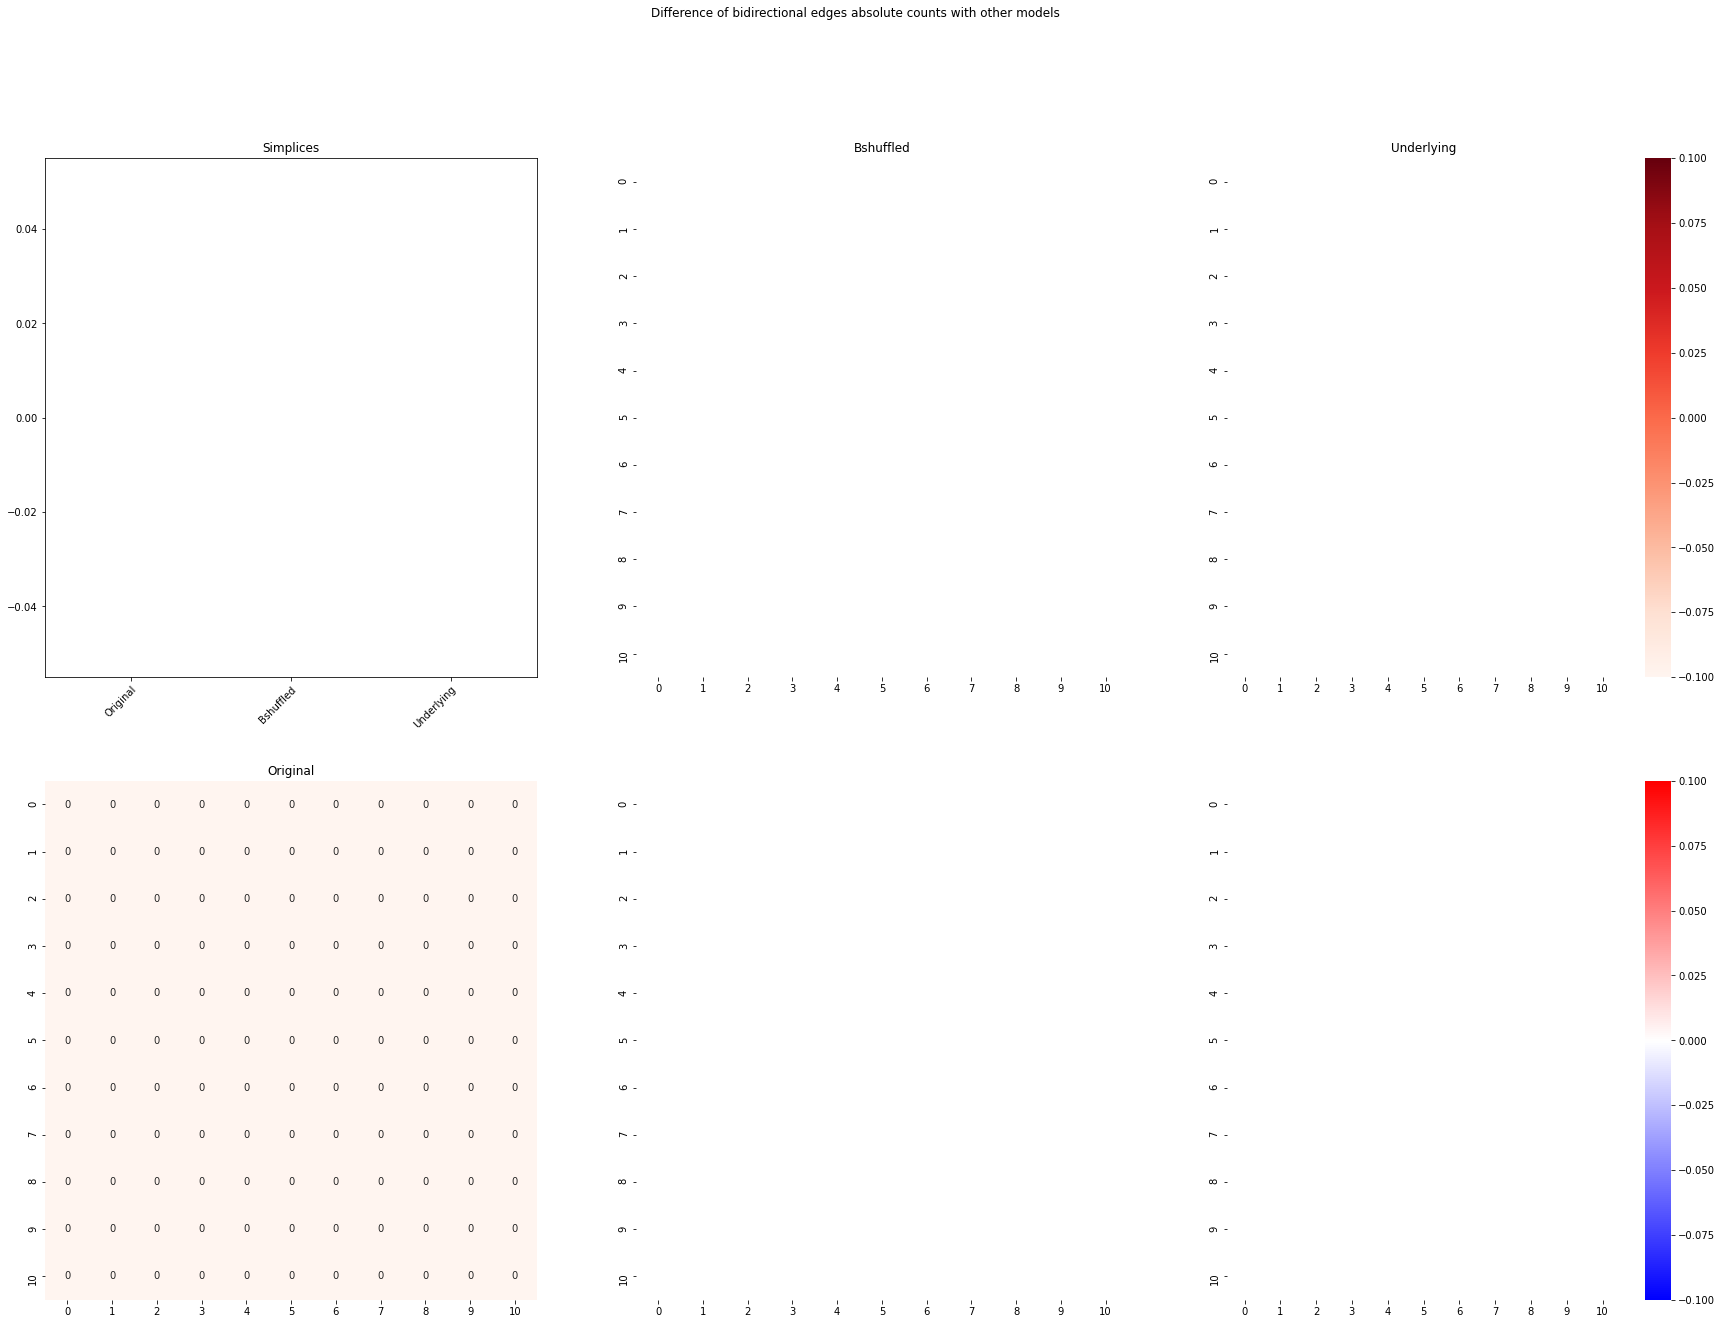

In [9]:
compare_graphs_diff([a,b,c], 1, "worm_bcounts_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

## Maximal

In [10]:
a = pickle.load(open(Path("data/worm/full/mbcounts.pkl"),'rb'))
b = get_average_bcounts(Path("data/worm_control/bishuffled/"), maximal = True)
c = get_average_bcounts(Path("data/worm_control/underlying/"), maximal = True)

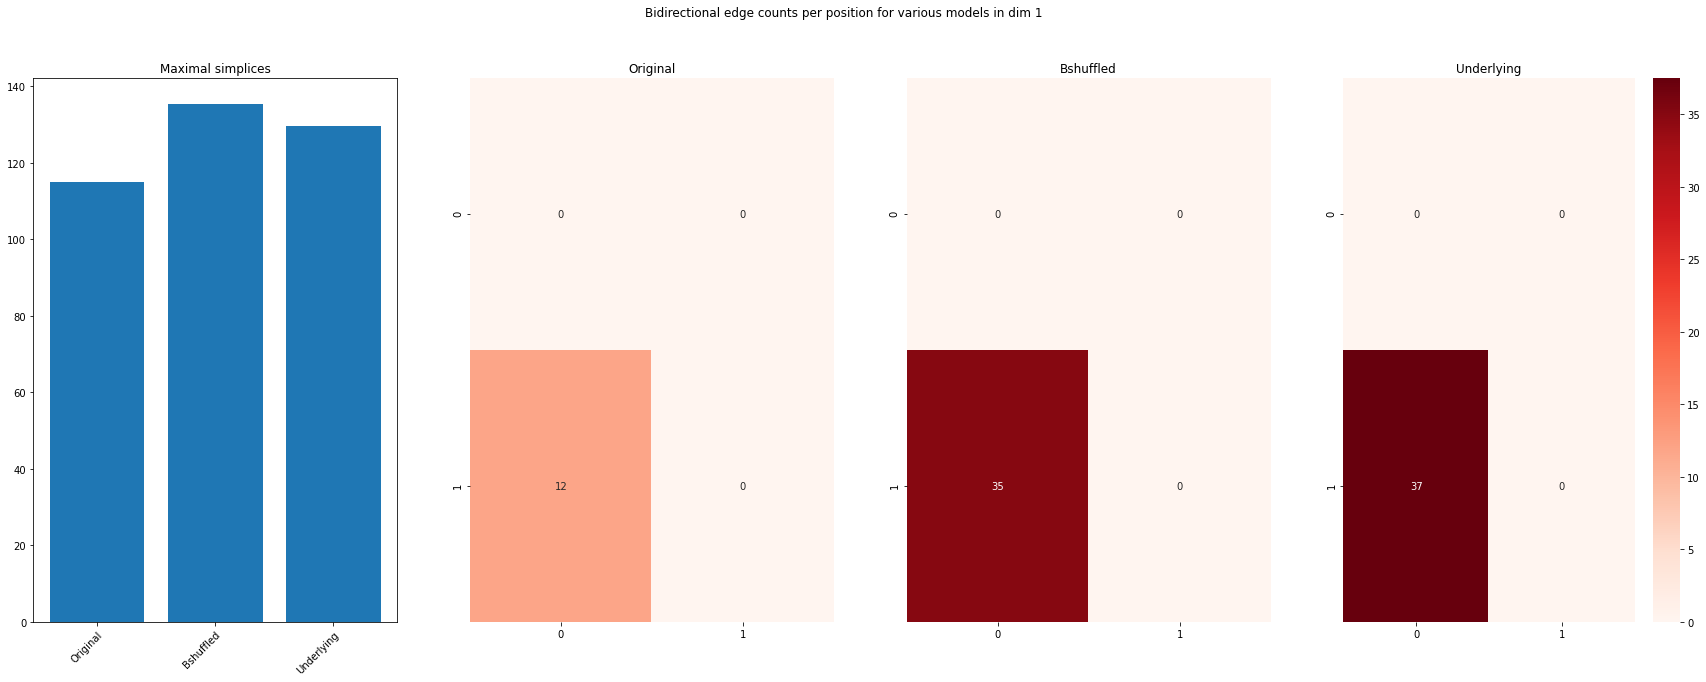

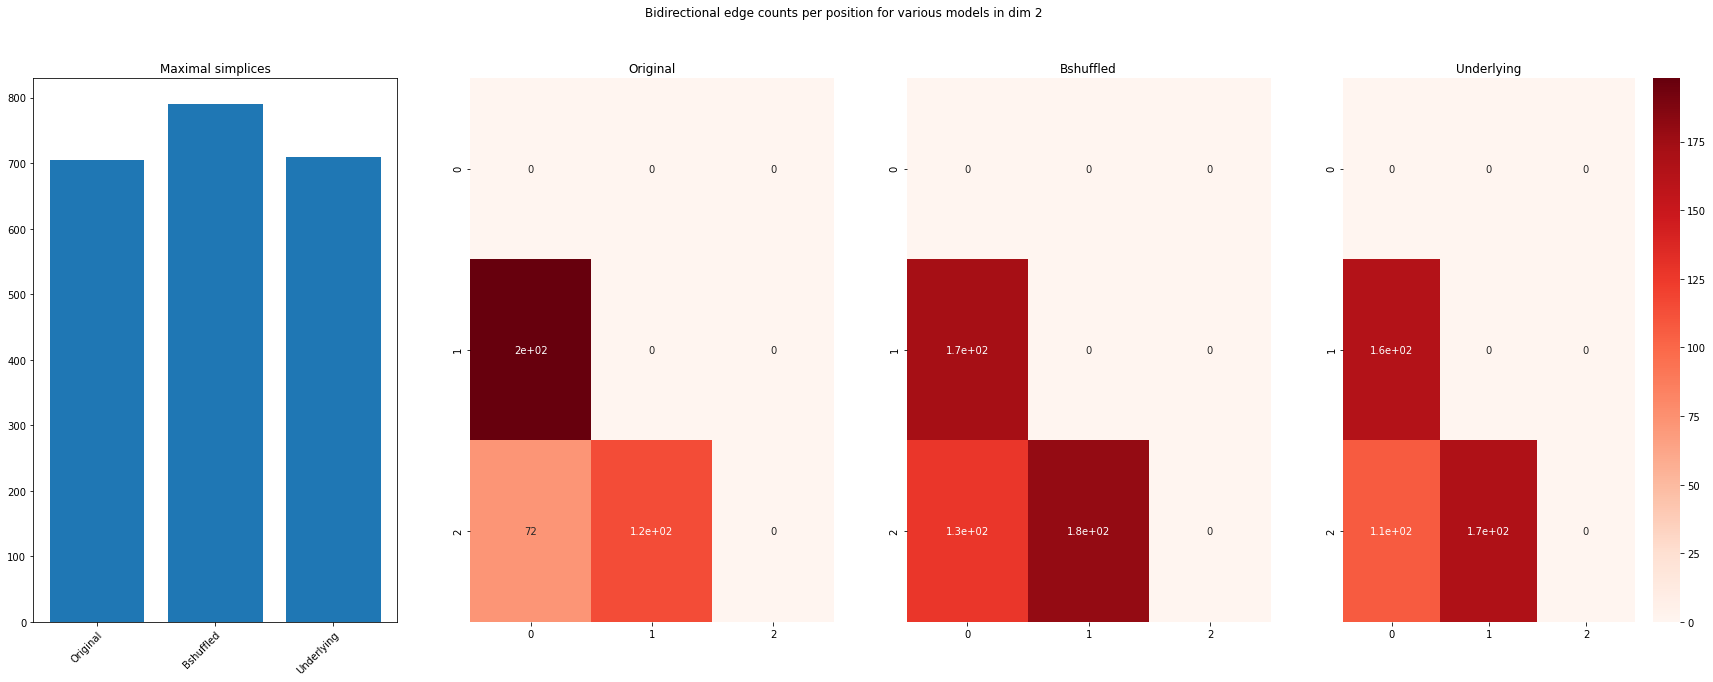

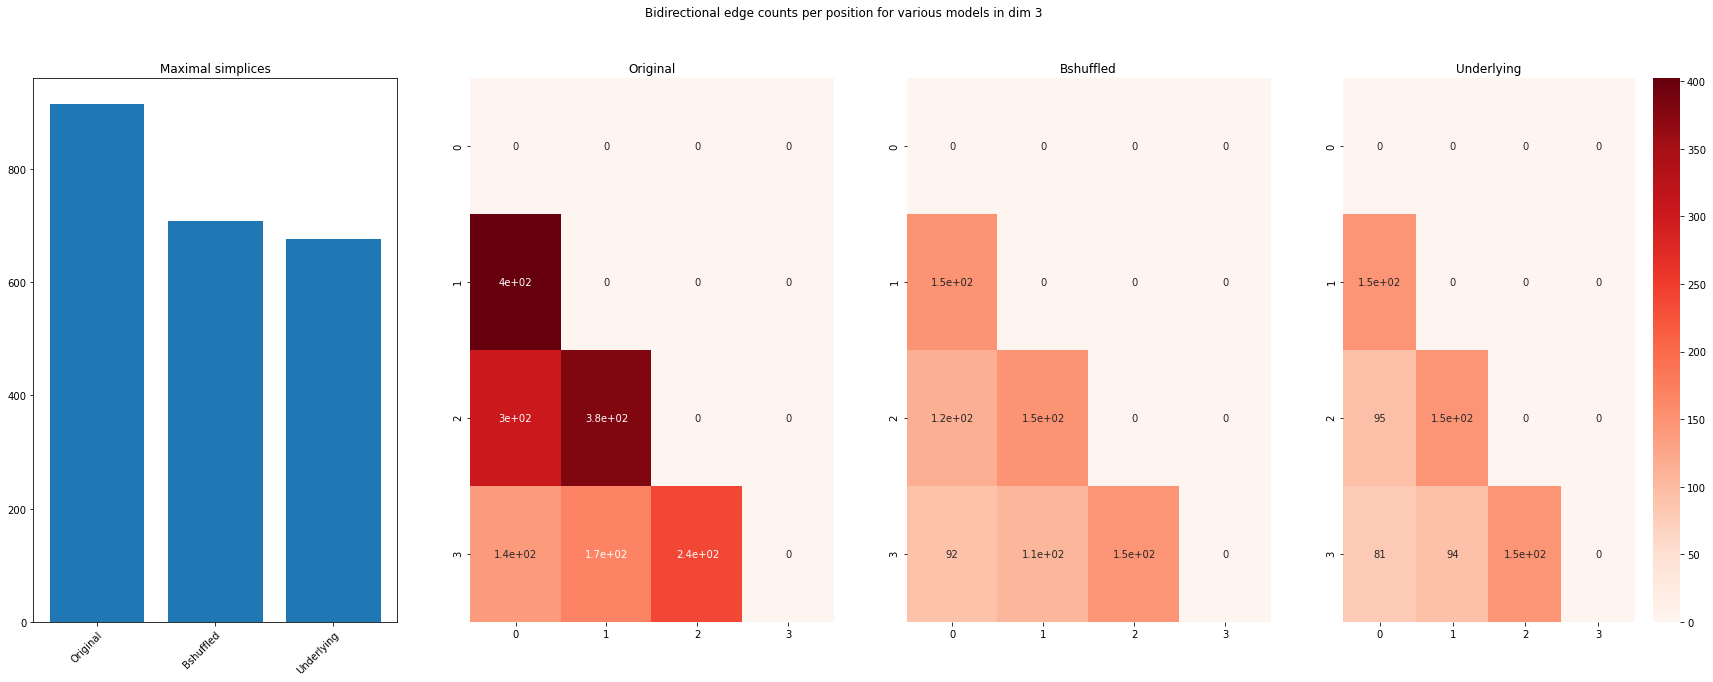

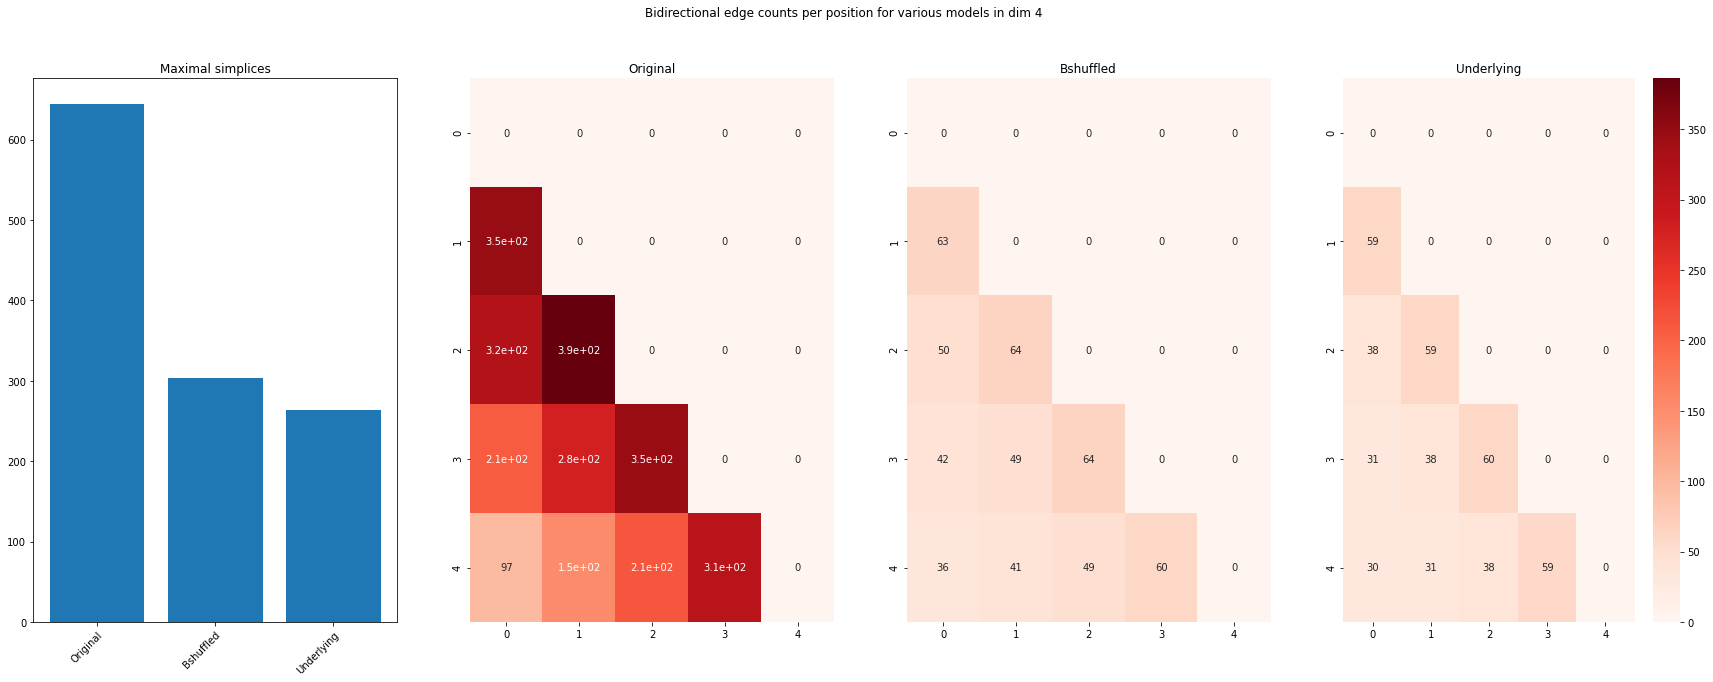

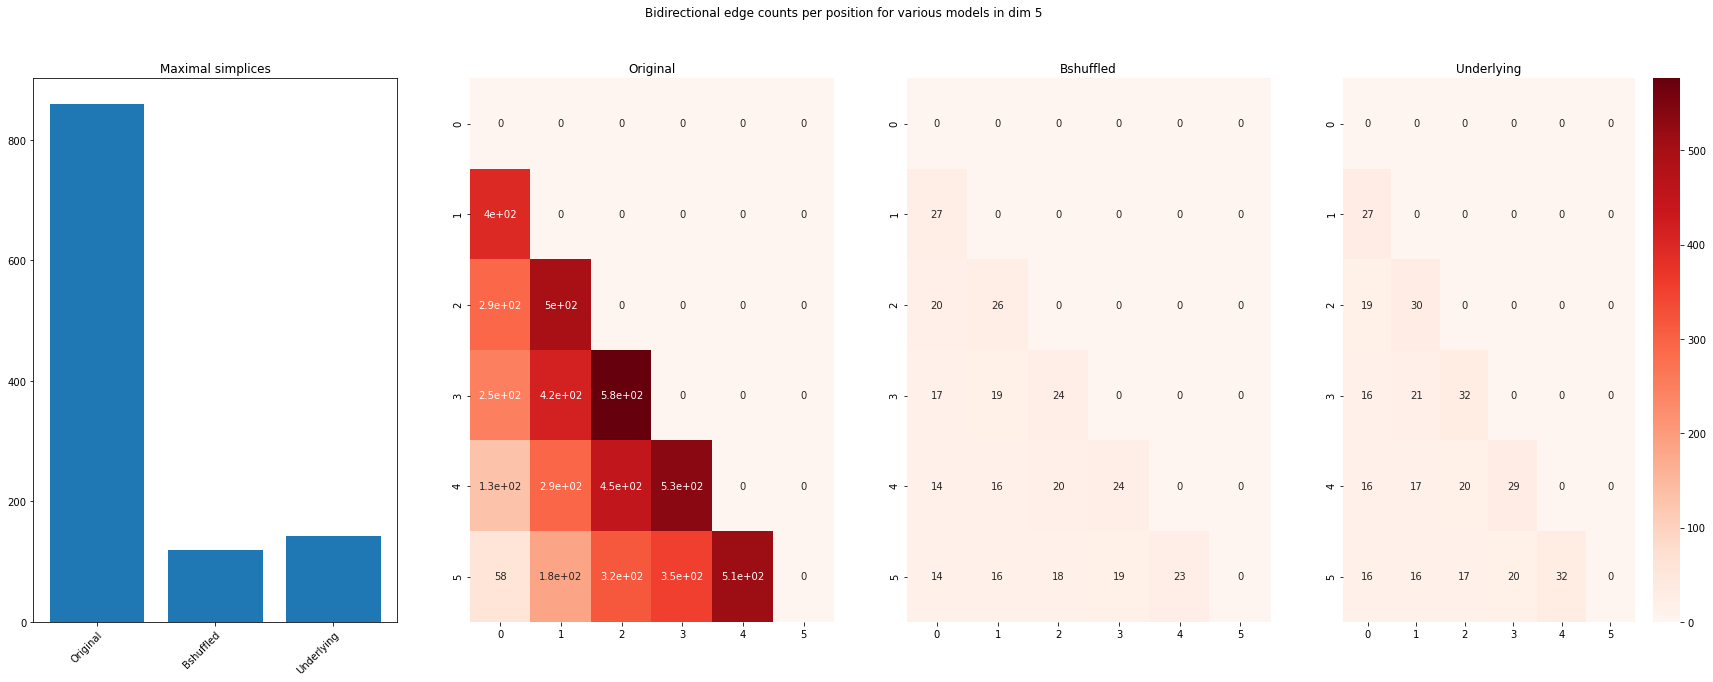

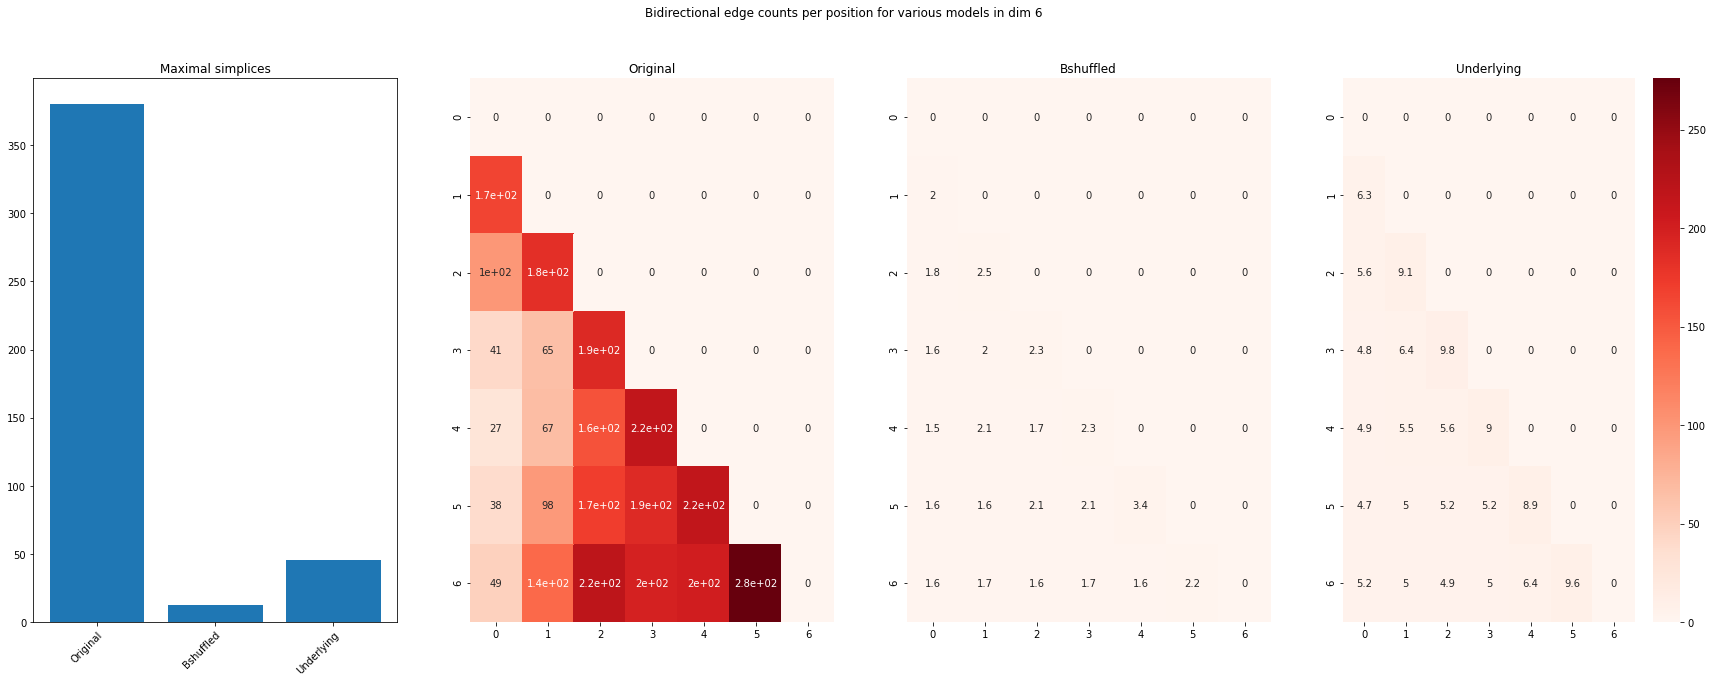

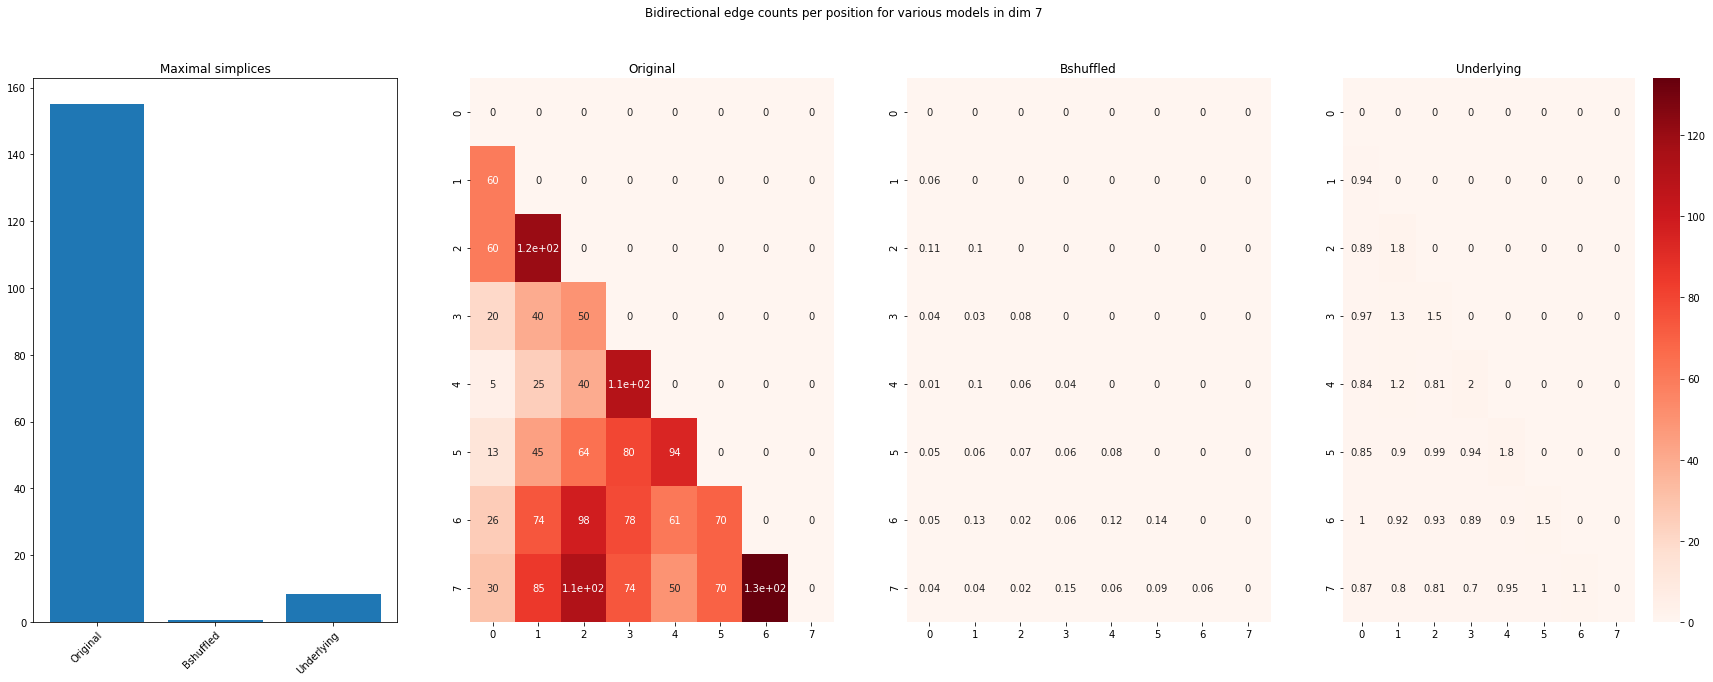

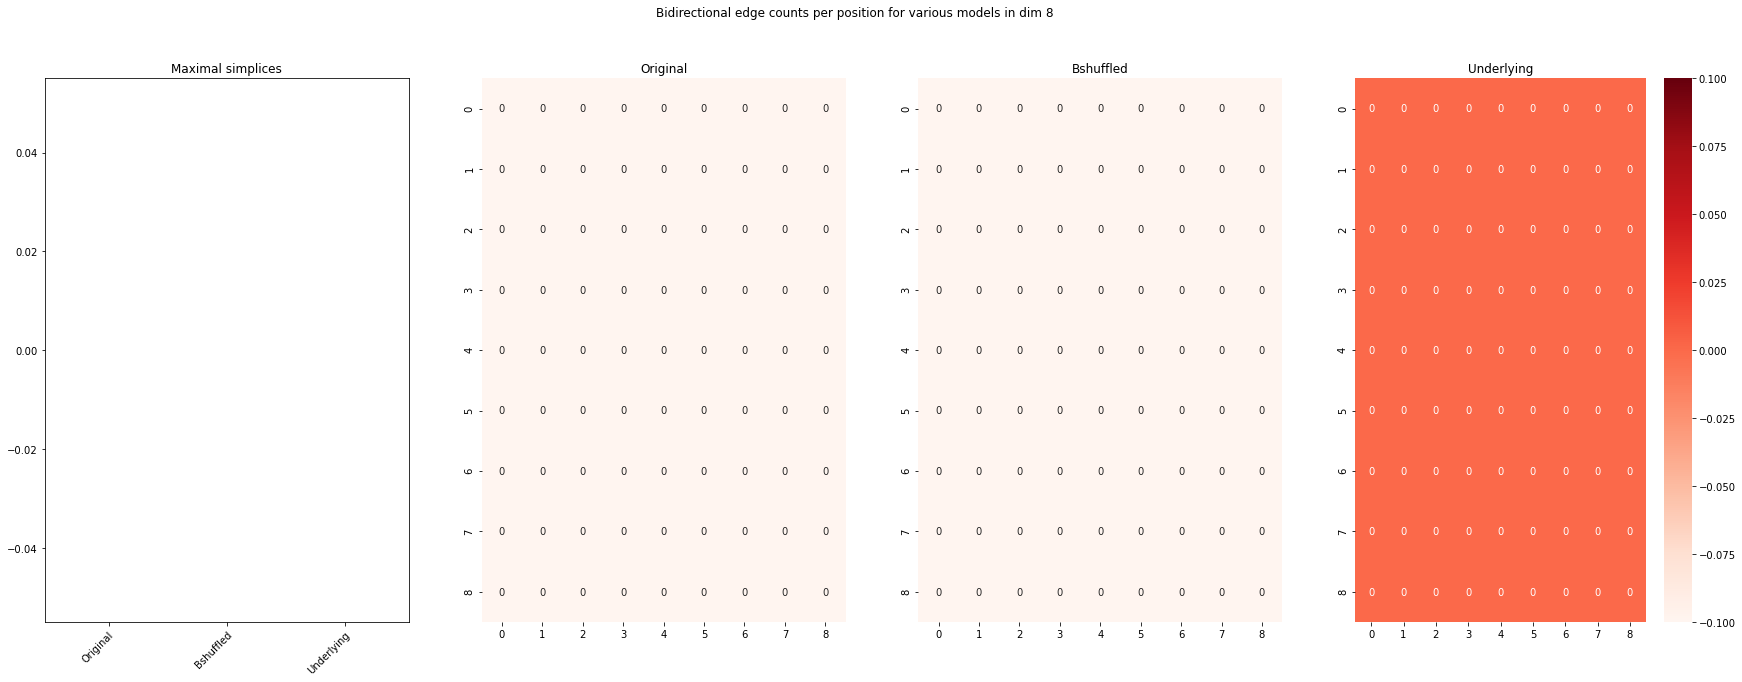

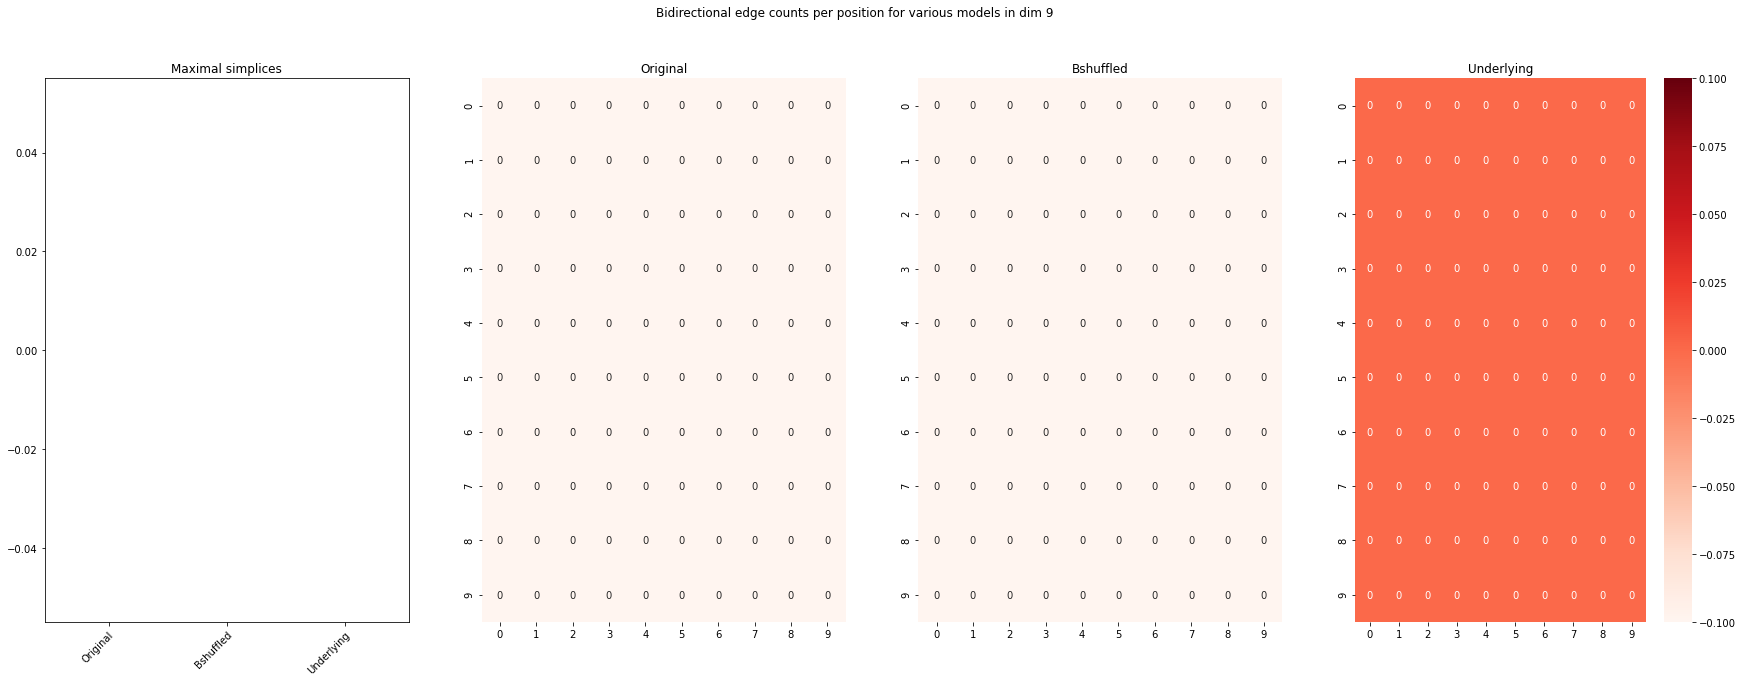

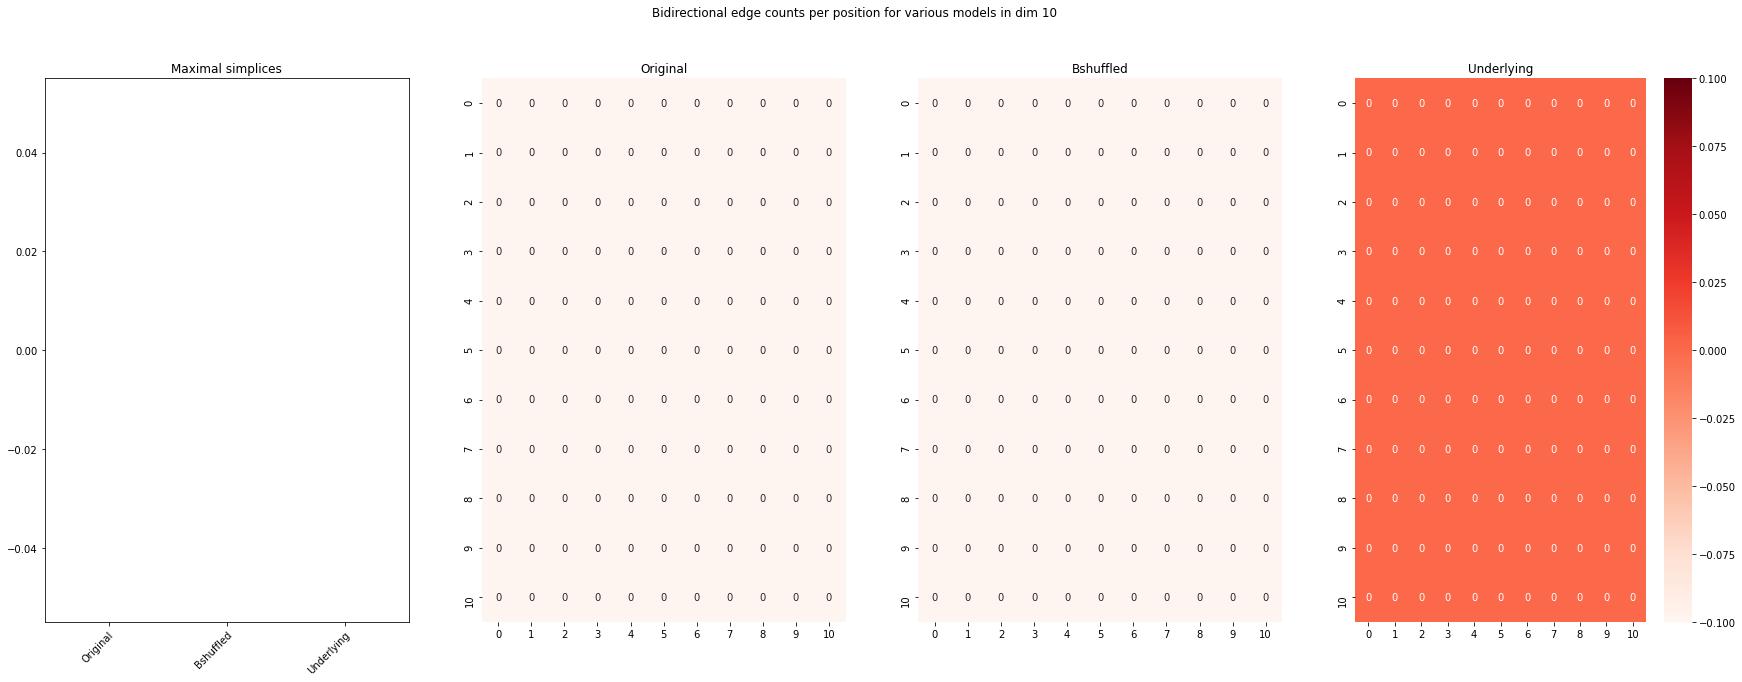

In [11]:
compare_graphs([a,b,c], 1, "worm_mbcounts", title_list = ["Maximal simplices","Original", "Bshuffled", "Underlying"])

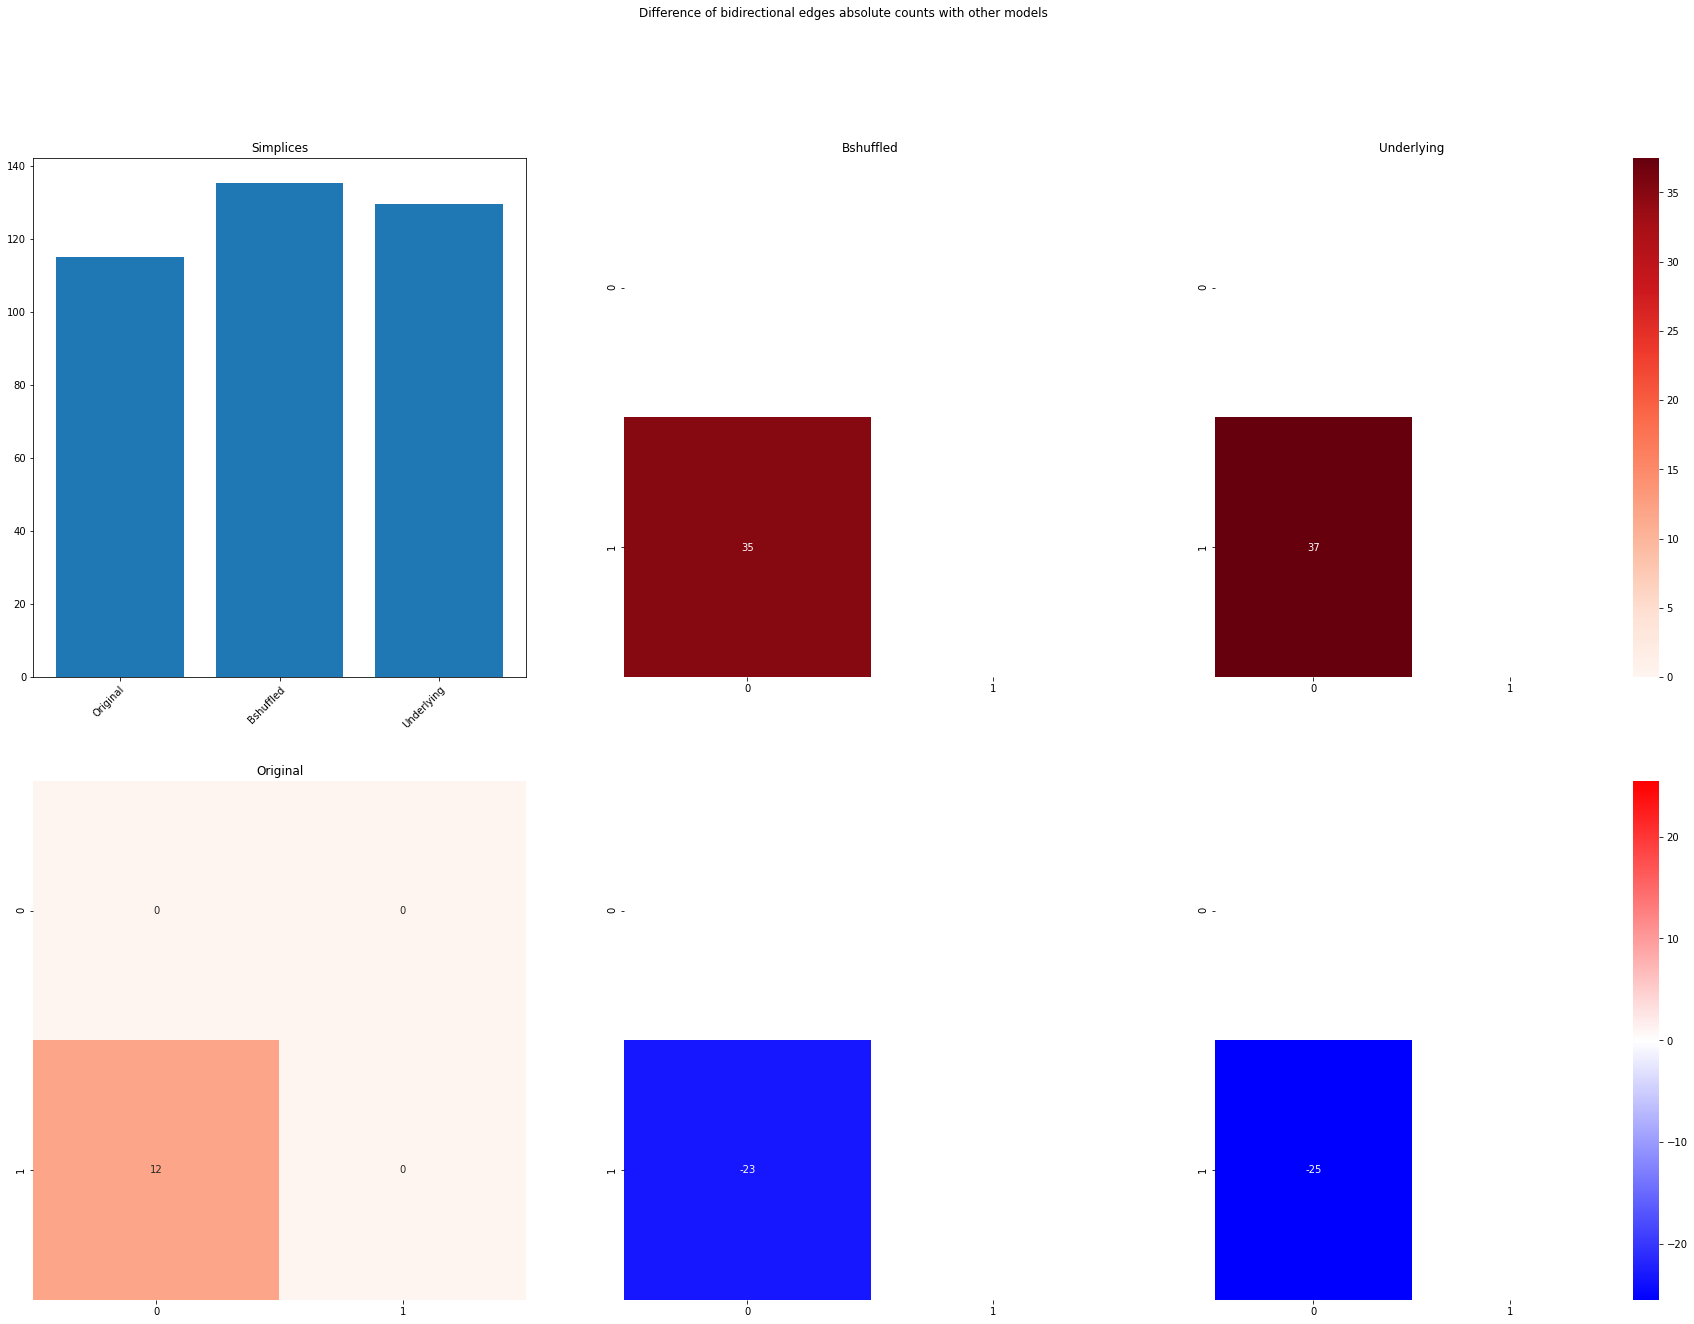

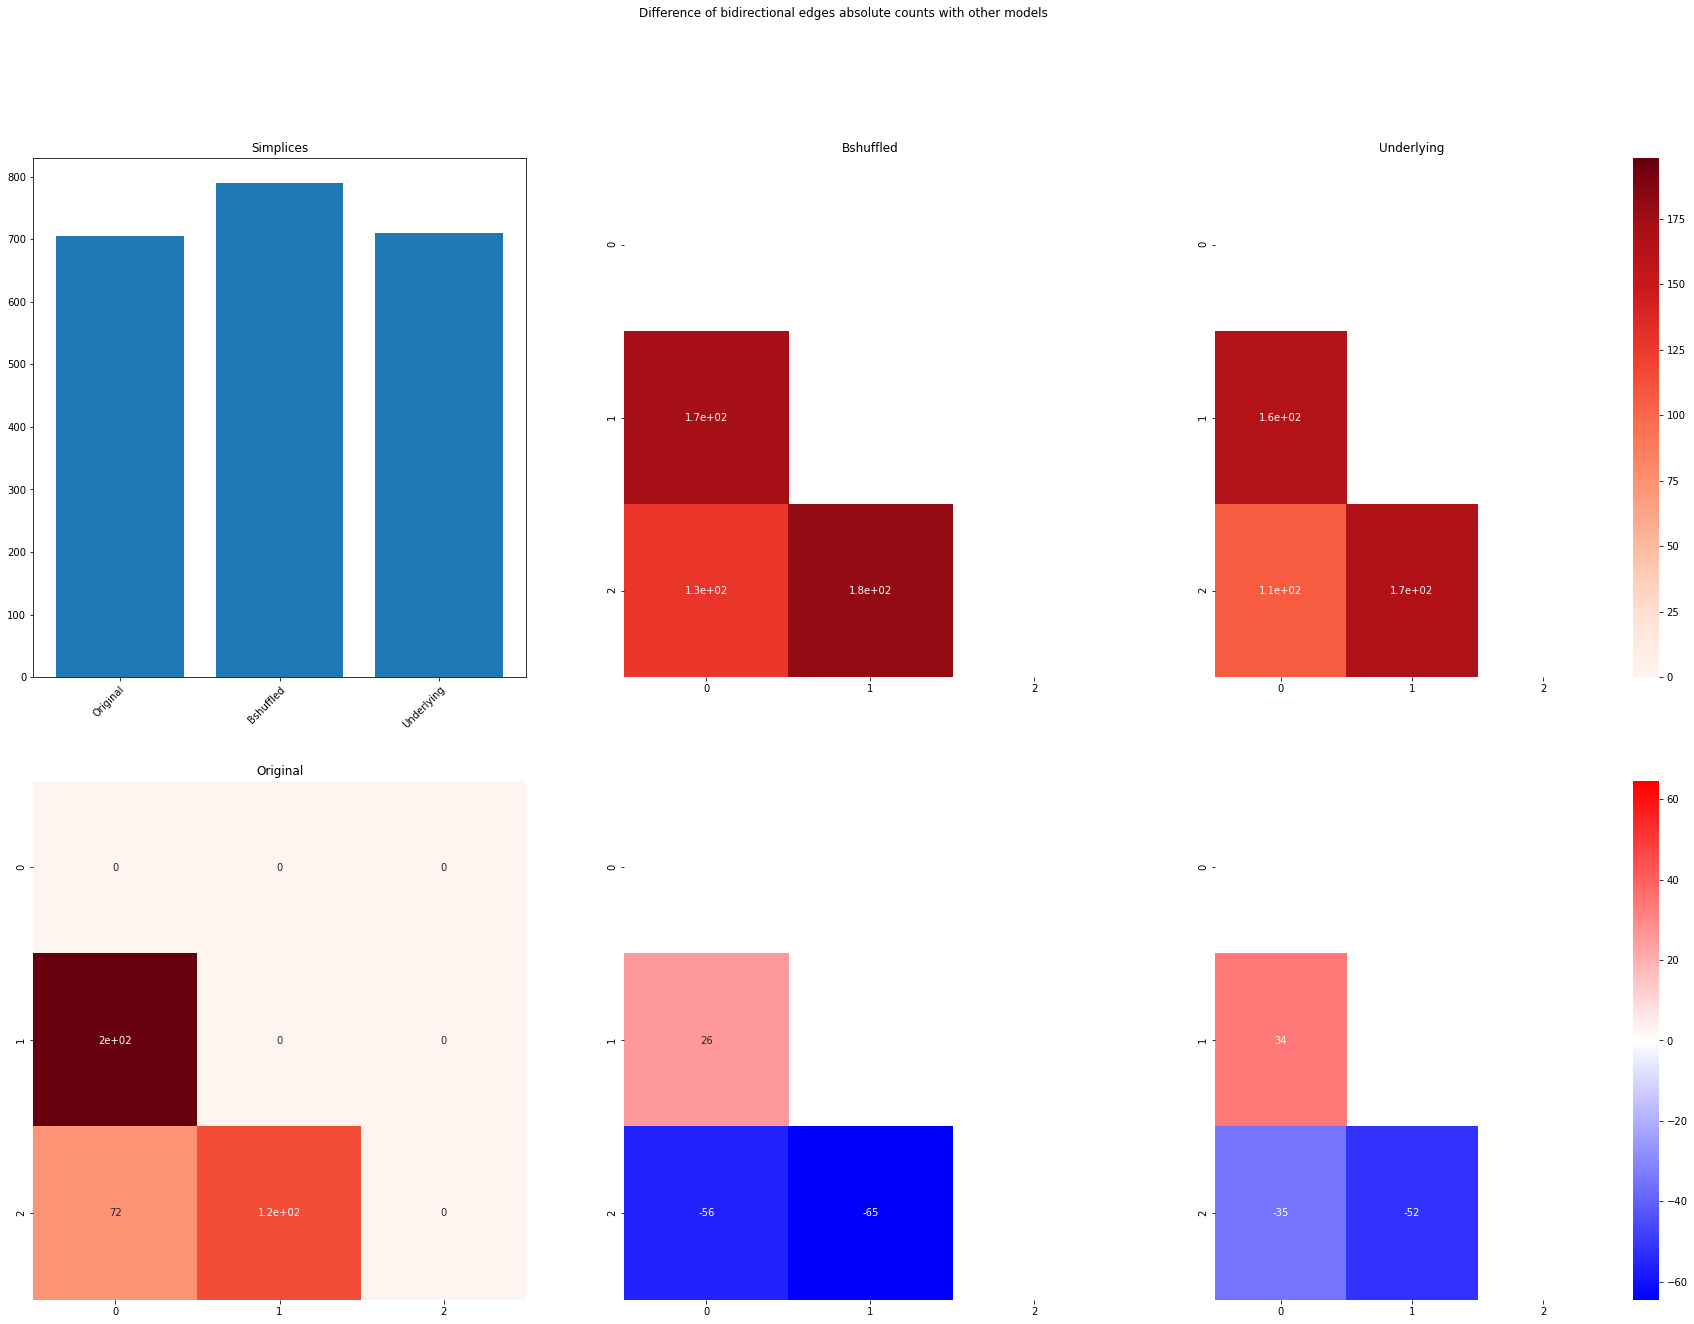

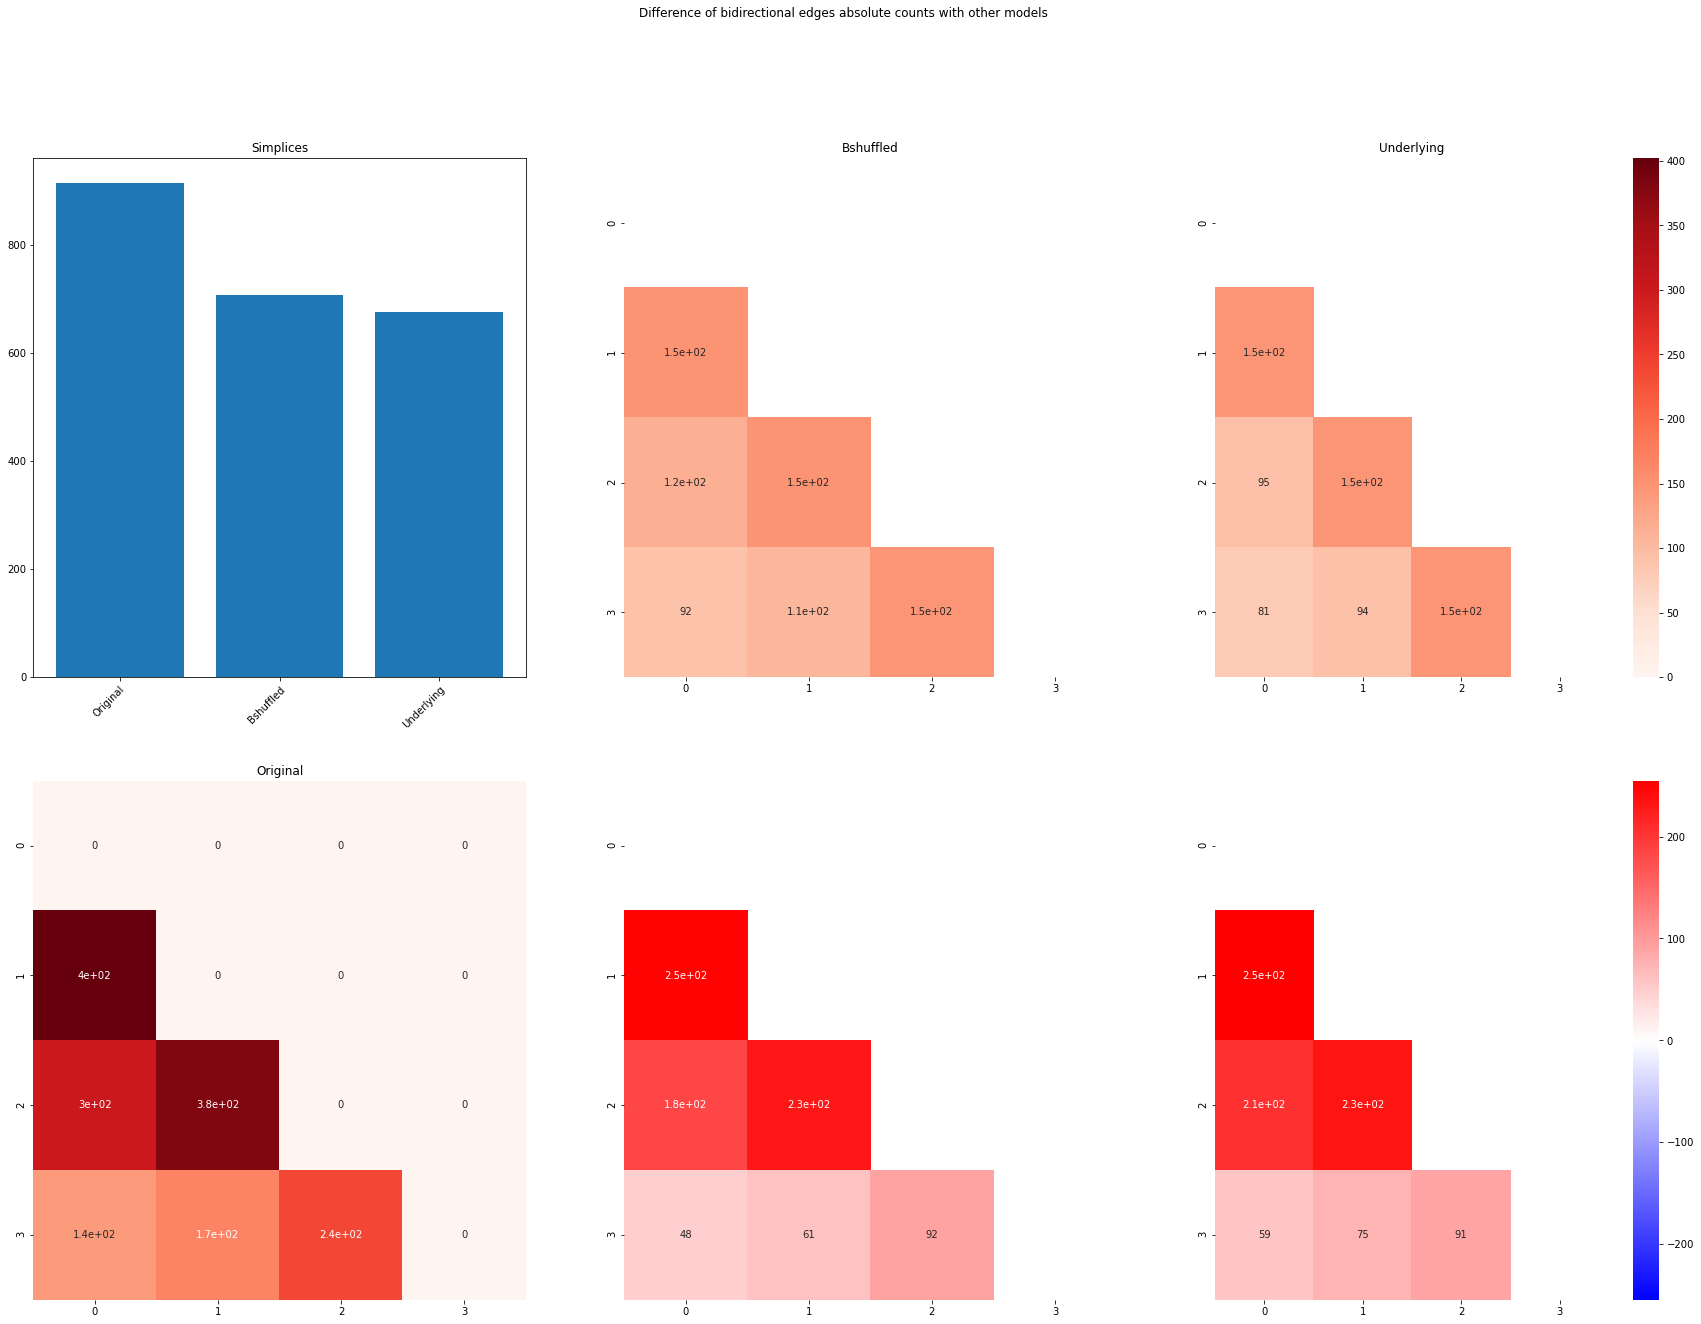

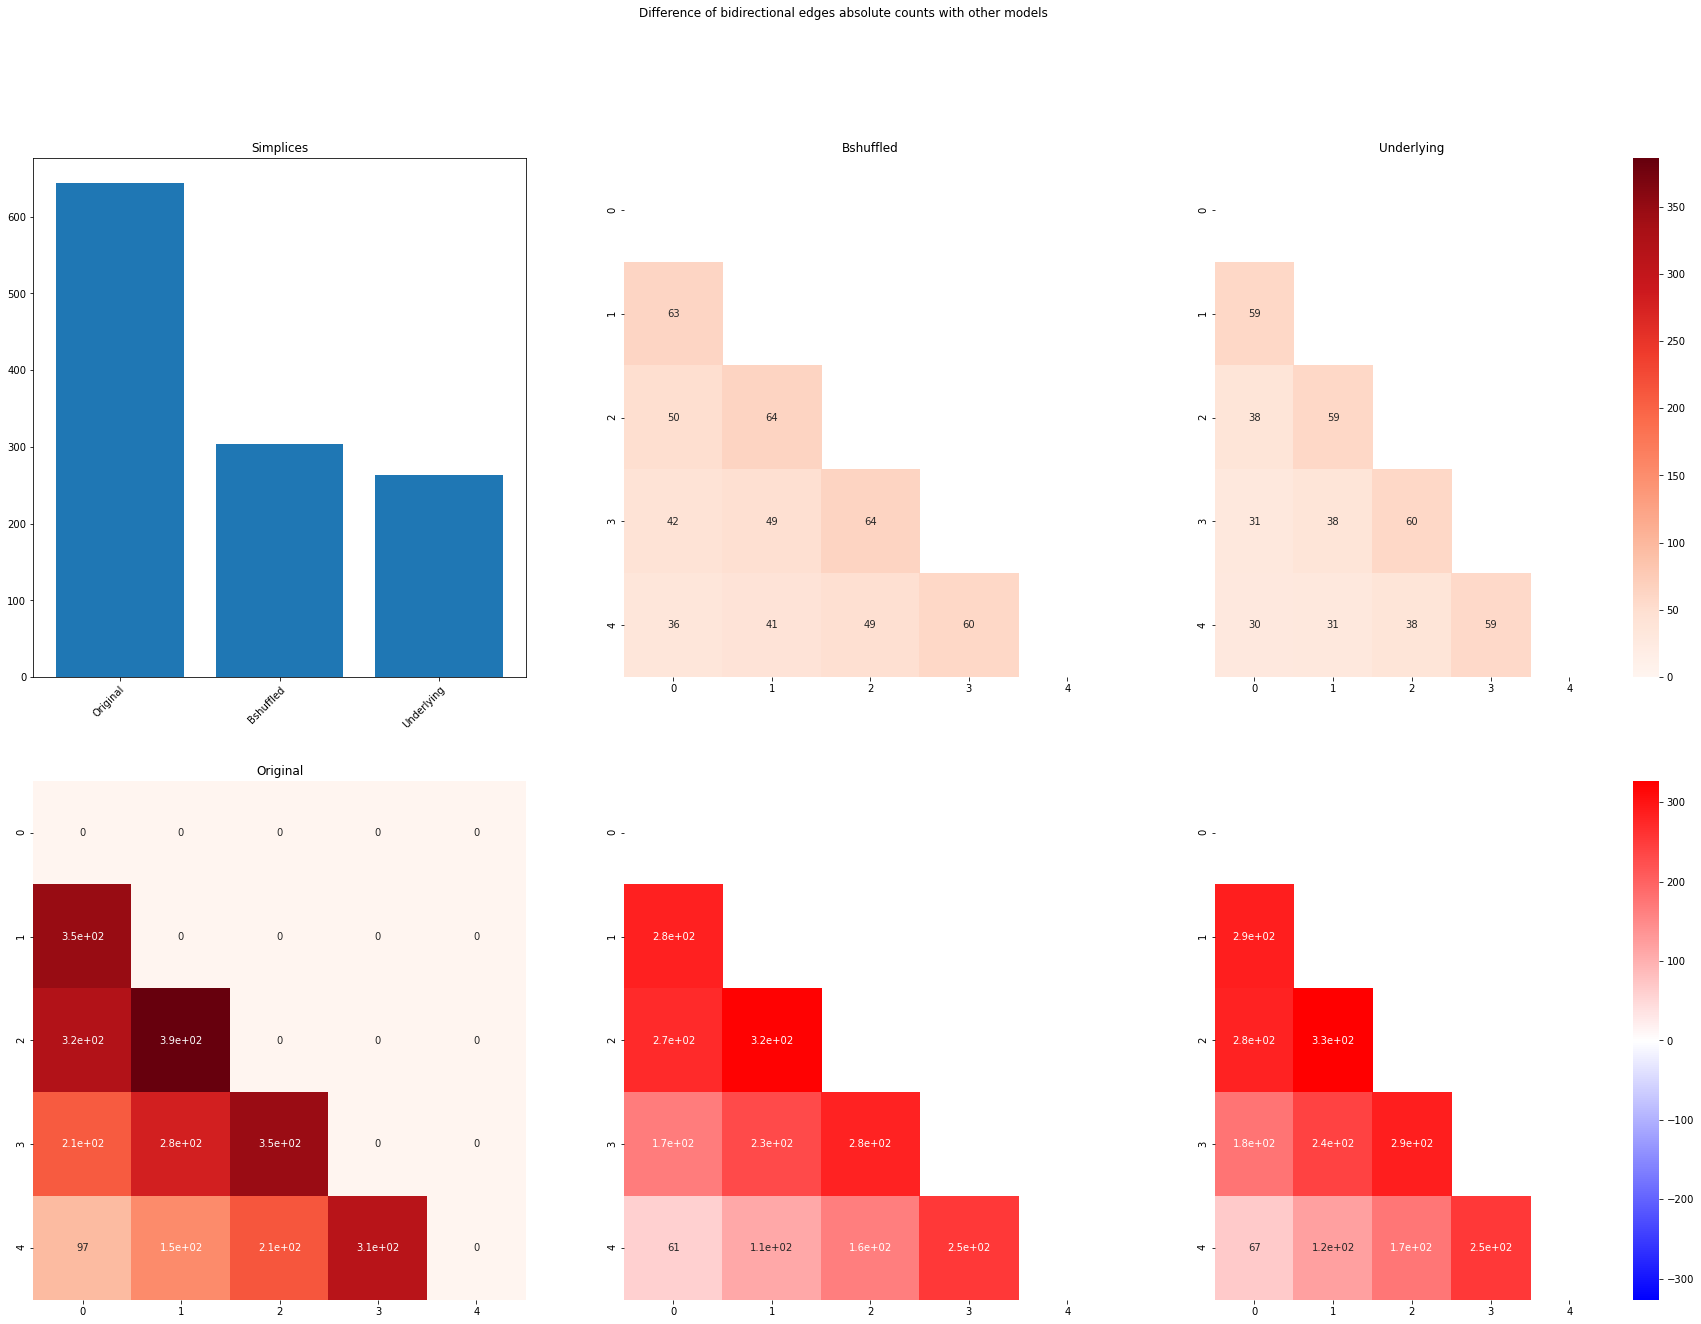

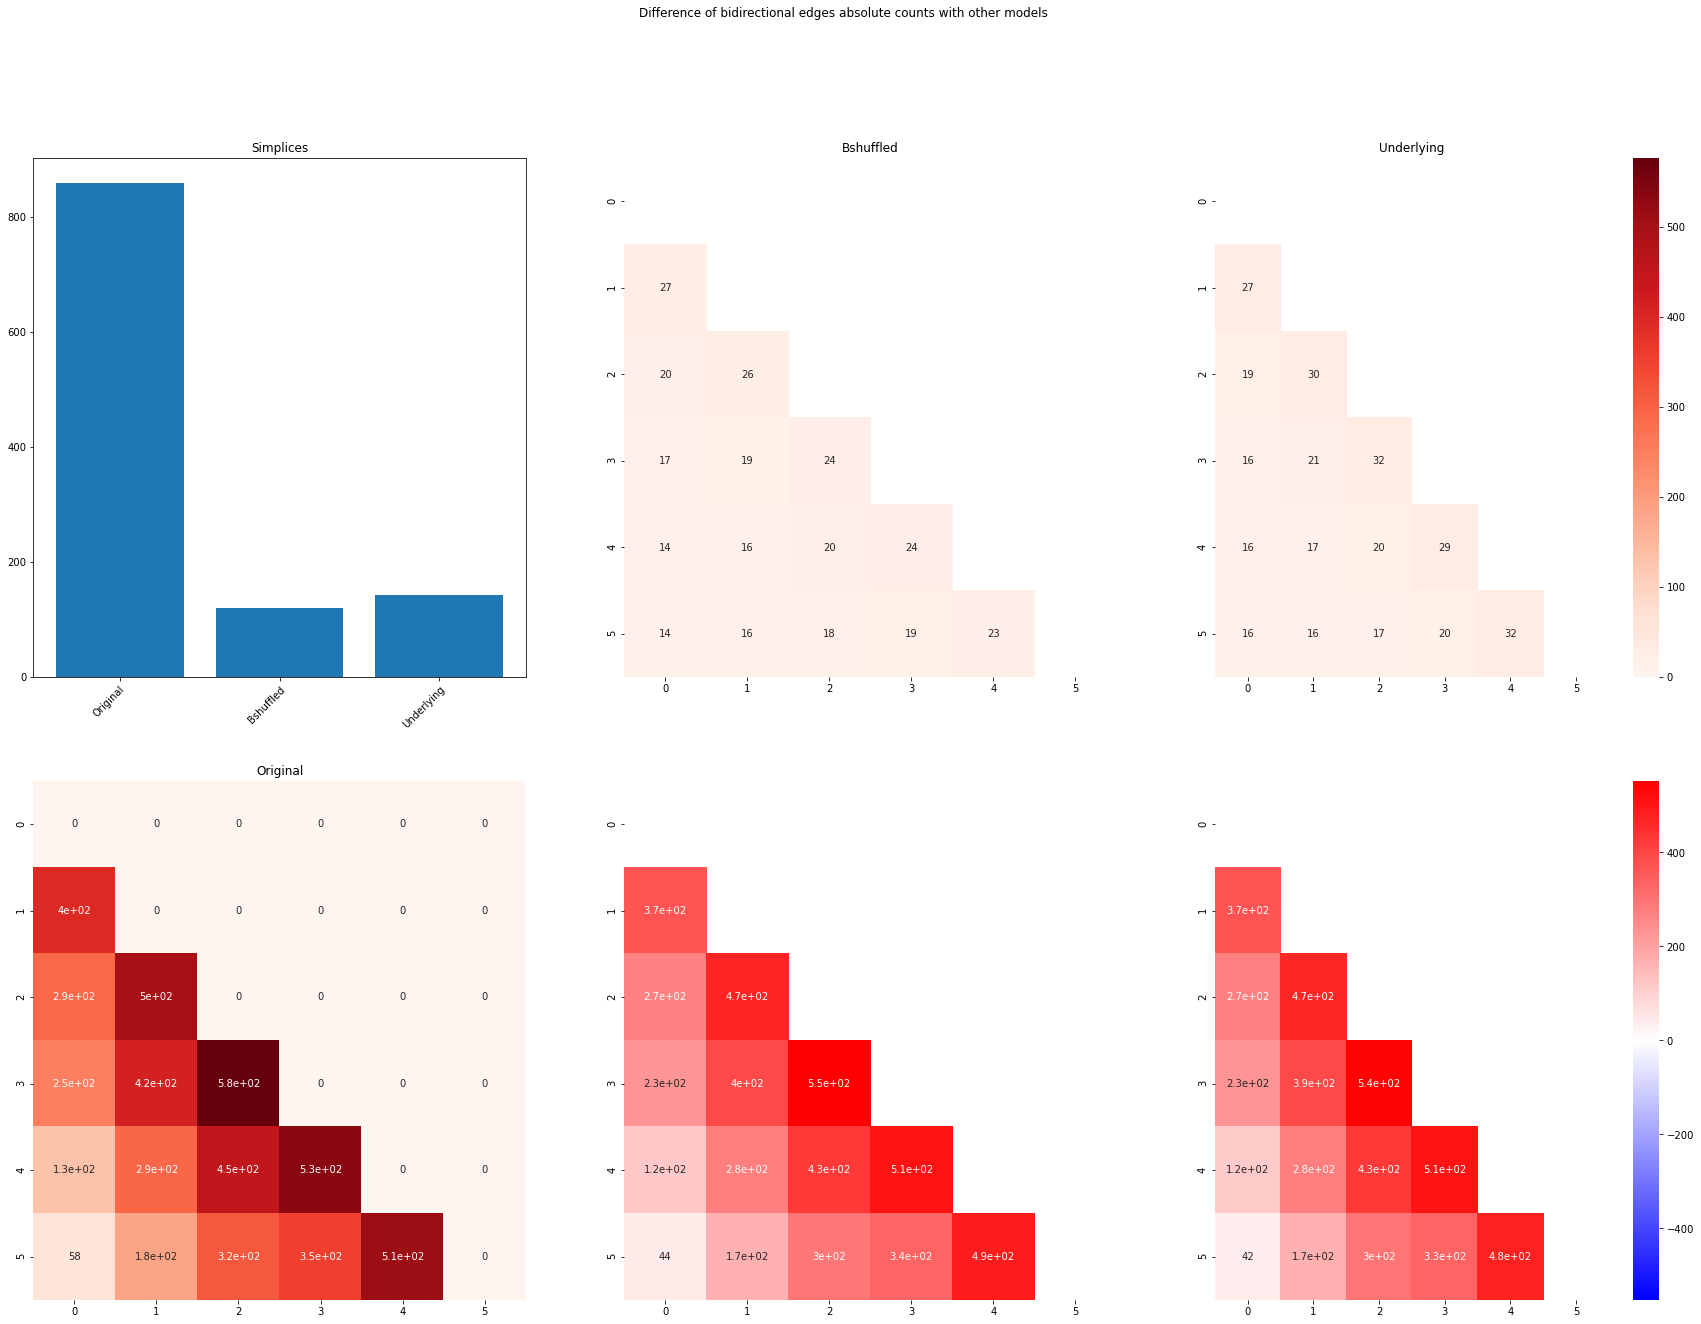

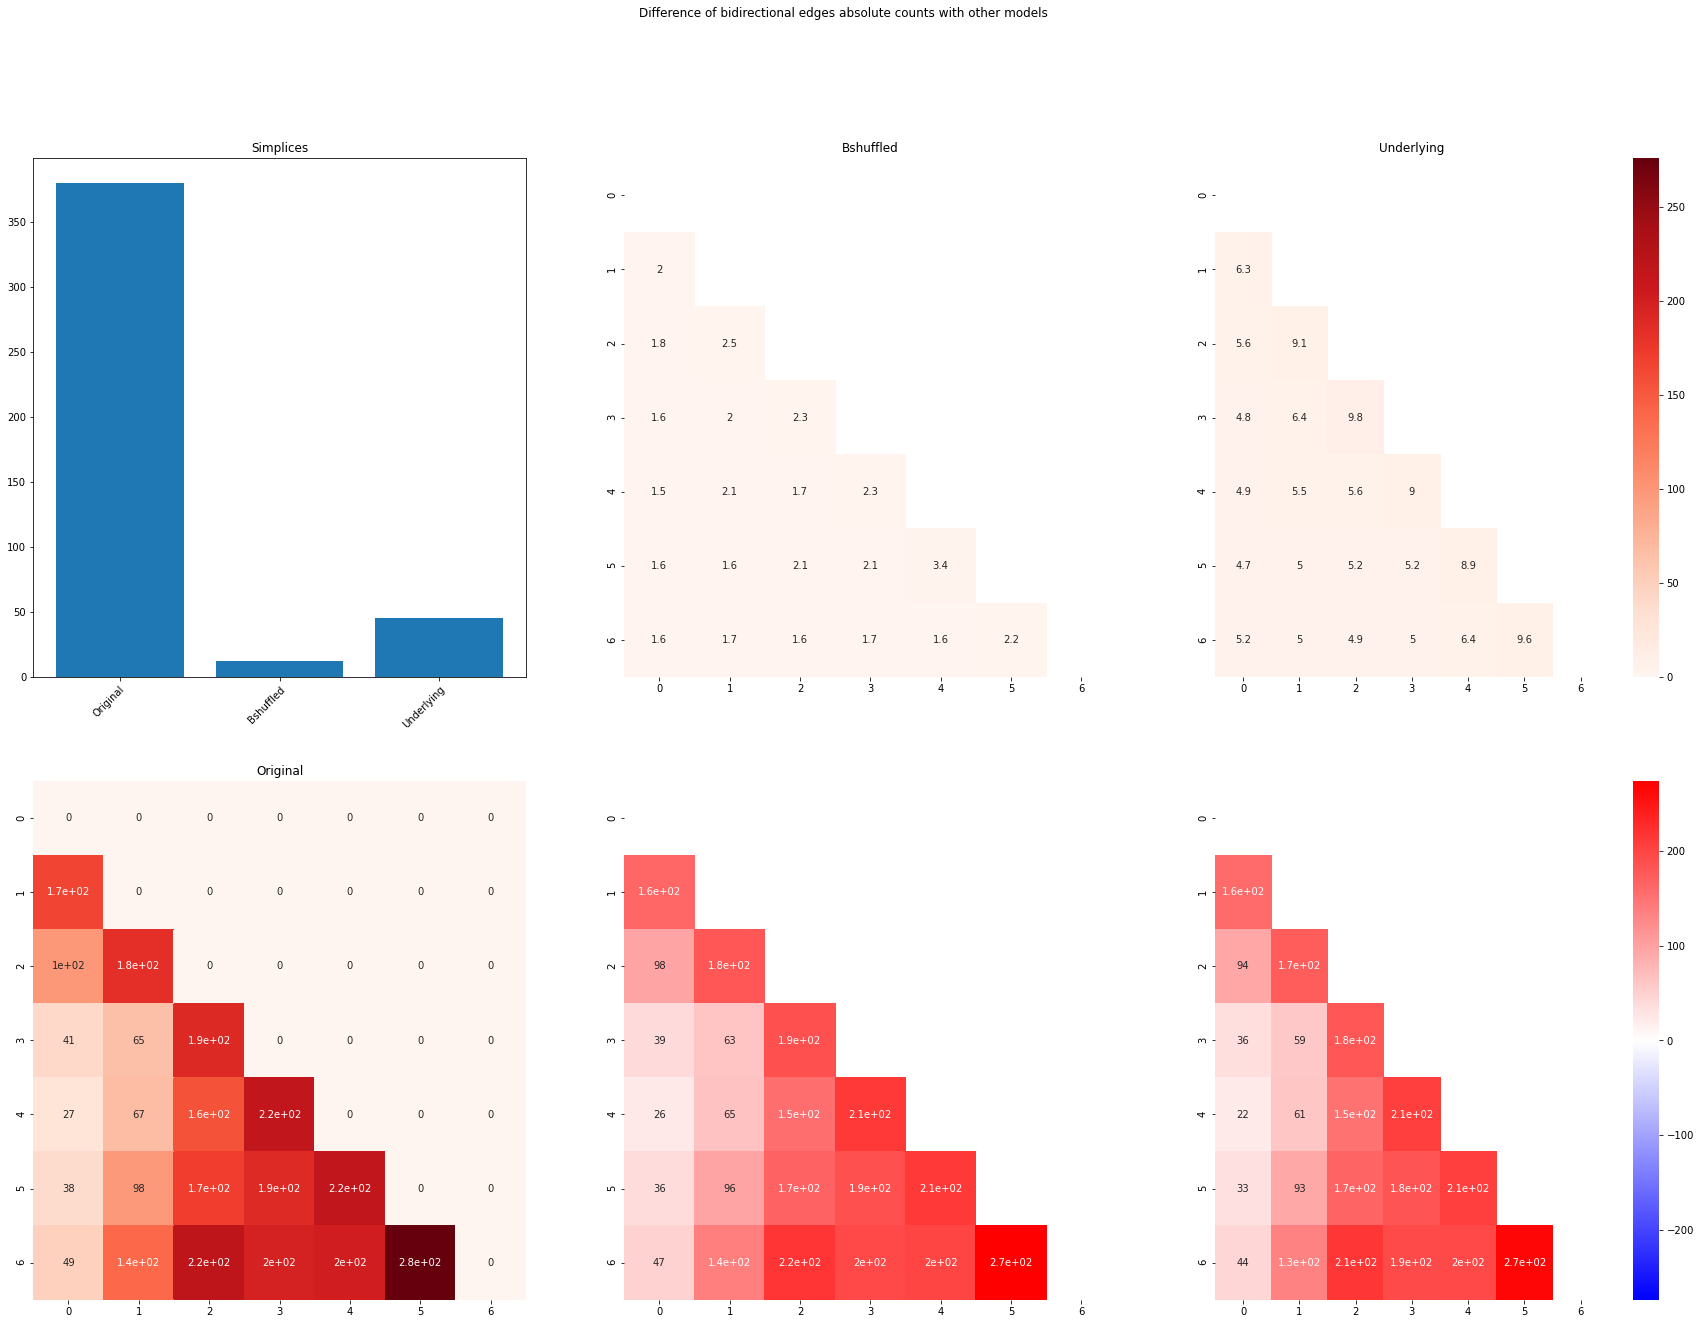

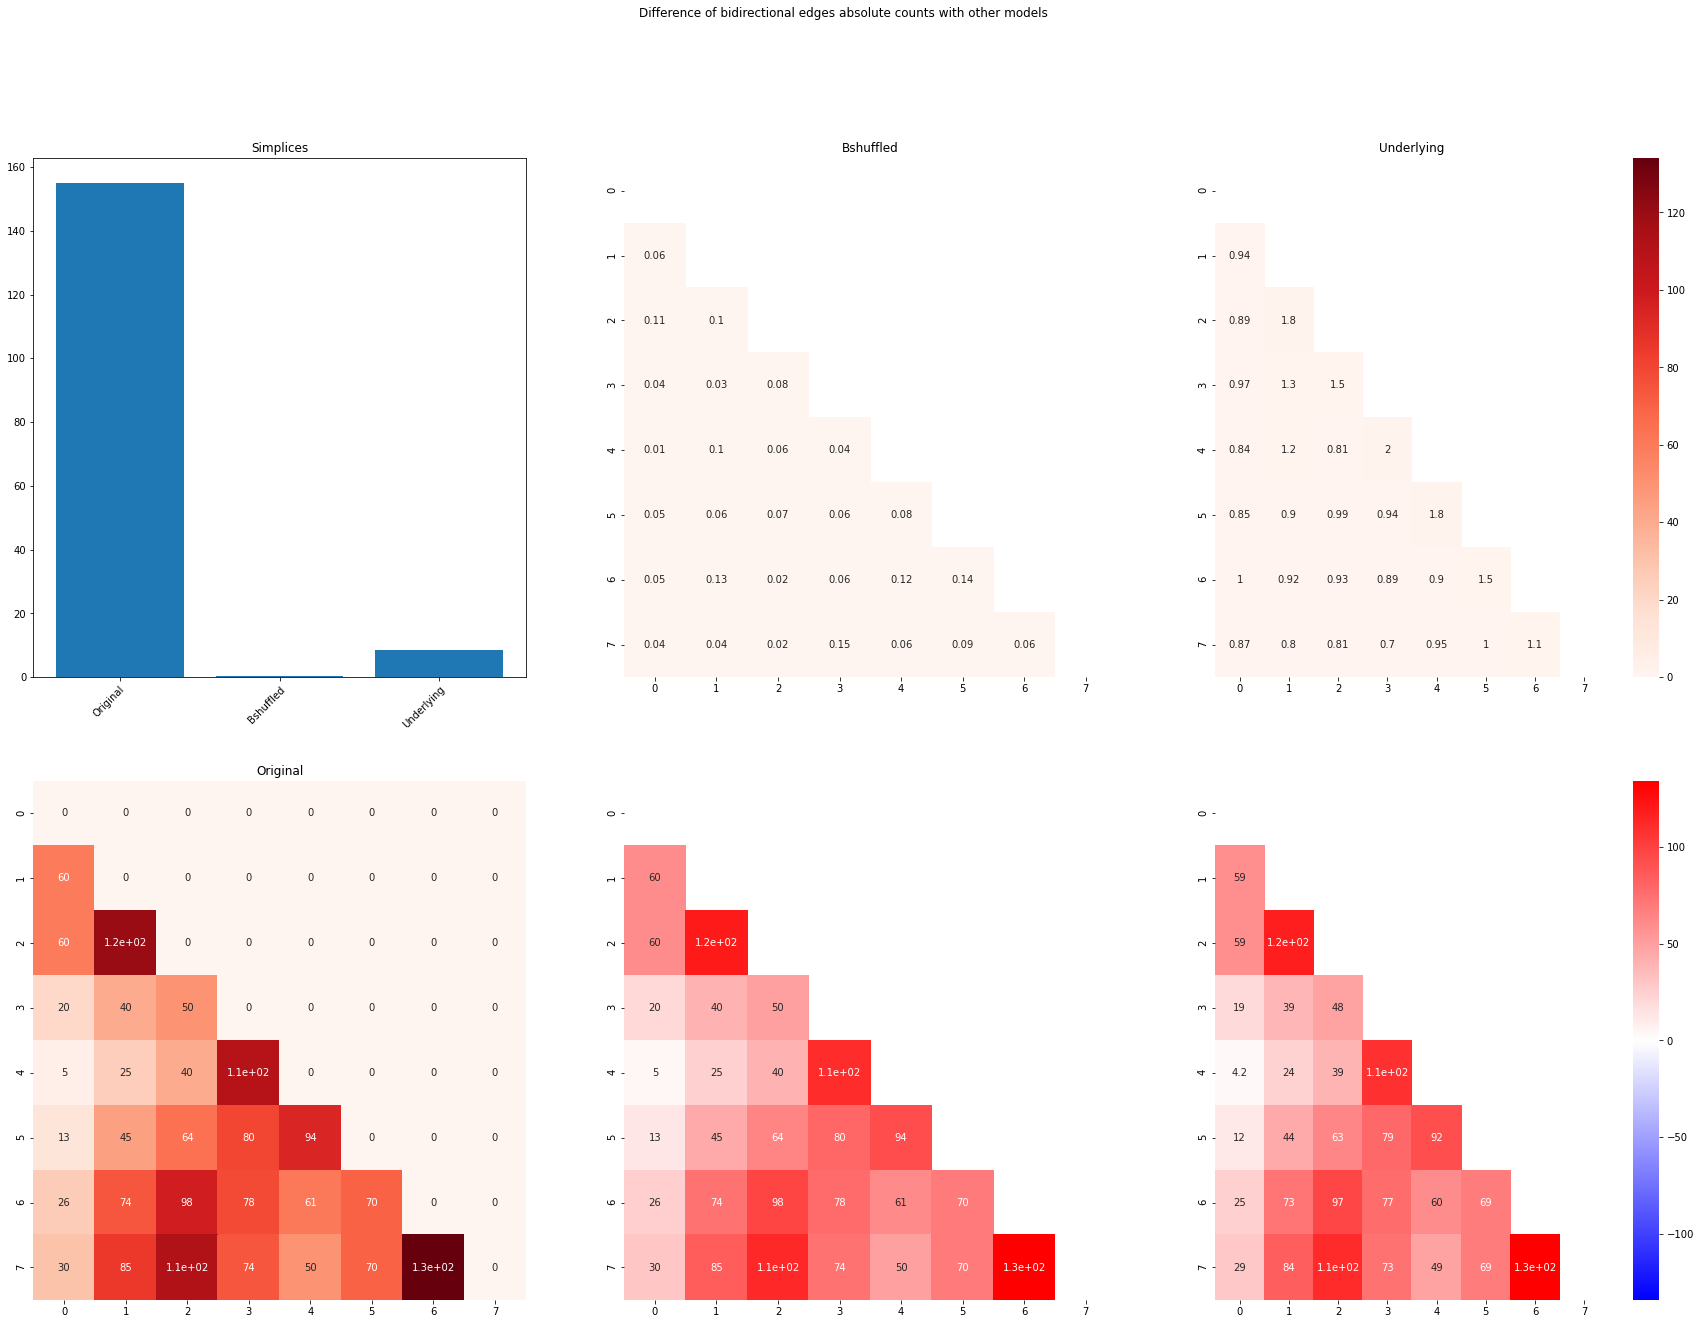

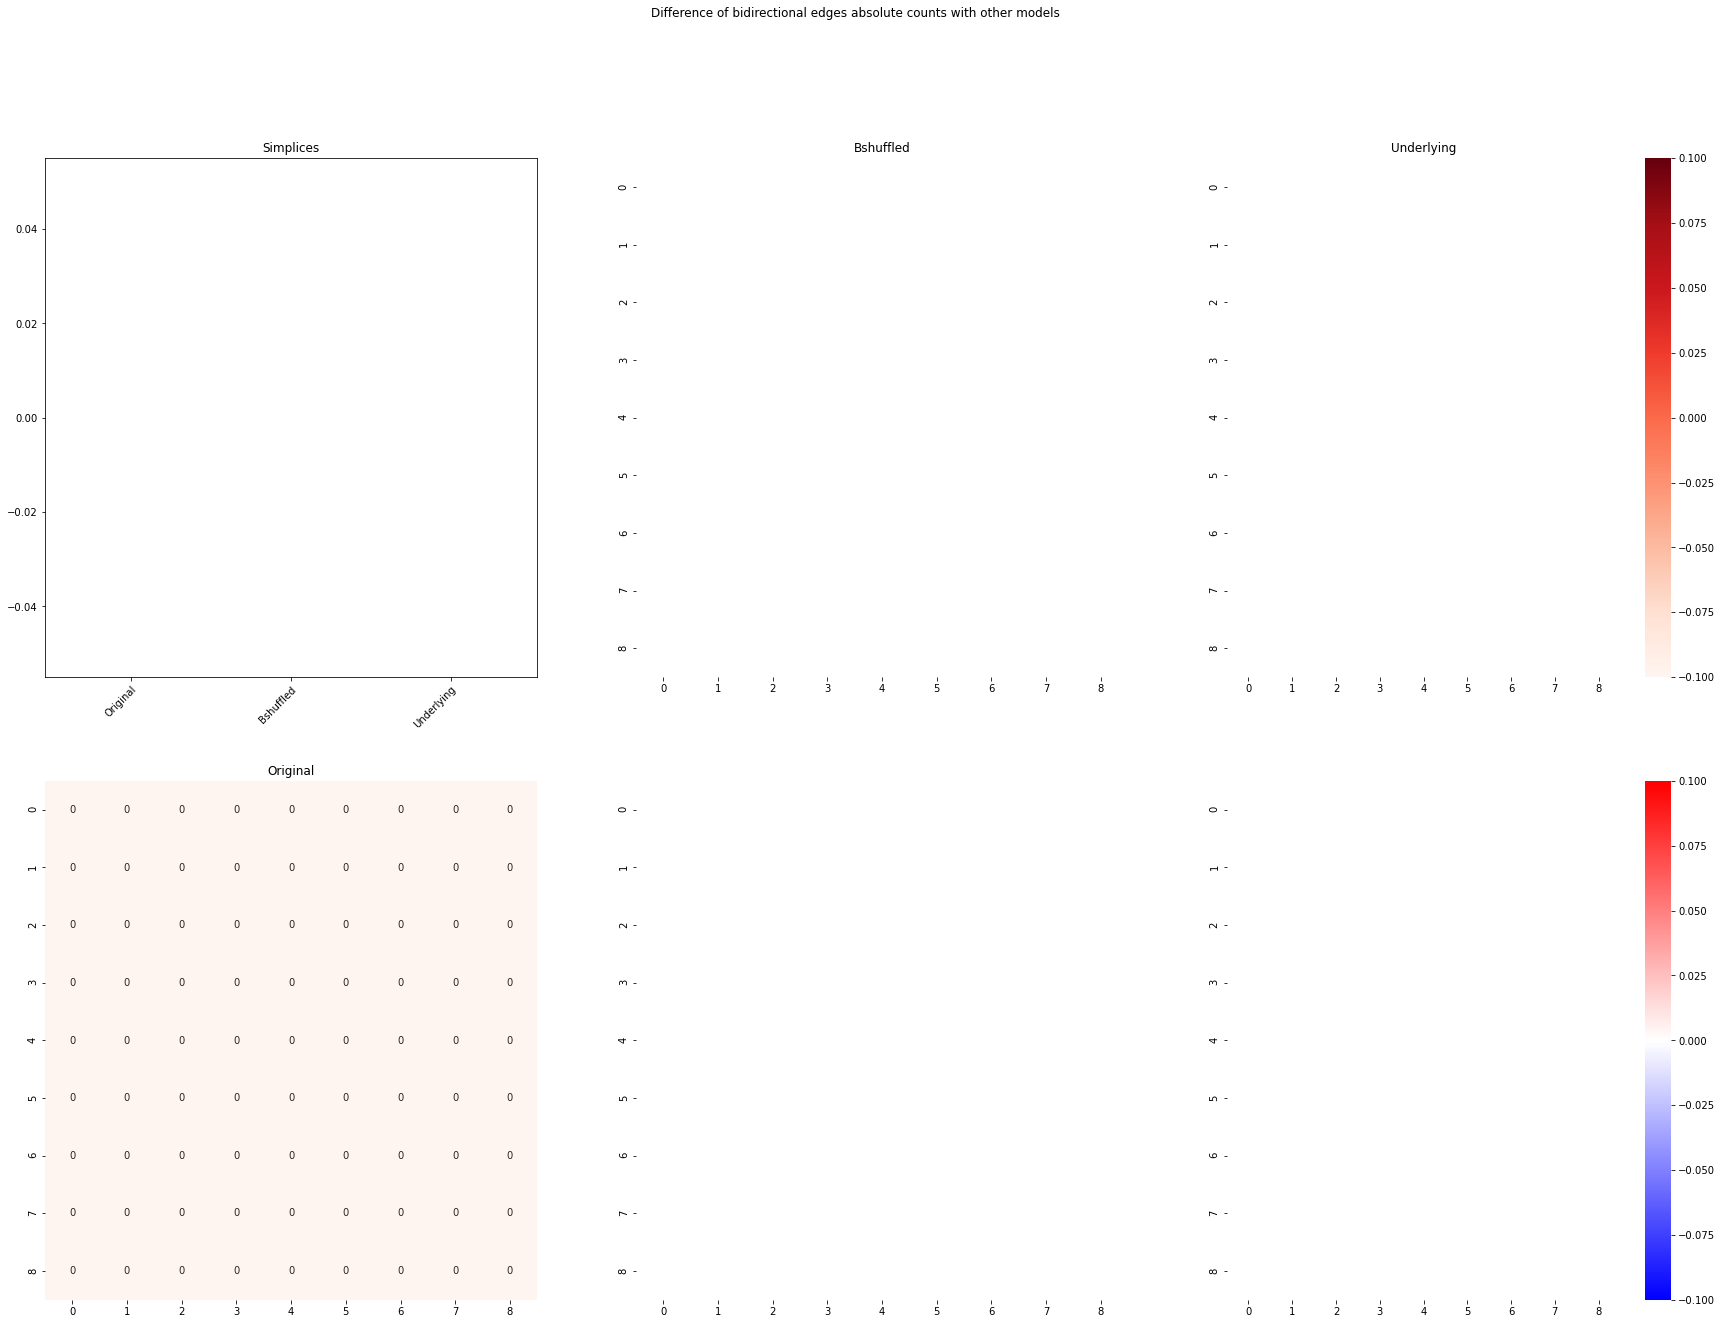

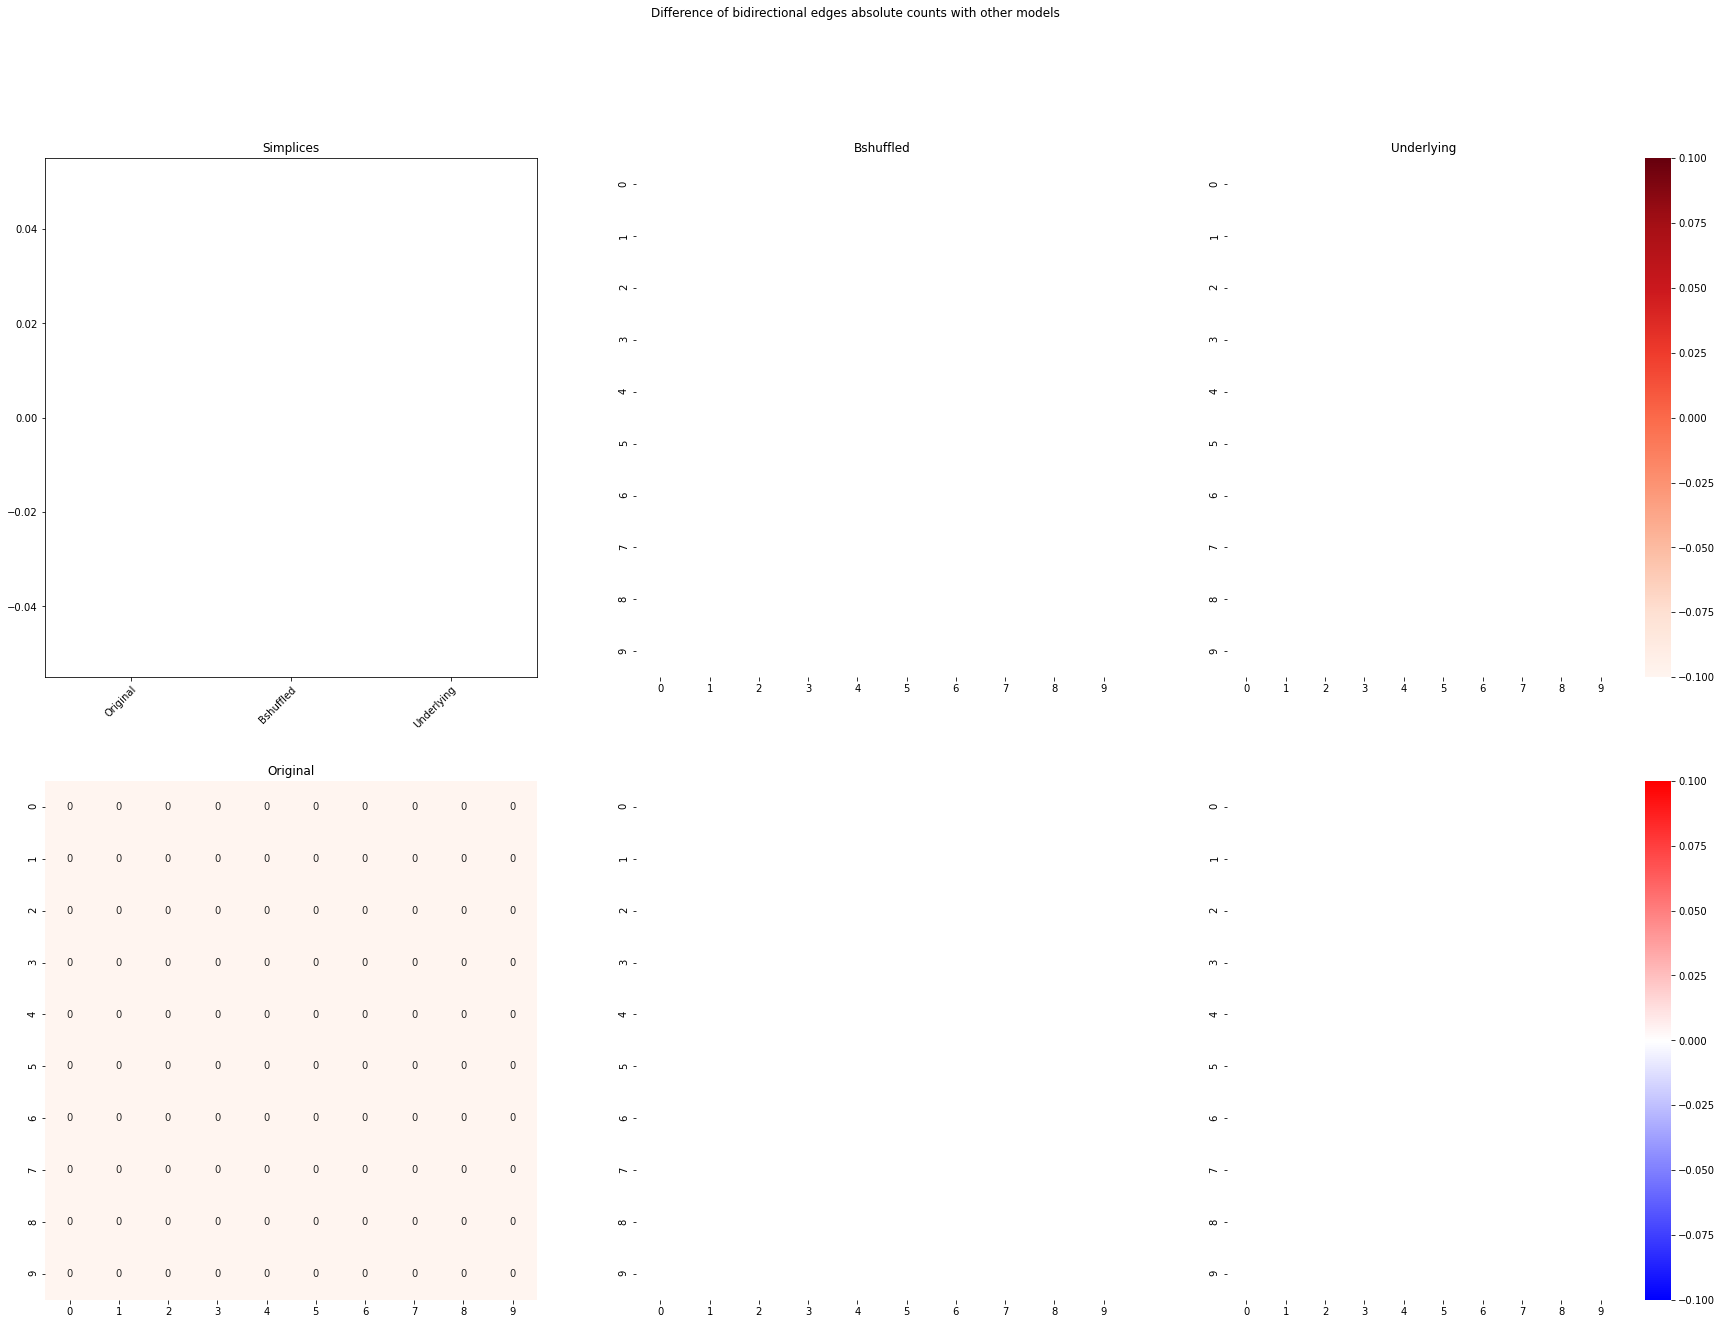

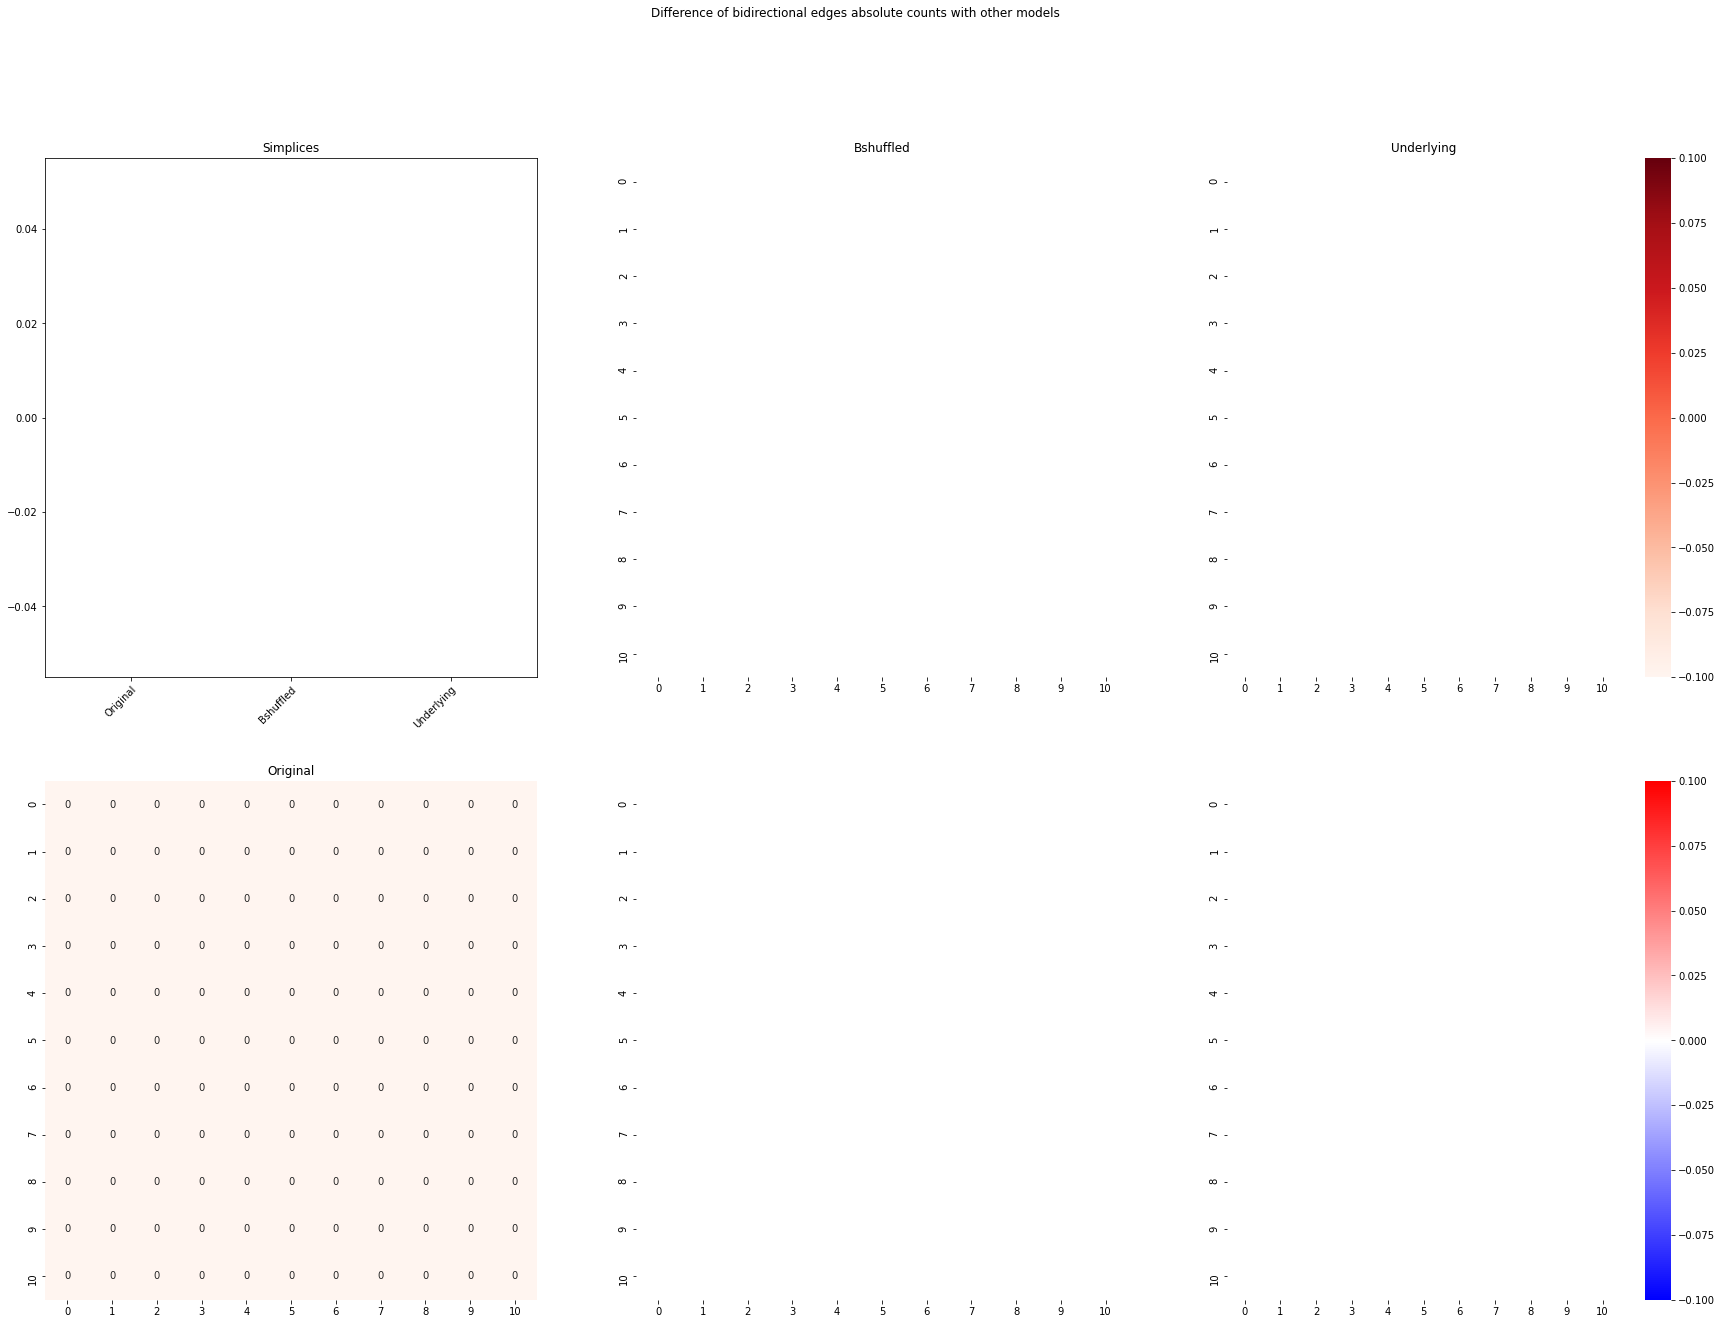

In [12]:
compare_graphs_diff([a,b,c], 1, "worm_mbcounts_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

# Percent

## All

In [13]:
a = pickle.load(open(Path("data/worm/full/bcounts.pkl"),'rb'))
for key in a.keys():
    a[key] = percent_transform(a[key])[0]
b = get_average_bcounts(Path("data/worm_control/bishuffled/"), transform = percent_transform)
c = get_average_bcounts(Path("data/worm_control/underlying/"), transform = percent_transform)

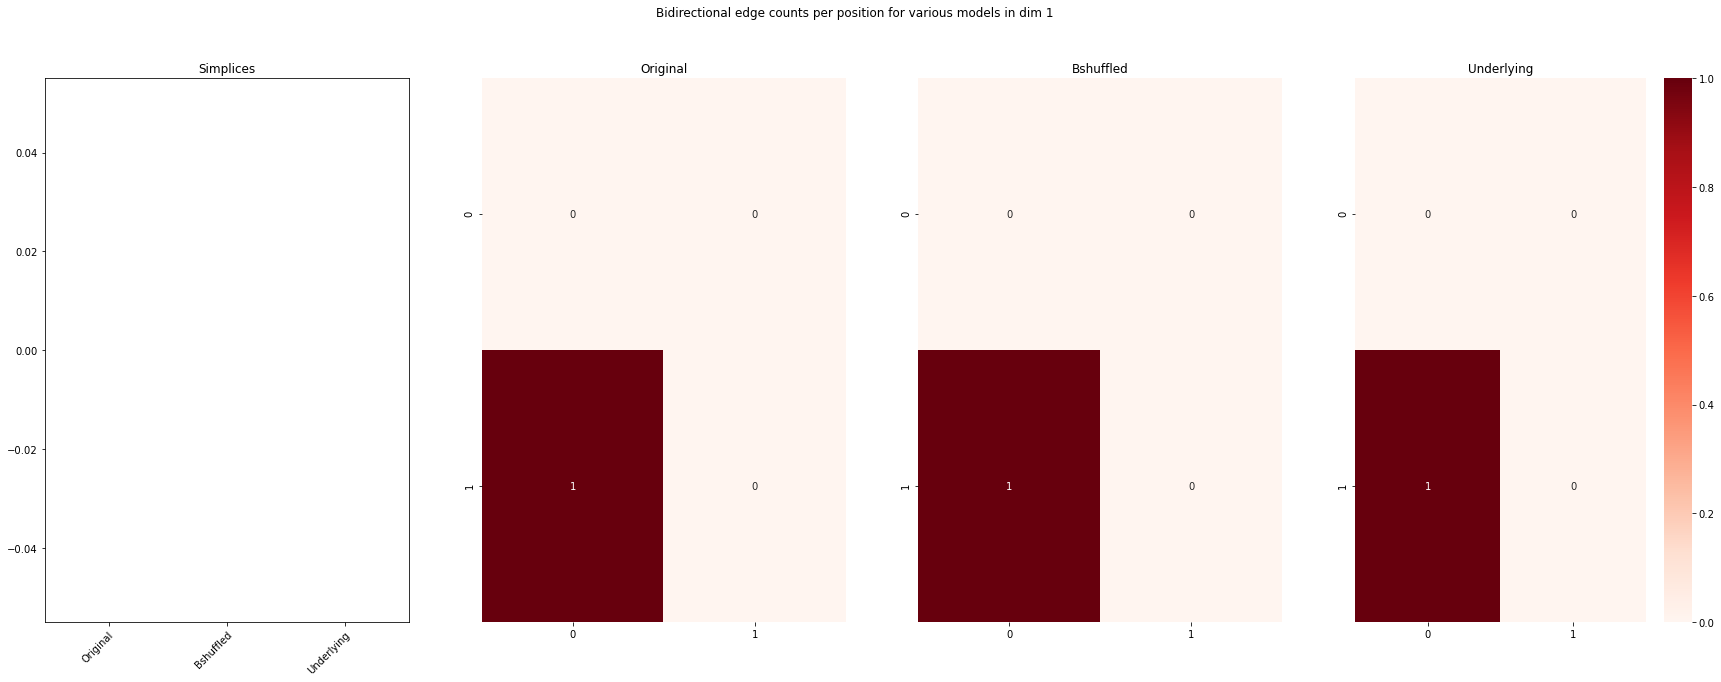

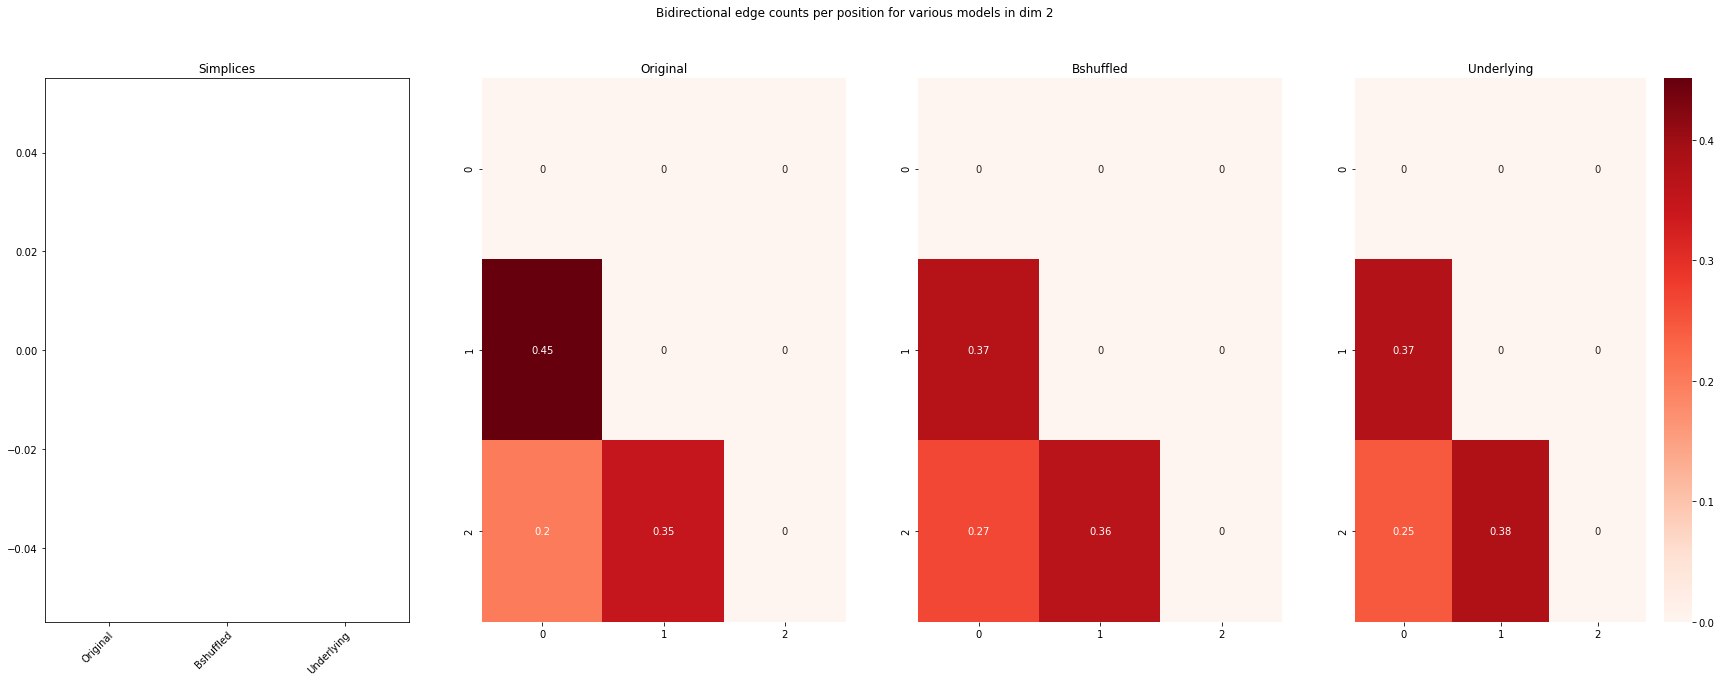

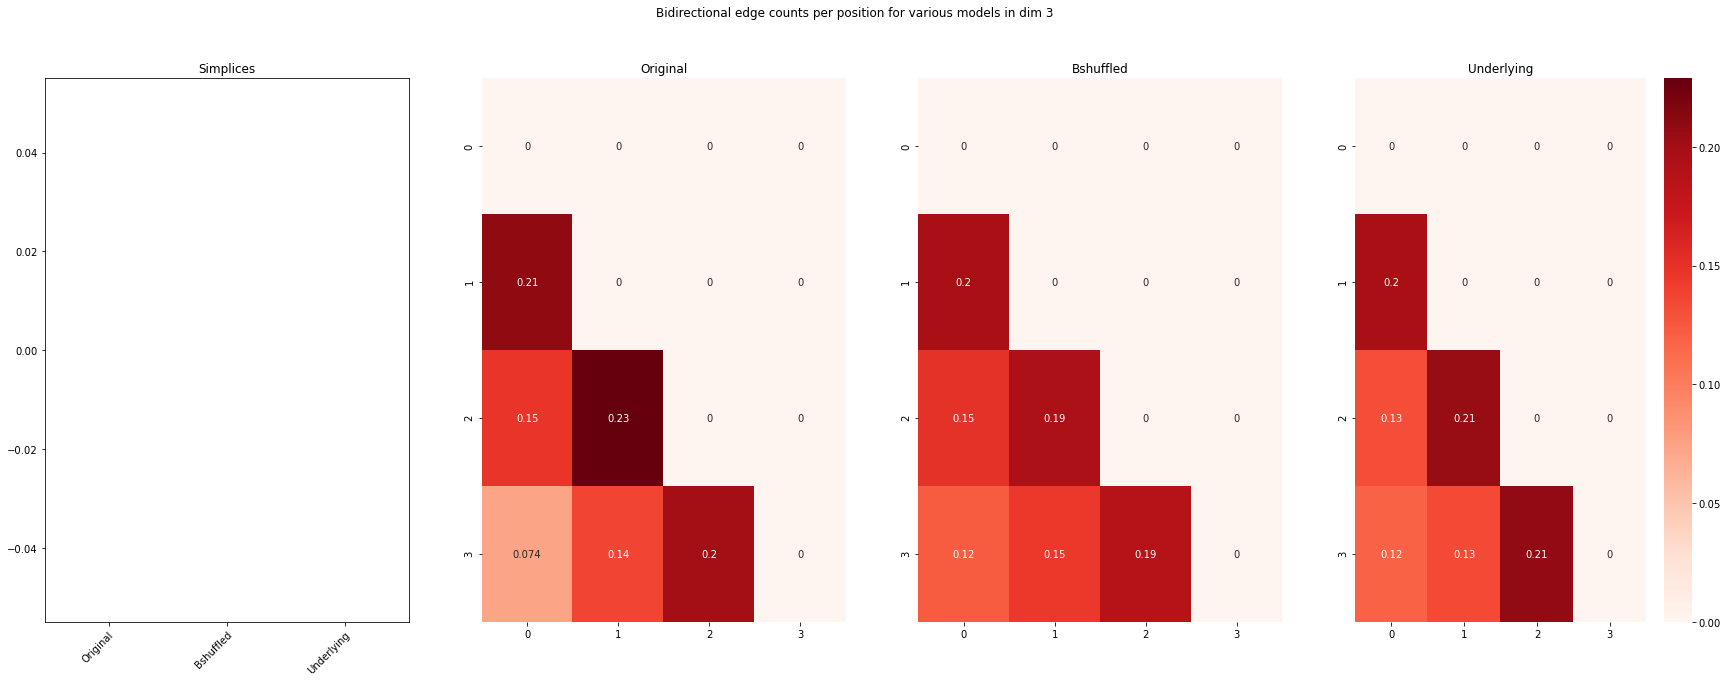

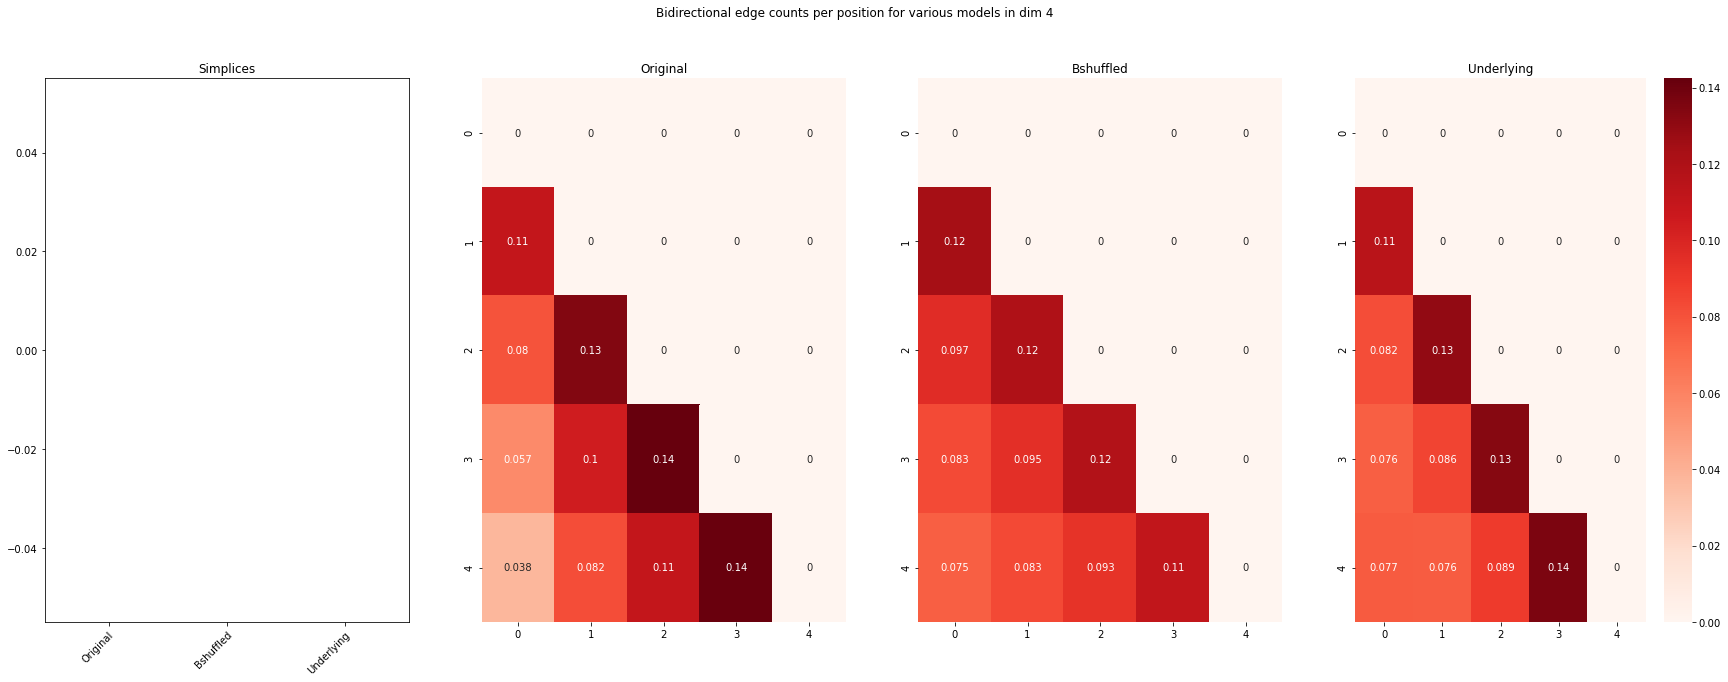

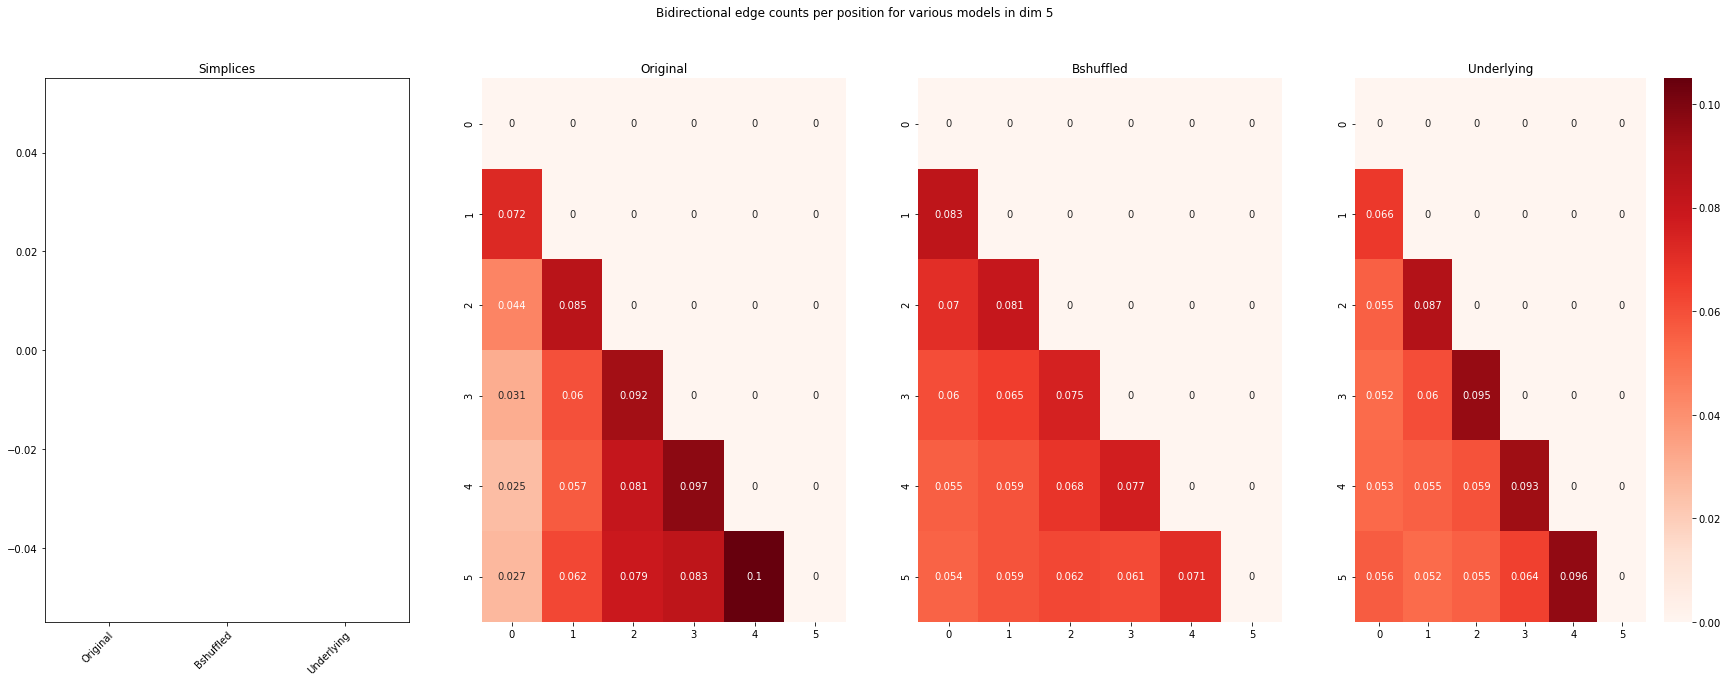

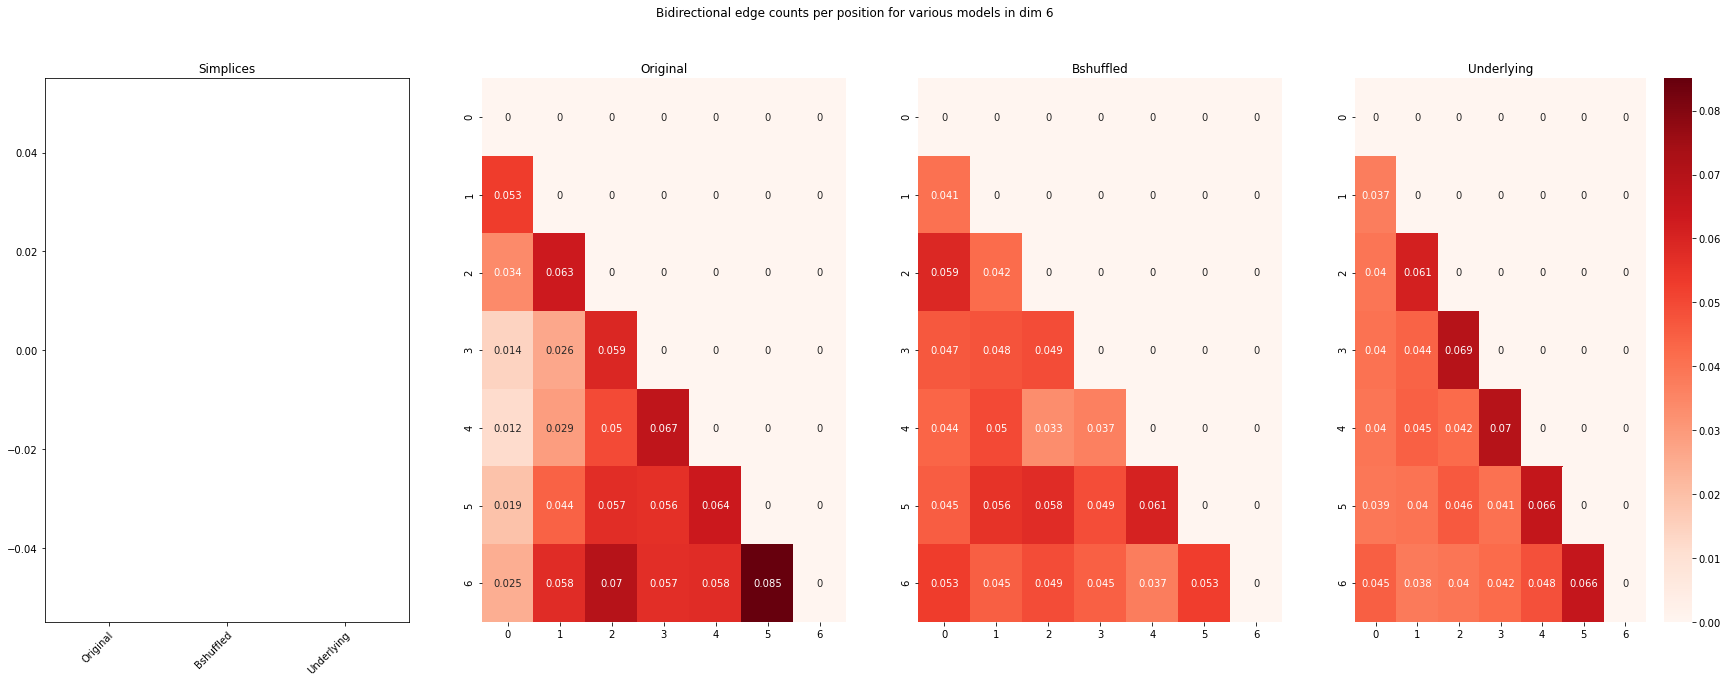

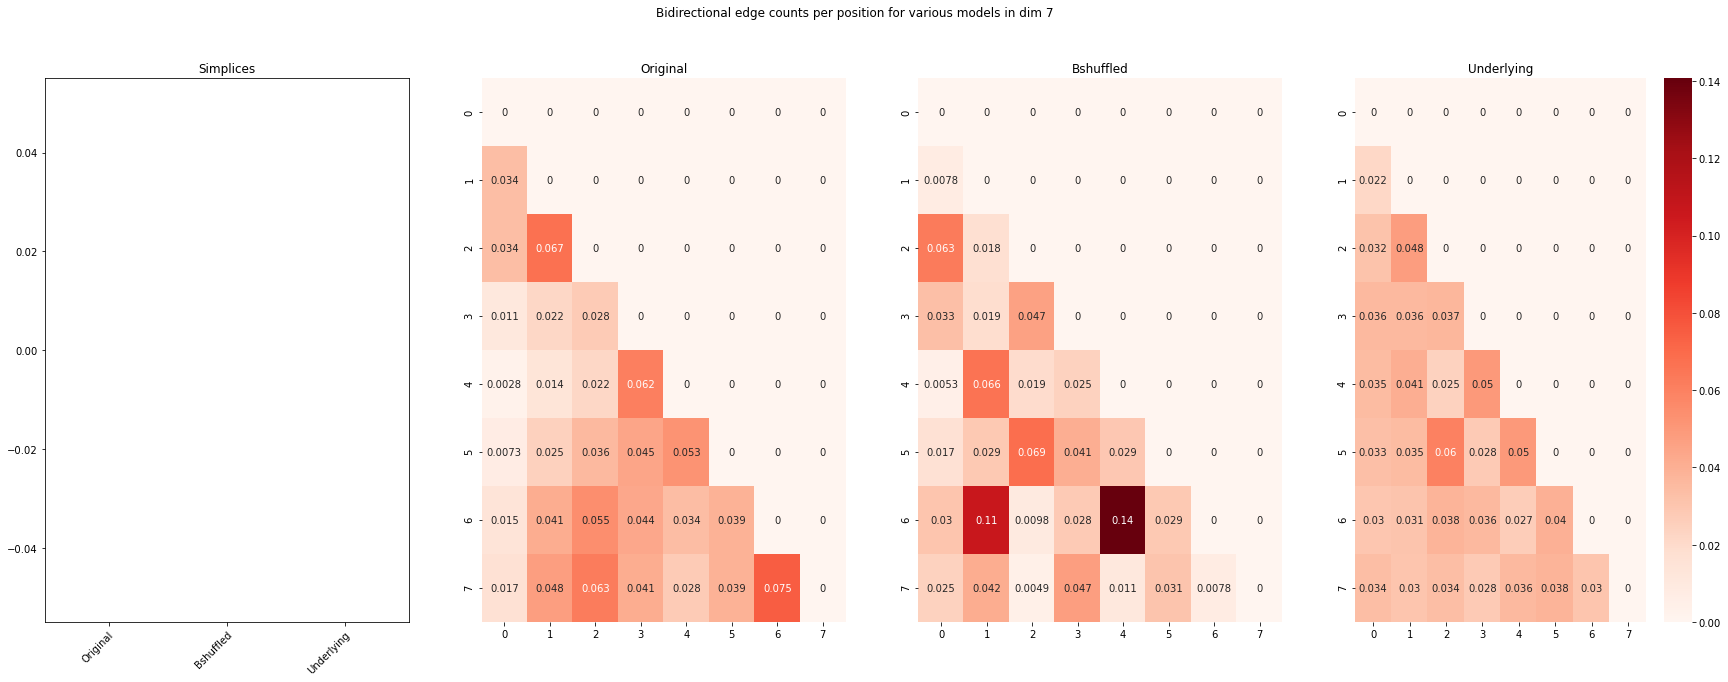

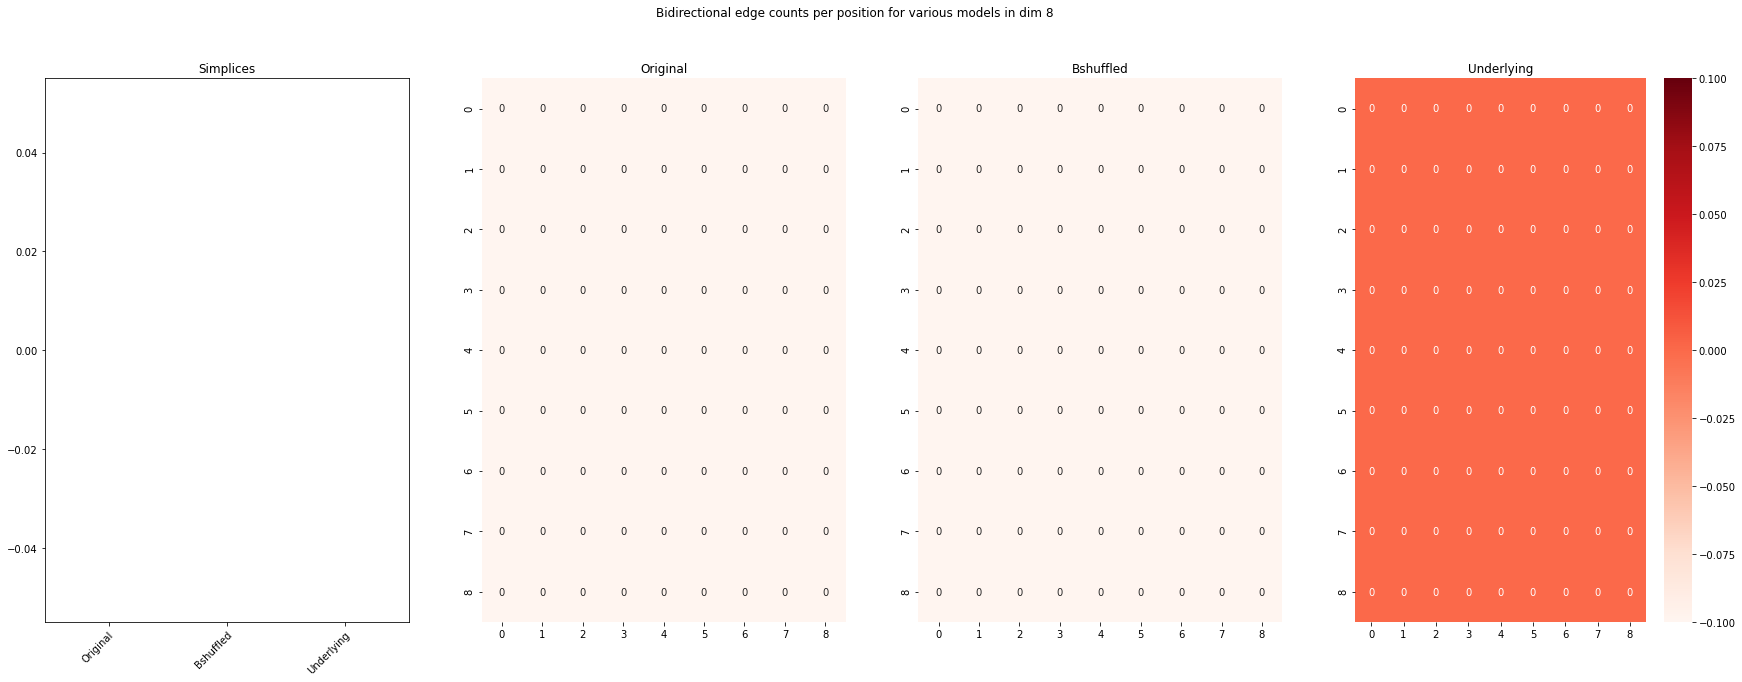

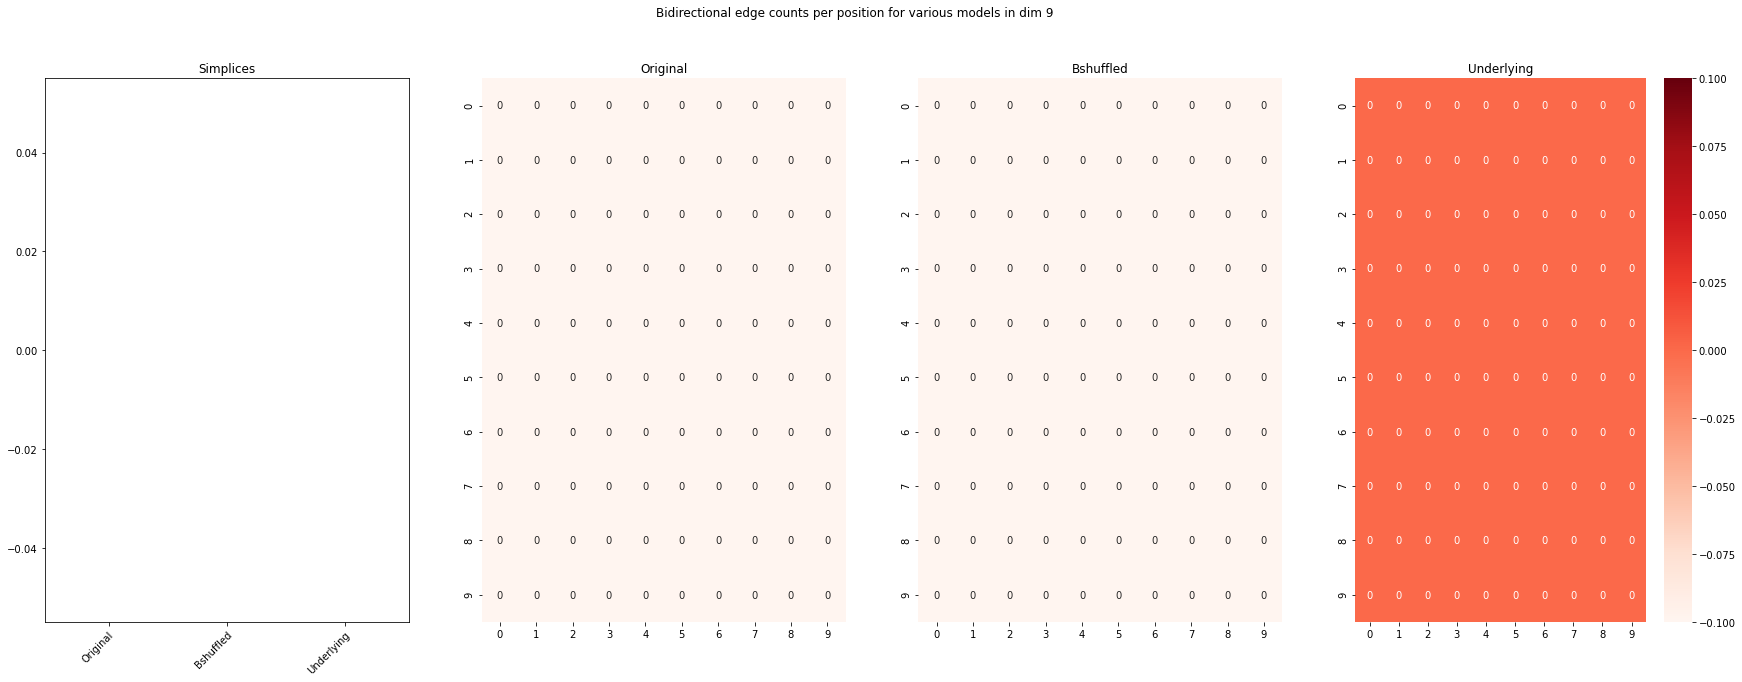

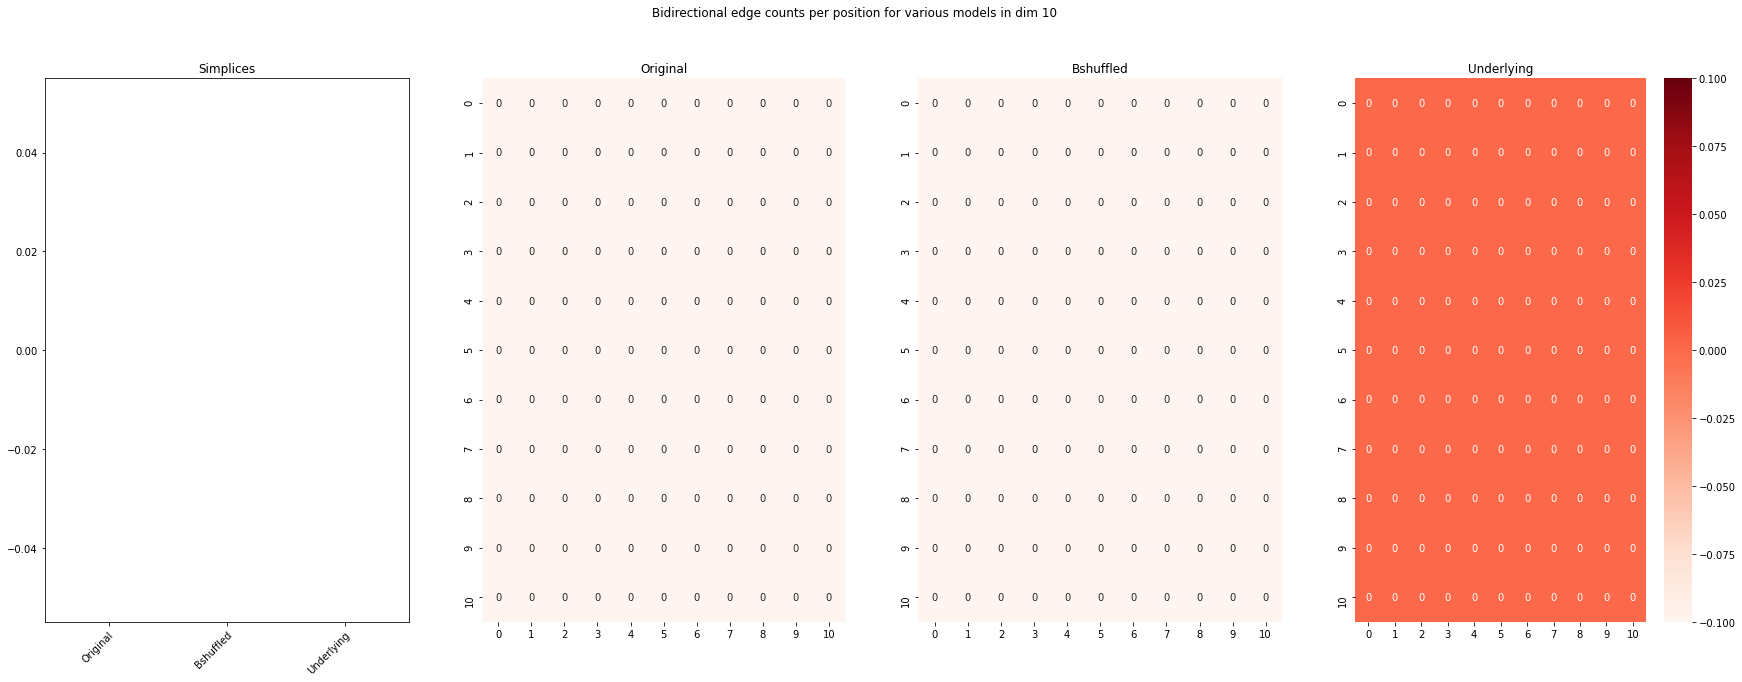

In [14]:
compare_graphs([a,b,c], 1, "worm_bcounts_percent", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

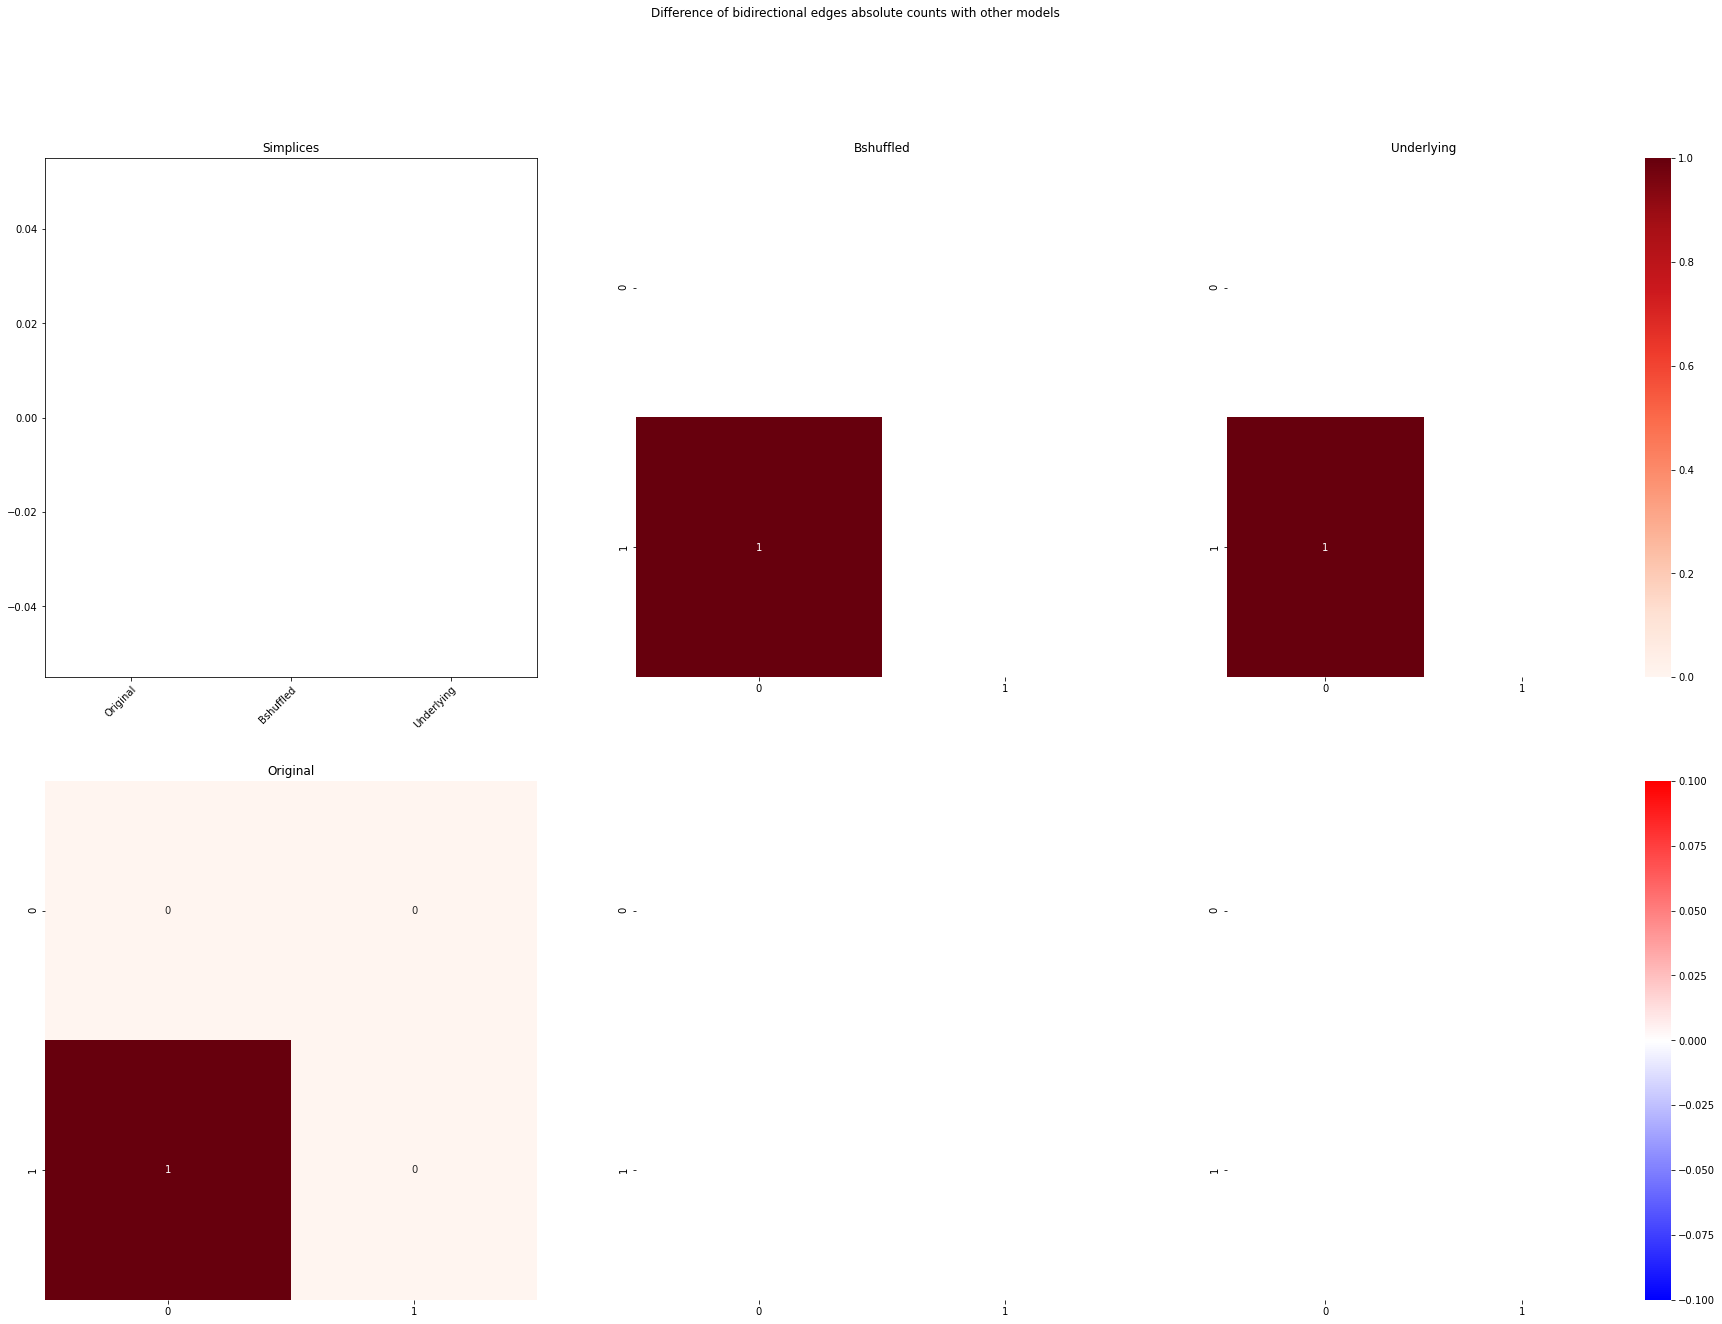

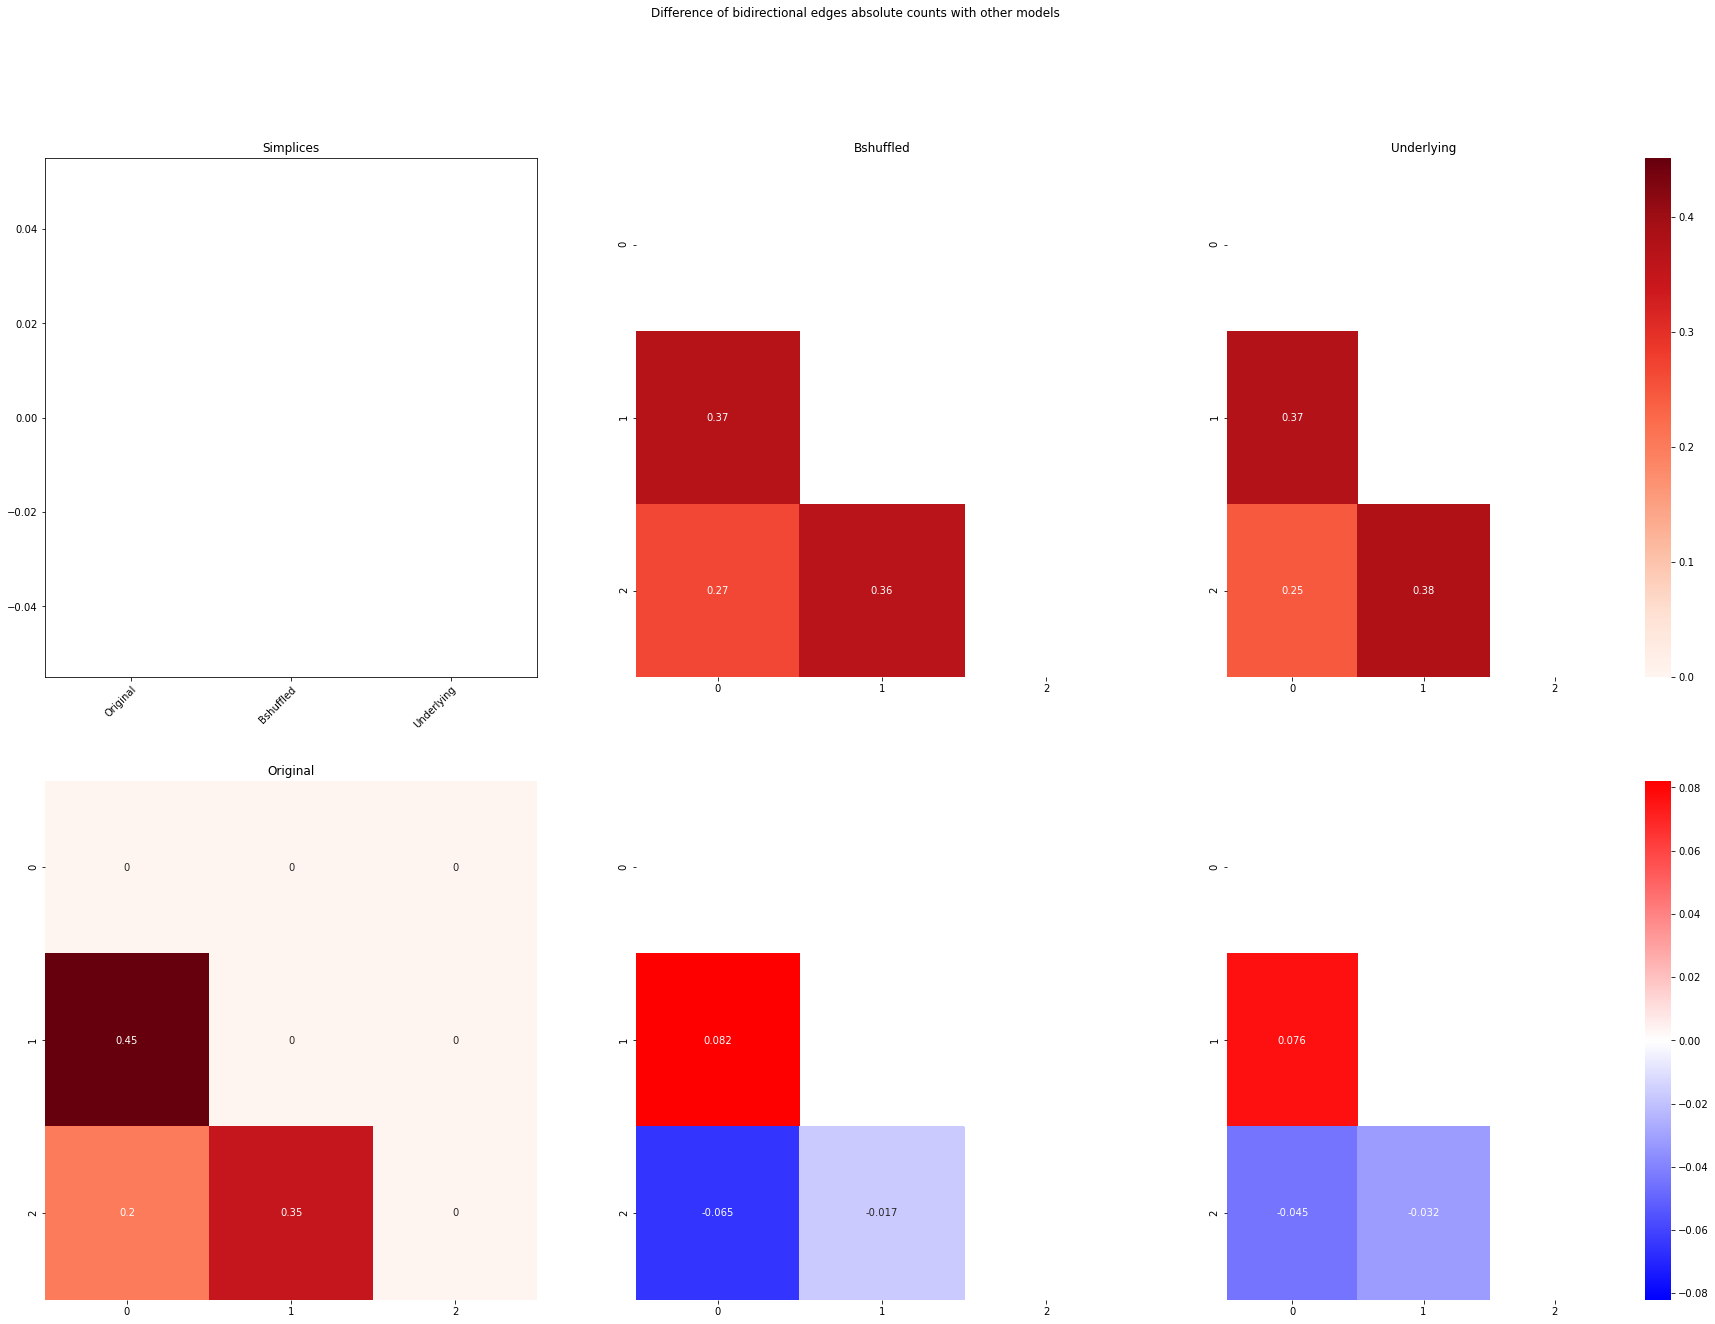

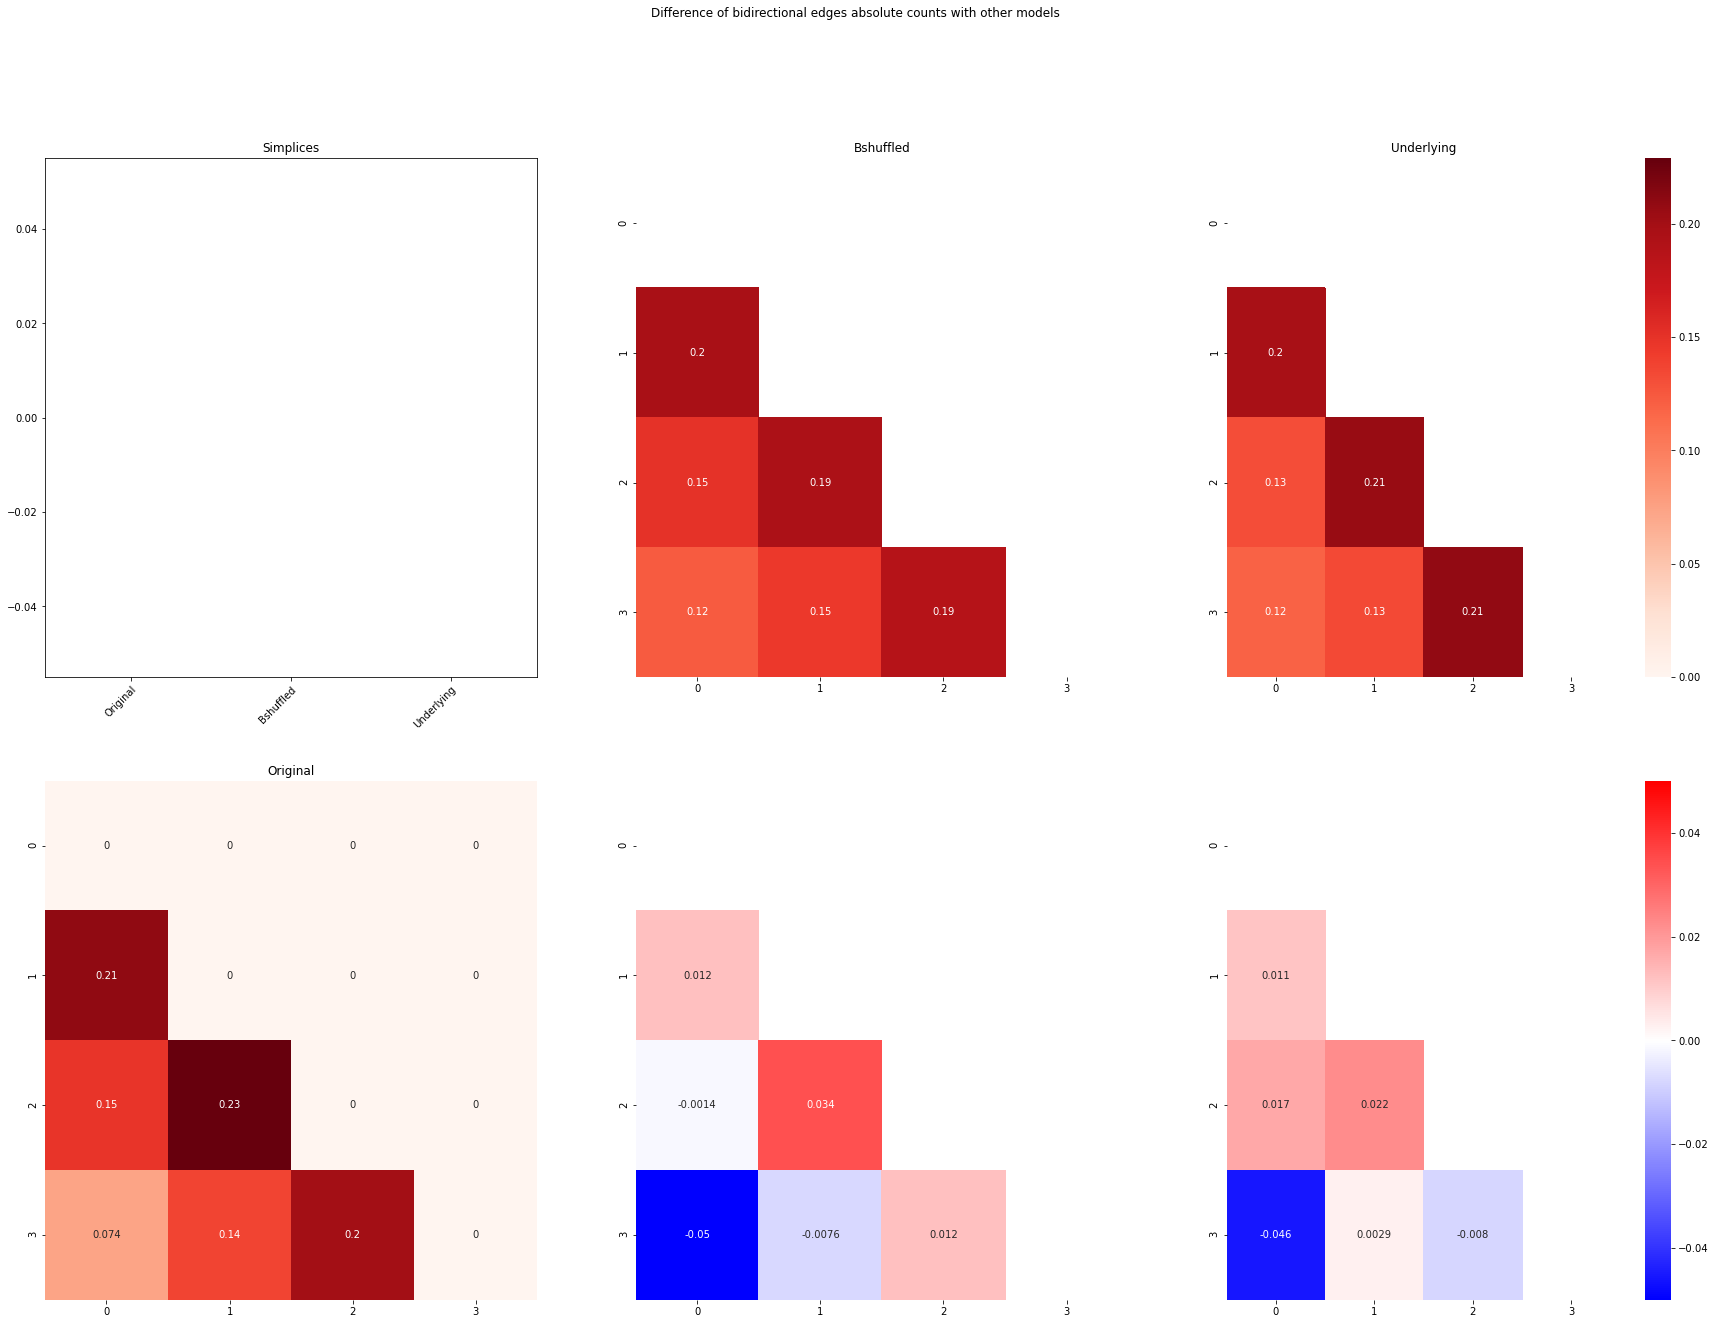

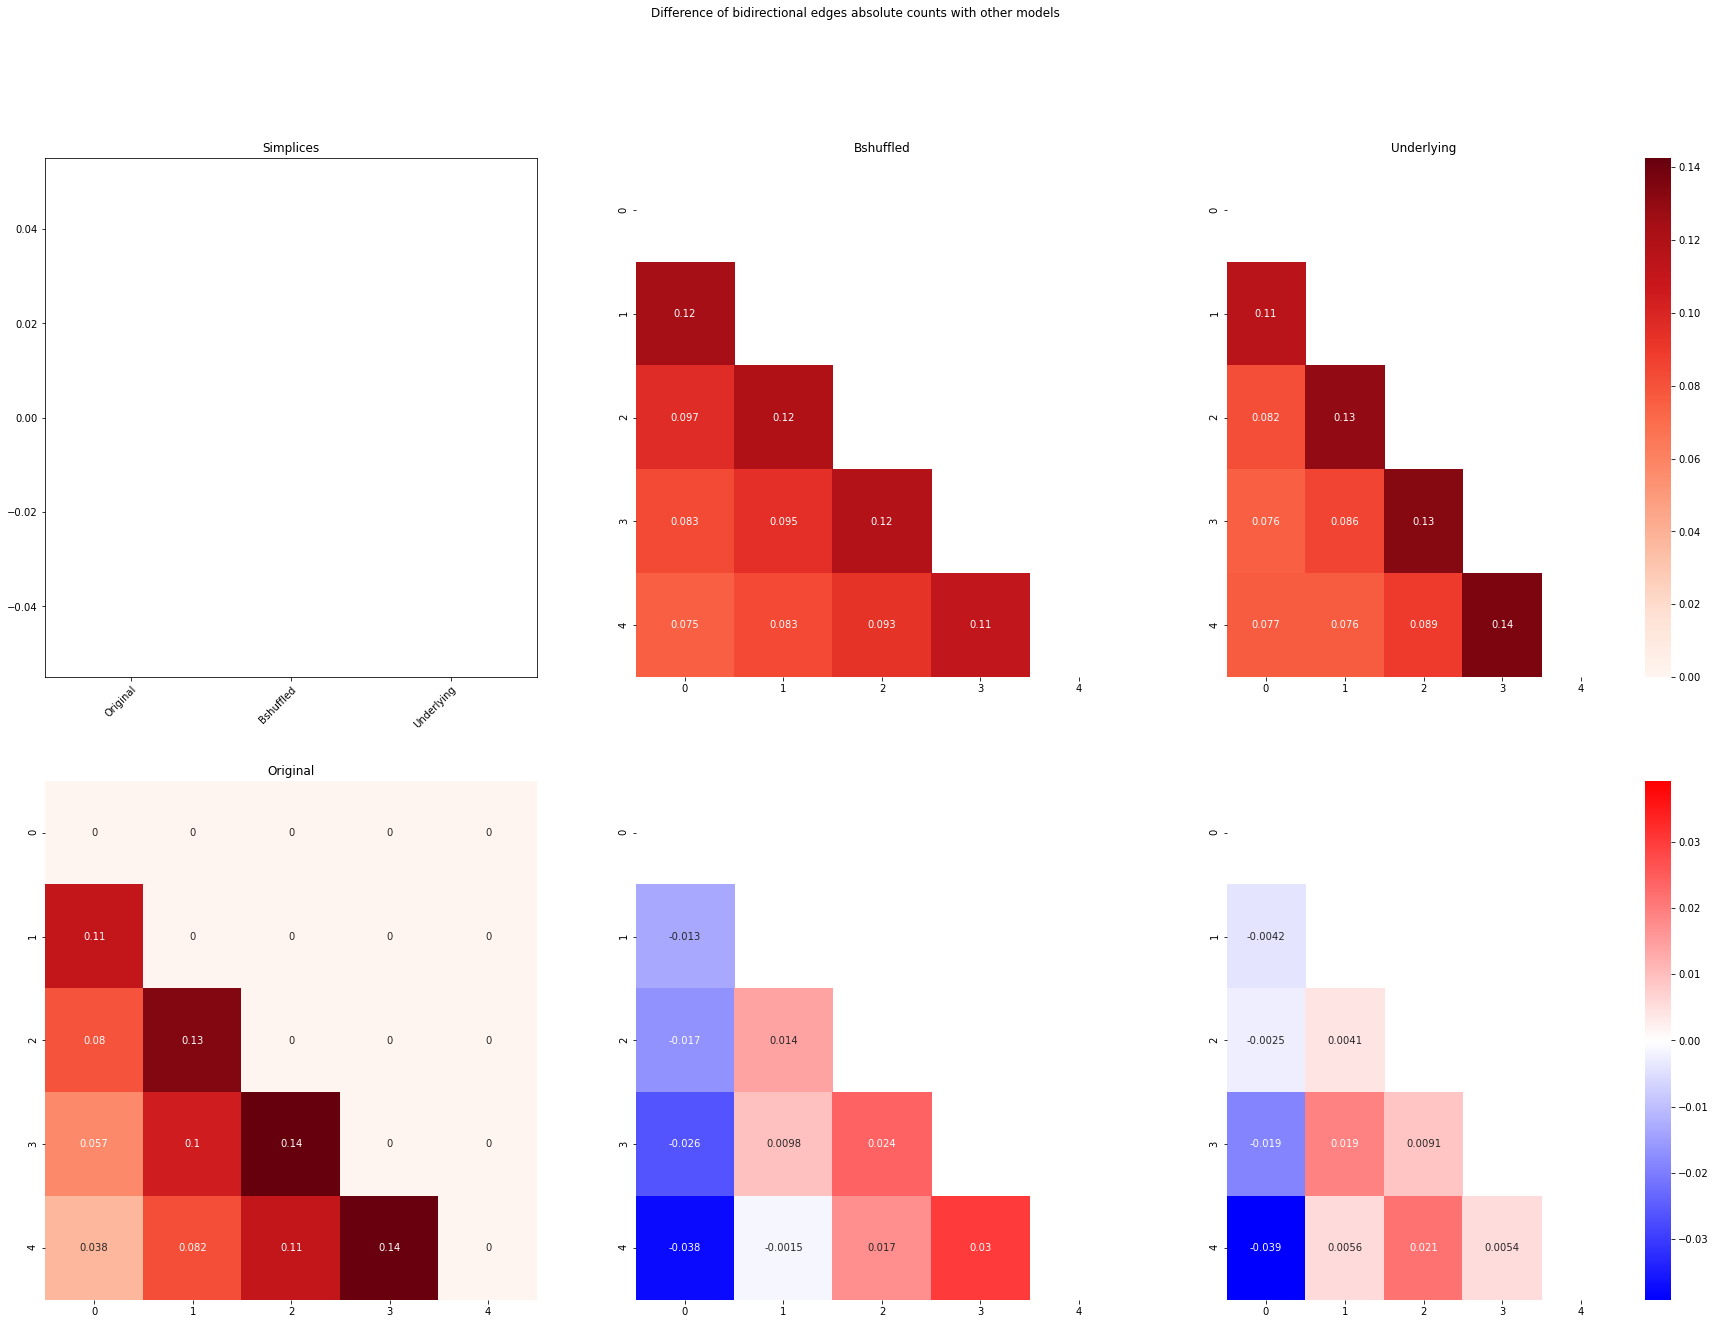

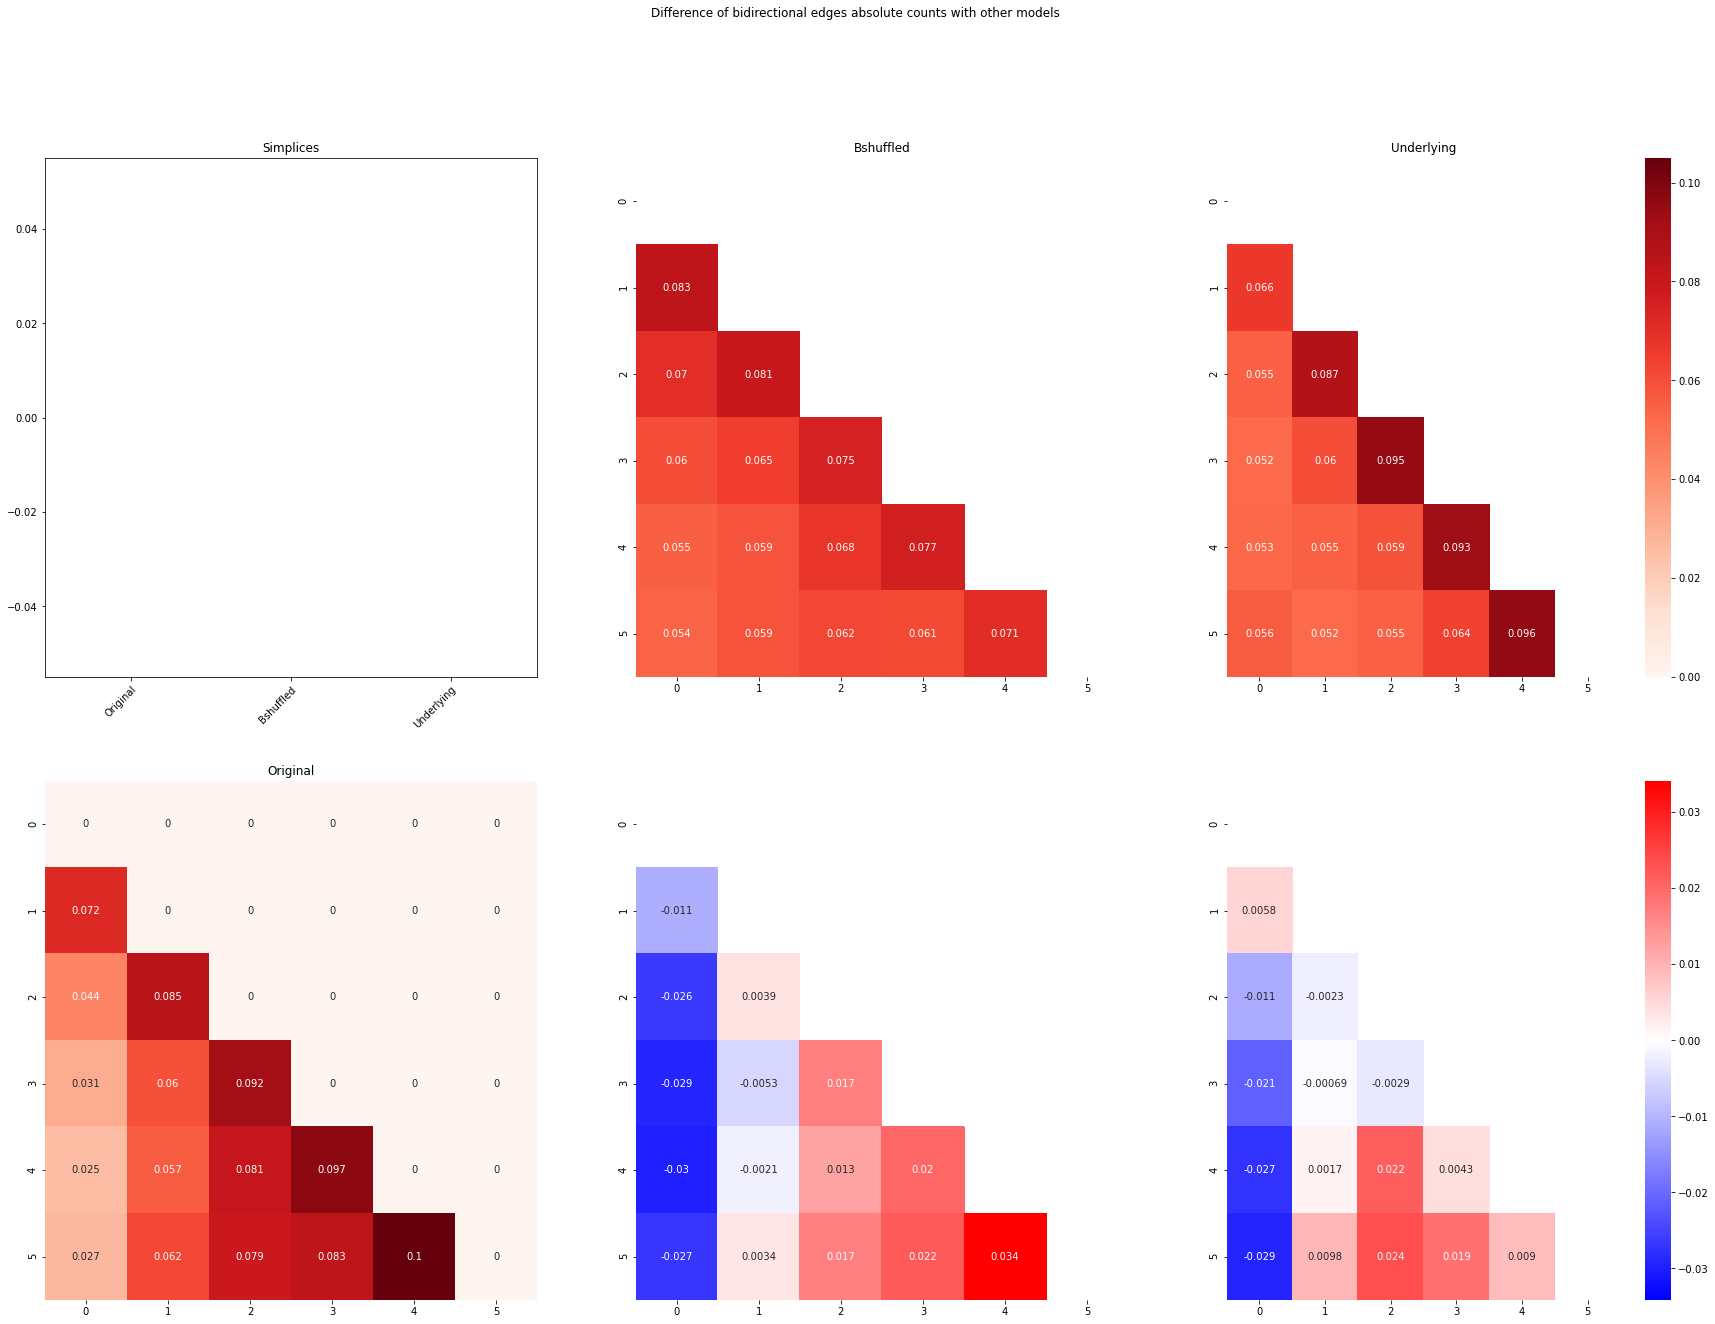

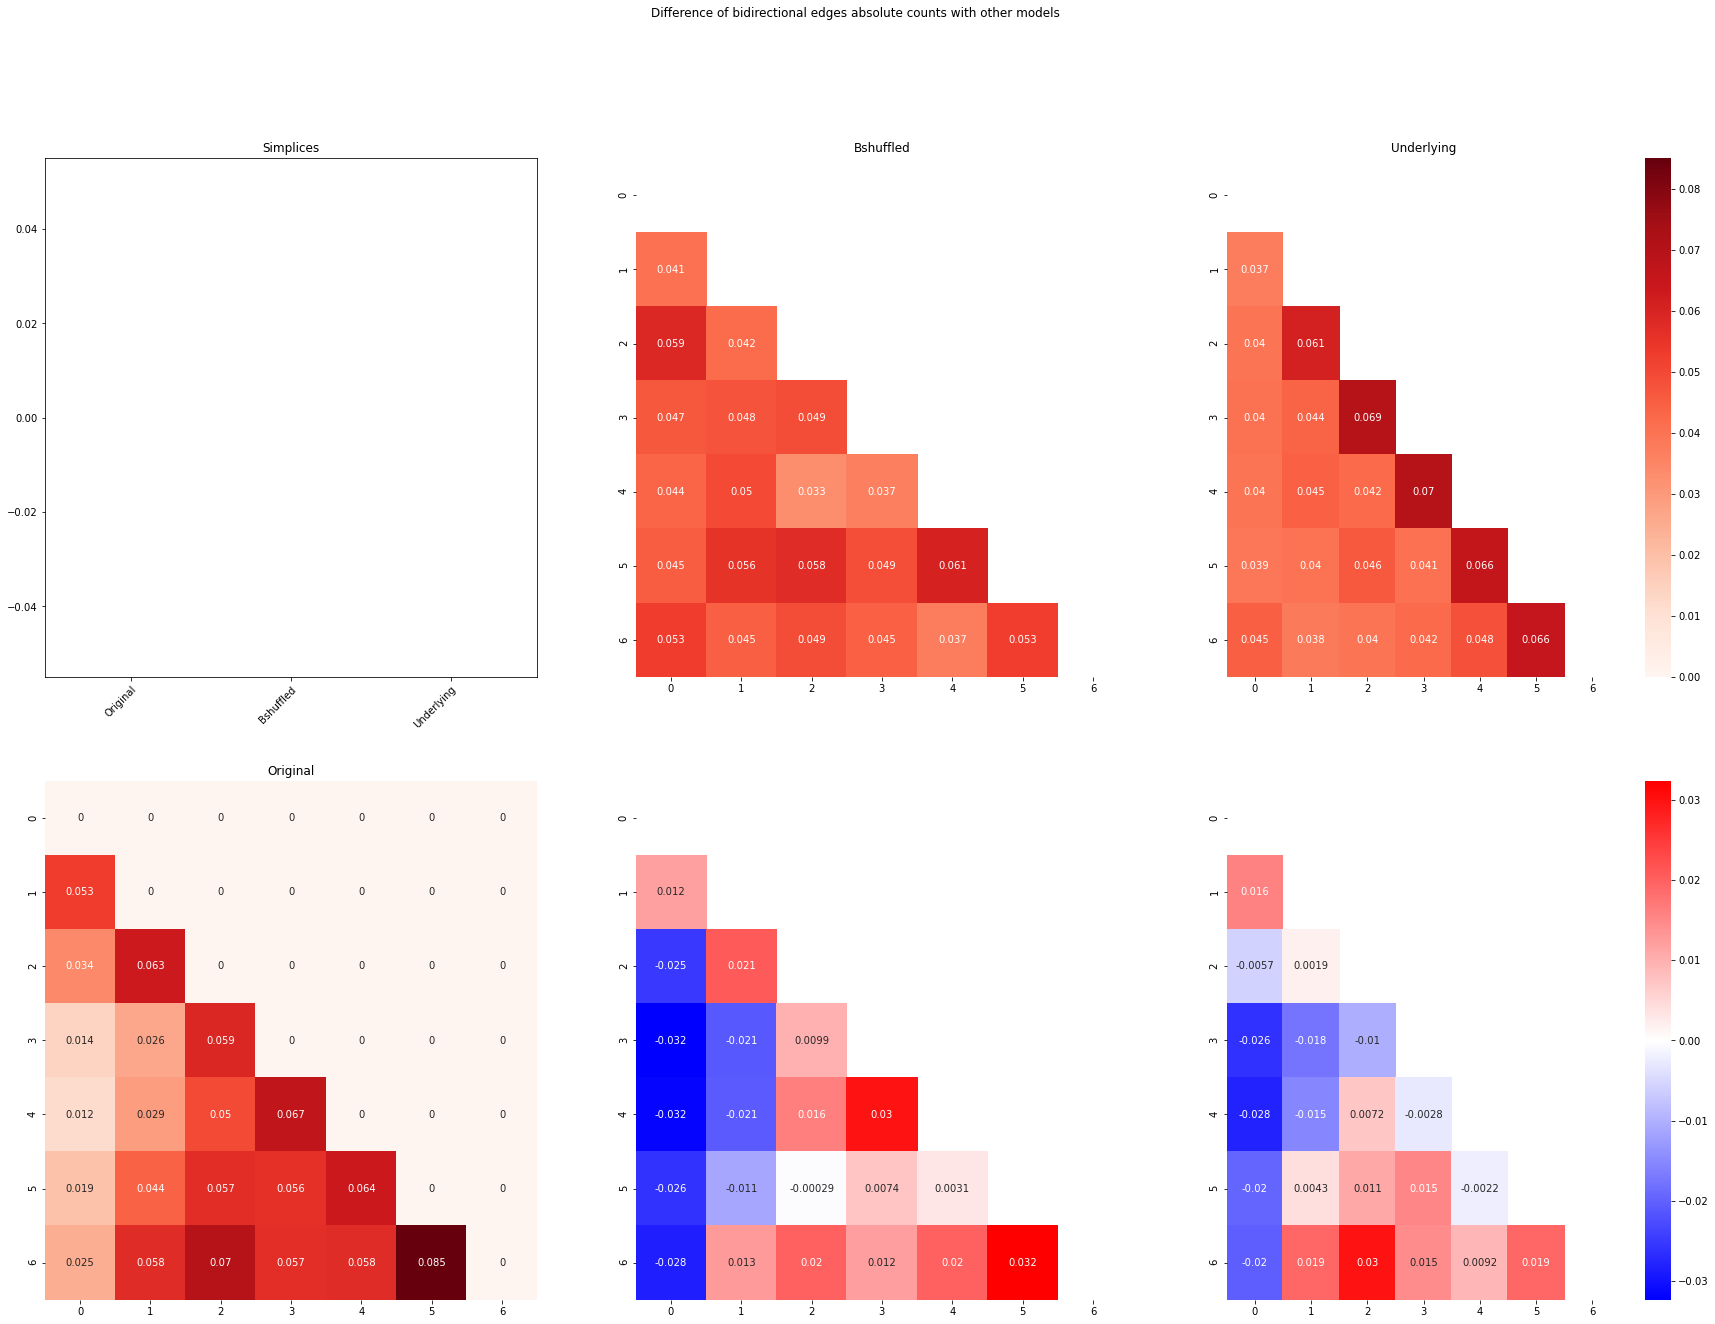

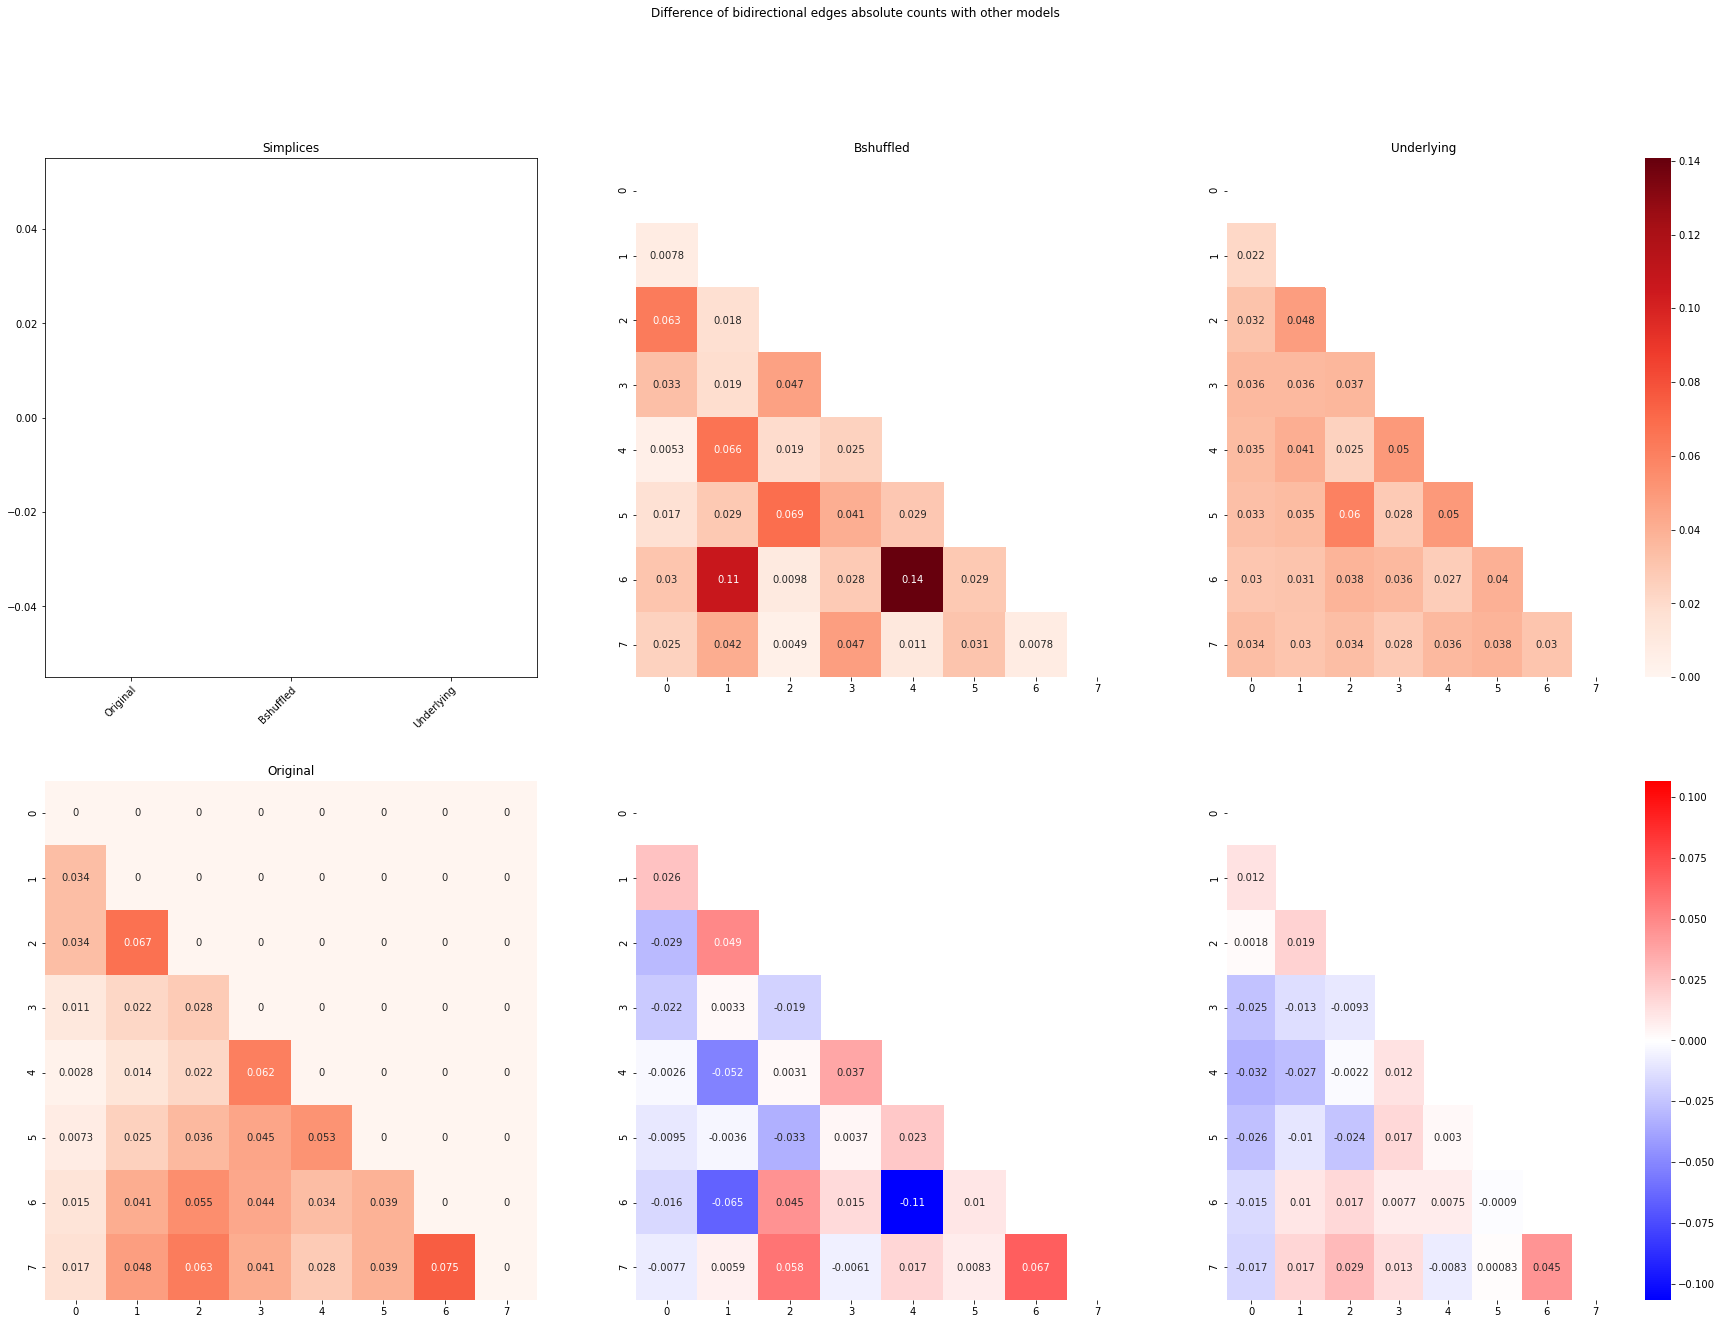

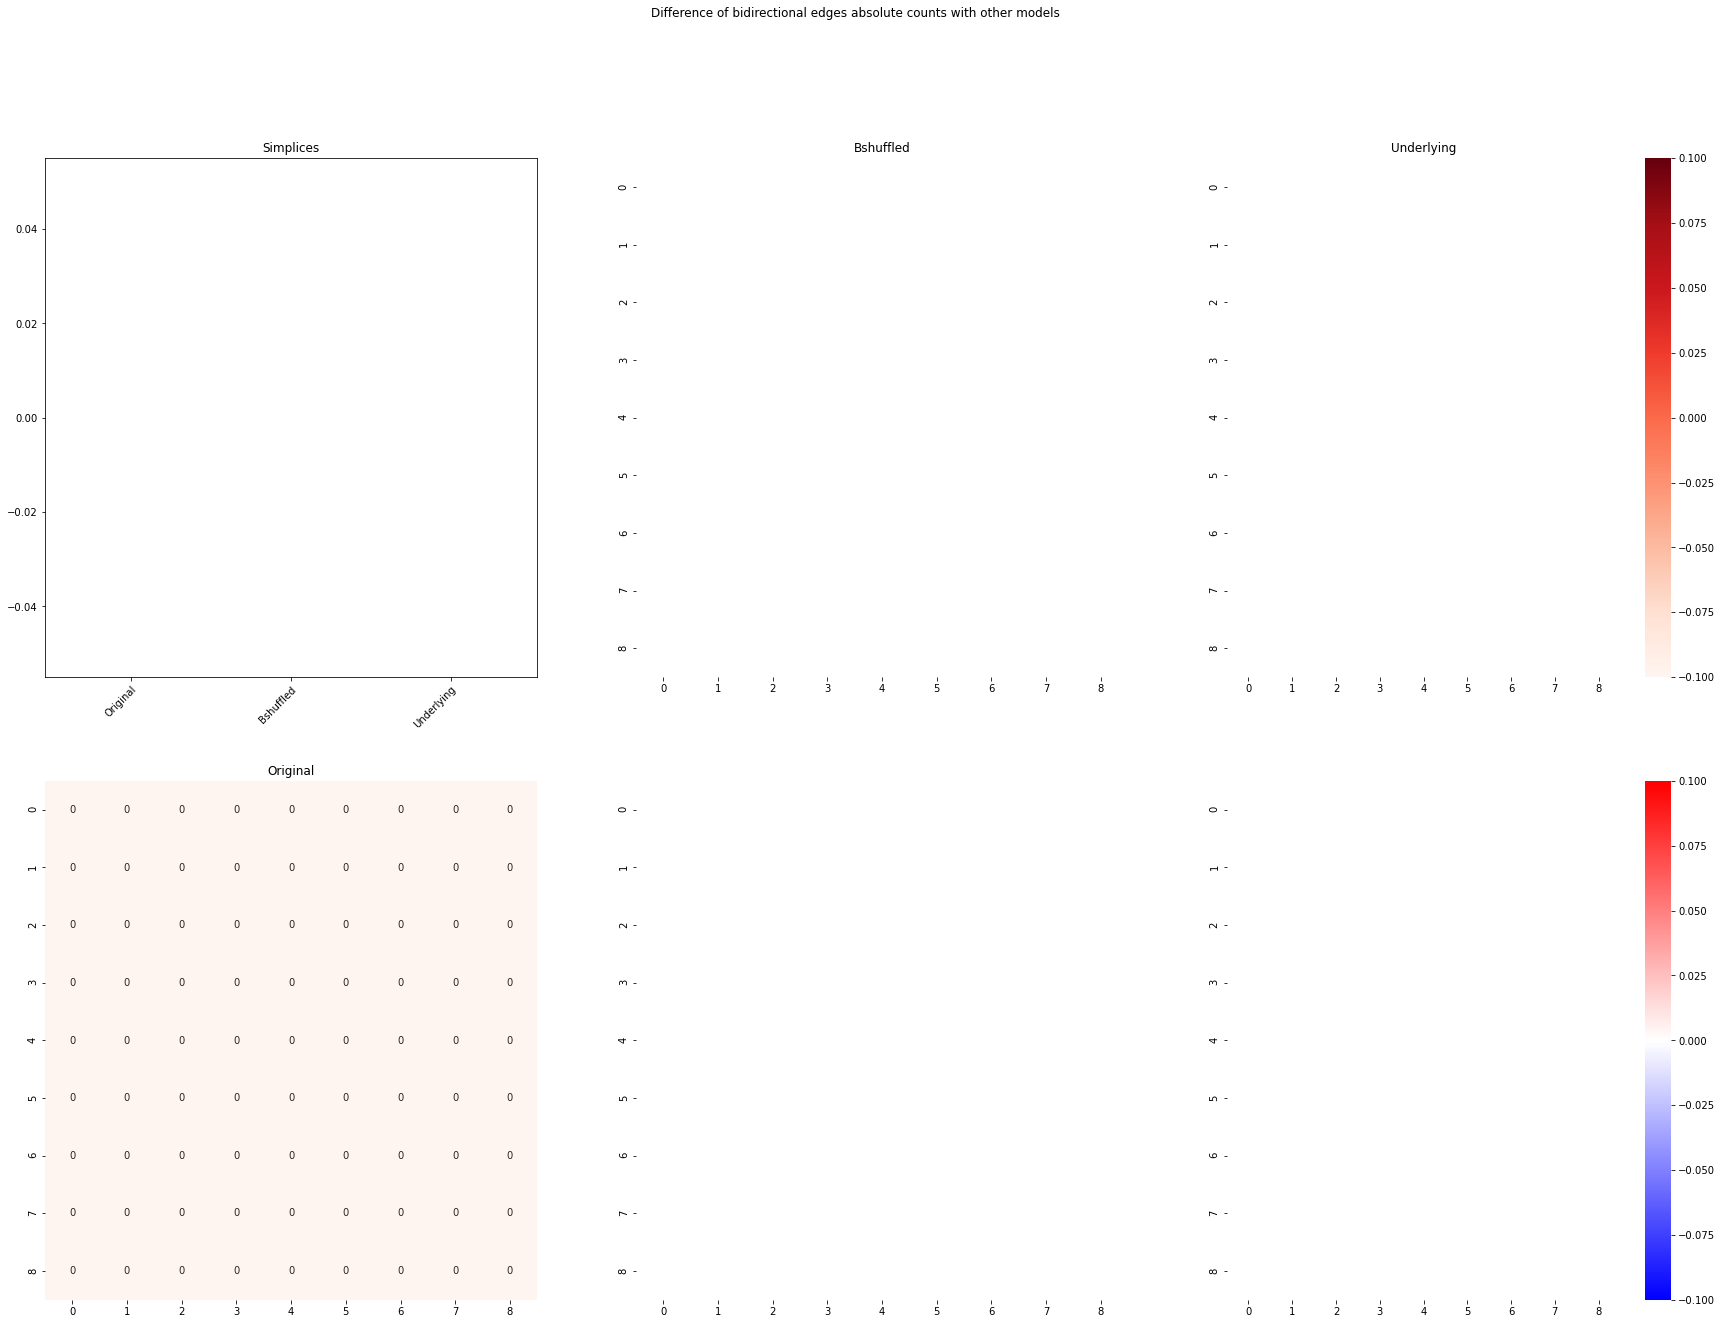

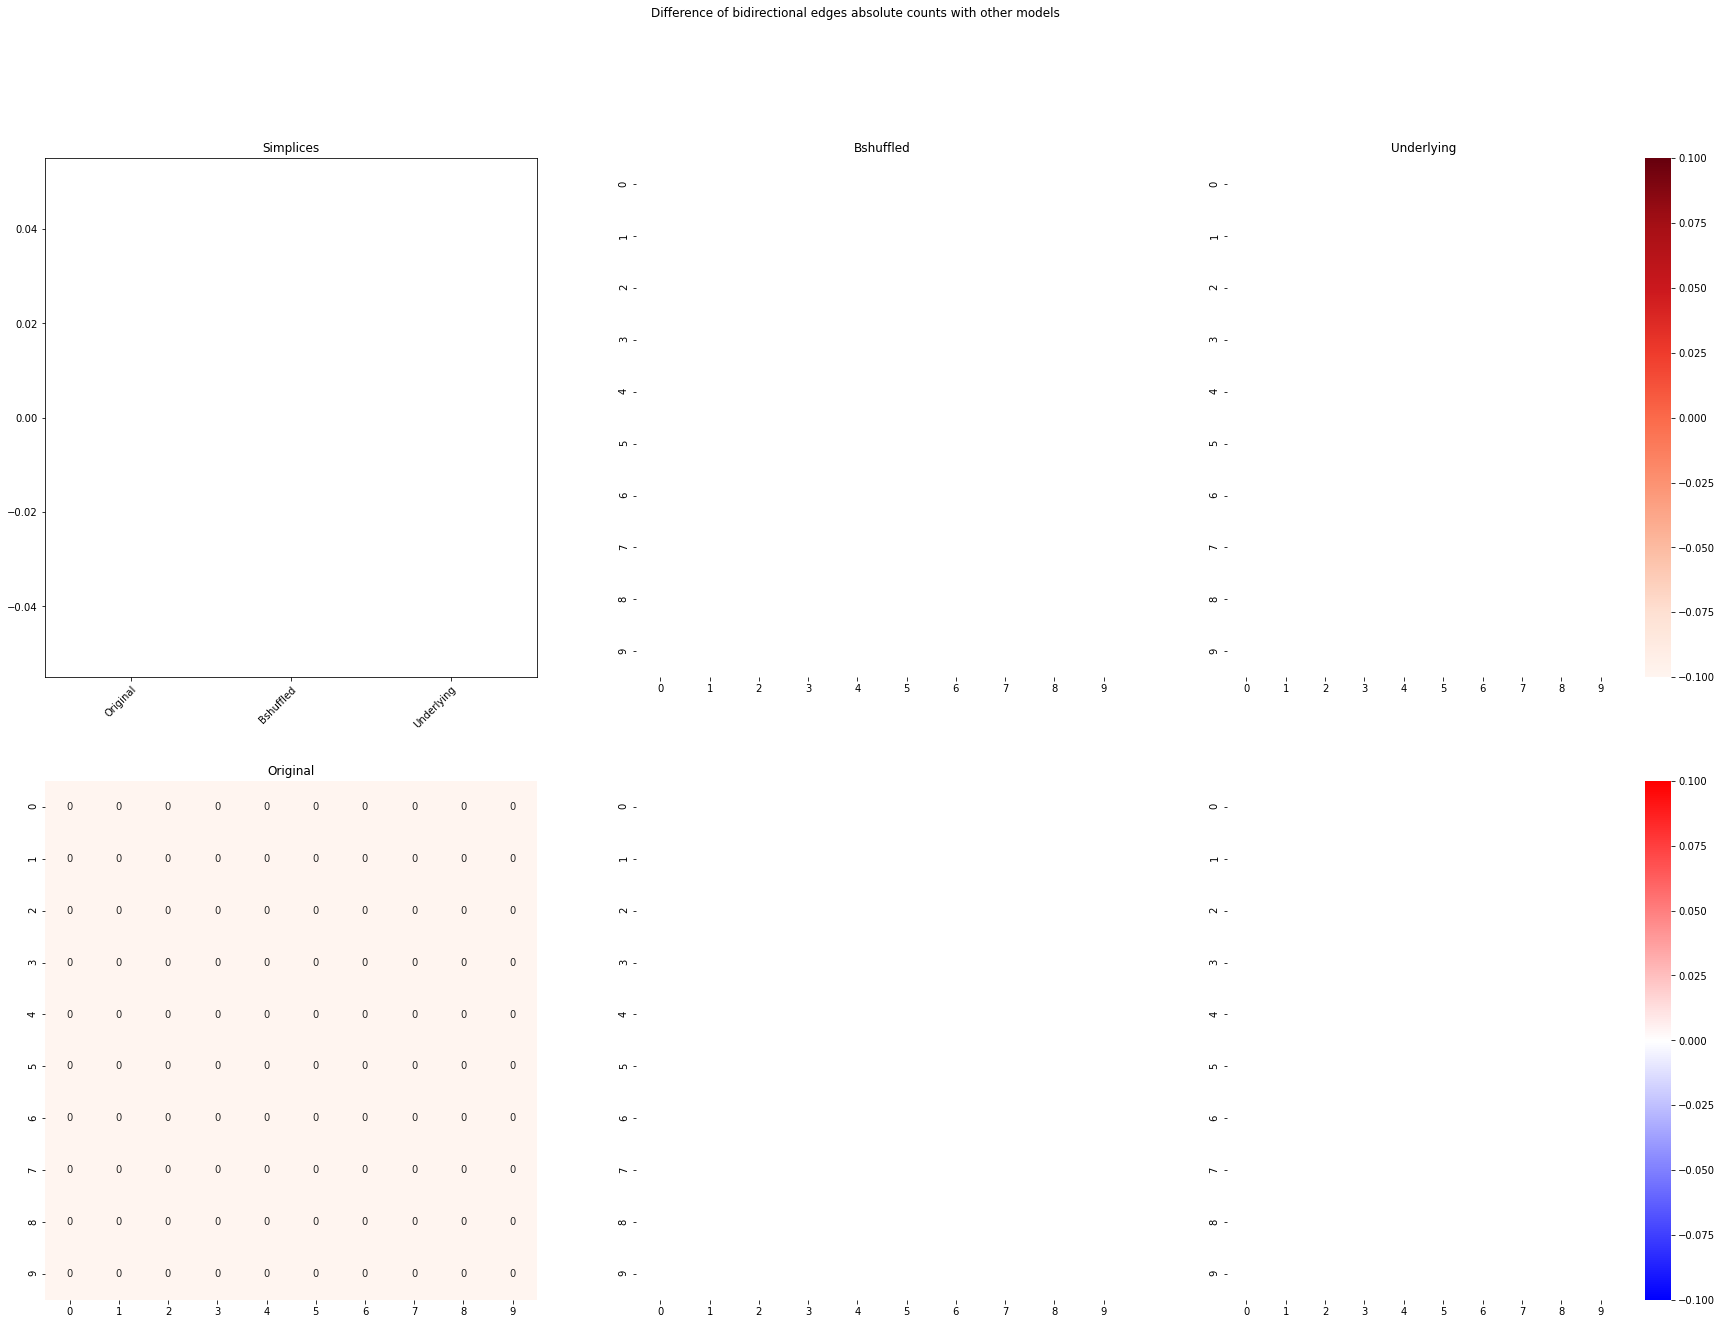

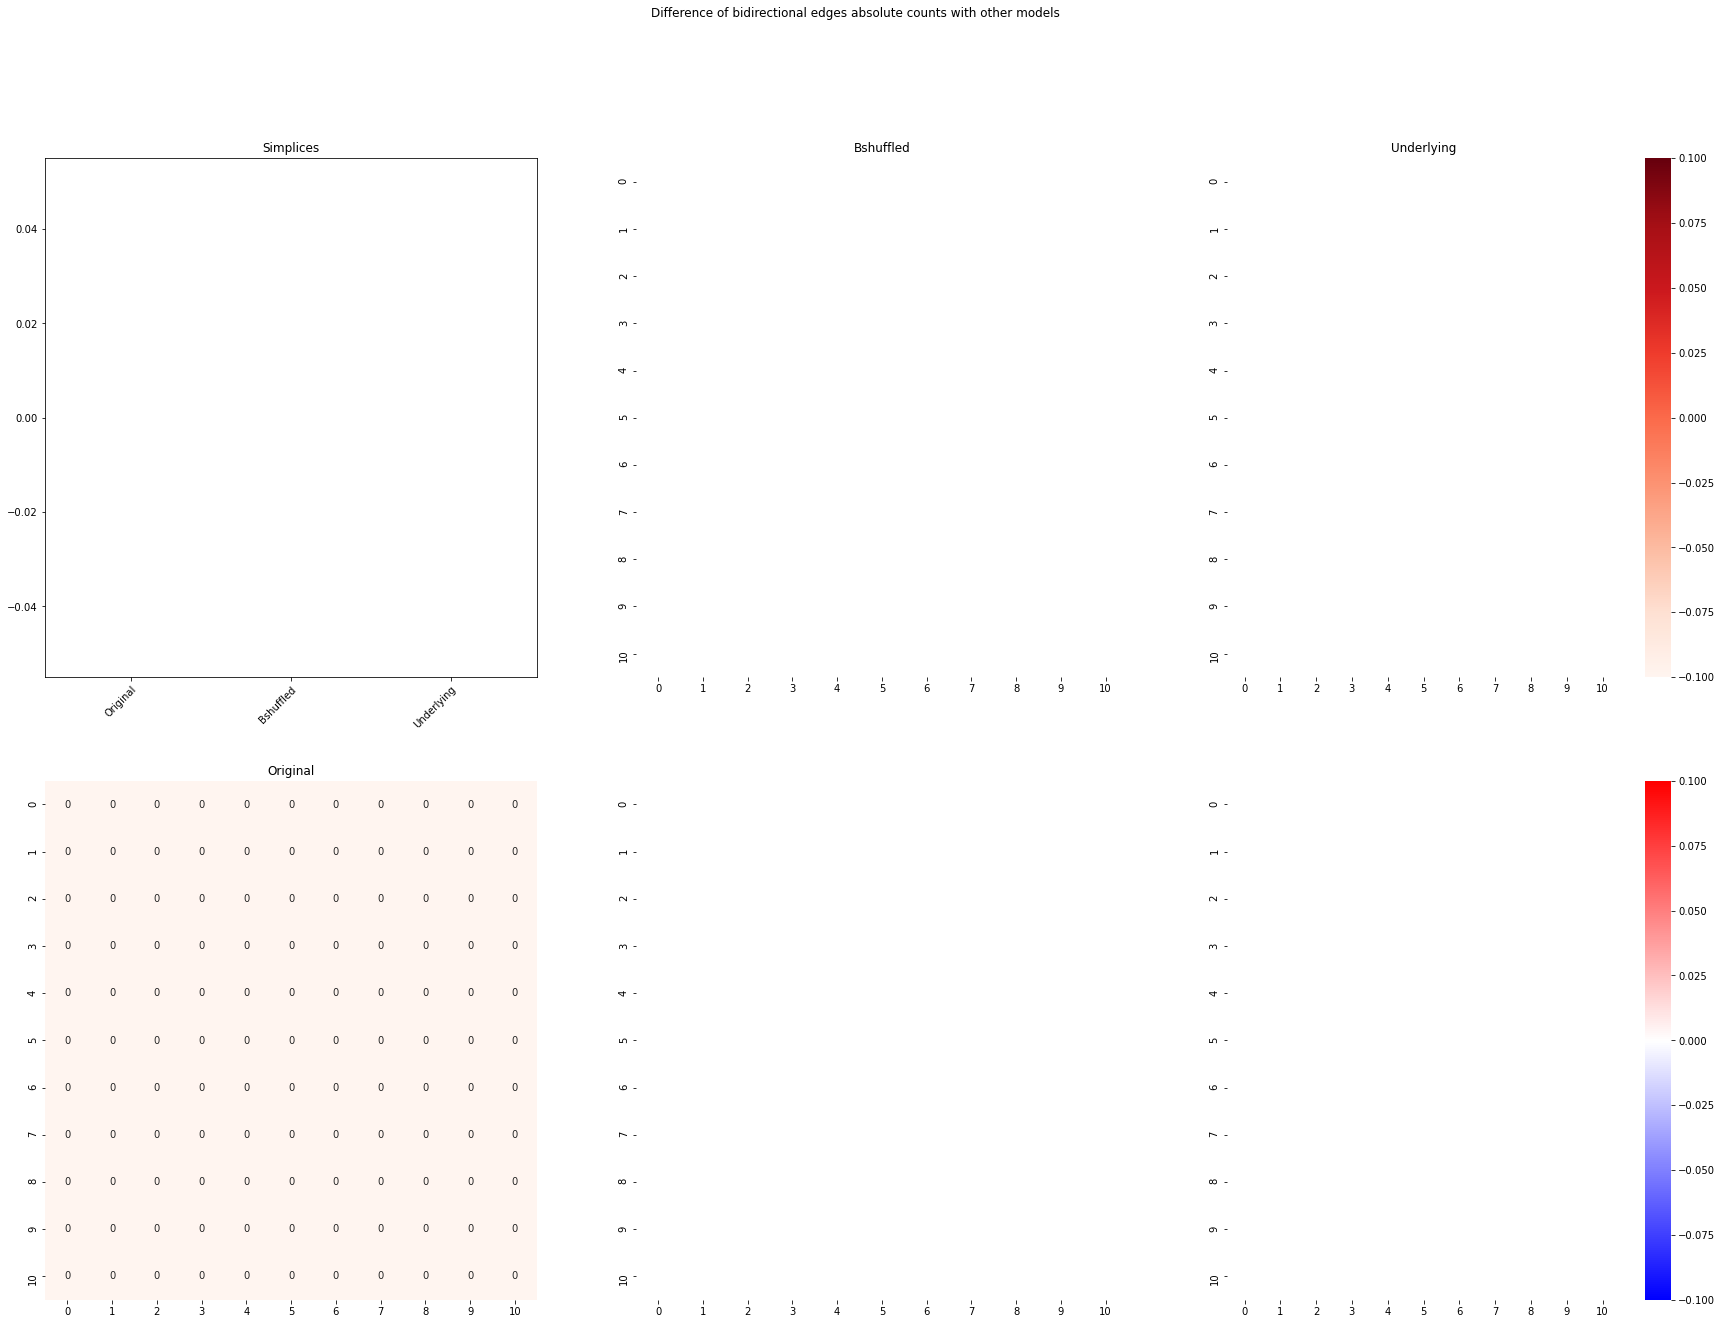

In [15]:
compare_graphs_diff([a,b,c], 1, "worm_bcounts_percent_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

## Maximal

In [16]:
a = pickle.load(open(Path("data/worm/full/mbcounts.pkl"),'rb'))
for key in a.keys():
    a[key] = percent_transform(a[key])[0]
b = get_average_bcounts(Path("data/worm_control/bishuffled/"), transform = percent_transform, maximal = True)
c = get_average_bcounts(Path("data/worm_control/underlying/"), transform = percent_transform, maximal = True)

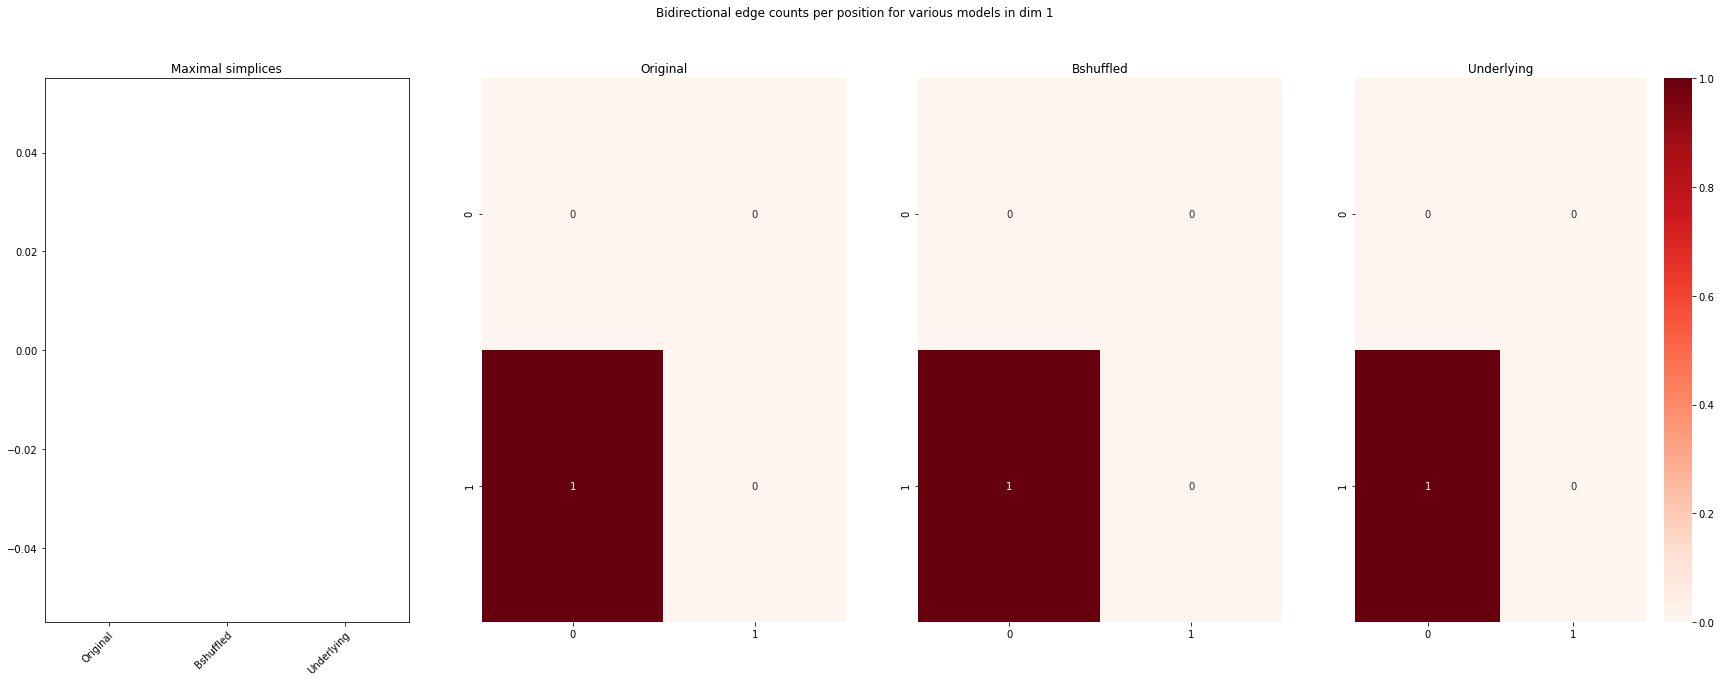

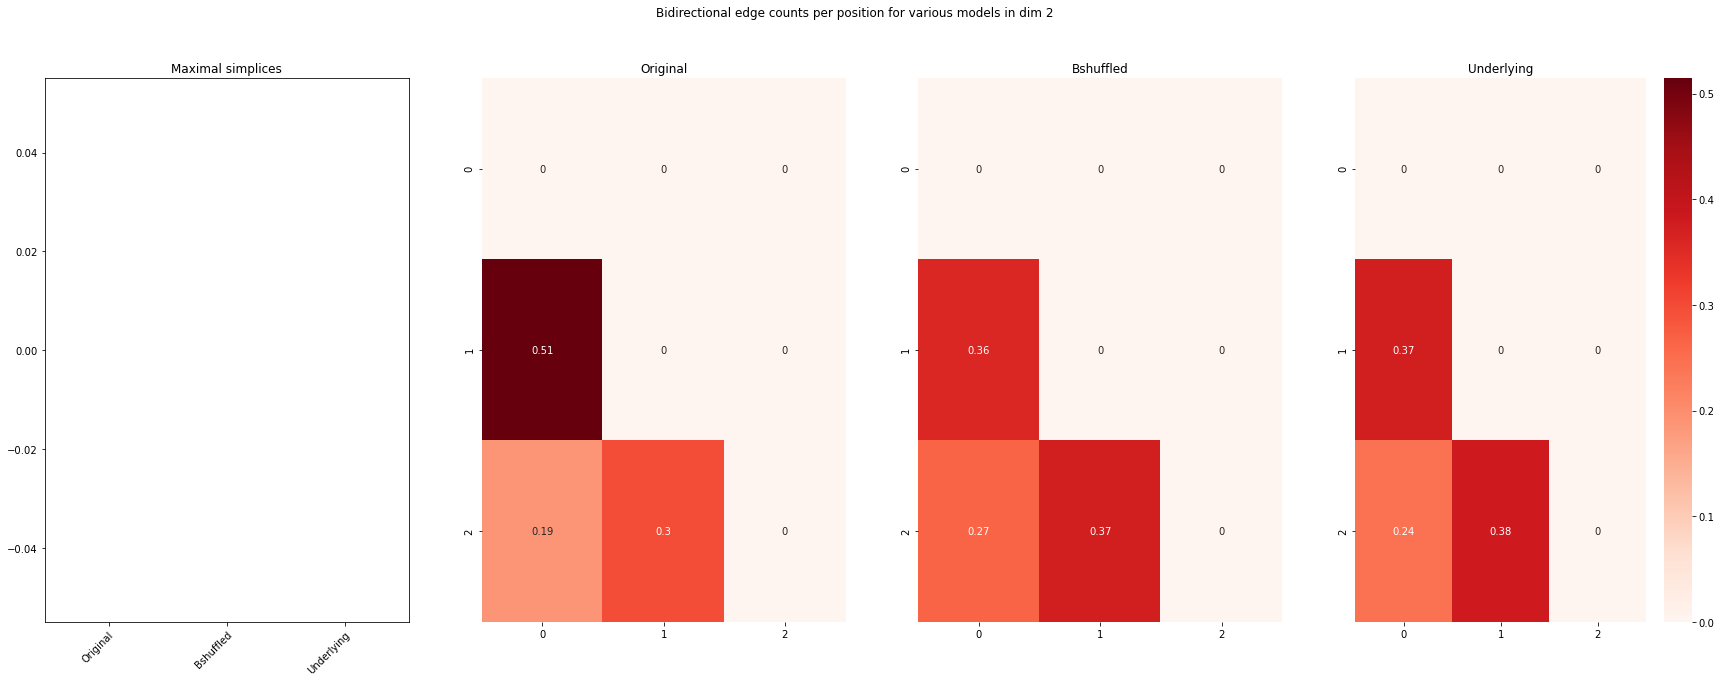

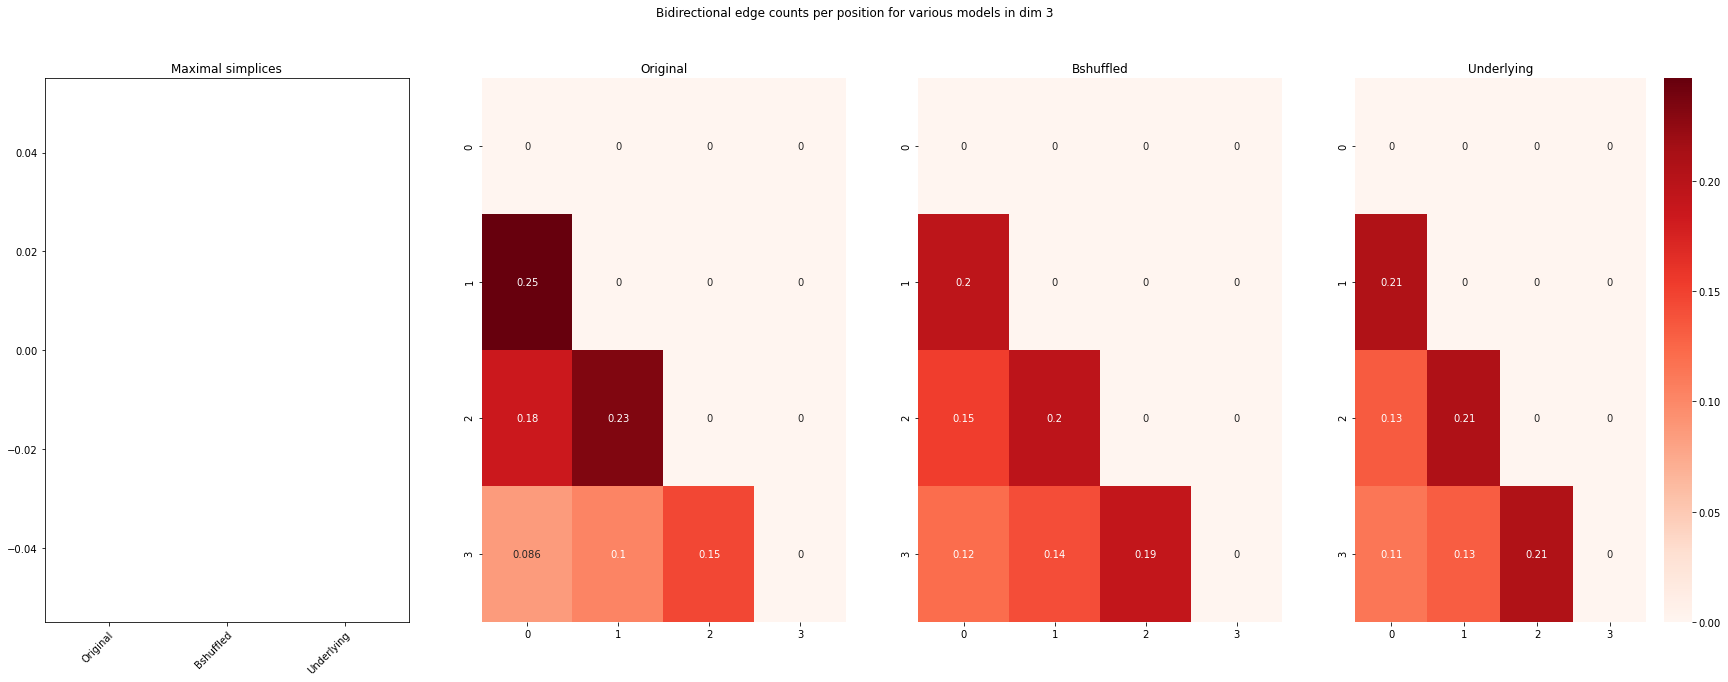

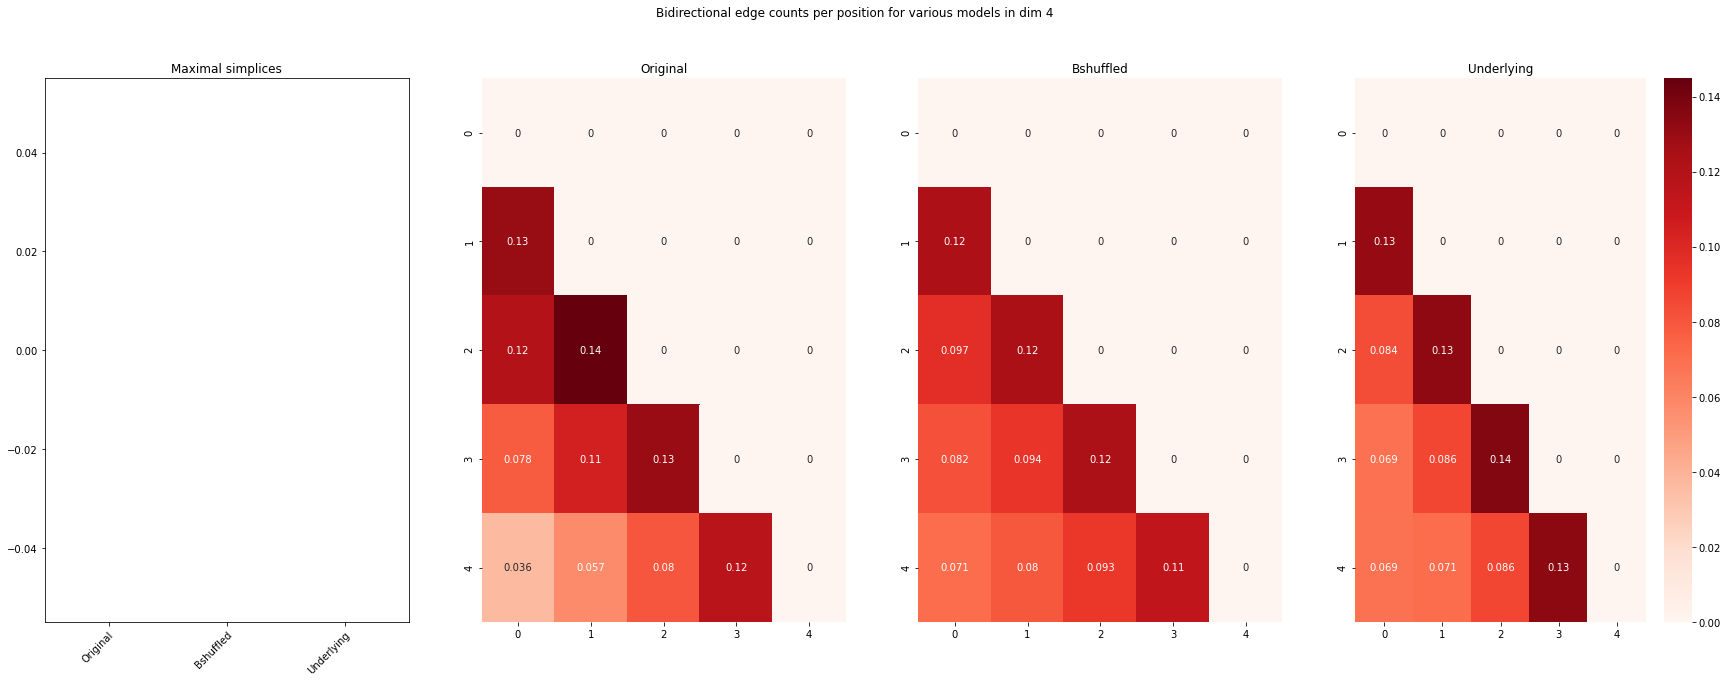

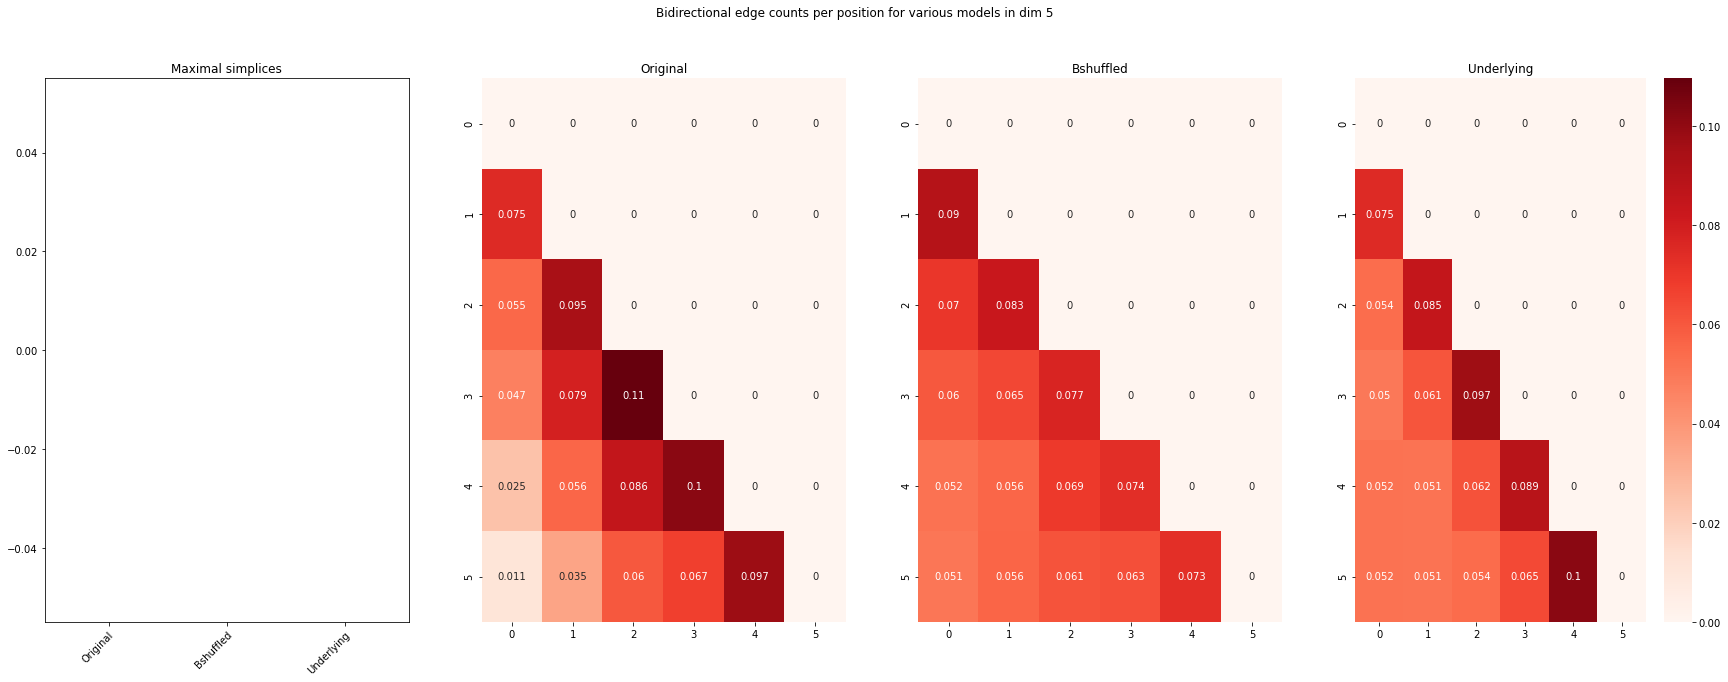

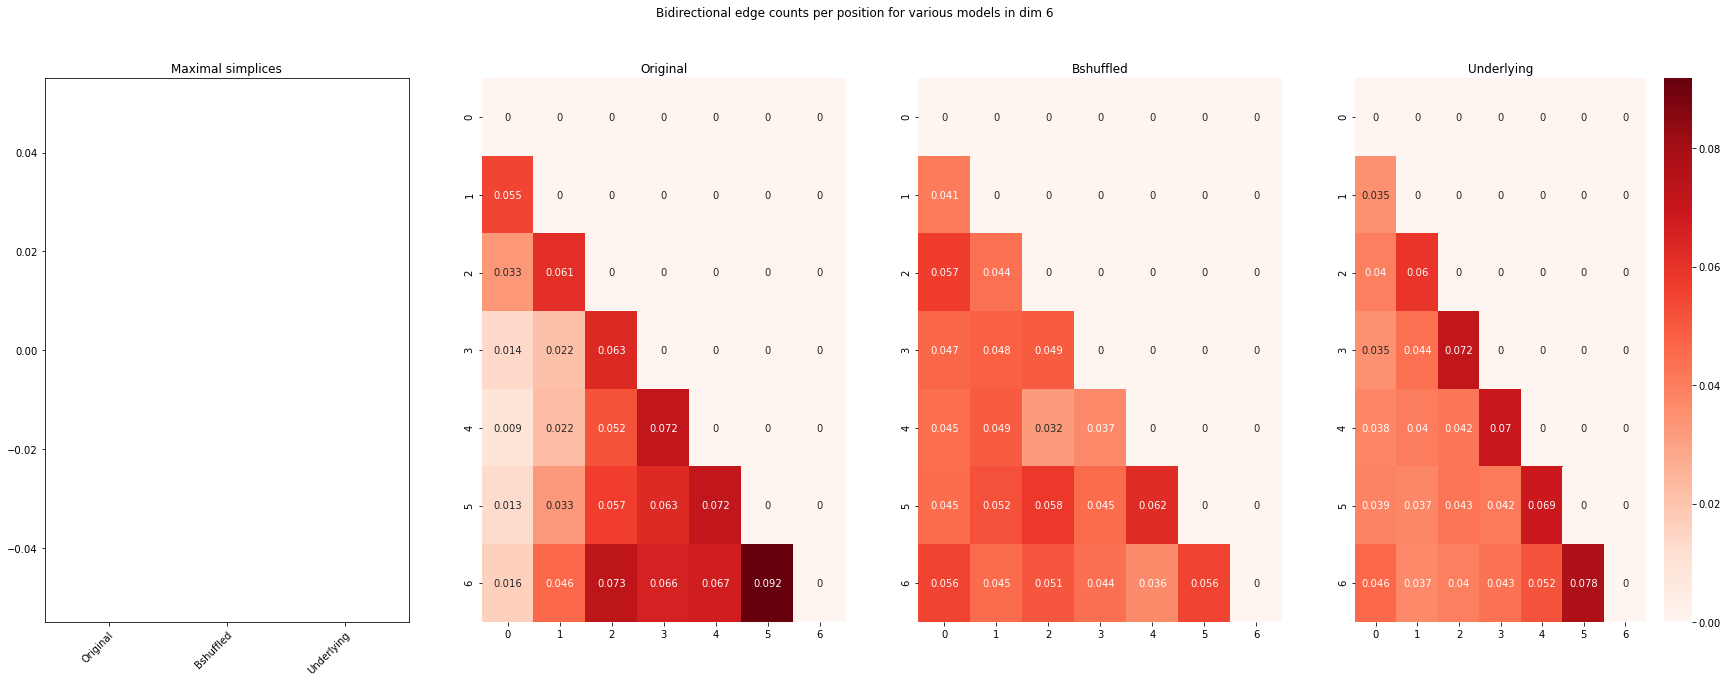

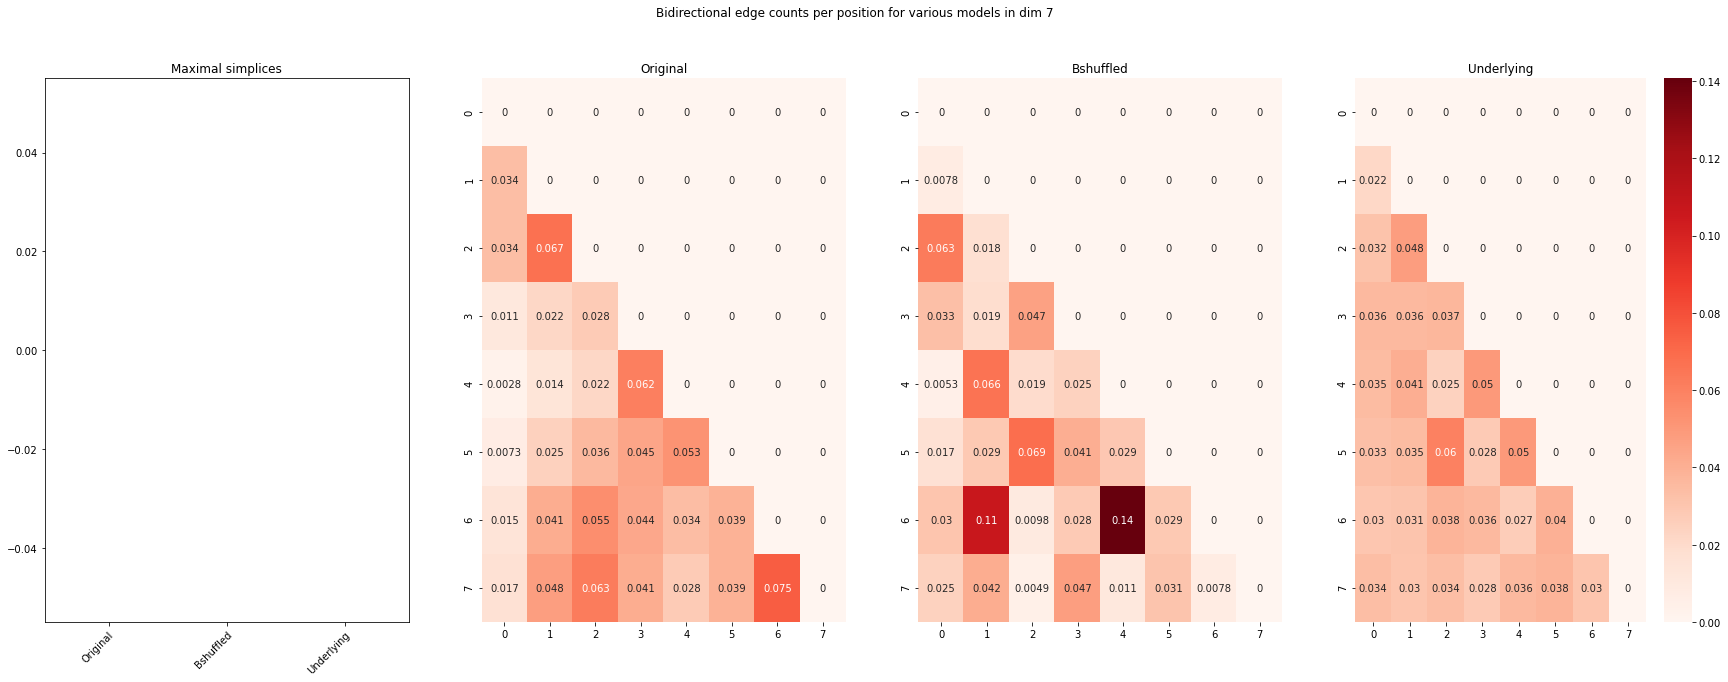

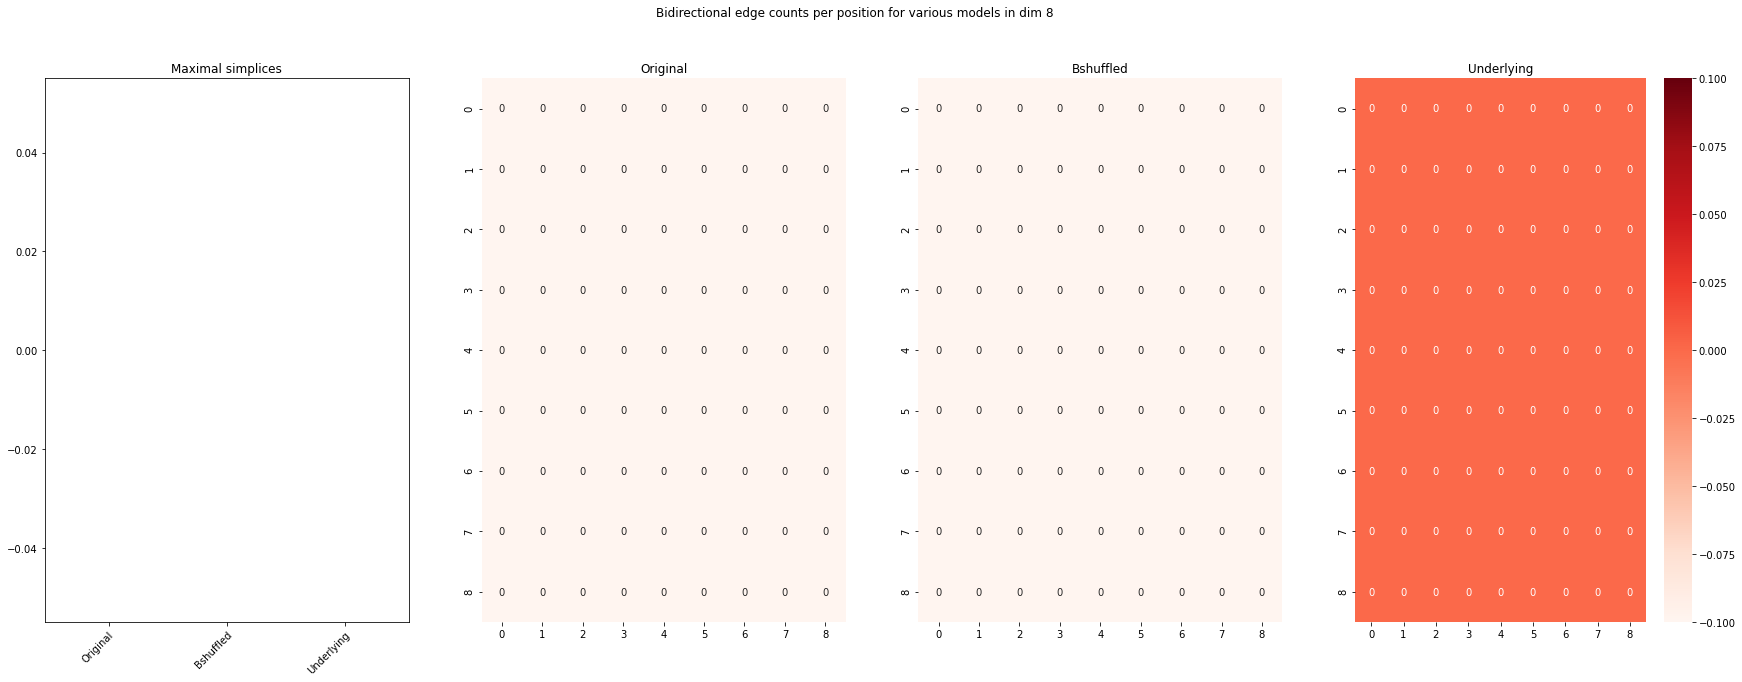

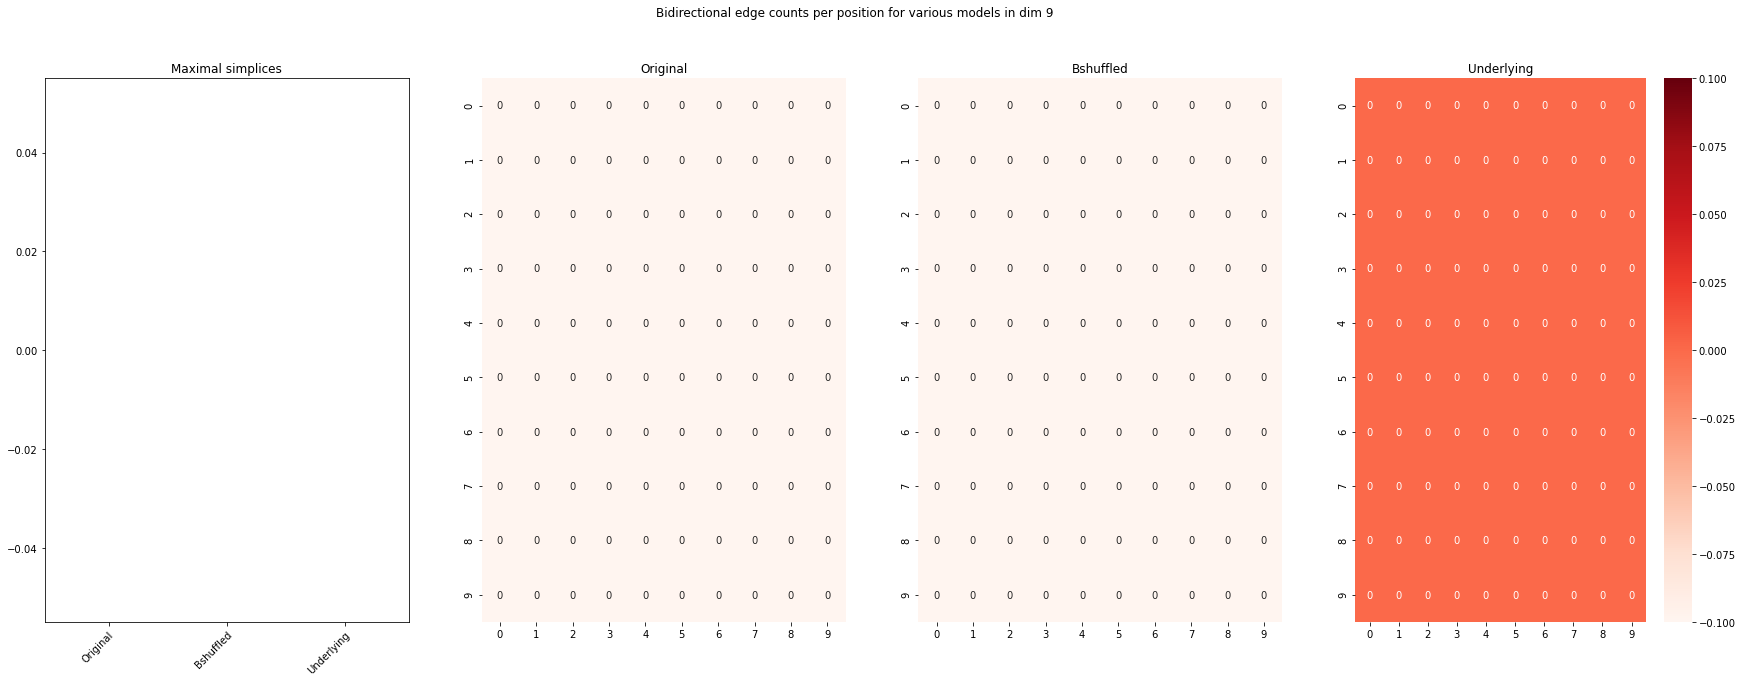

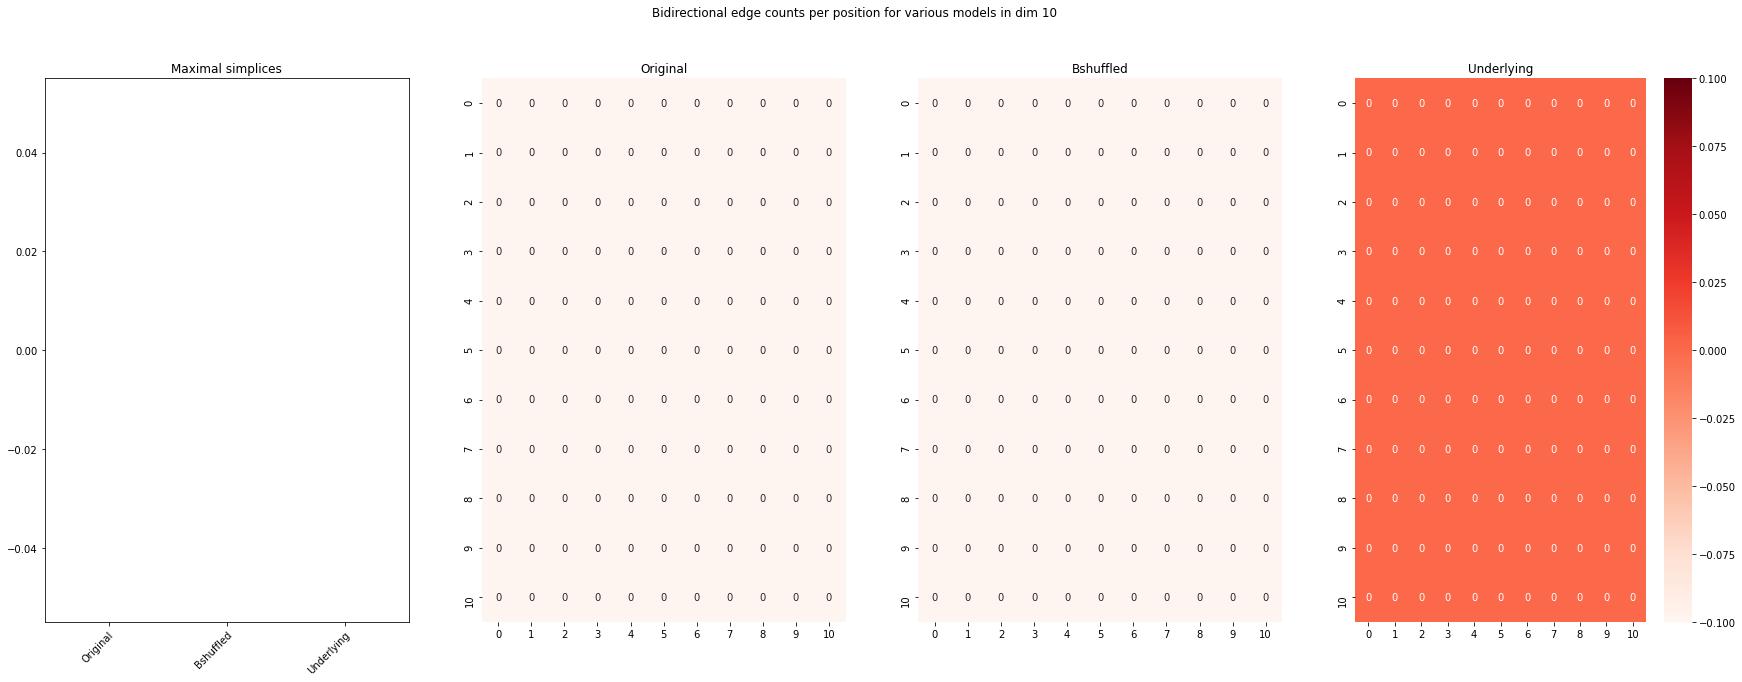

In [17]:
compare_graphs([a,b,c], 1, "worm_mbcounts_percent", title_list = ["Maximal simplices","Original", "Bshuffled", "Underlying"])

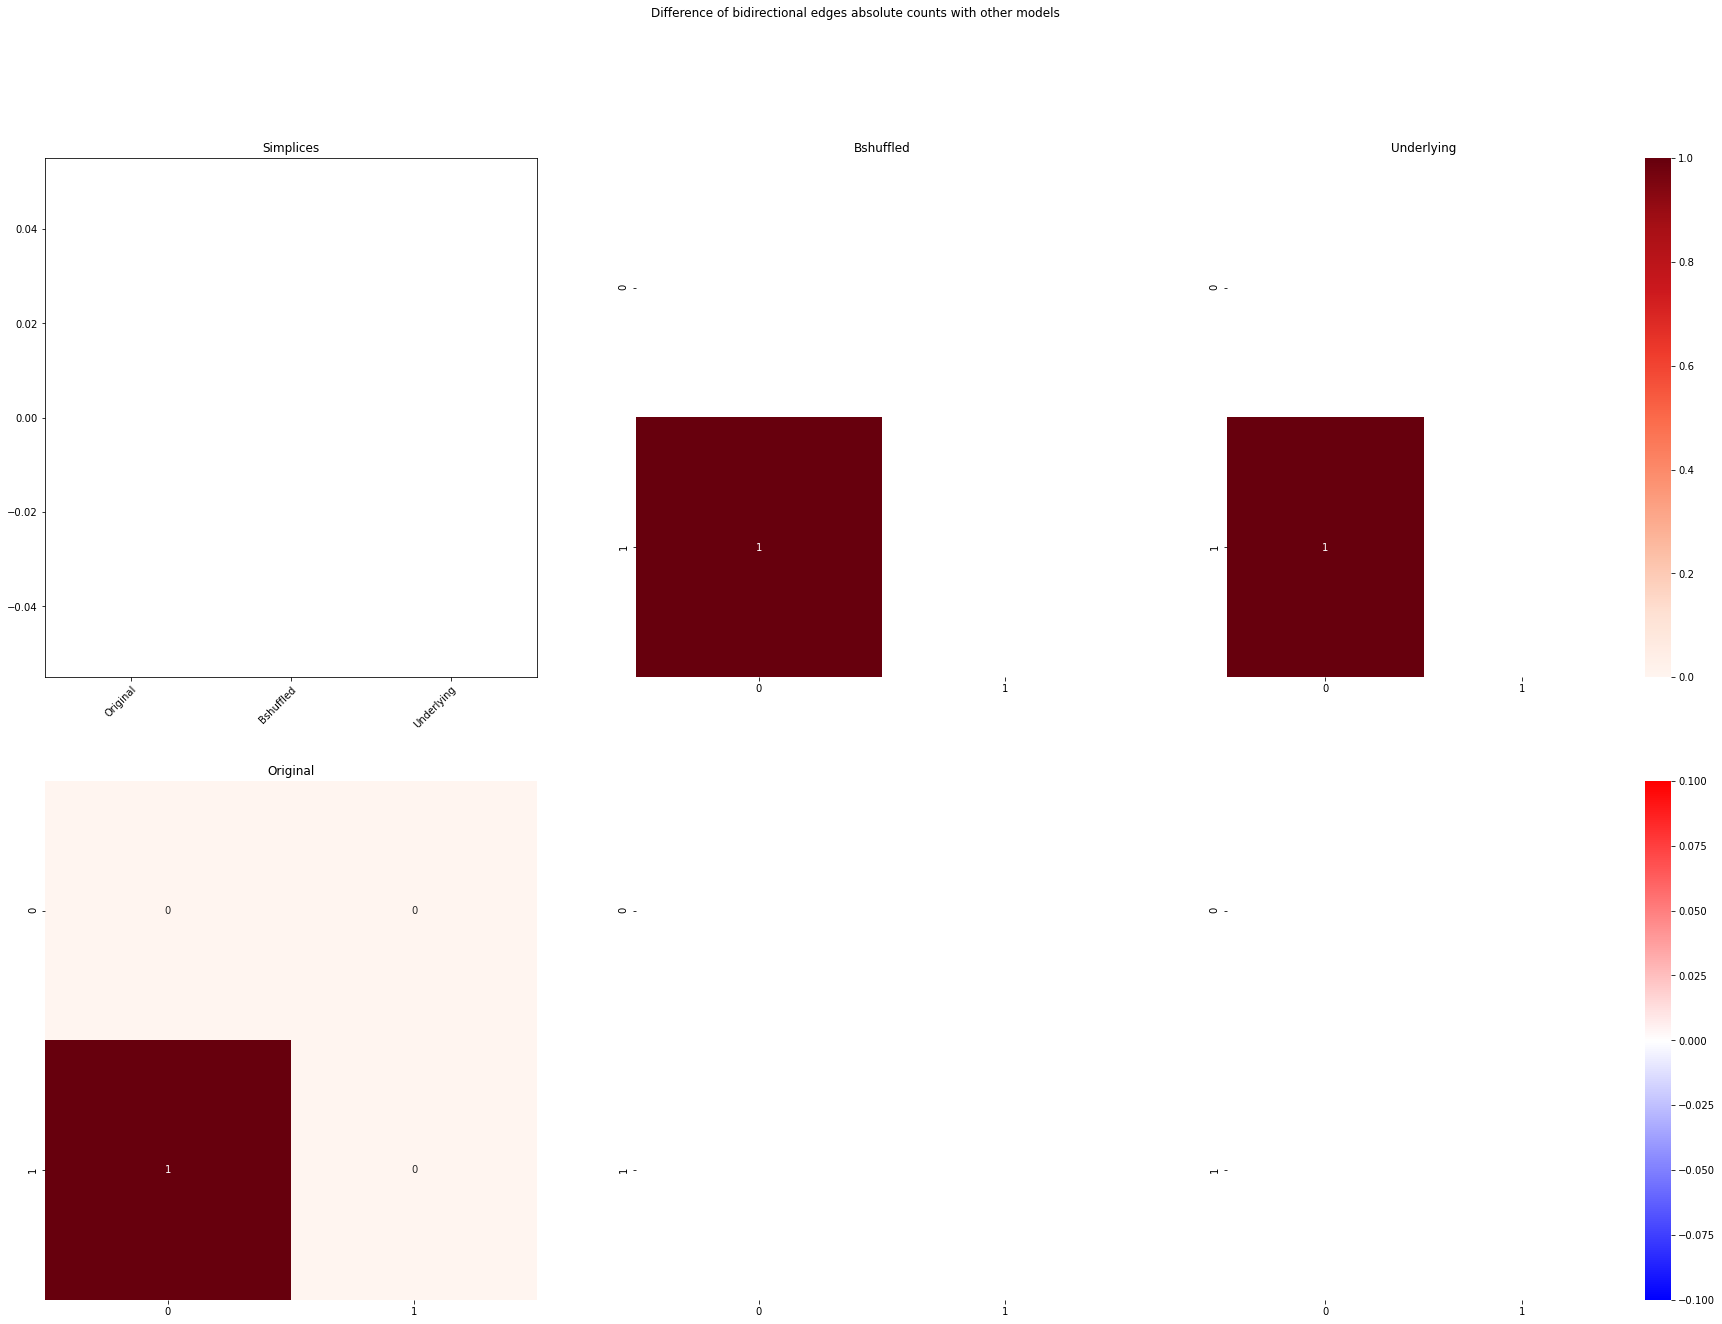

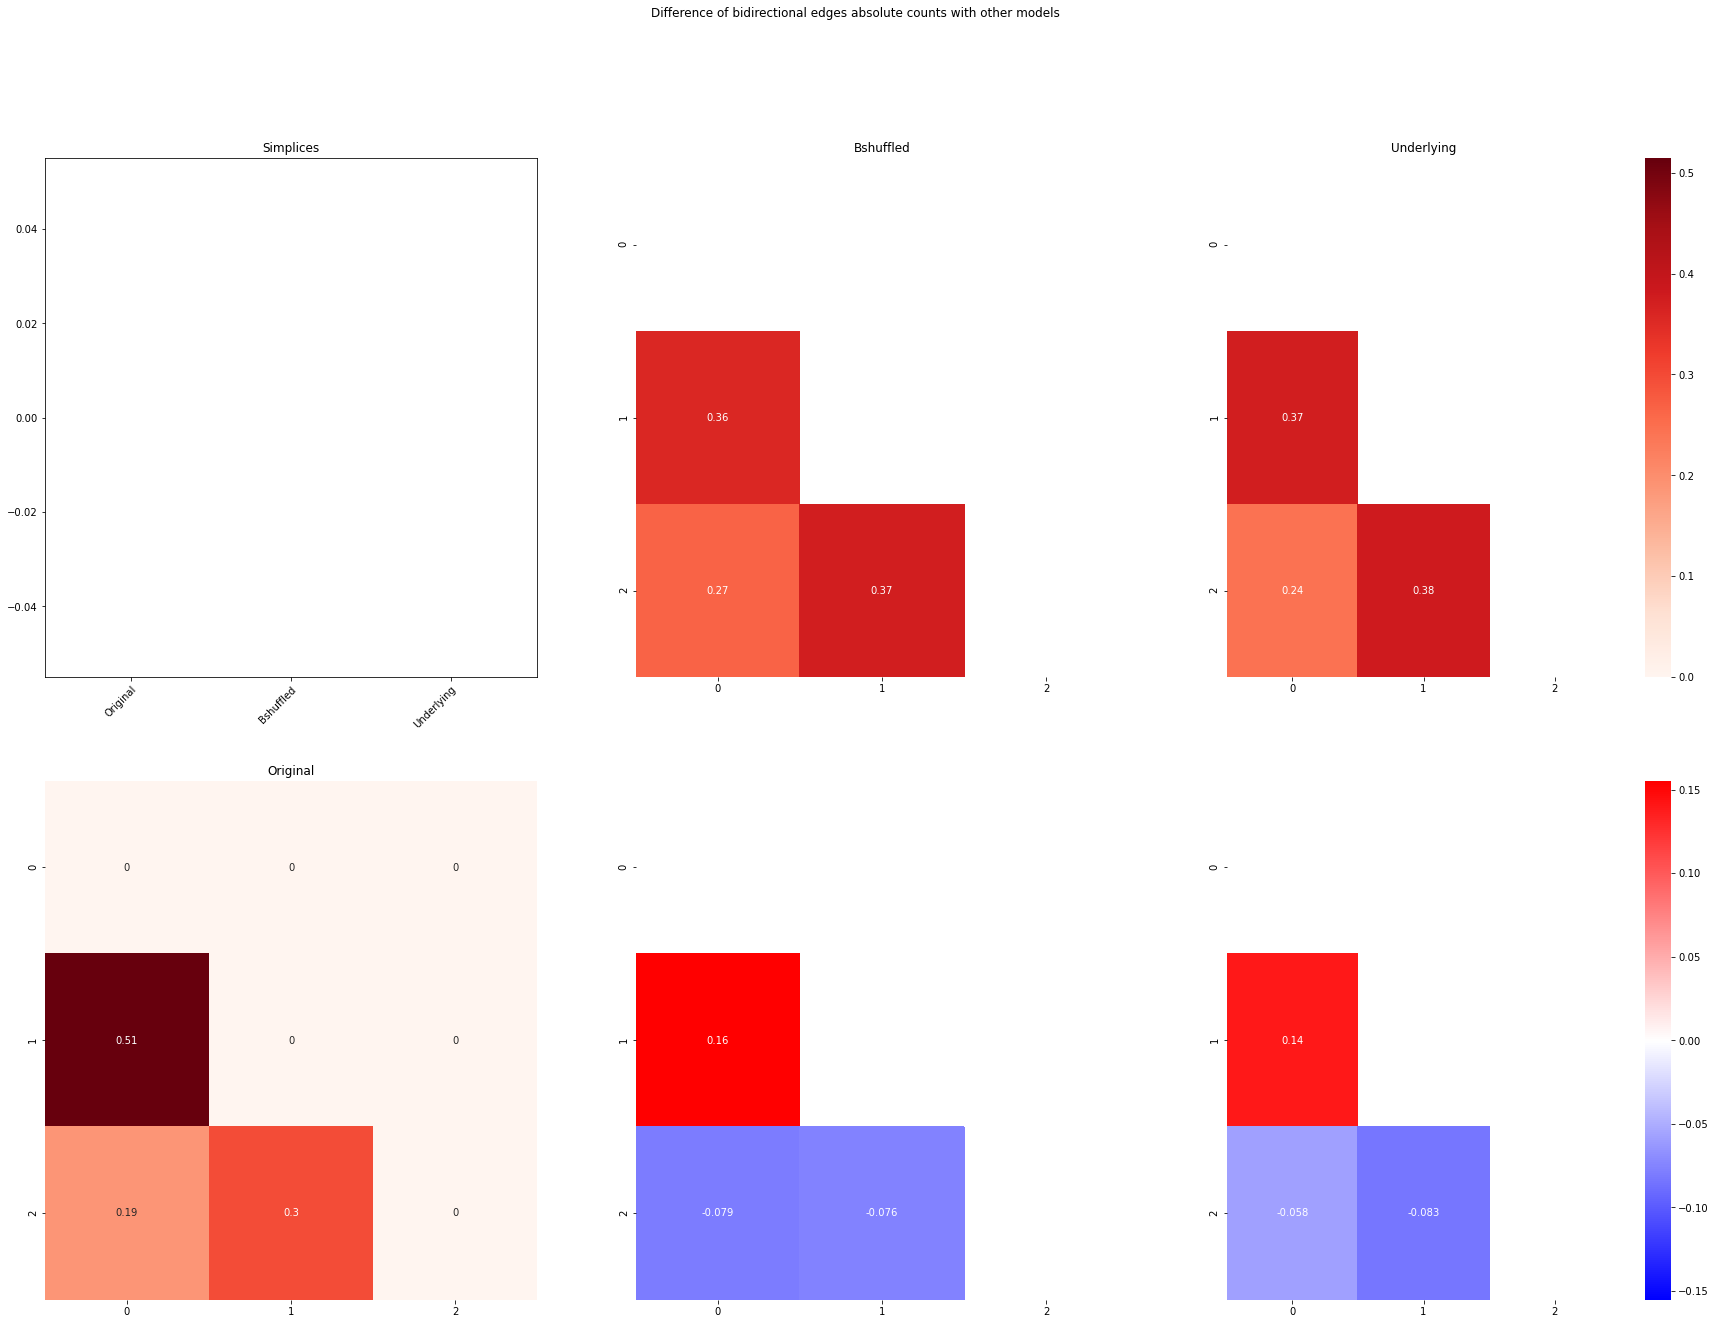

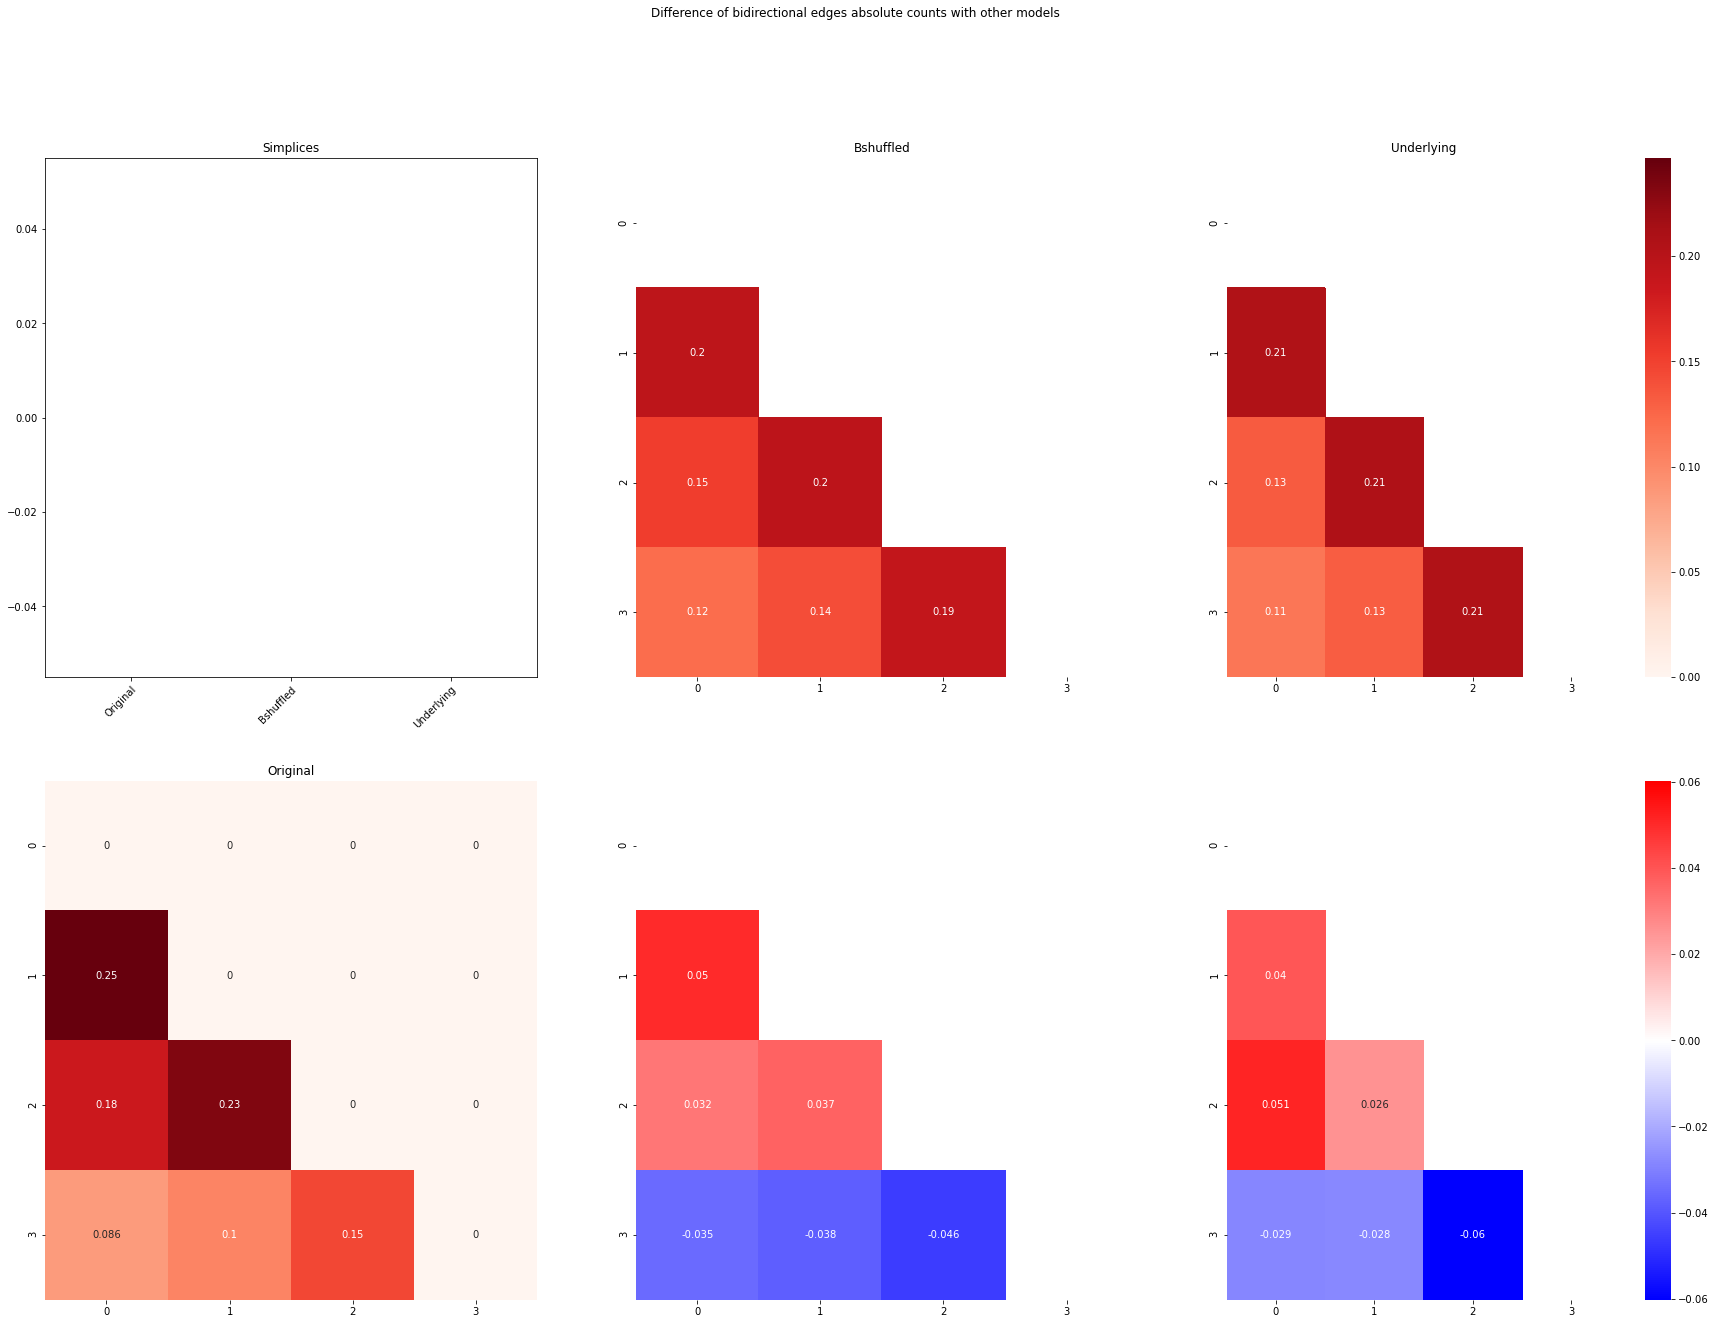

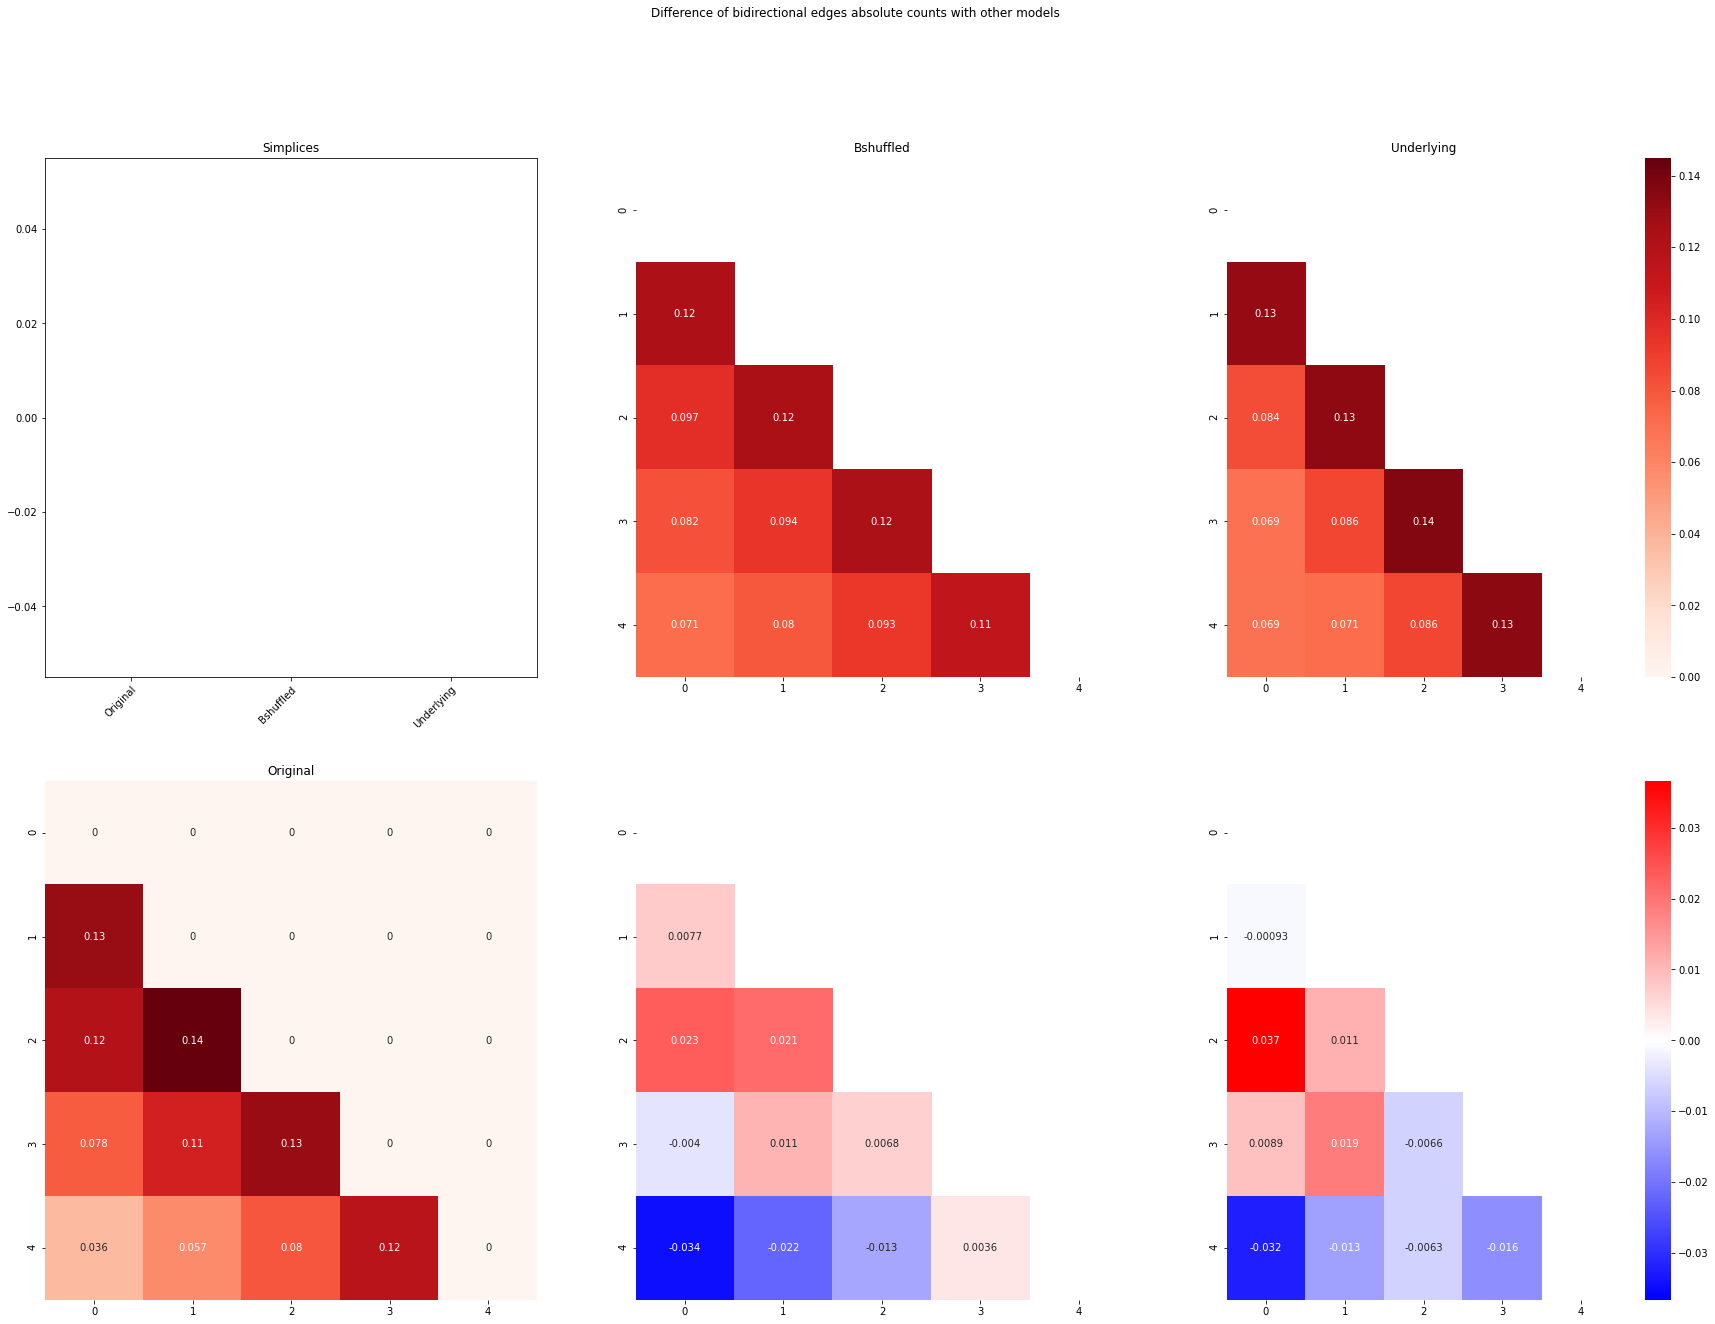

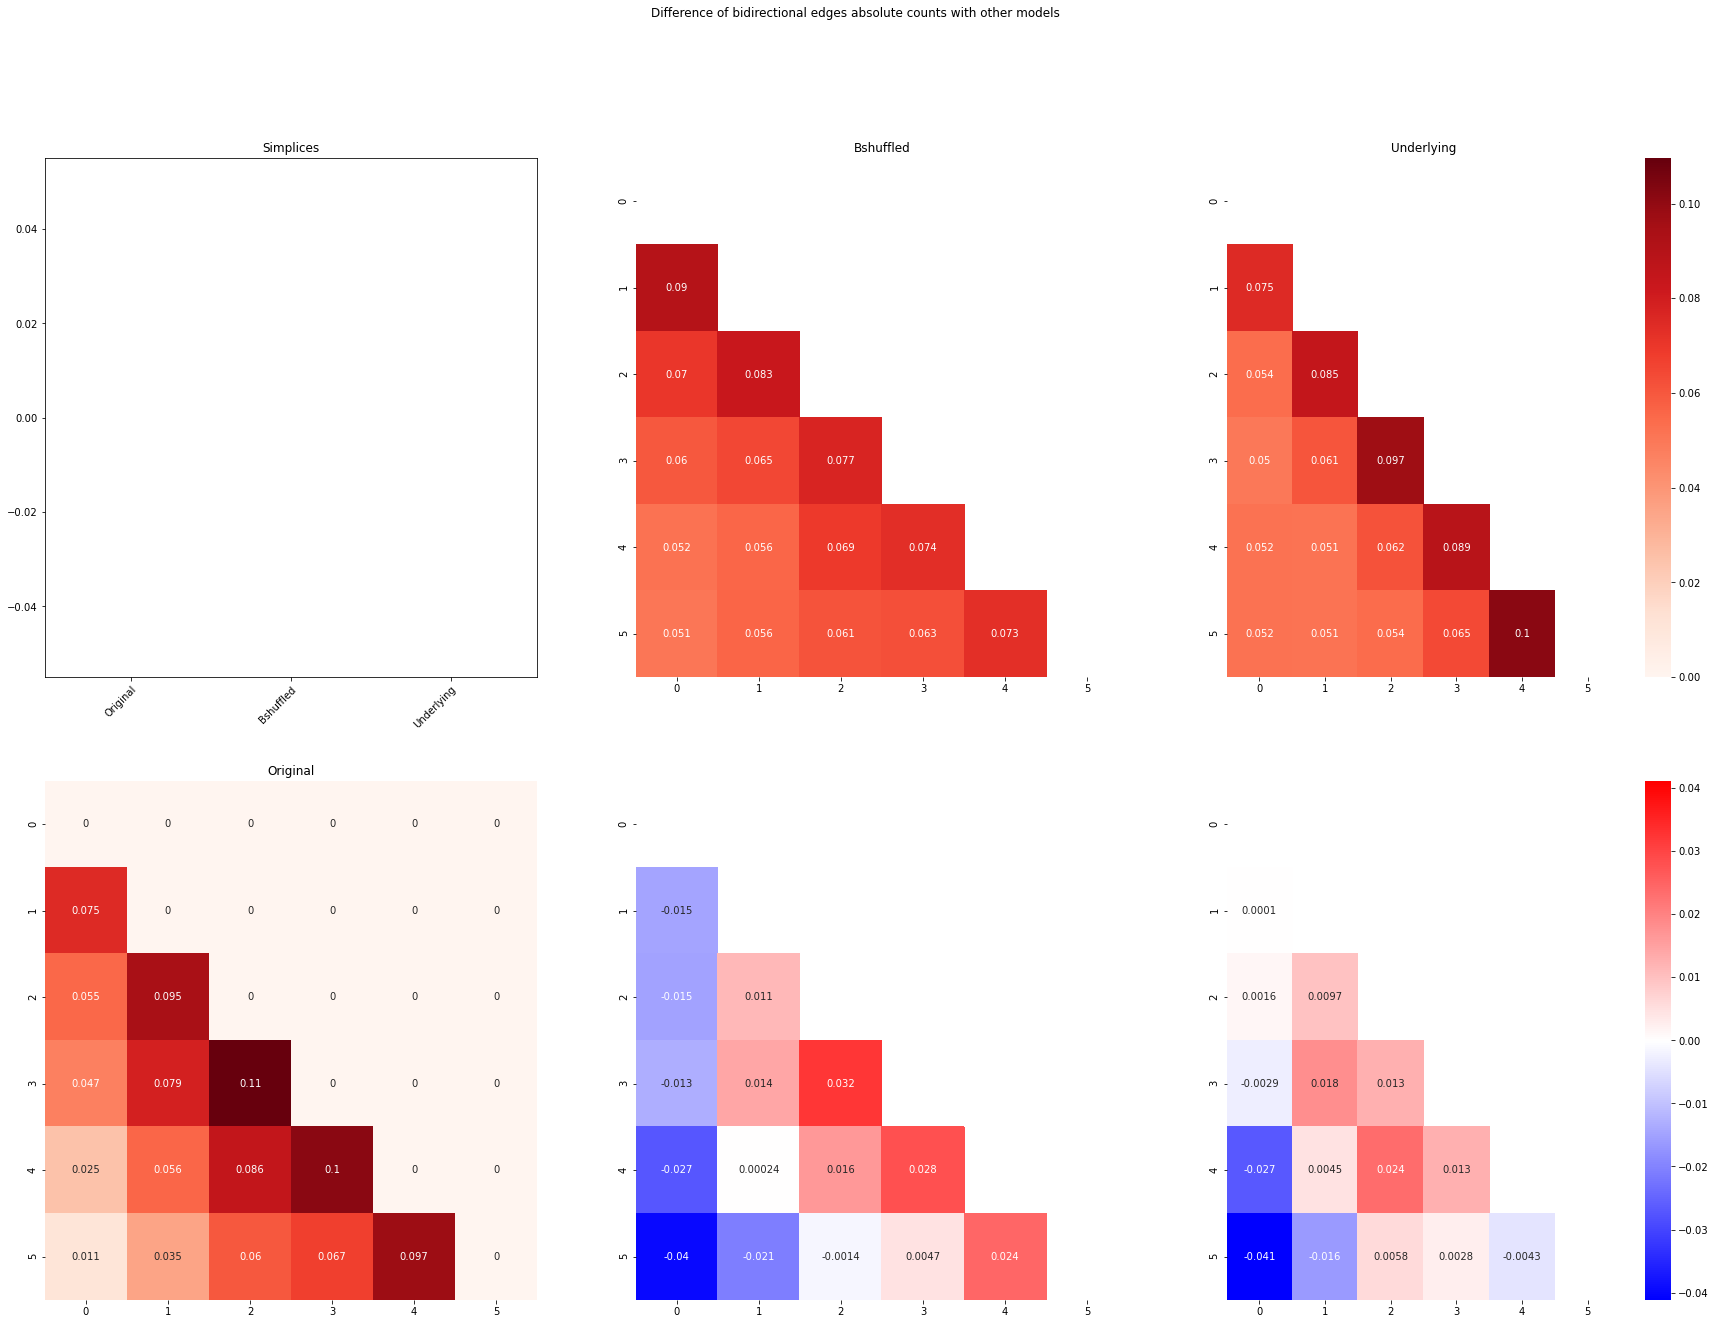

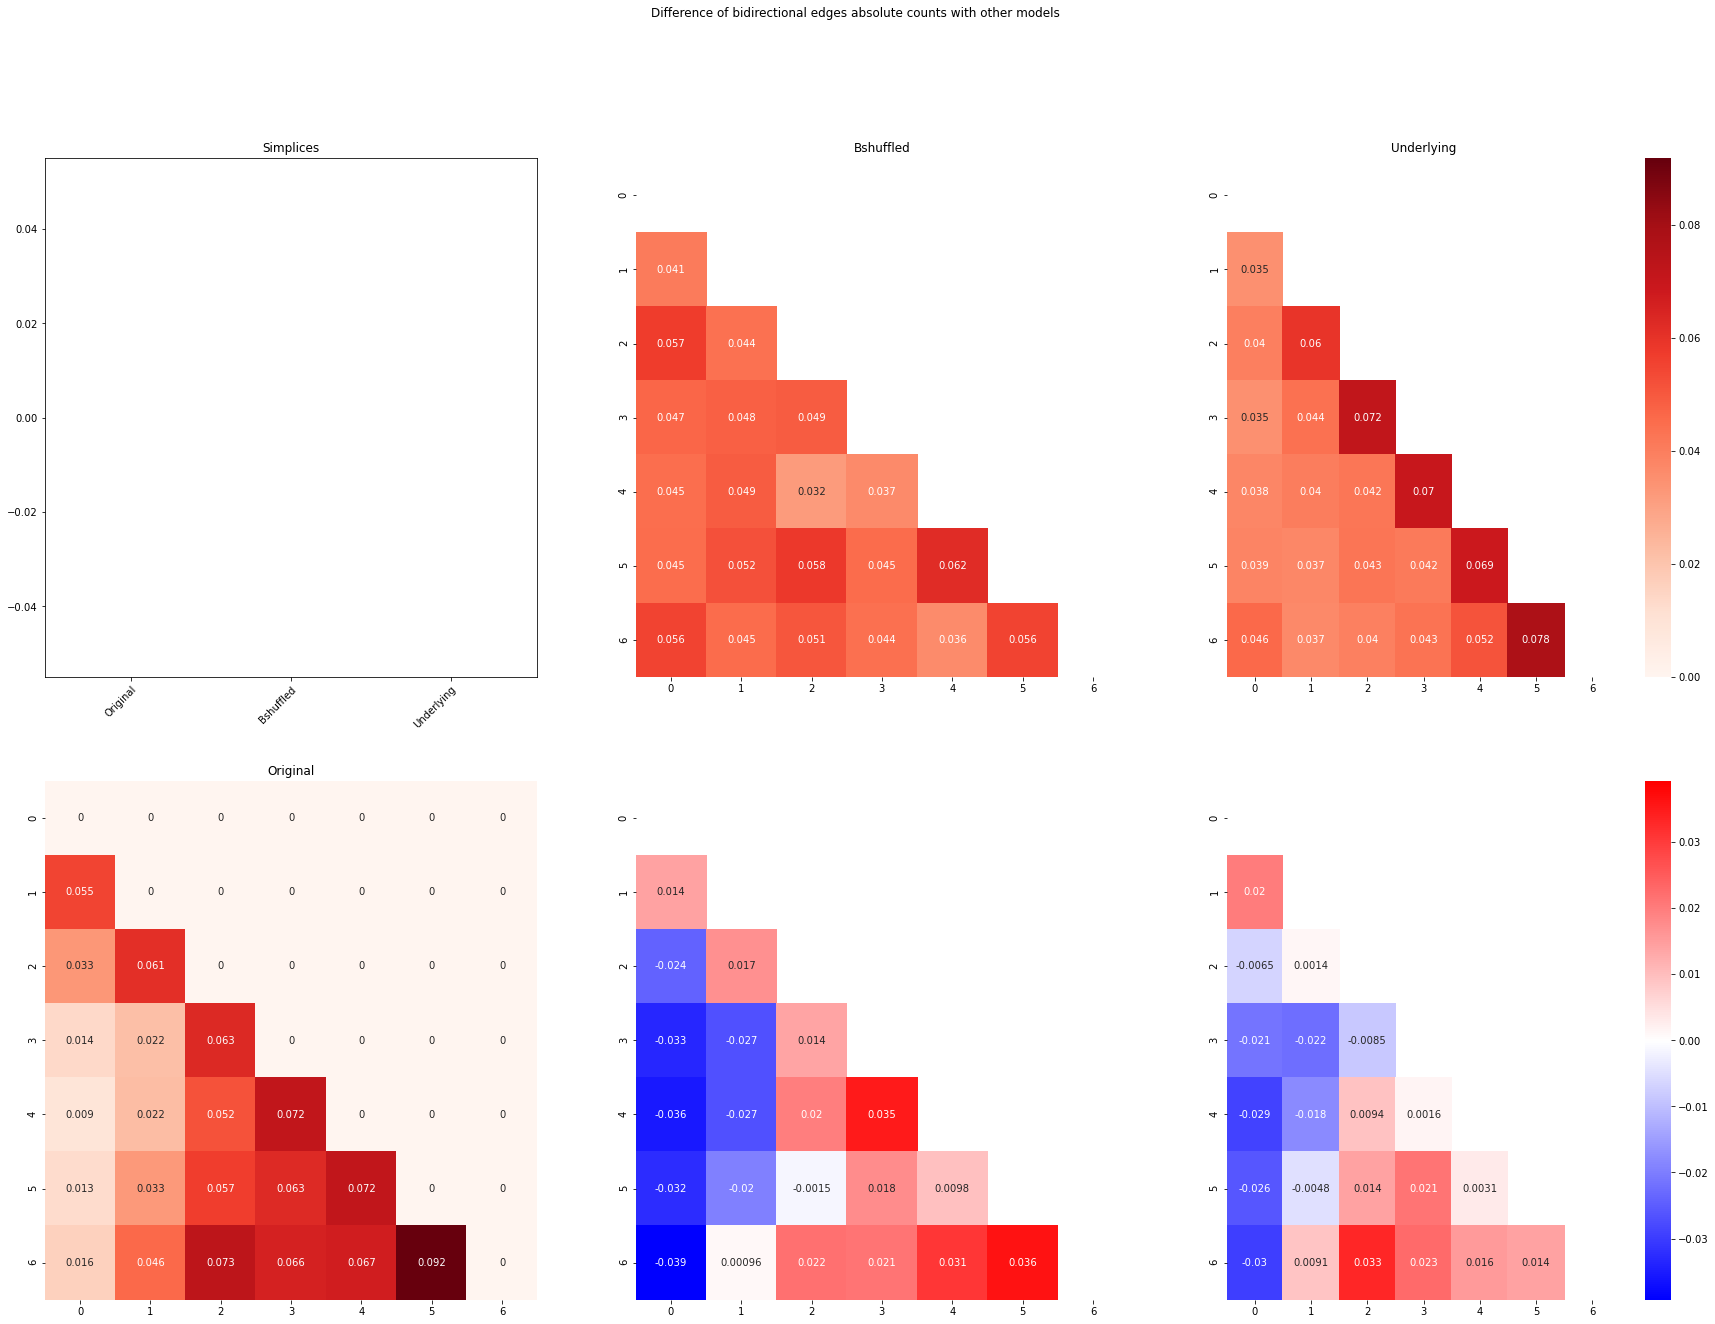

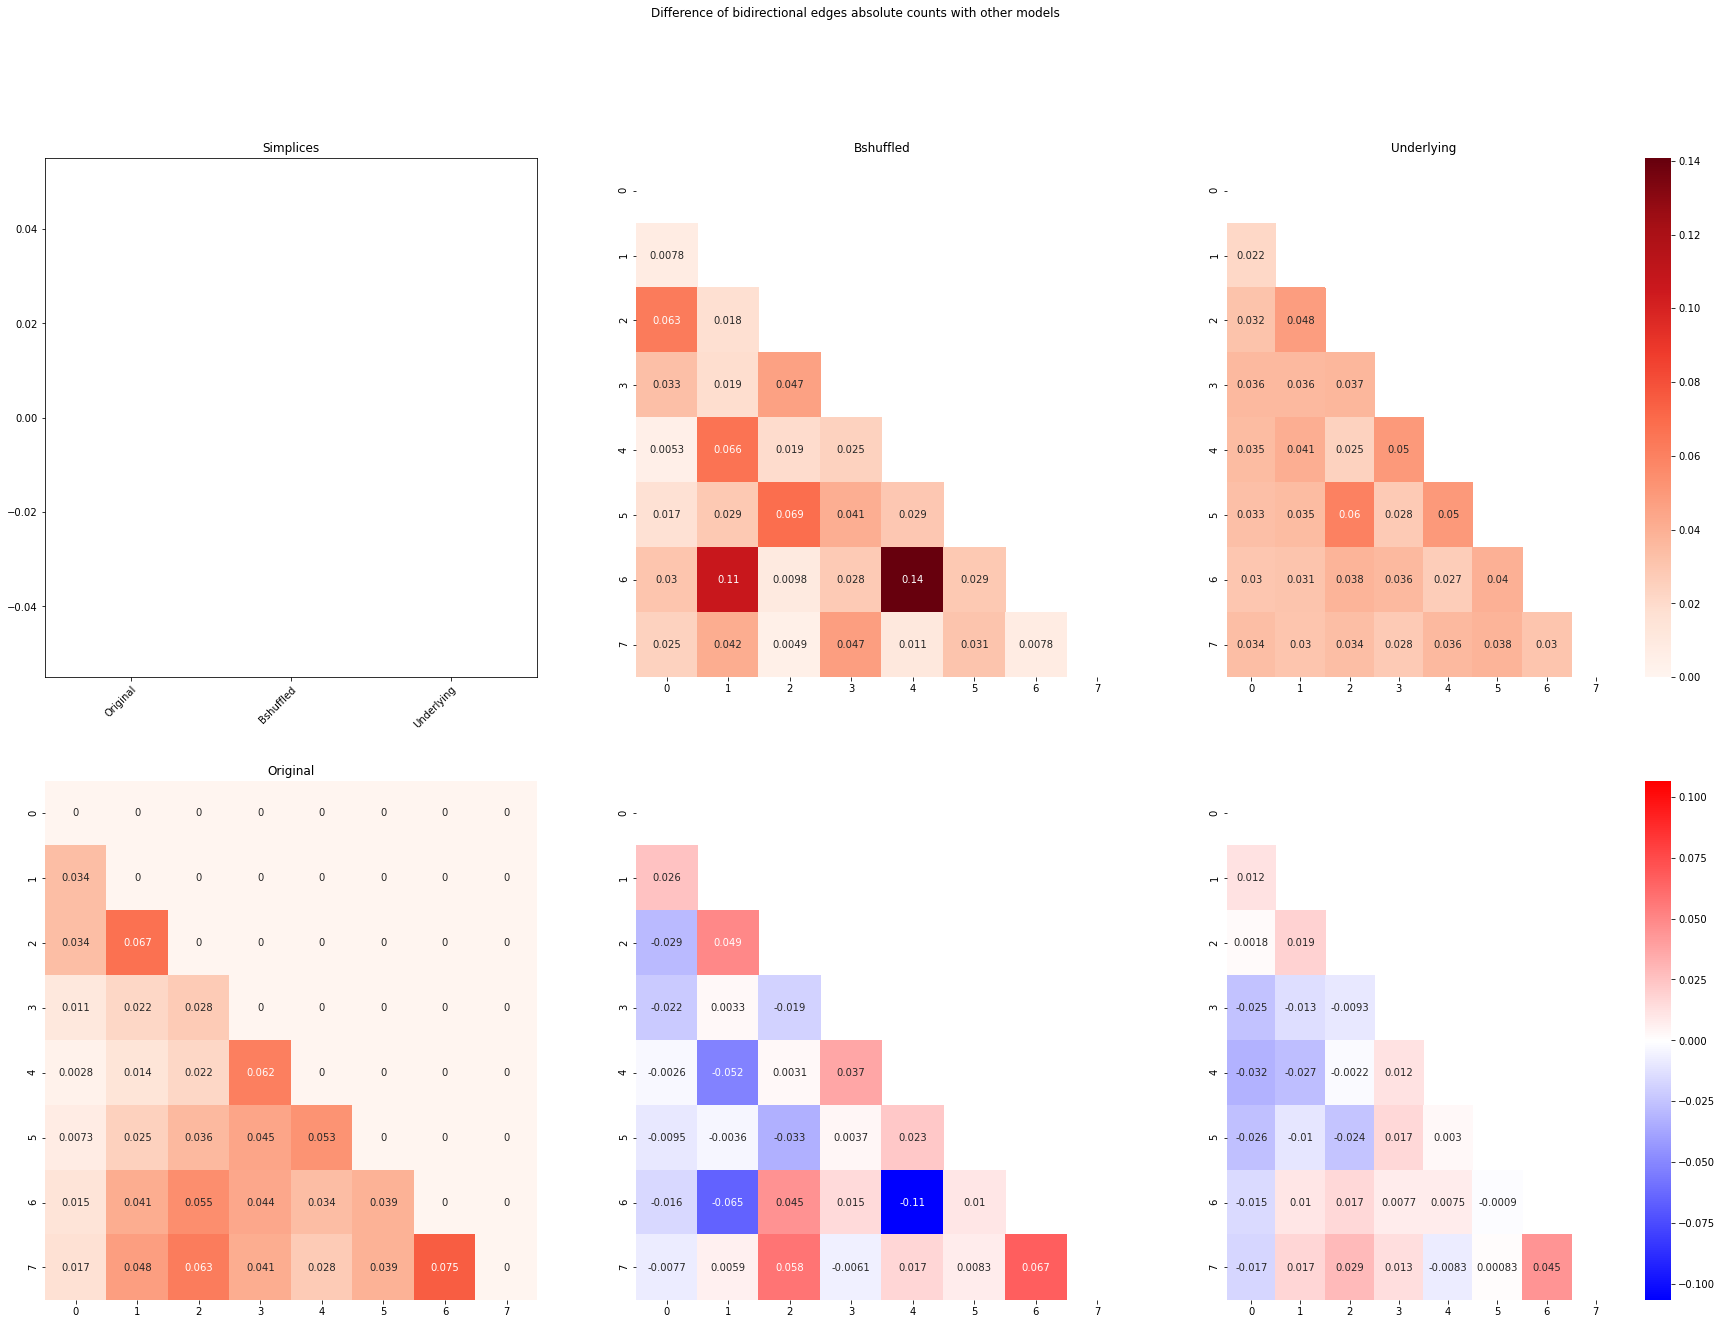

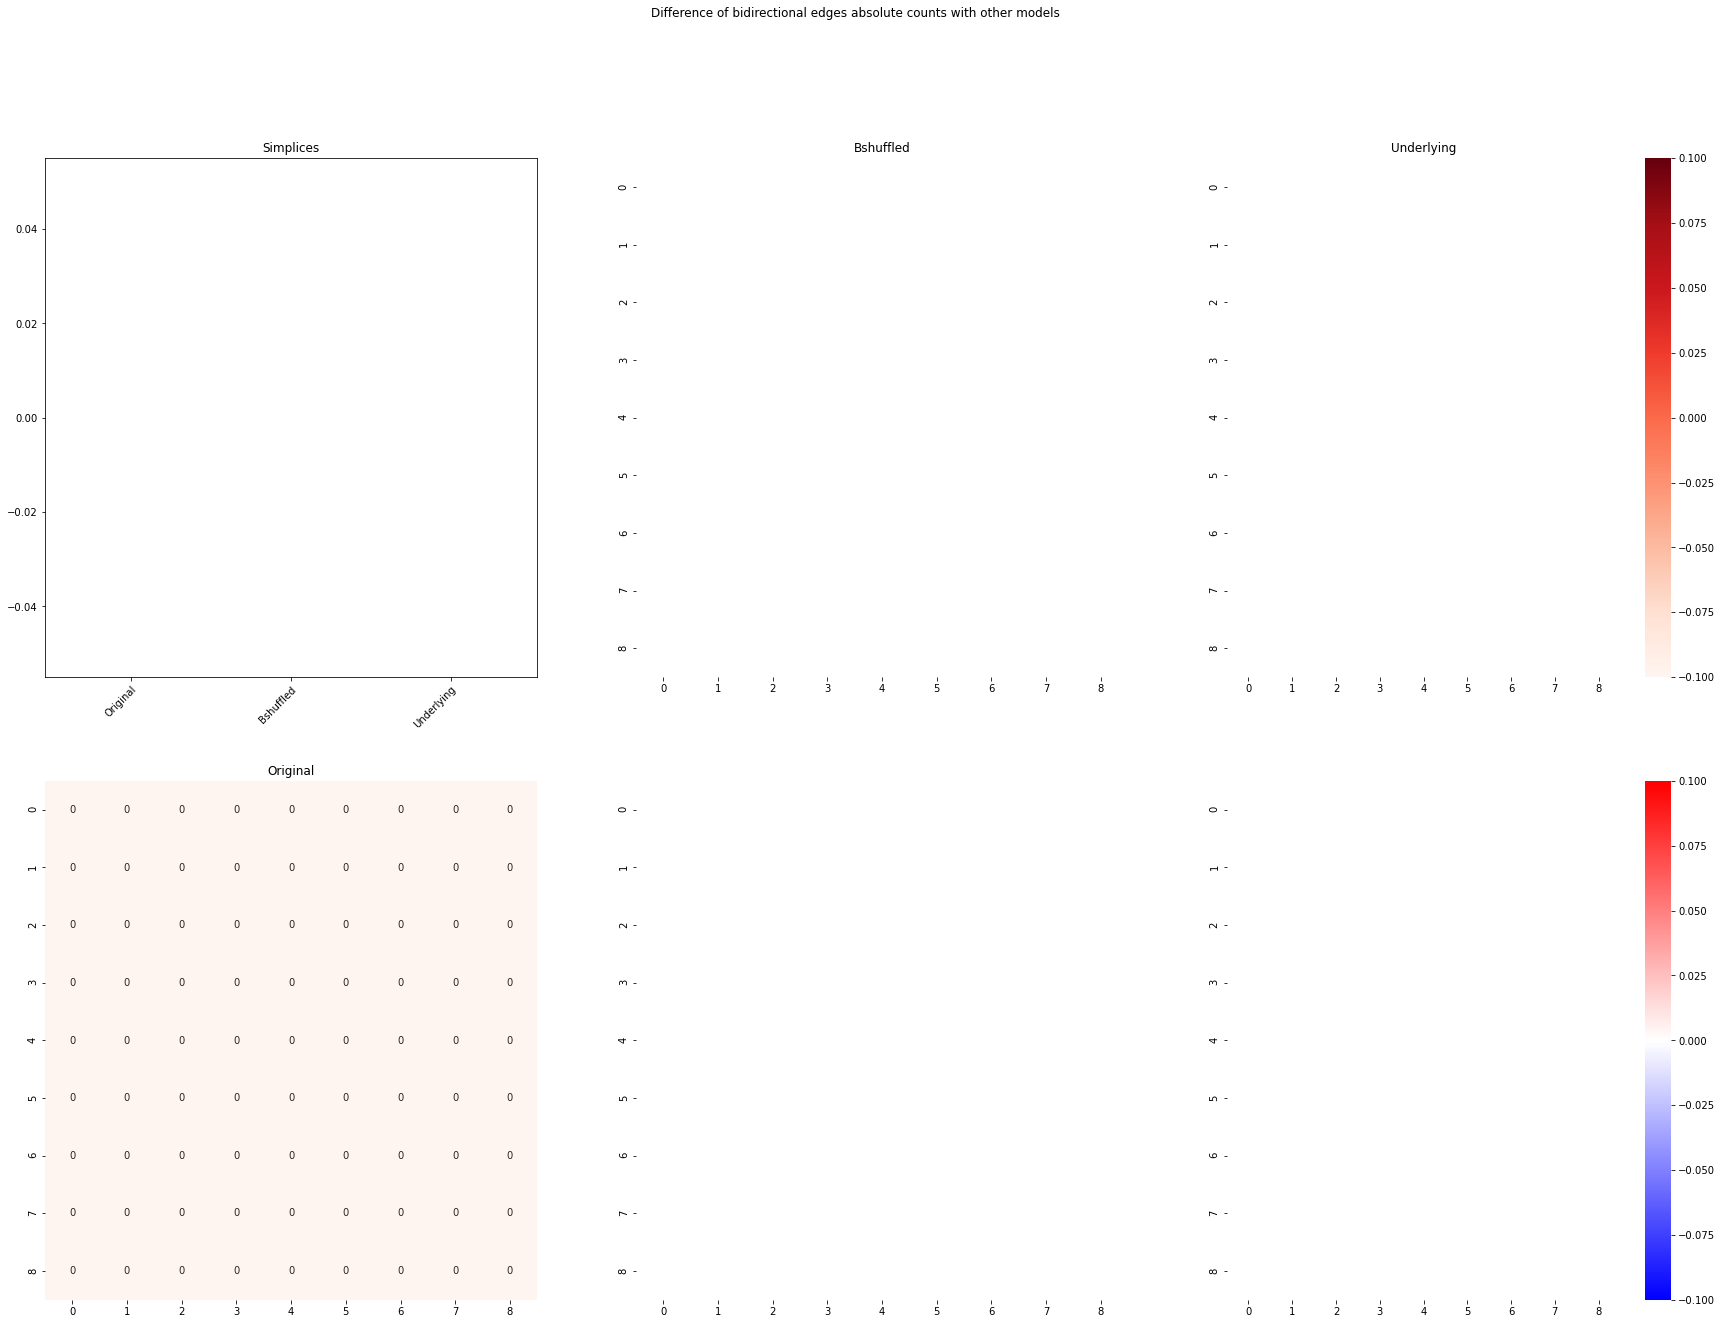

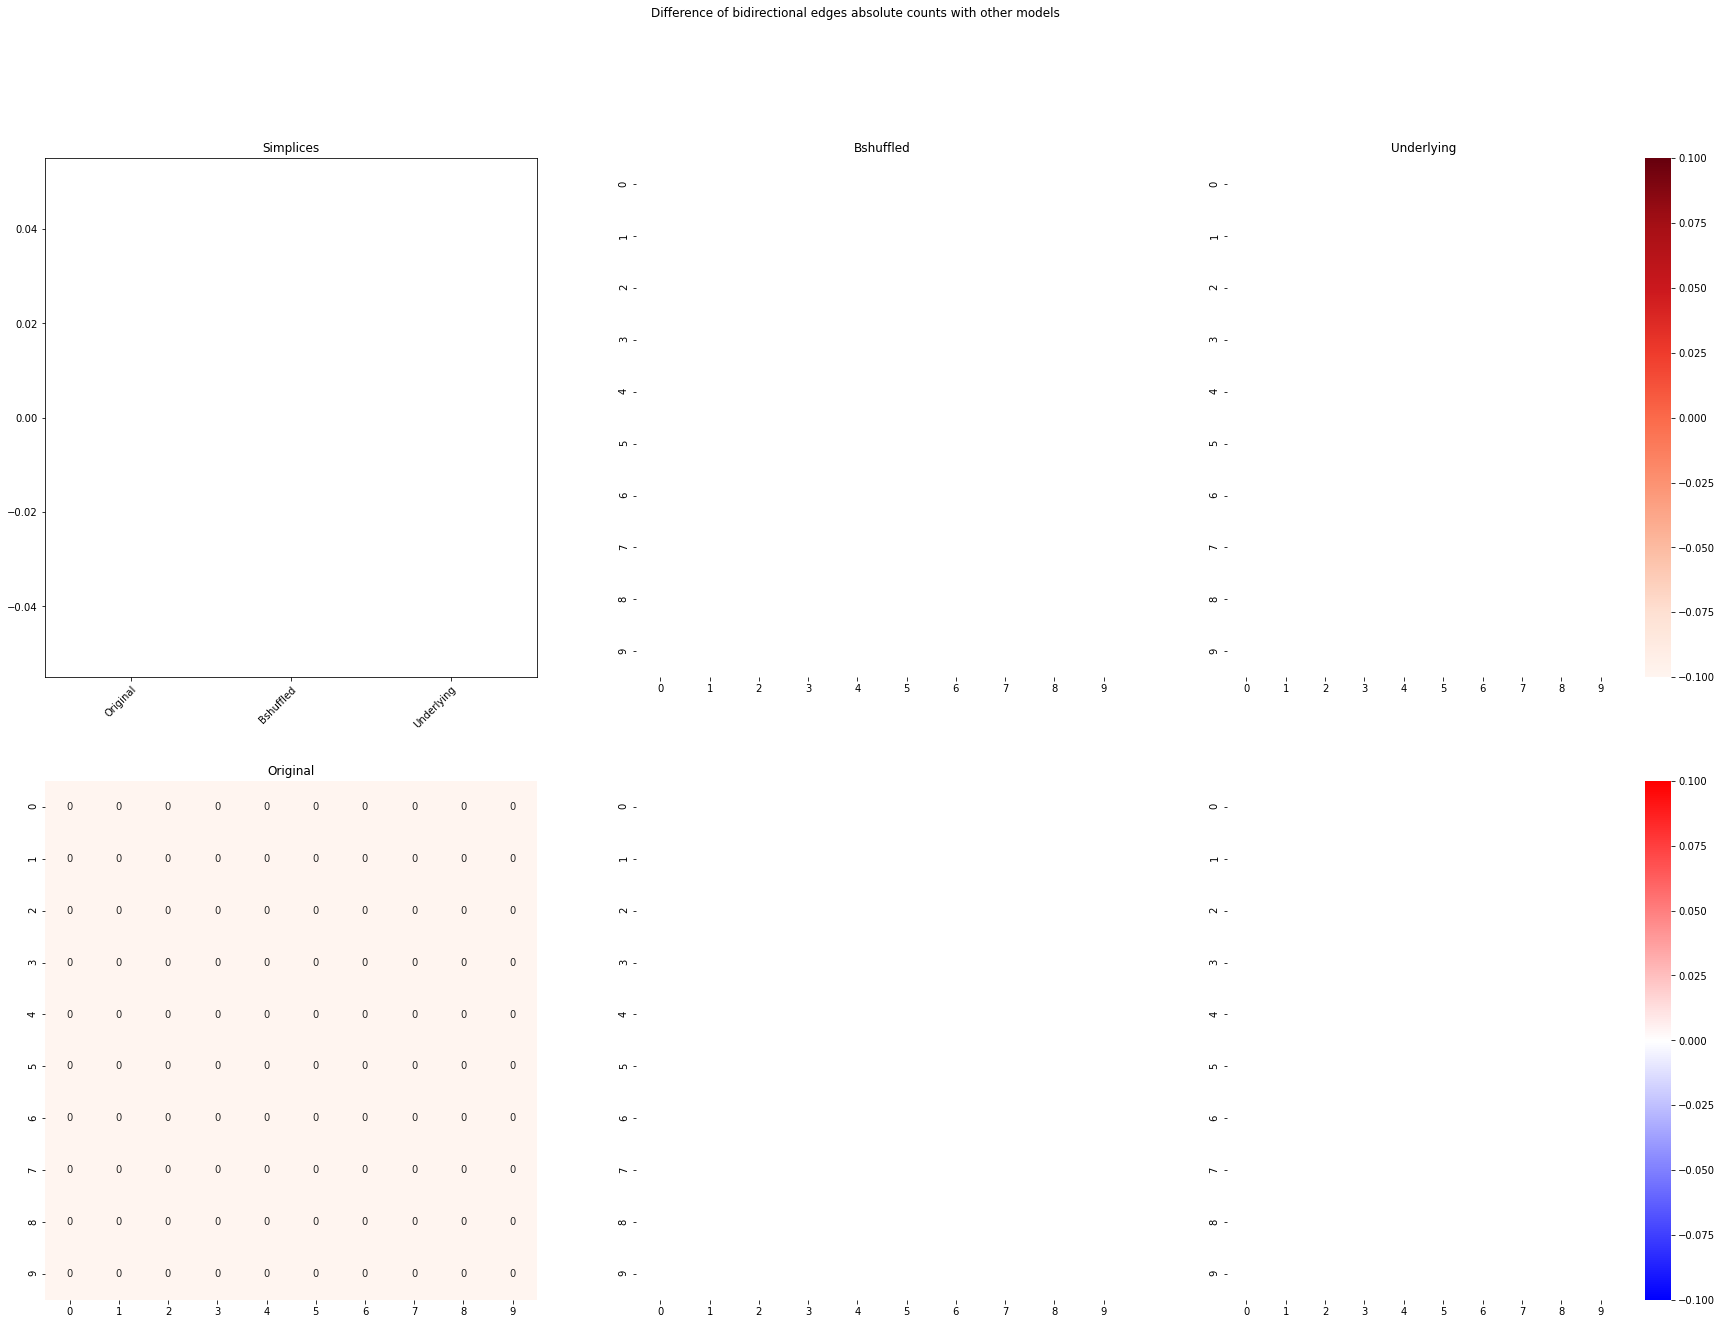

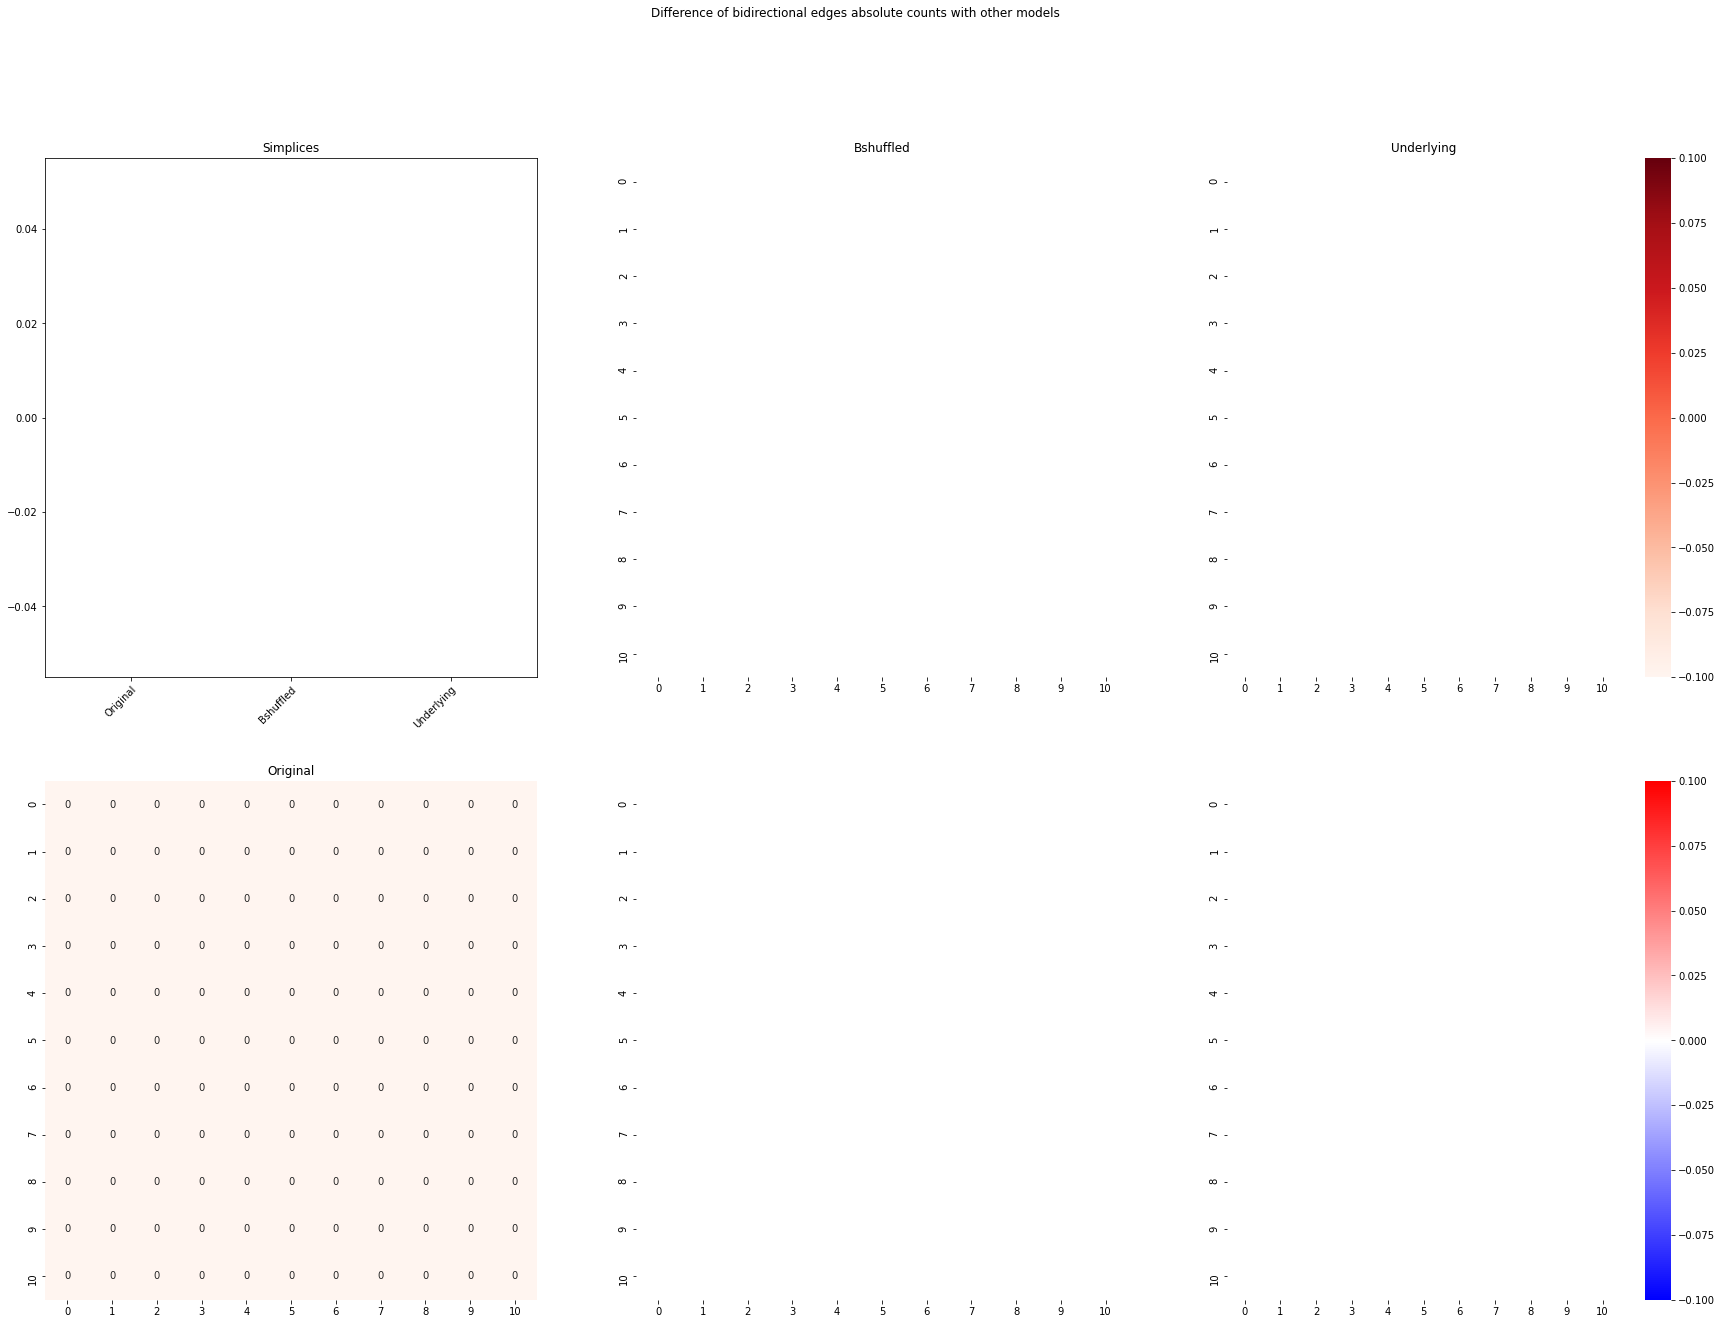

In [18]:
compare_graphs_diff([a,b,c], 1, "worm_mbcounts_percent_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

# Normalized 

## All

In [19]:
a = pickle.load(open(Path("data/worm/full/bcounts.pkl"),'rb'))
for key in a.keys():
    a[key] = normalized_transform(a[key])[0]
b = get_average_bcounts(Path("data/worm_control/bishuffled/"), transform = normalized_transform)
c = get_average_bcounts(Path("data/worm_control/underlying/"), transform = normalized_transform)

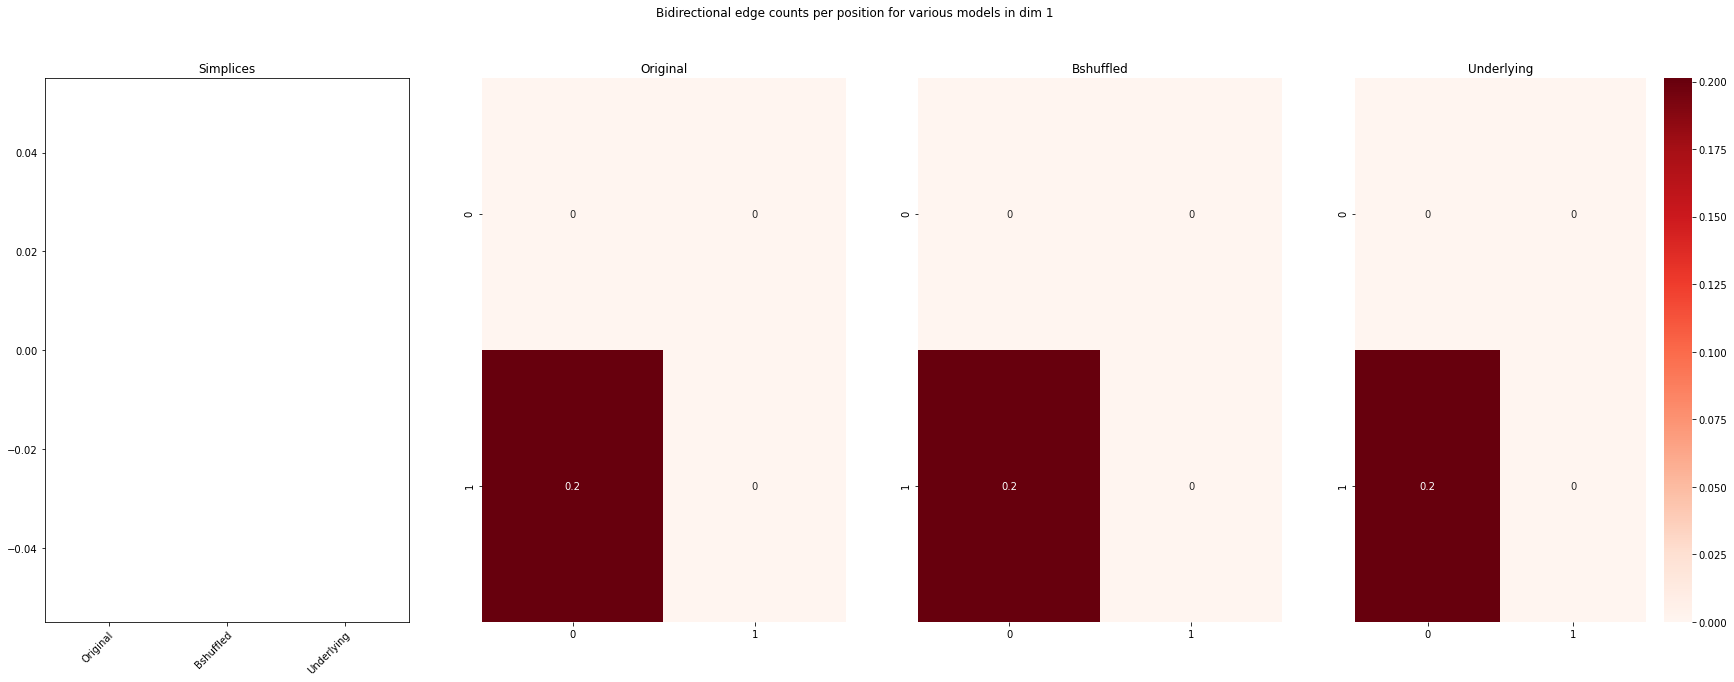

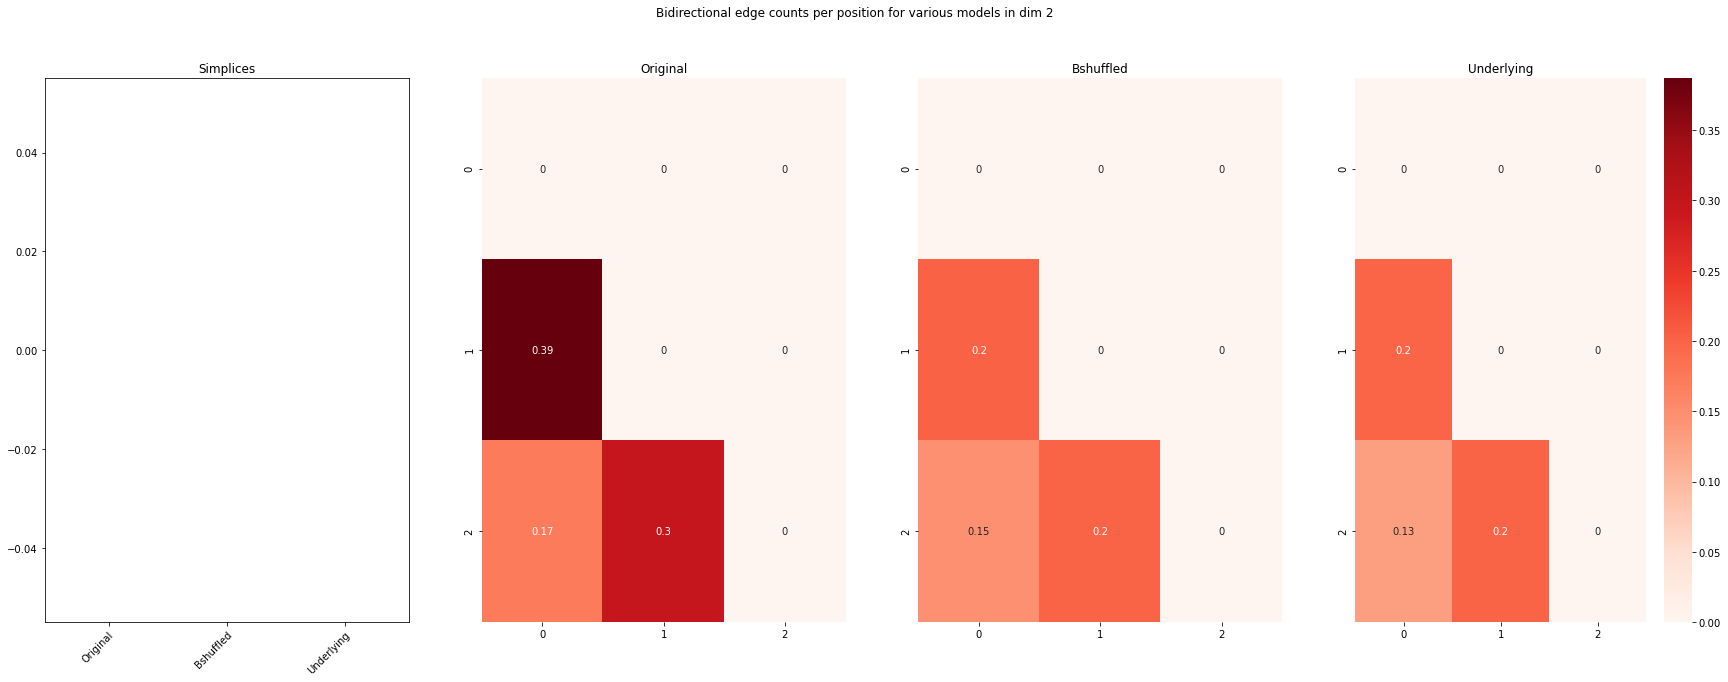

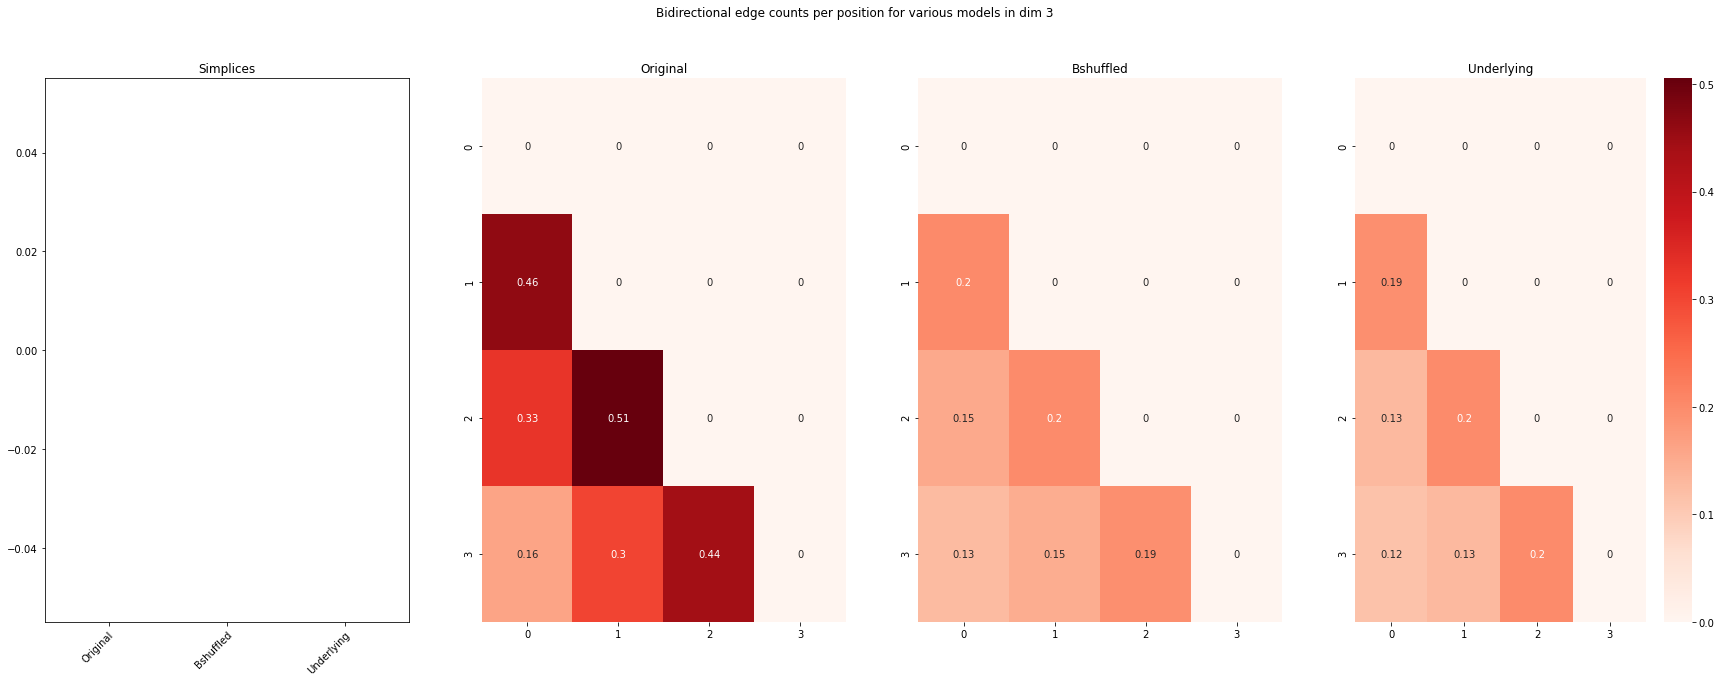

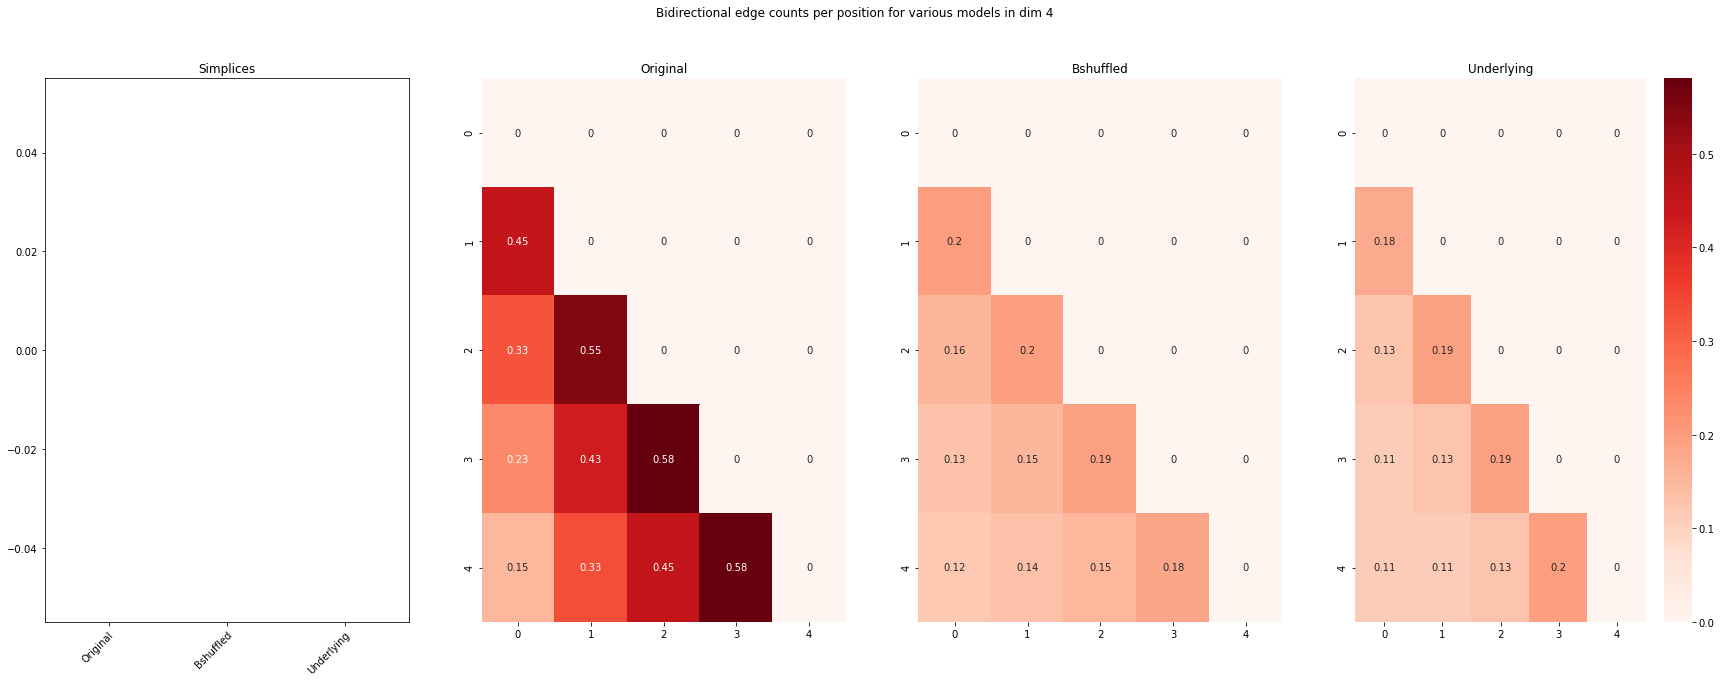

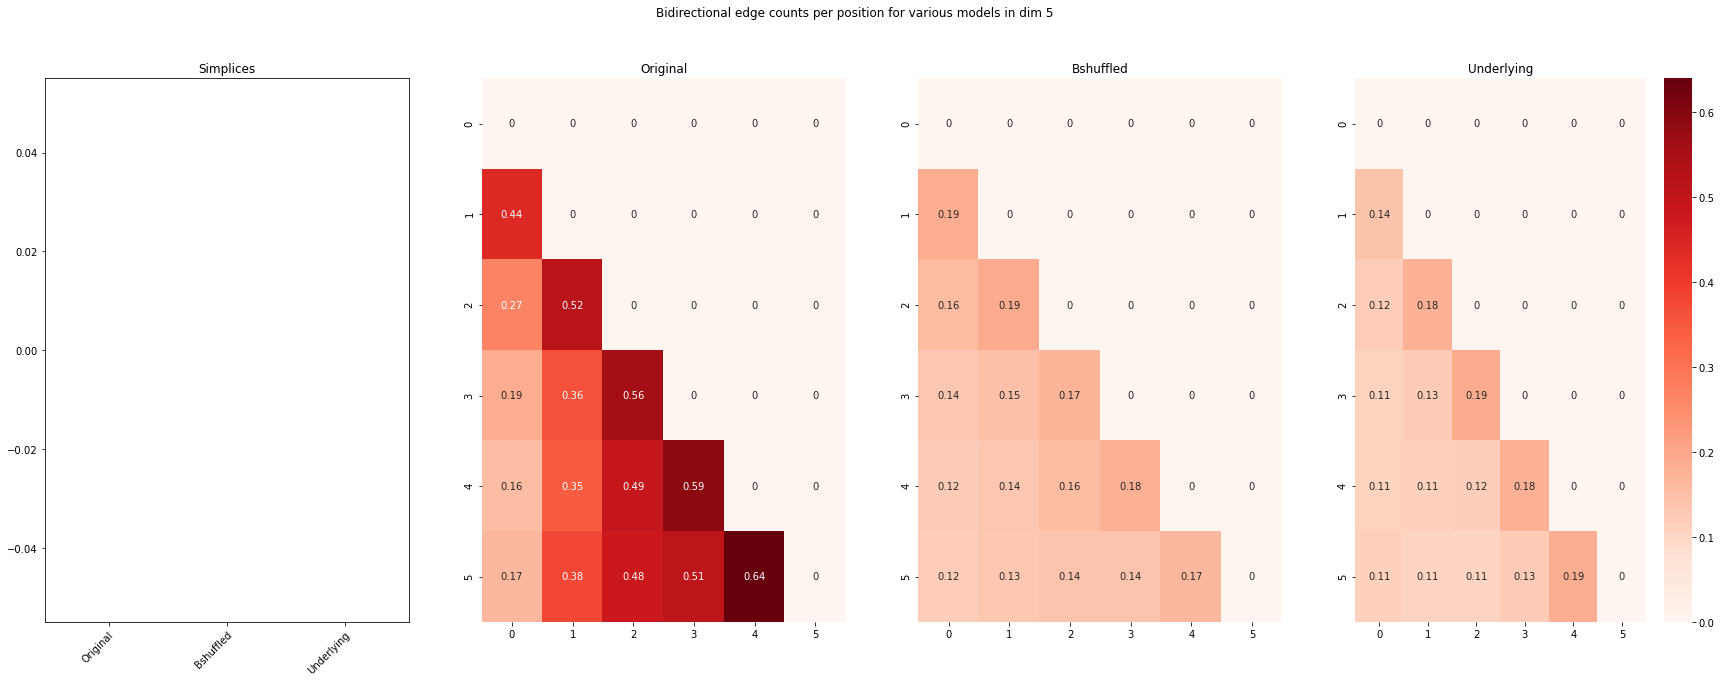

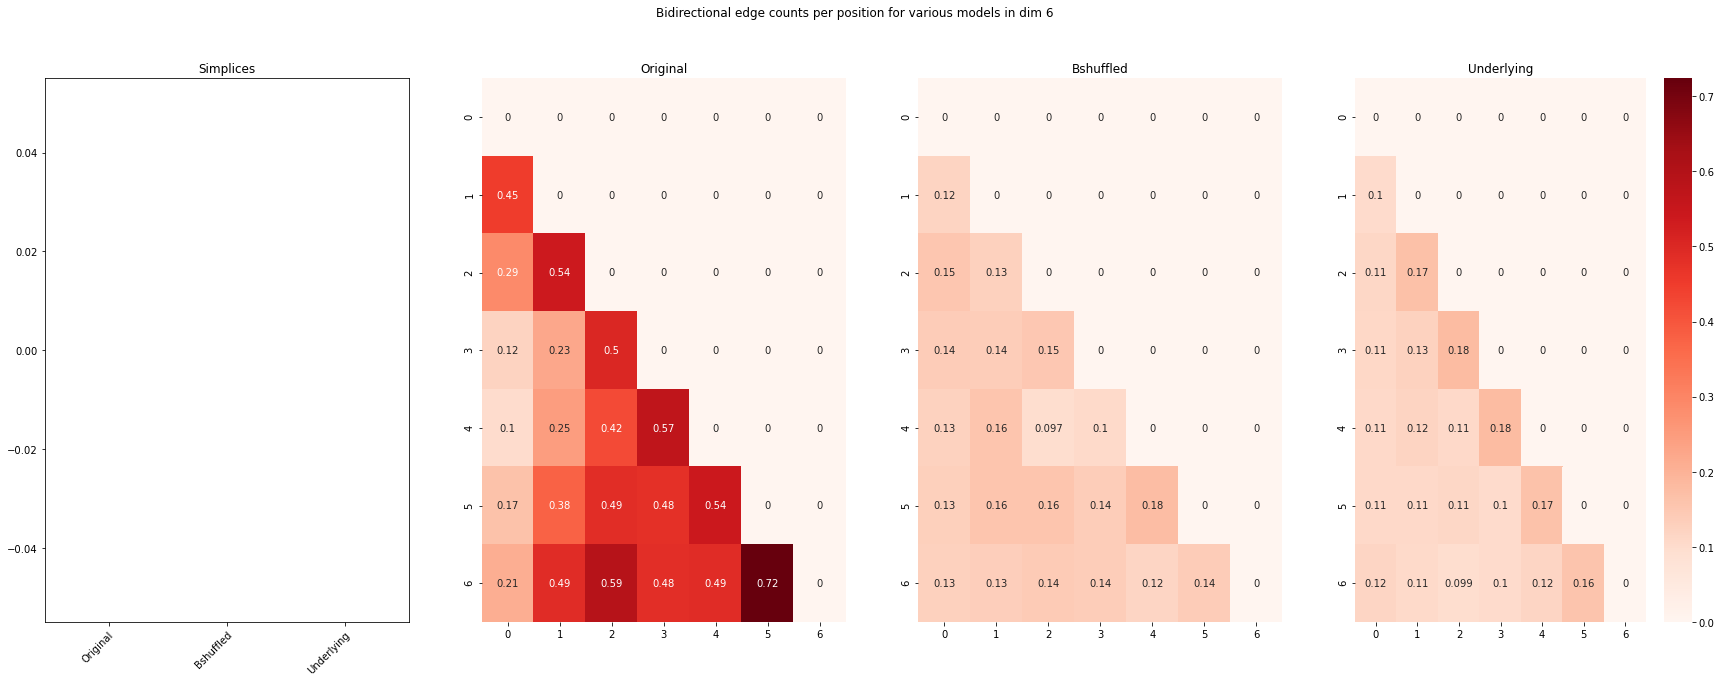

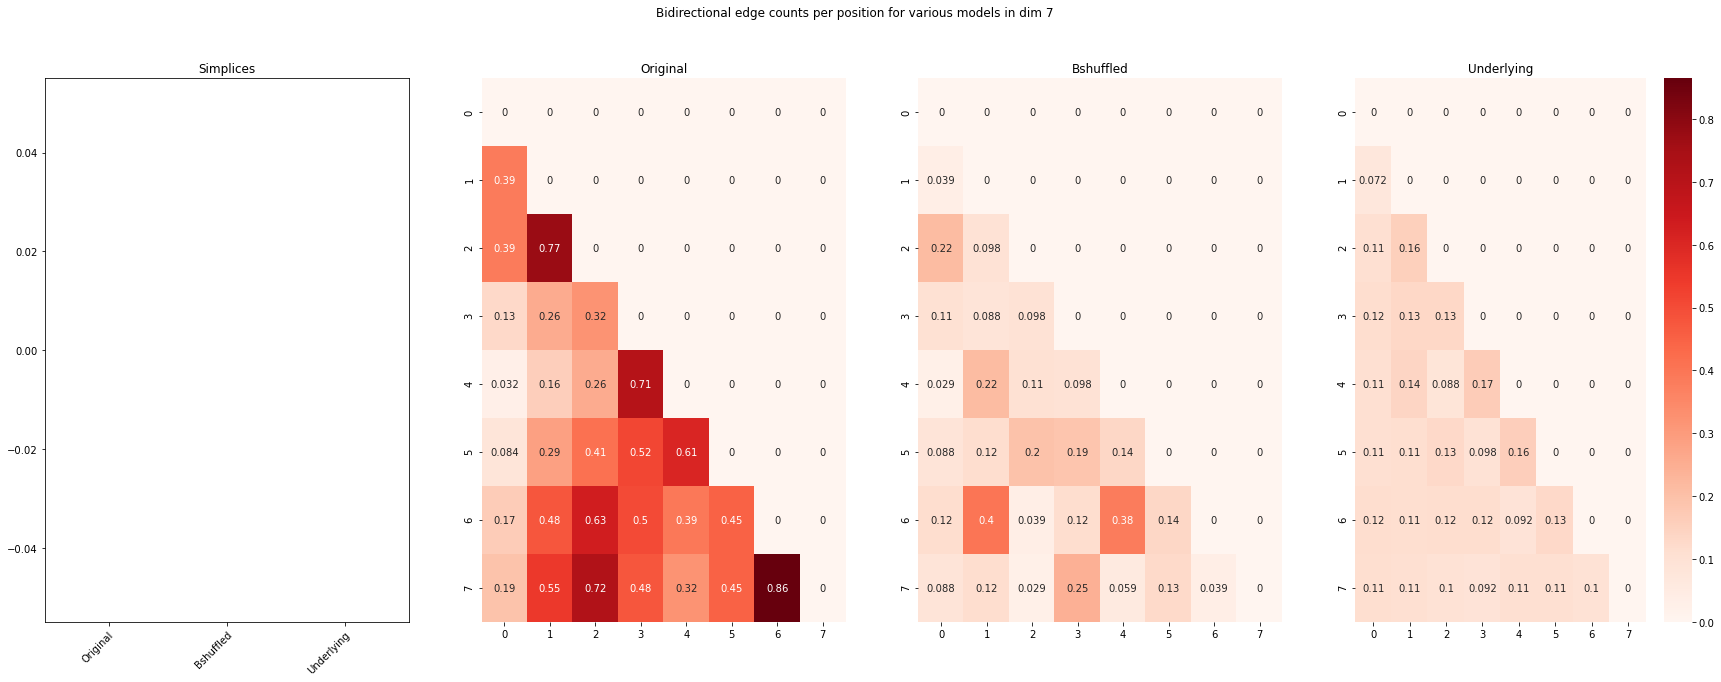

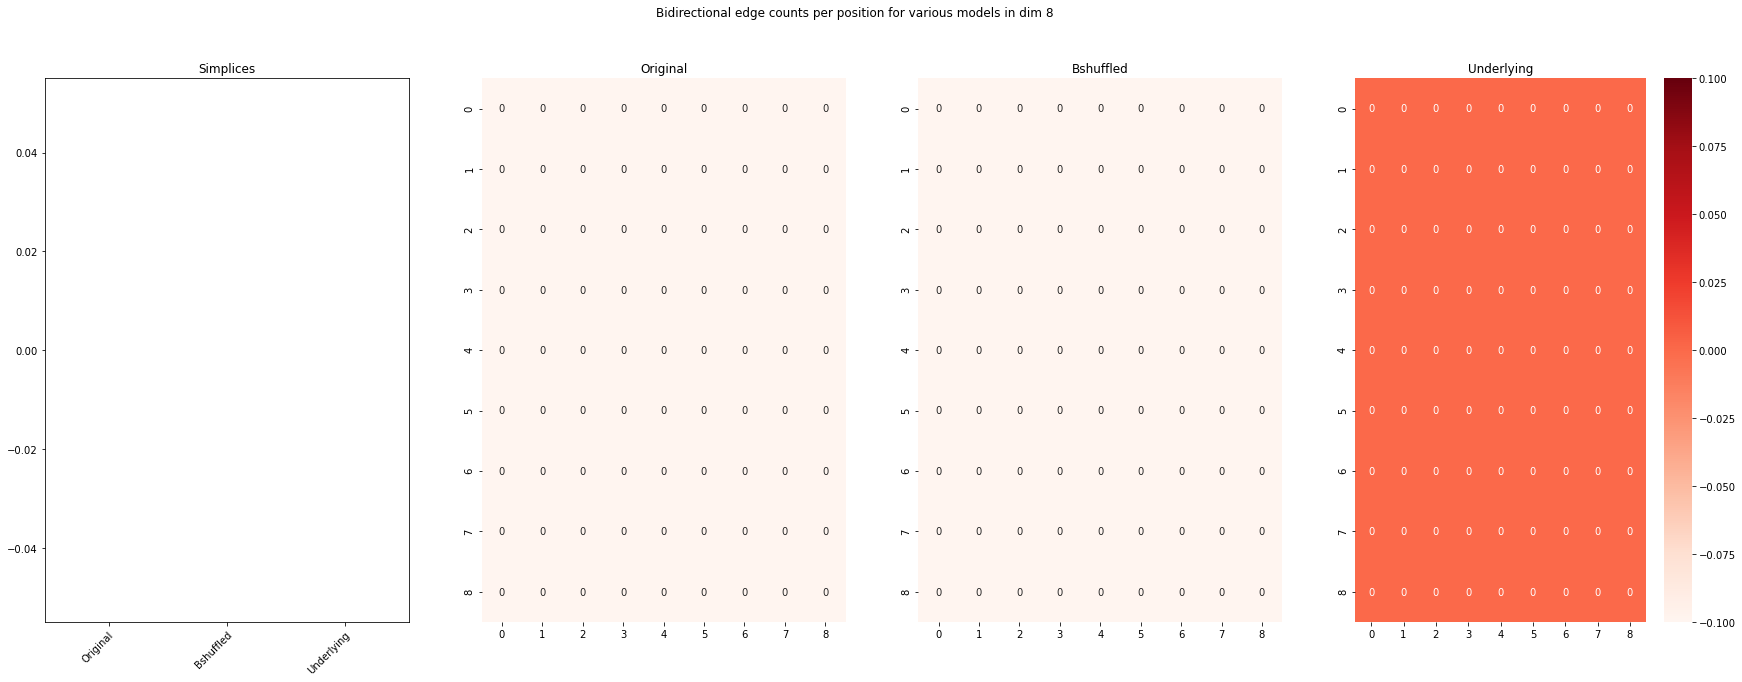

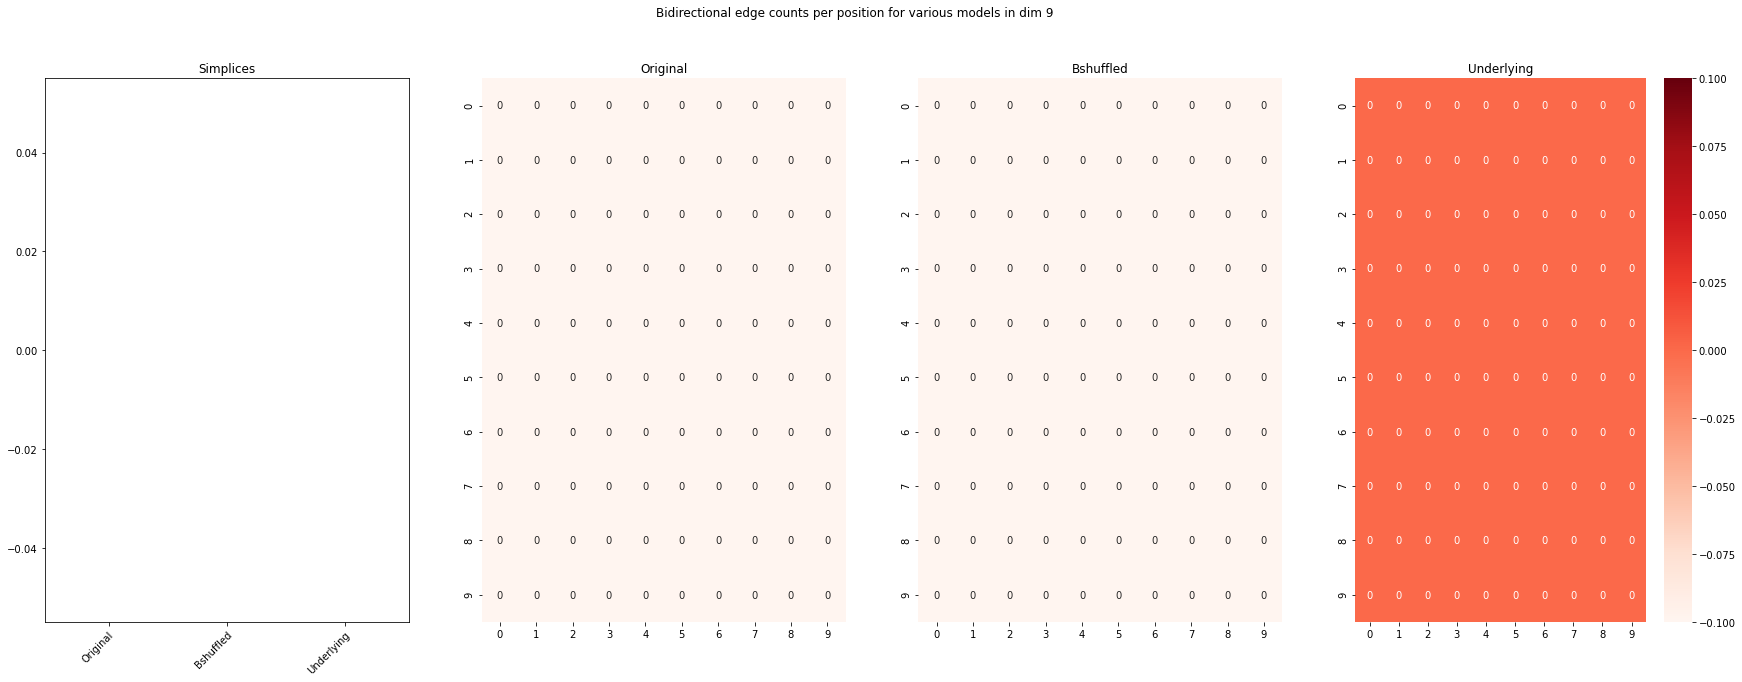

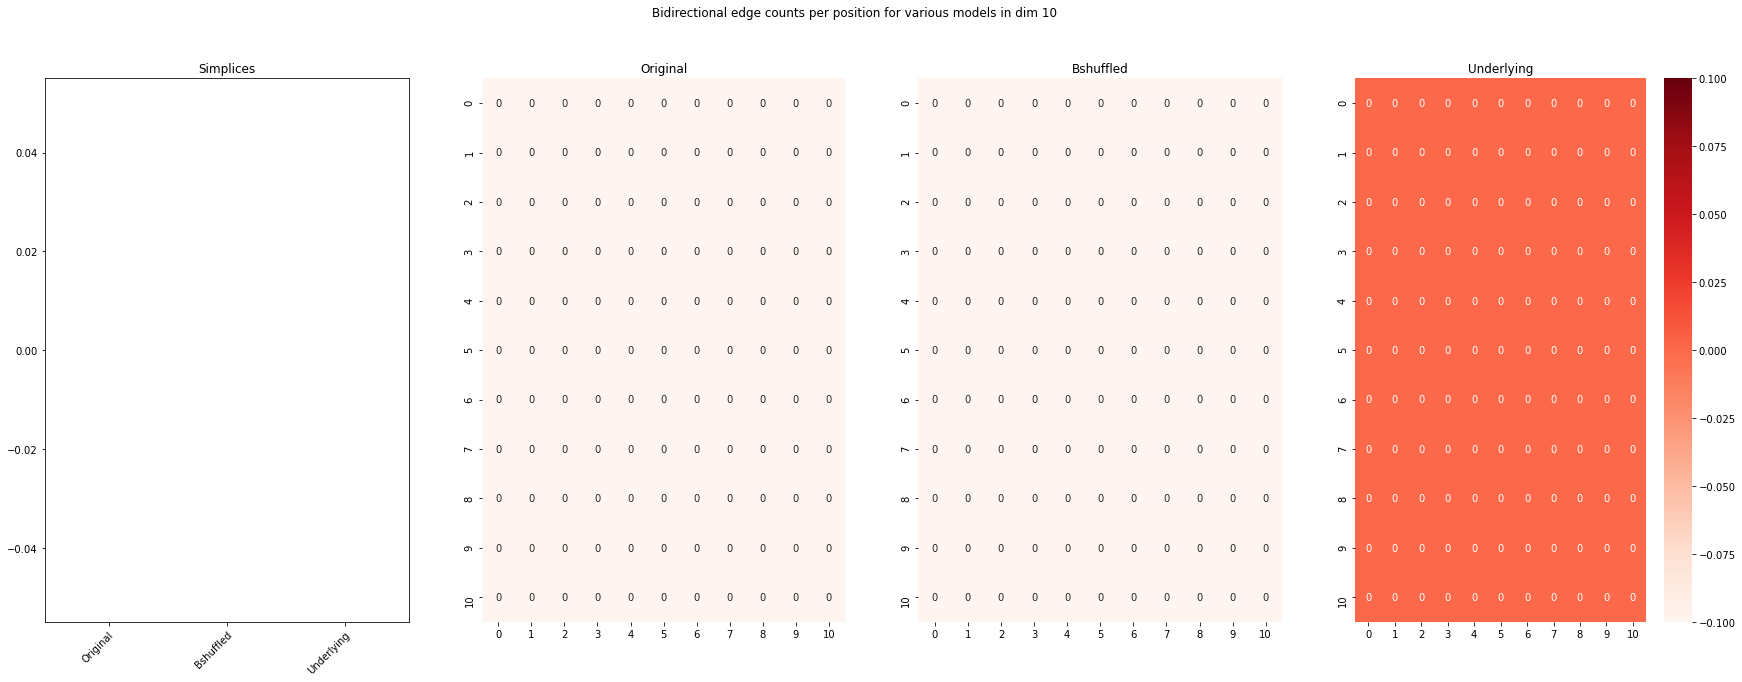

In [20]:
compare_graphs([a,b,c], 1, "worm_bcounts_norm", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

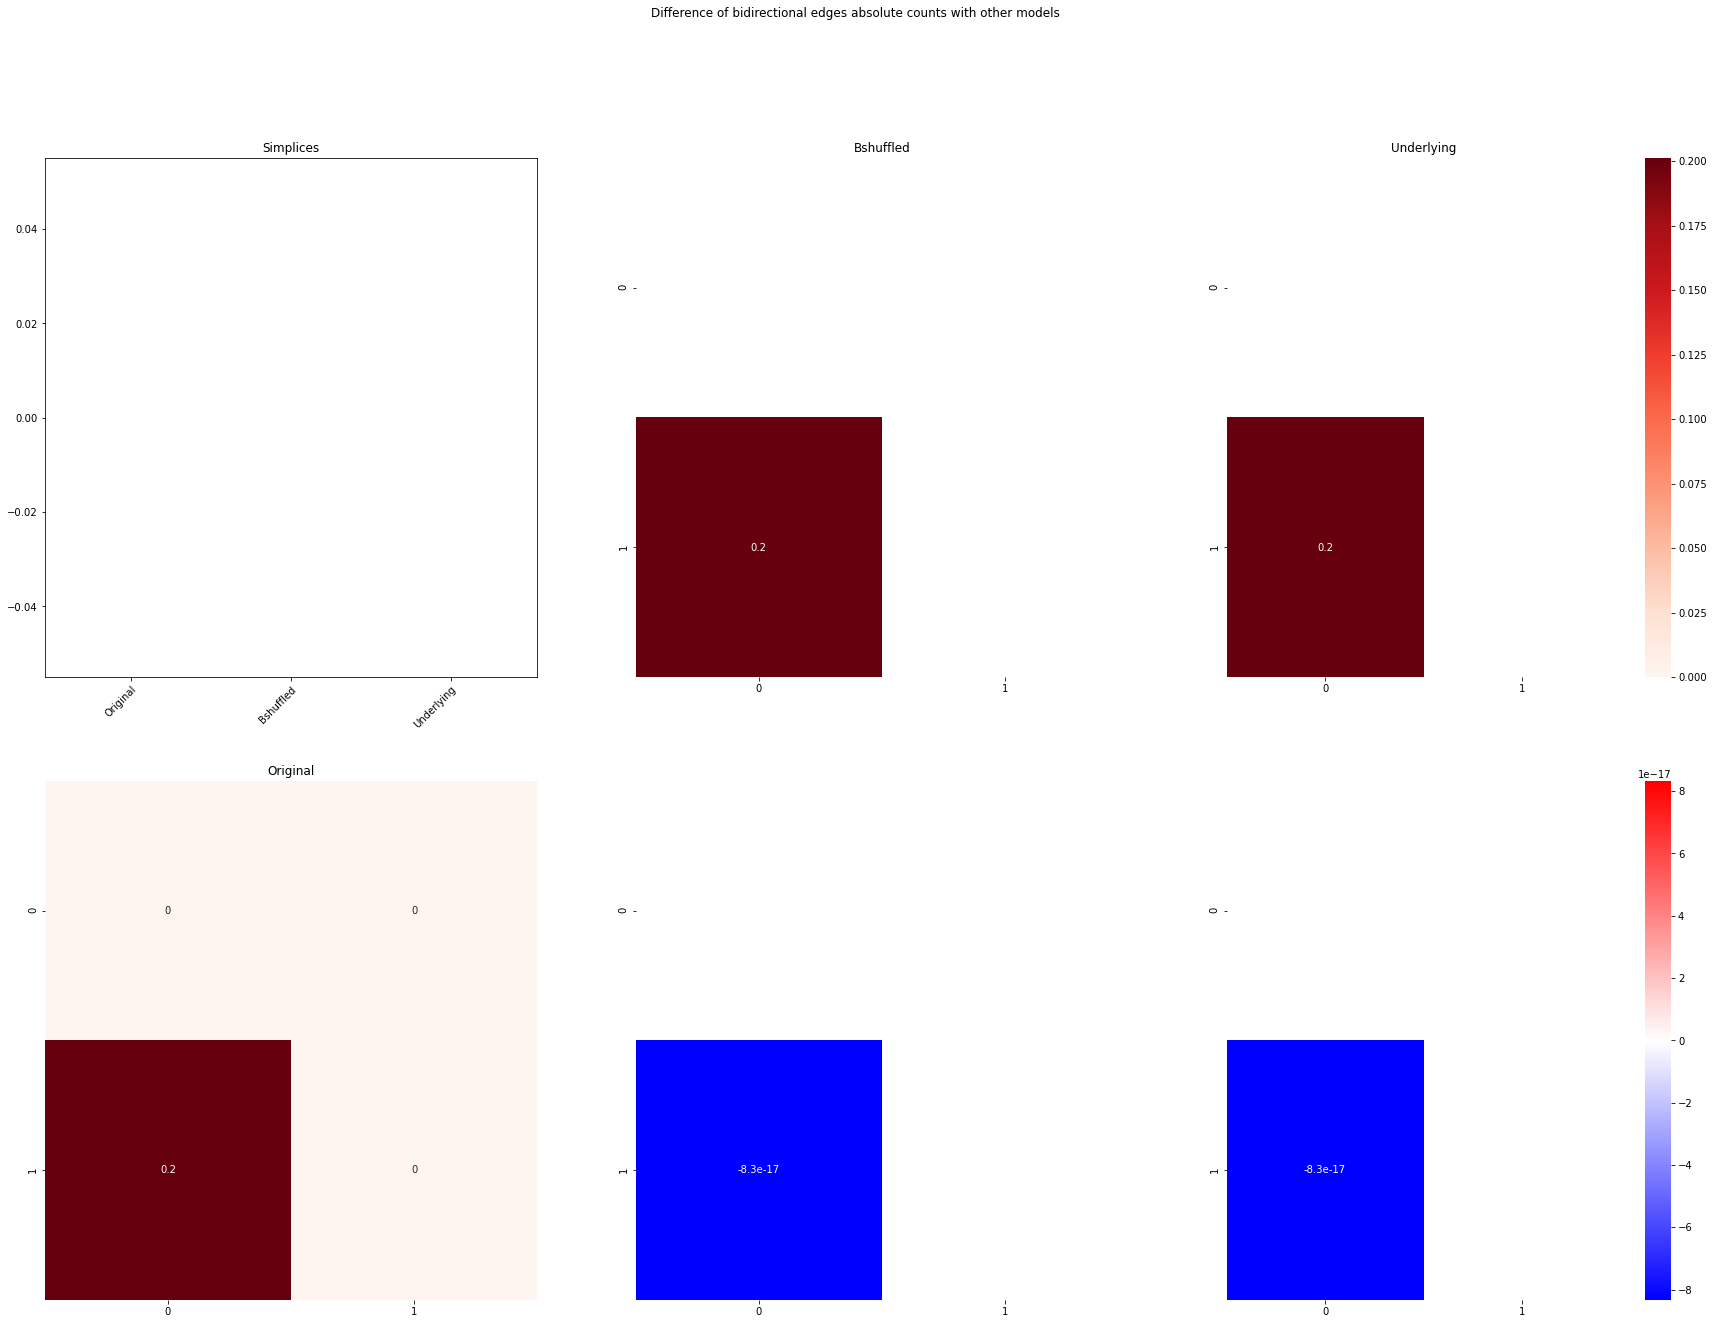

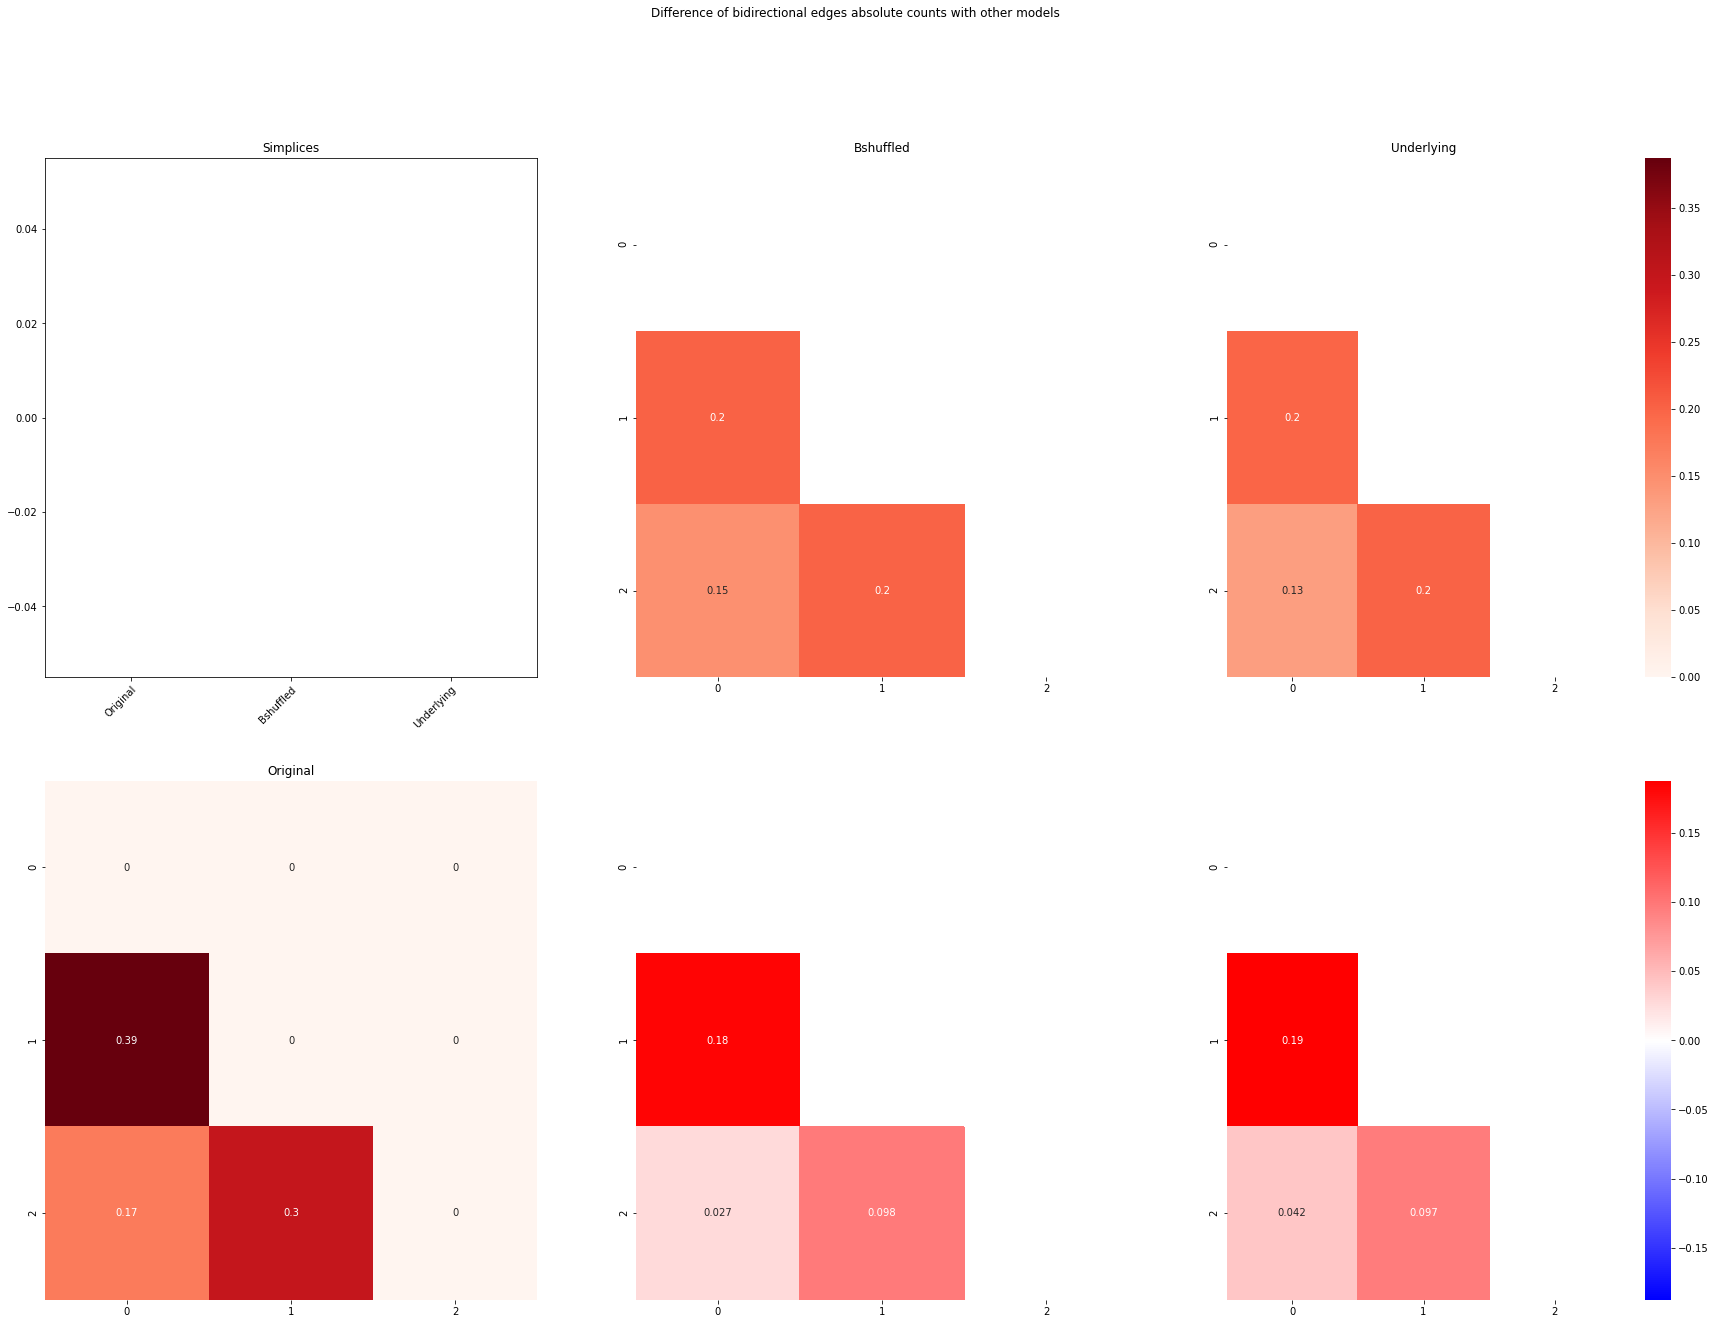

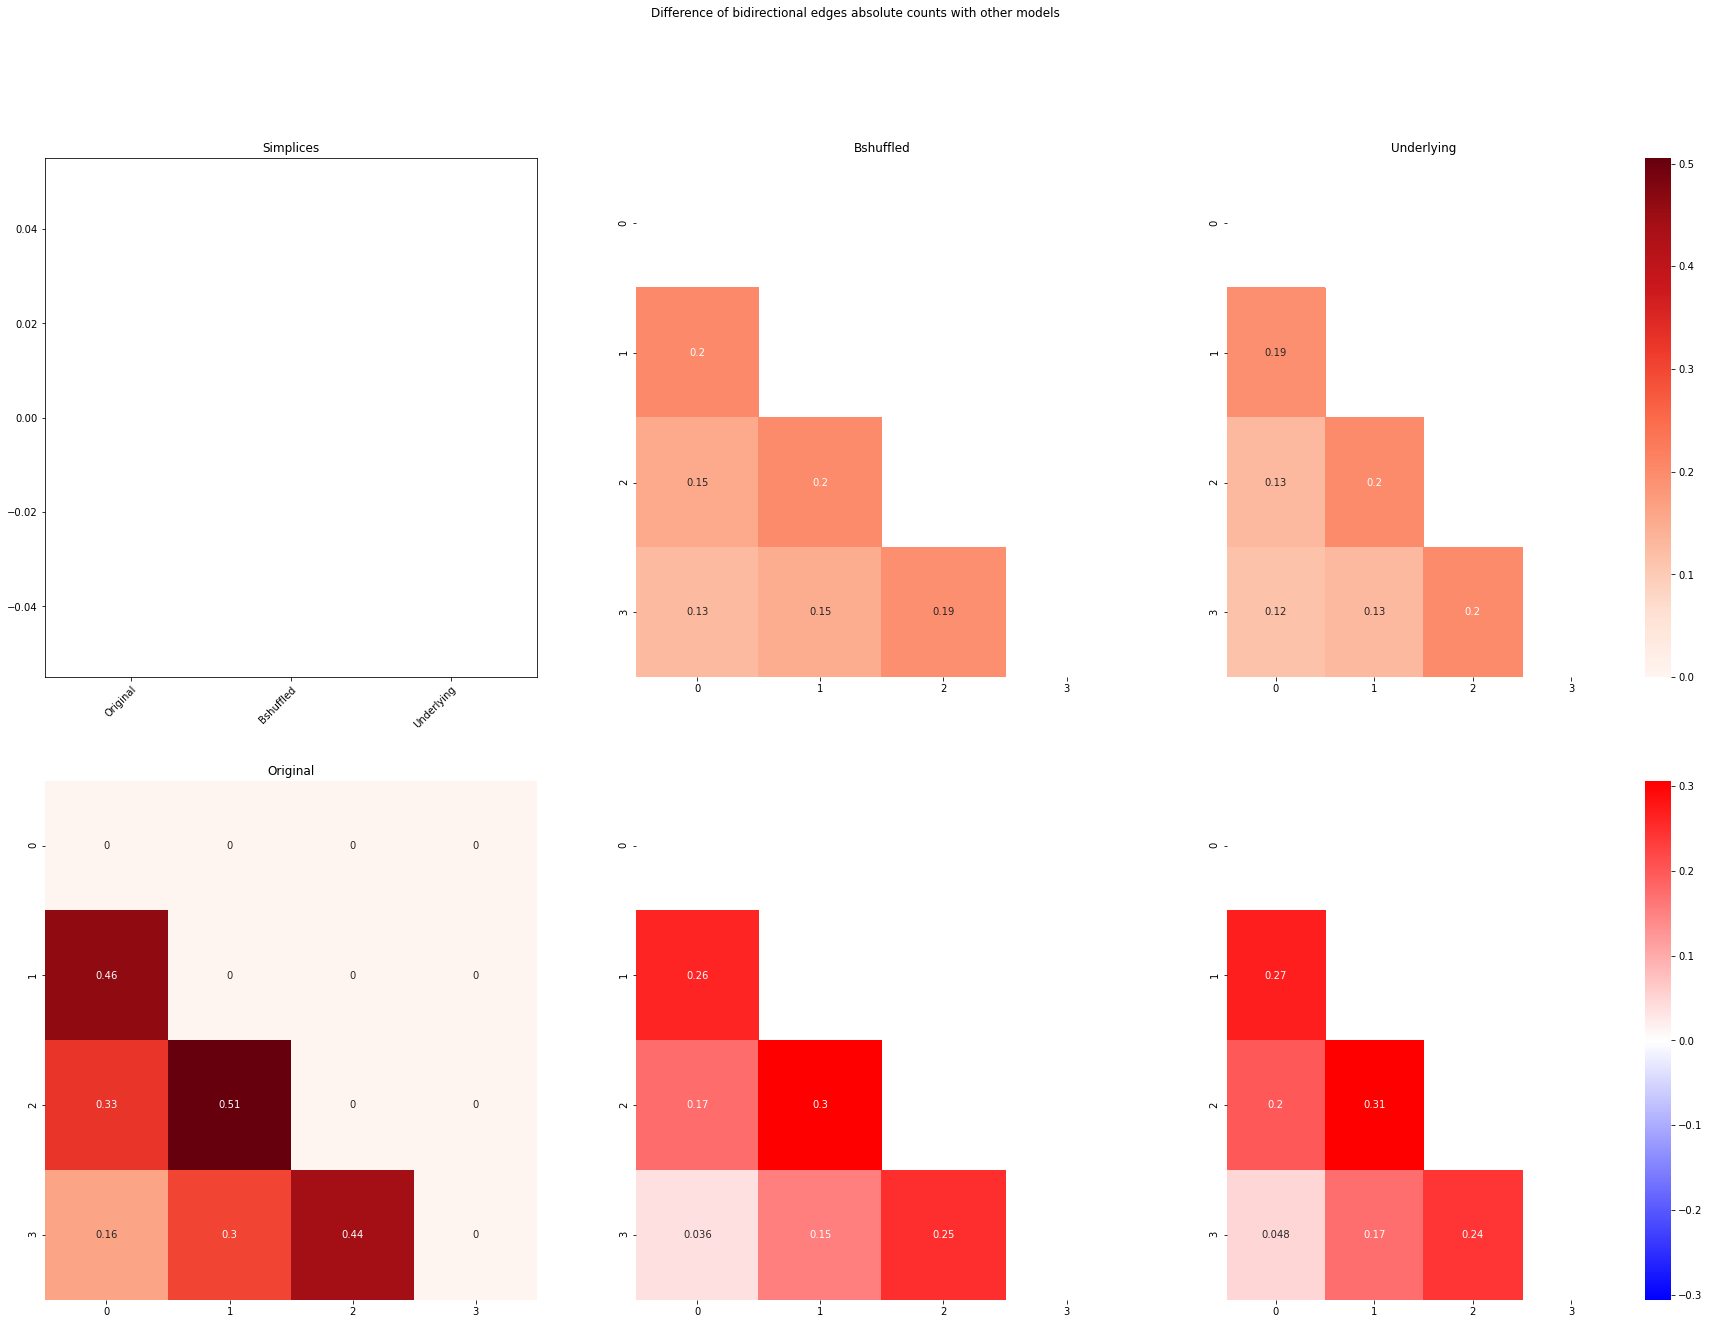

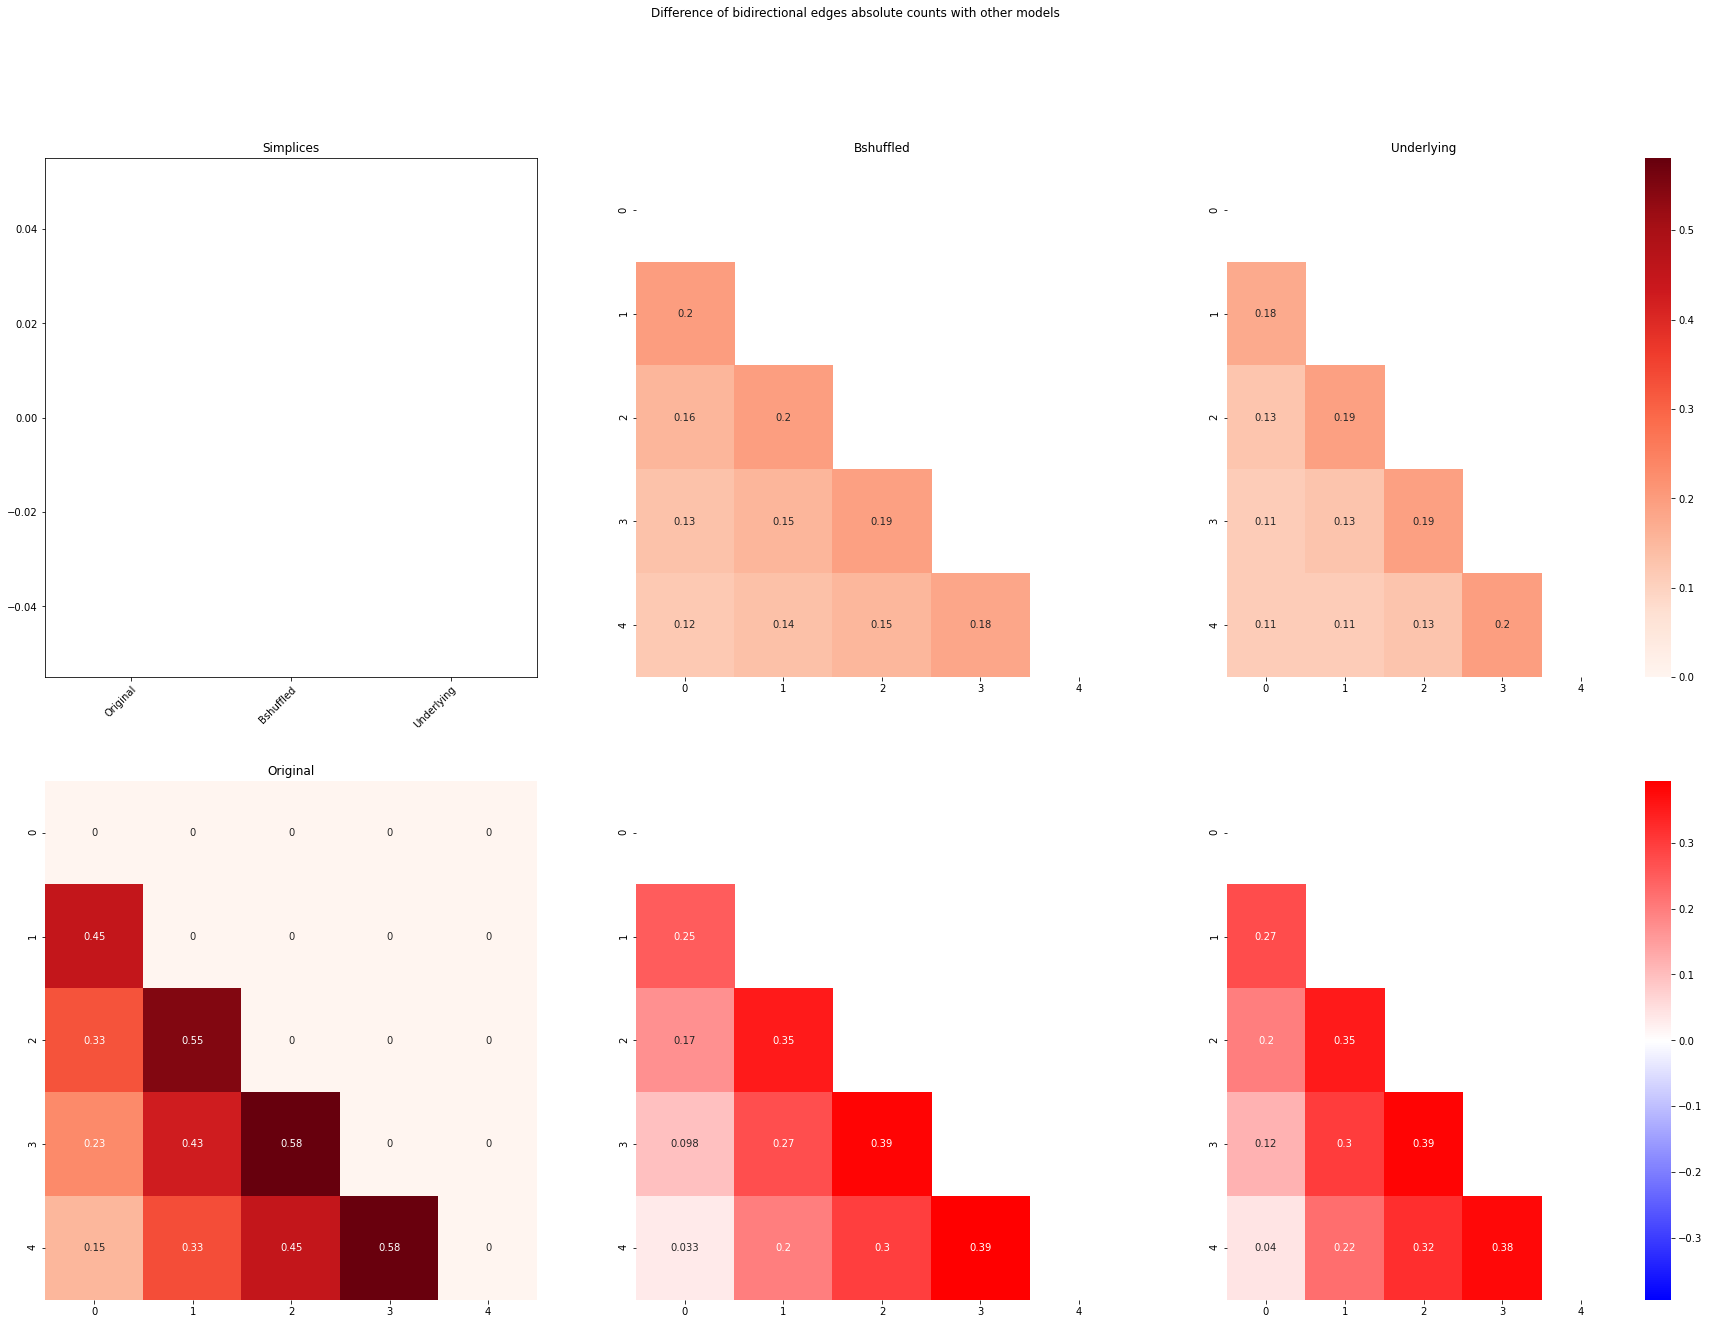

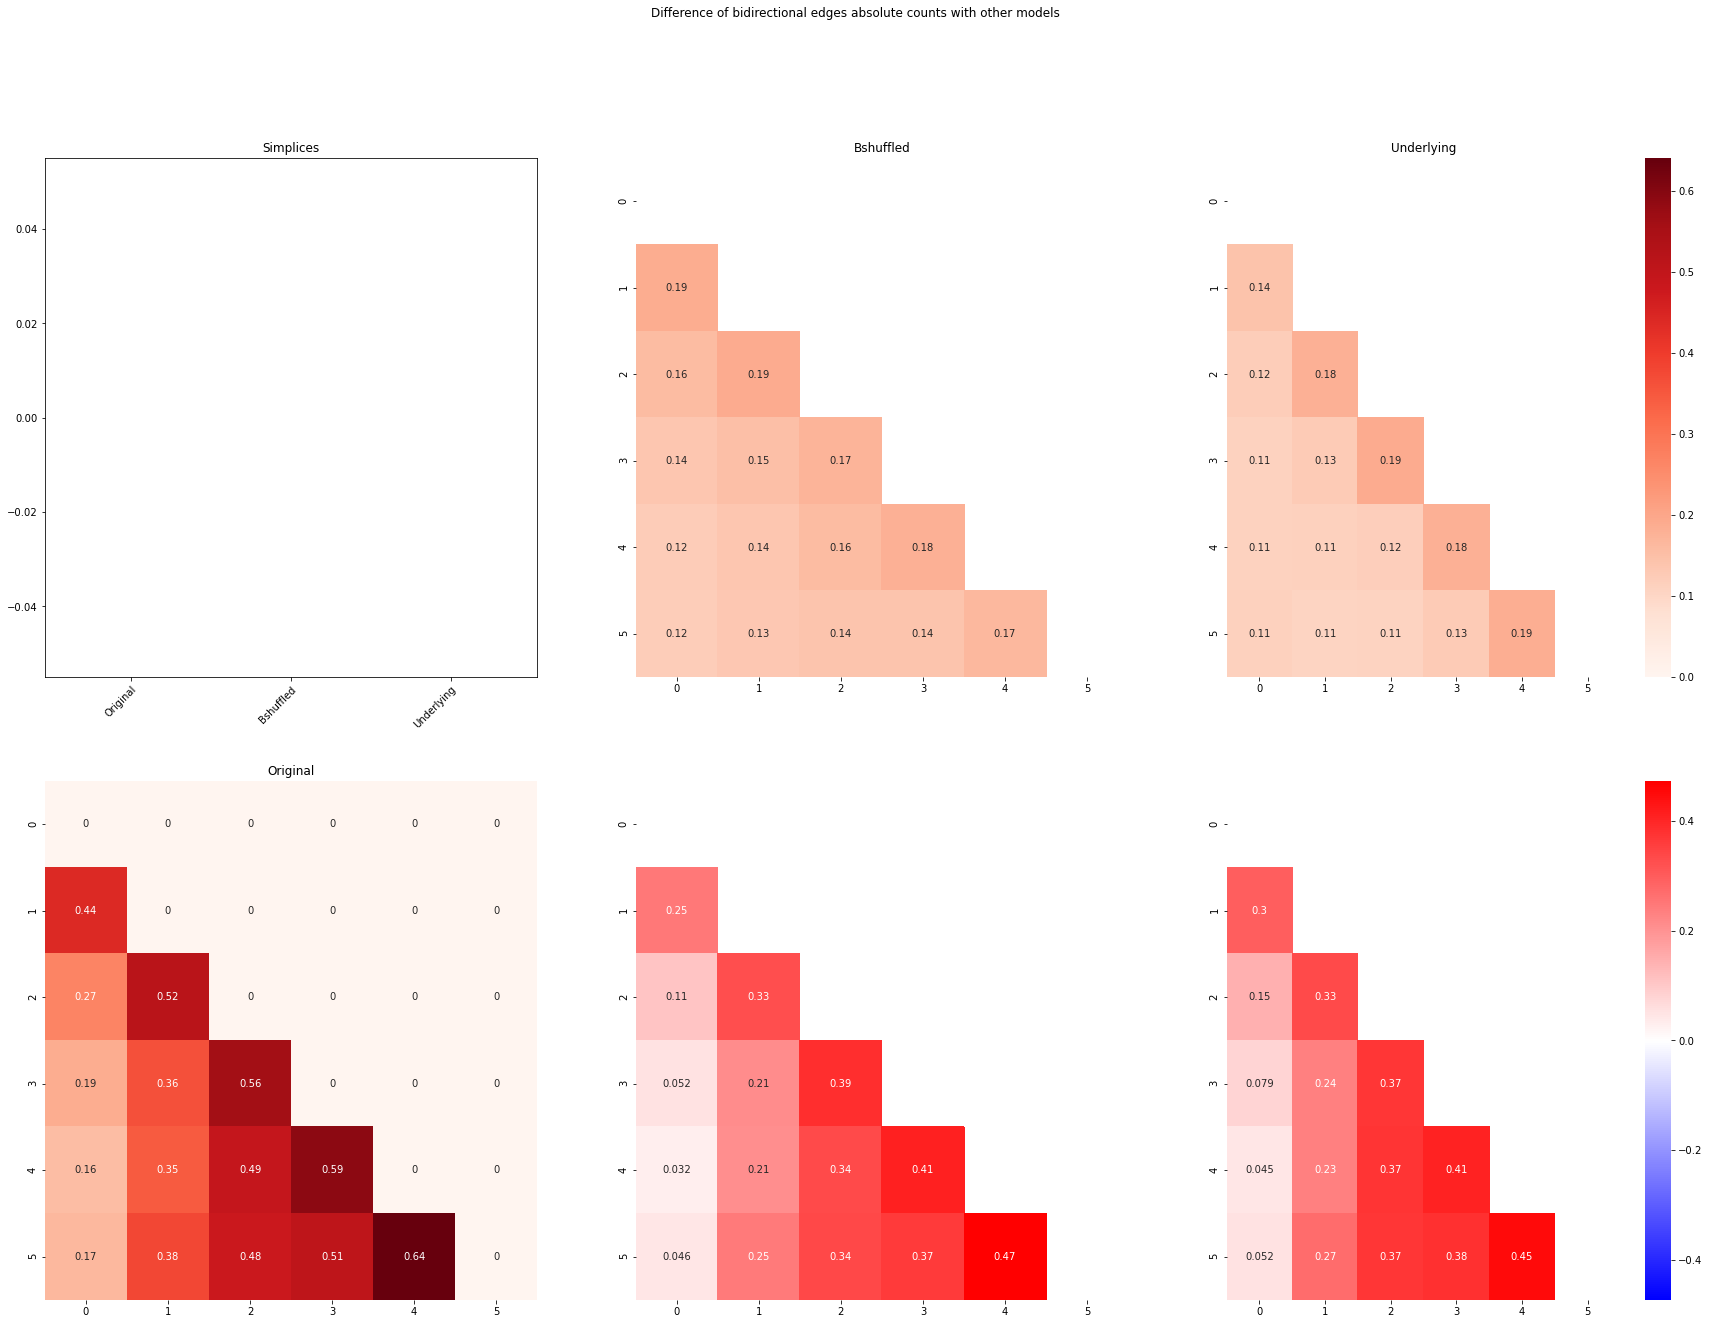

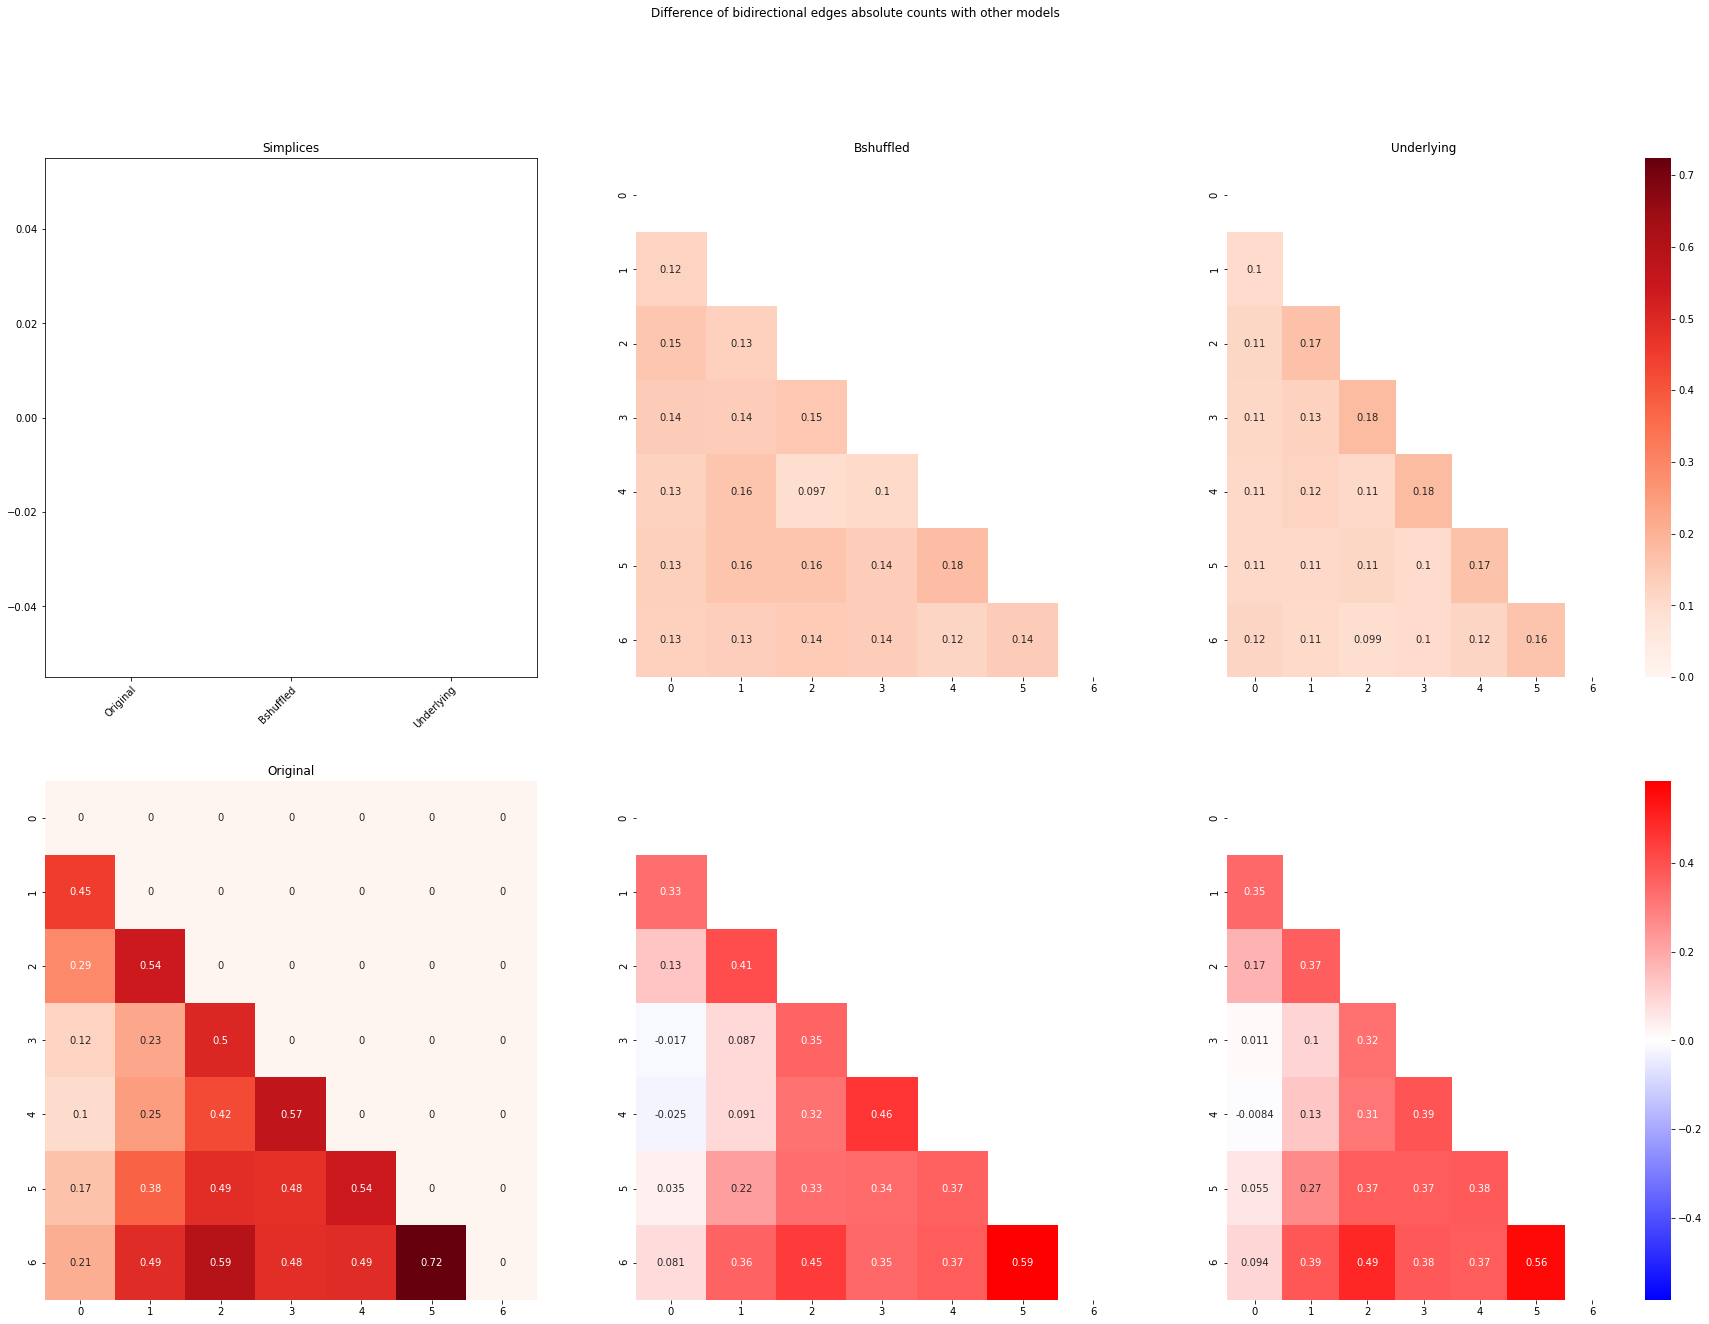

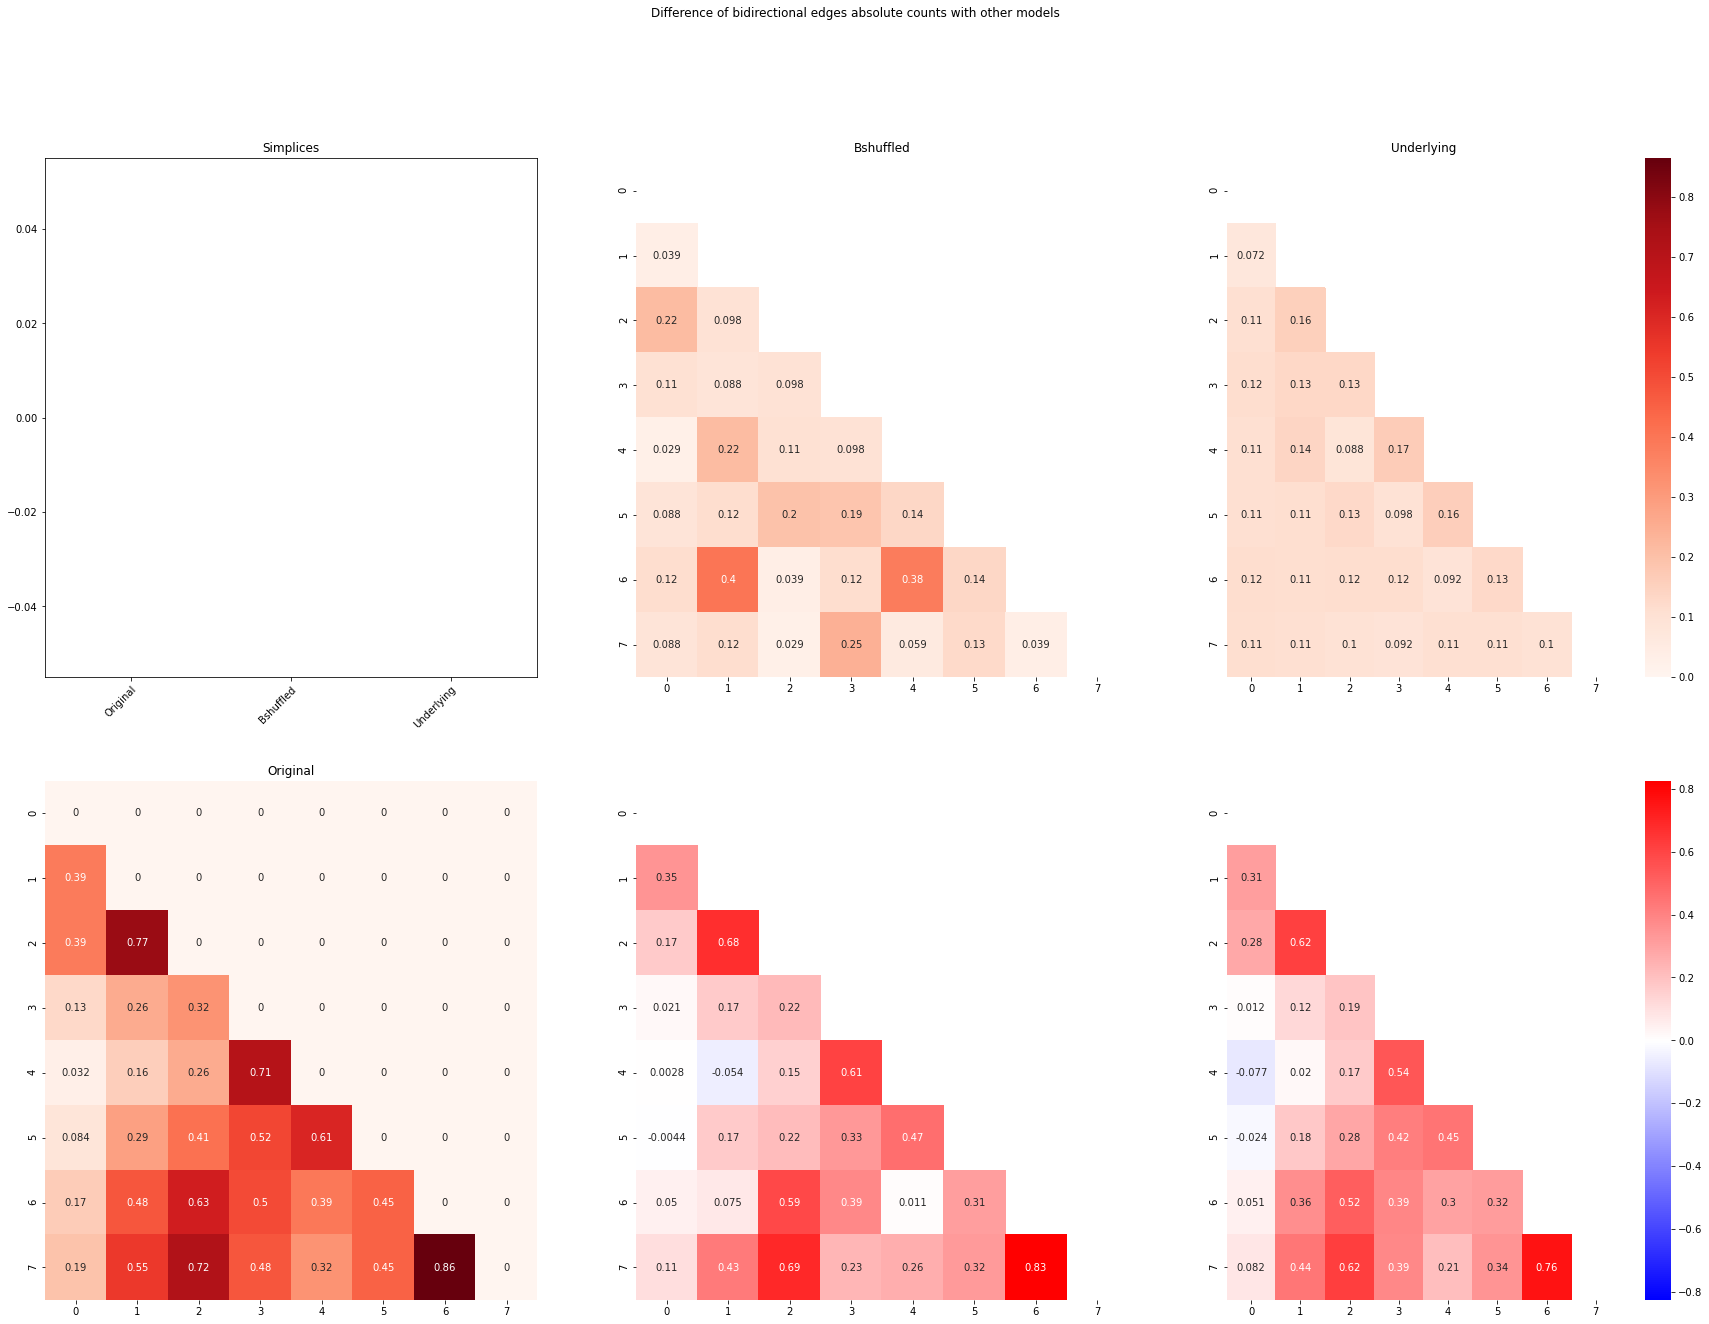

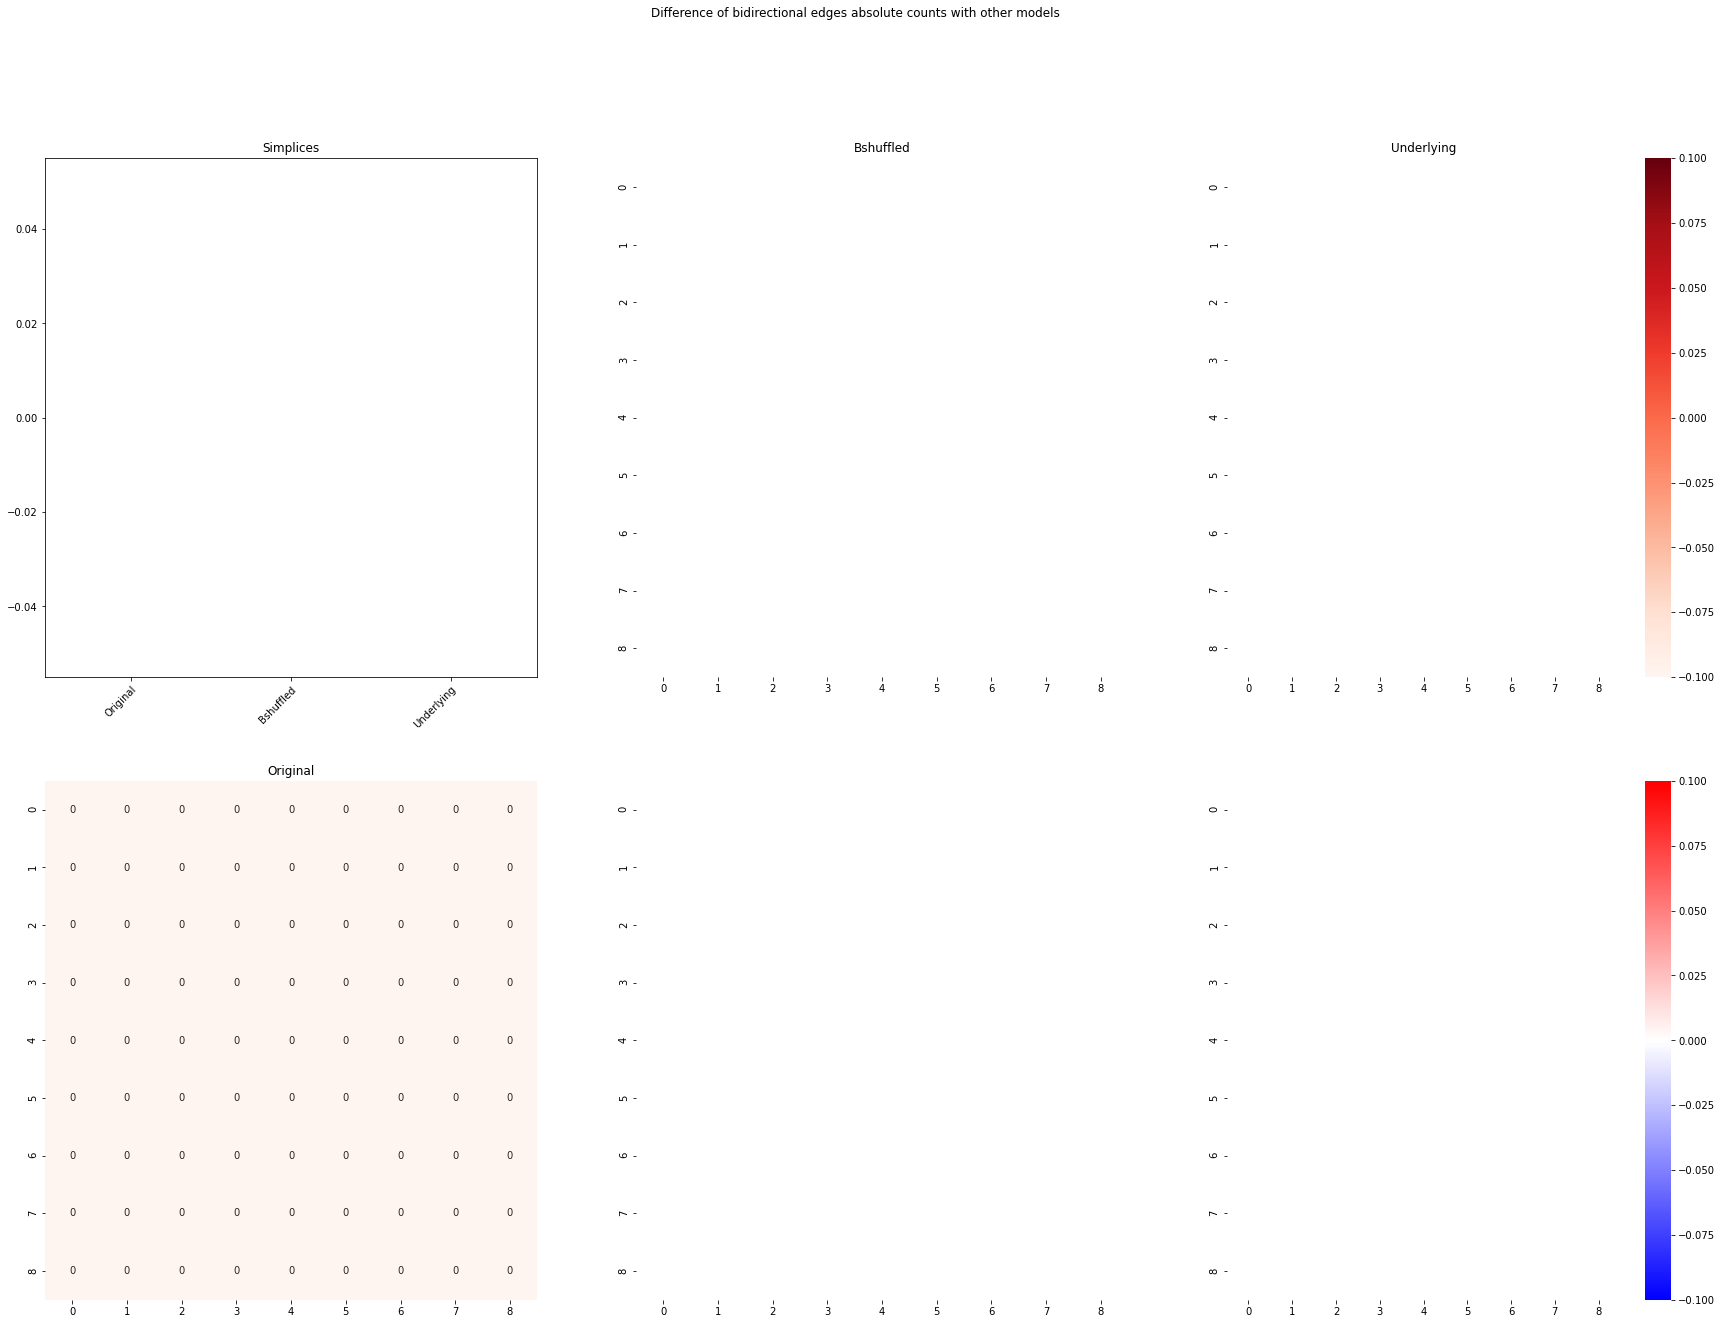

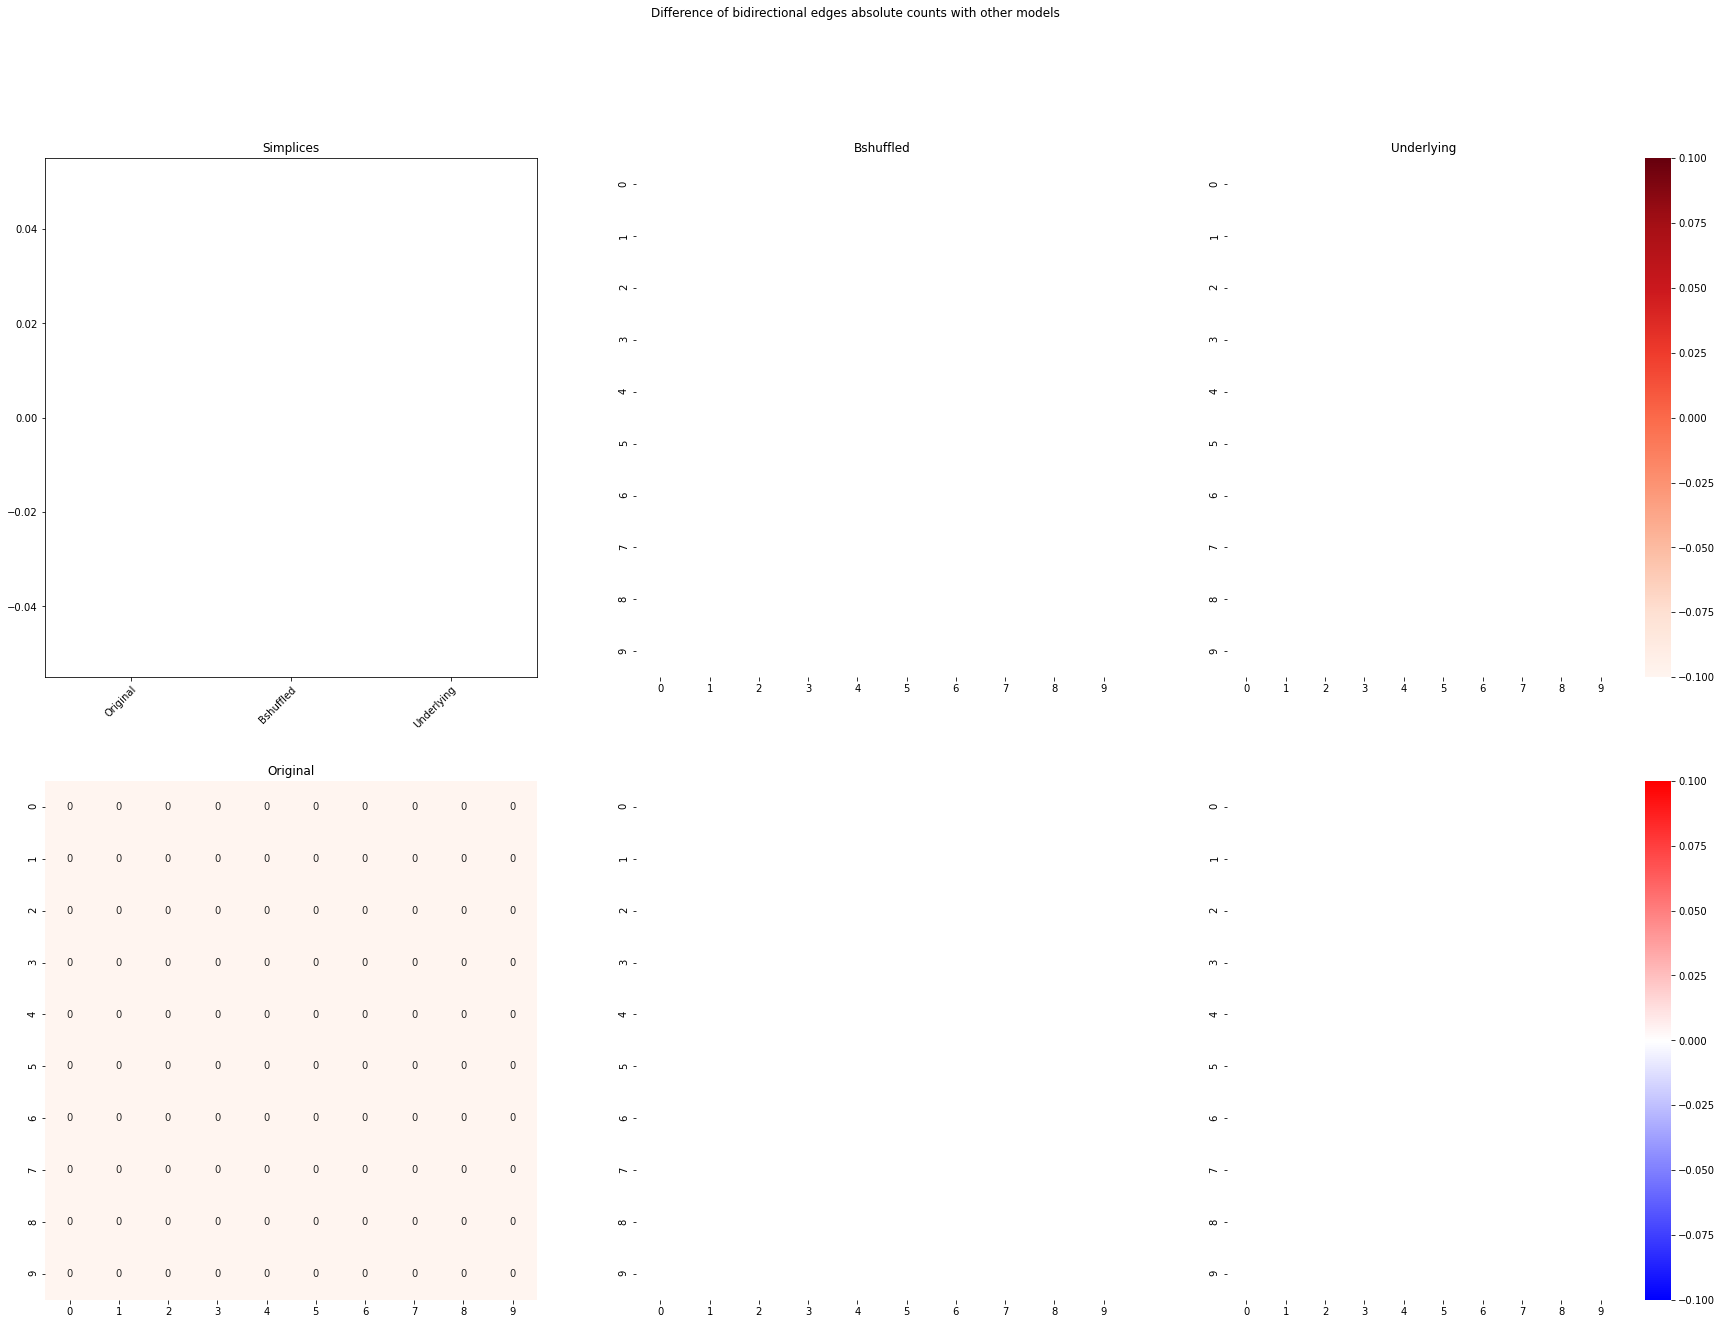

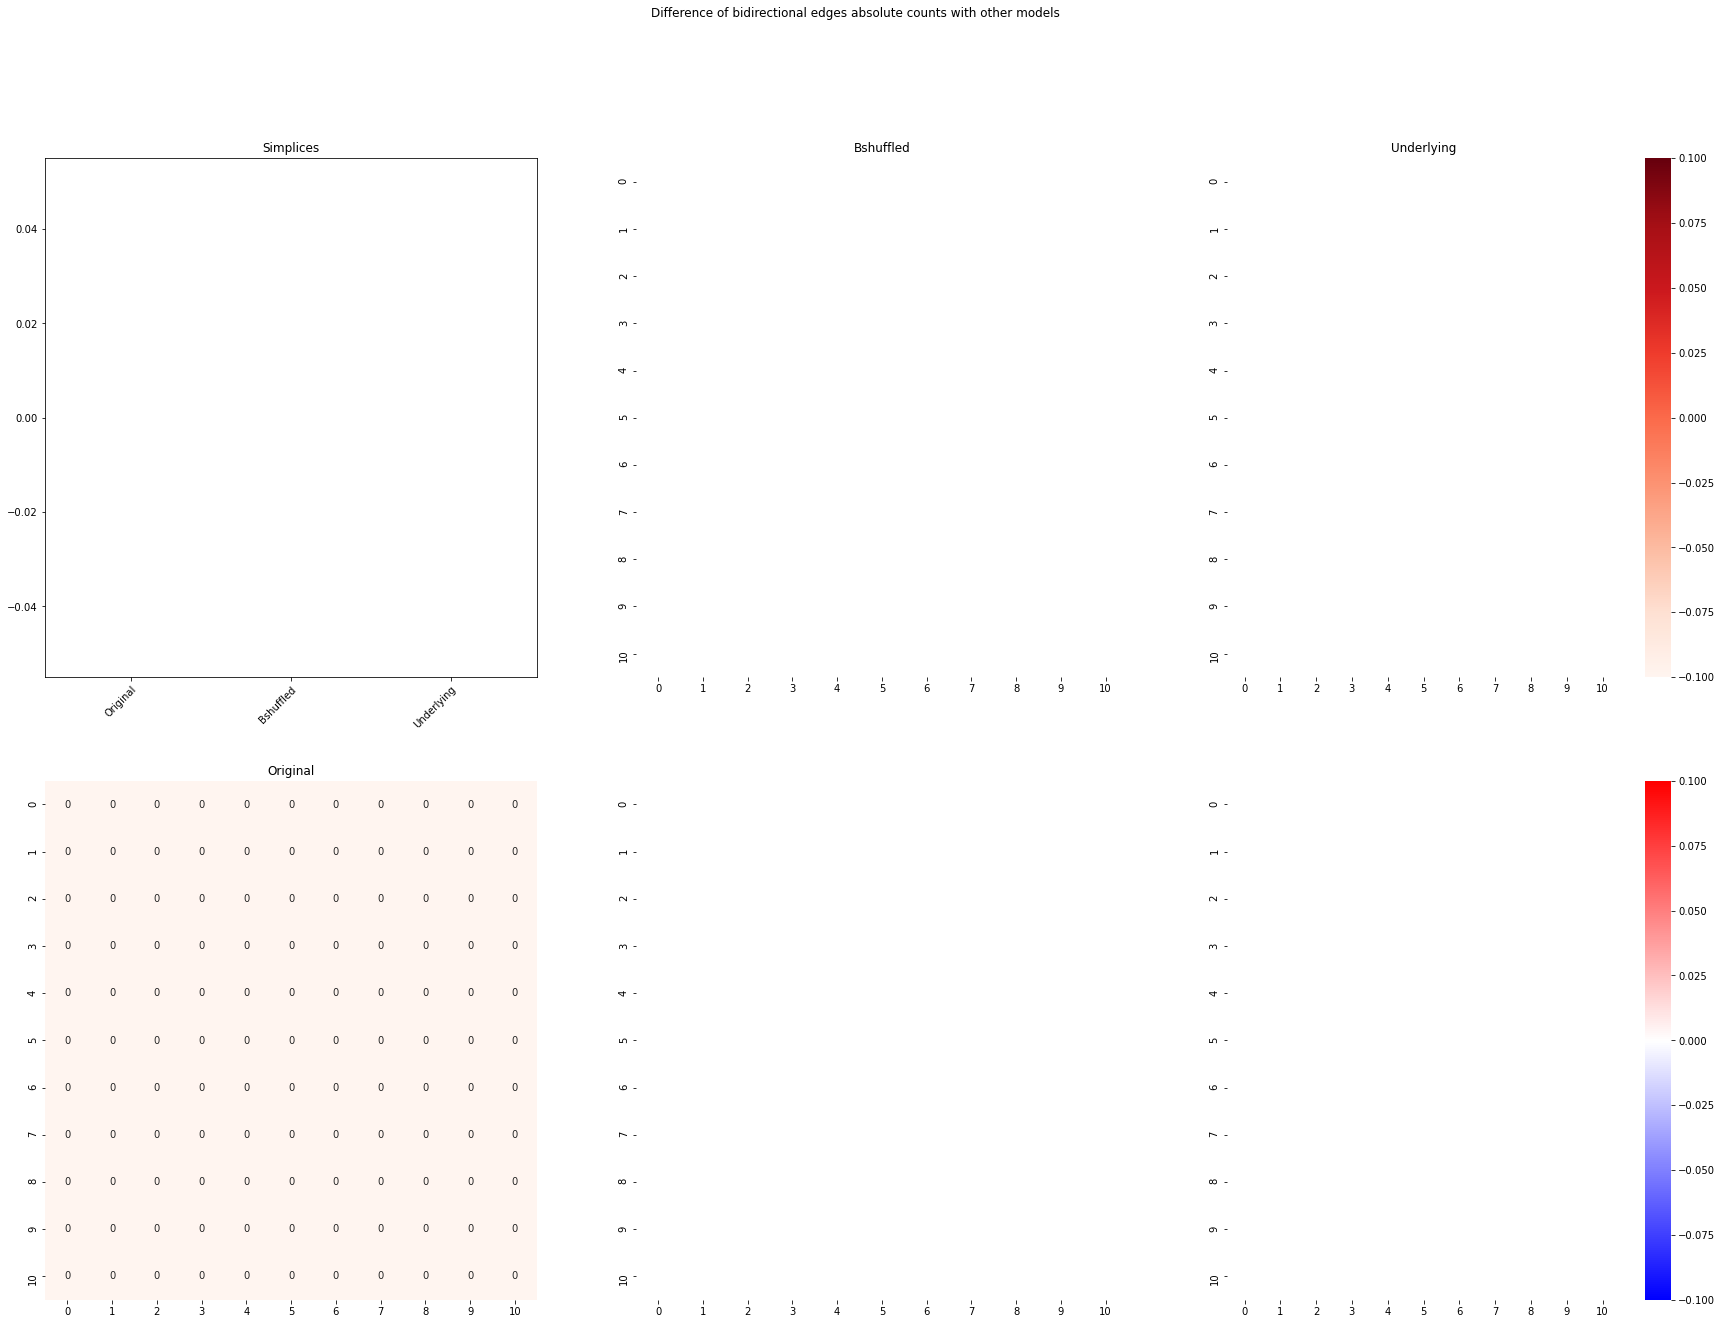

In [21]:
compare_graphs_diff([a,b,c], 1, "worm_bcounts_norm_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

## Maximal

In [22]:
a = pickle.load(open(Path("data/worm/full/mbcounts.pkl"),'rb'))
for key in a.keys():
    a[key] = normalized_transform(a[key])[0]
b = get_average_bcounts(Path("data/worm_control/bishuffled/"), transform = normalized_transform, maximal = True)
c = get_average_bcounts(Path("data/worm_control/underlying/"), transform = normalized_transform, maximal = True)

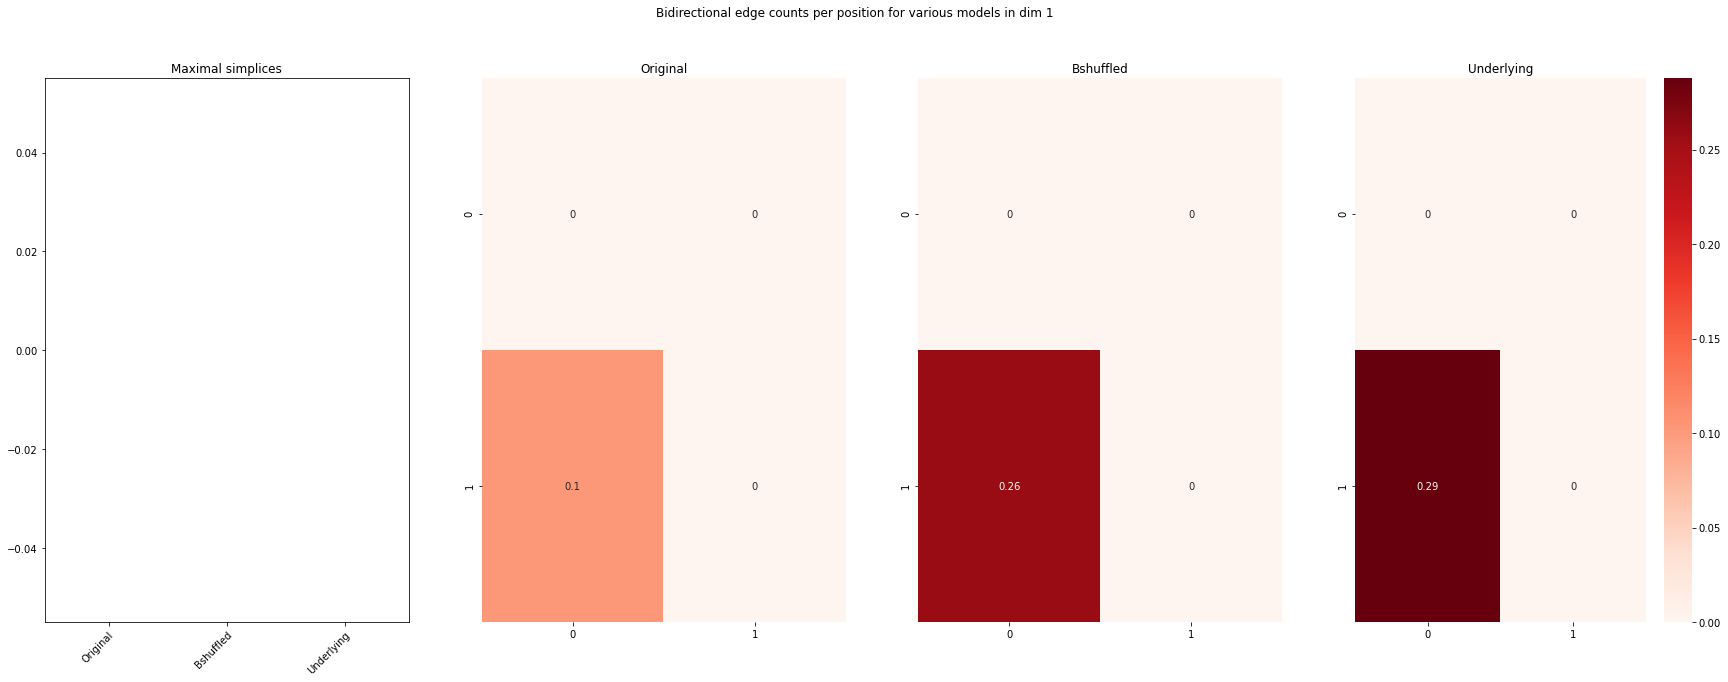

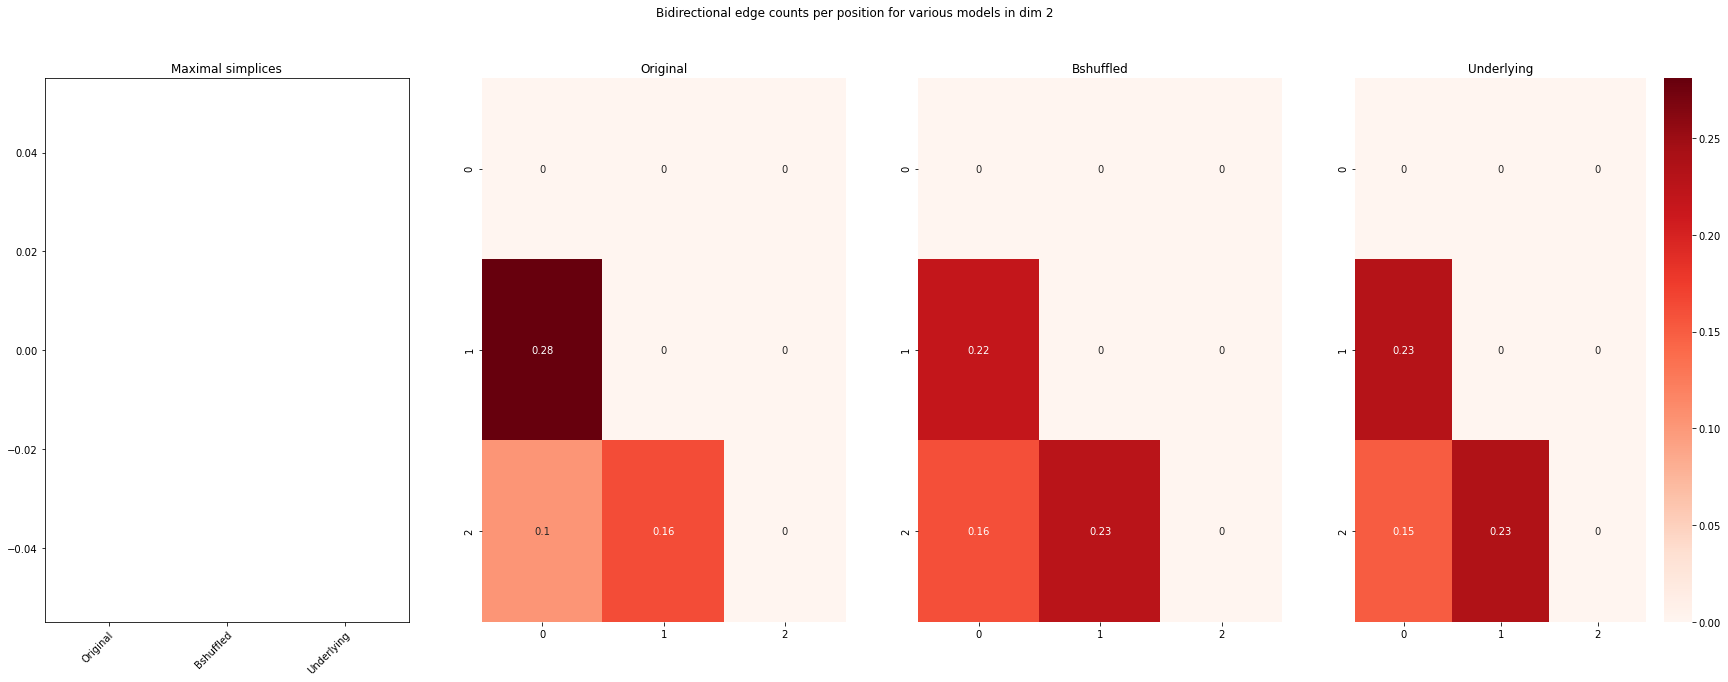

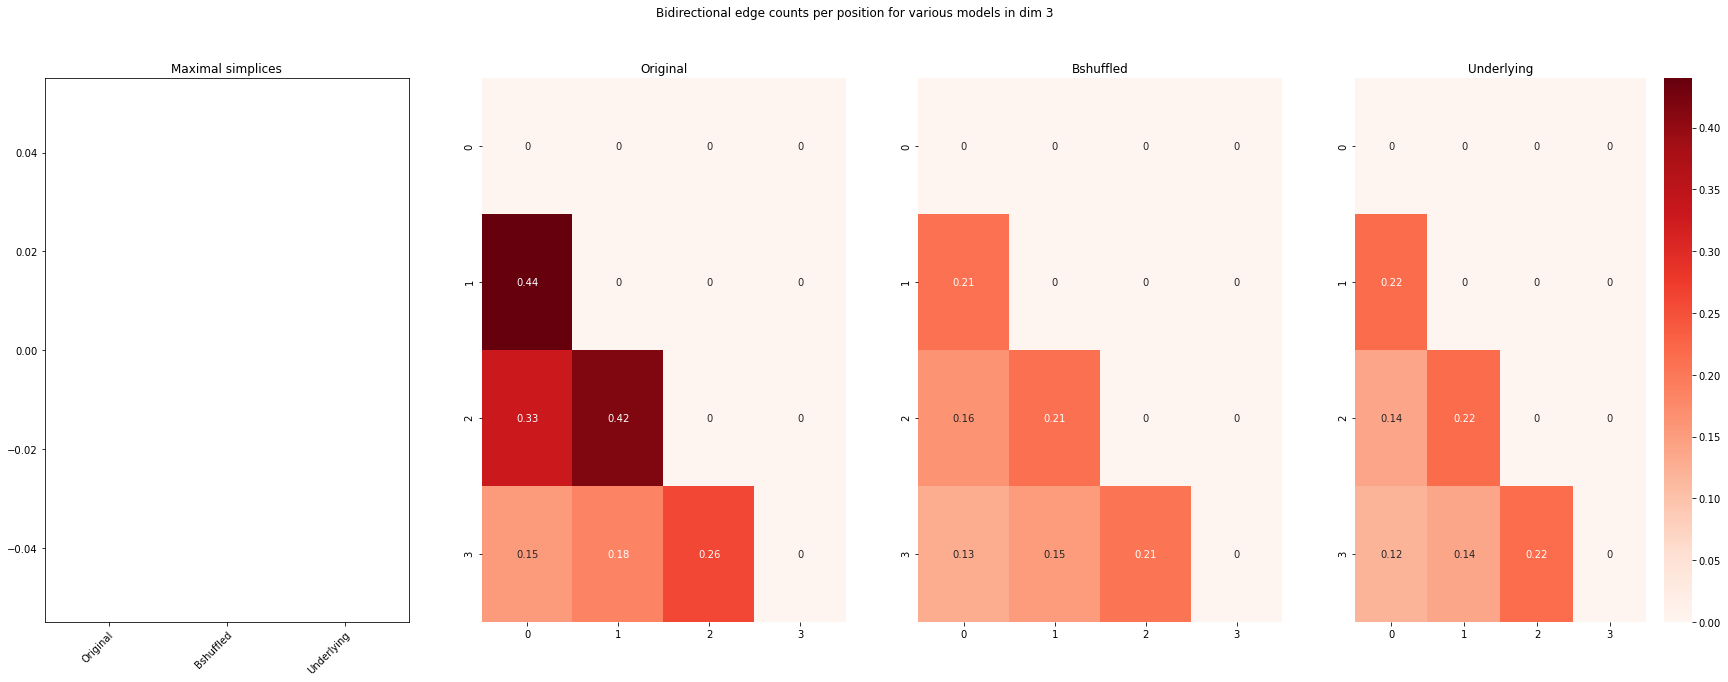

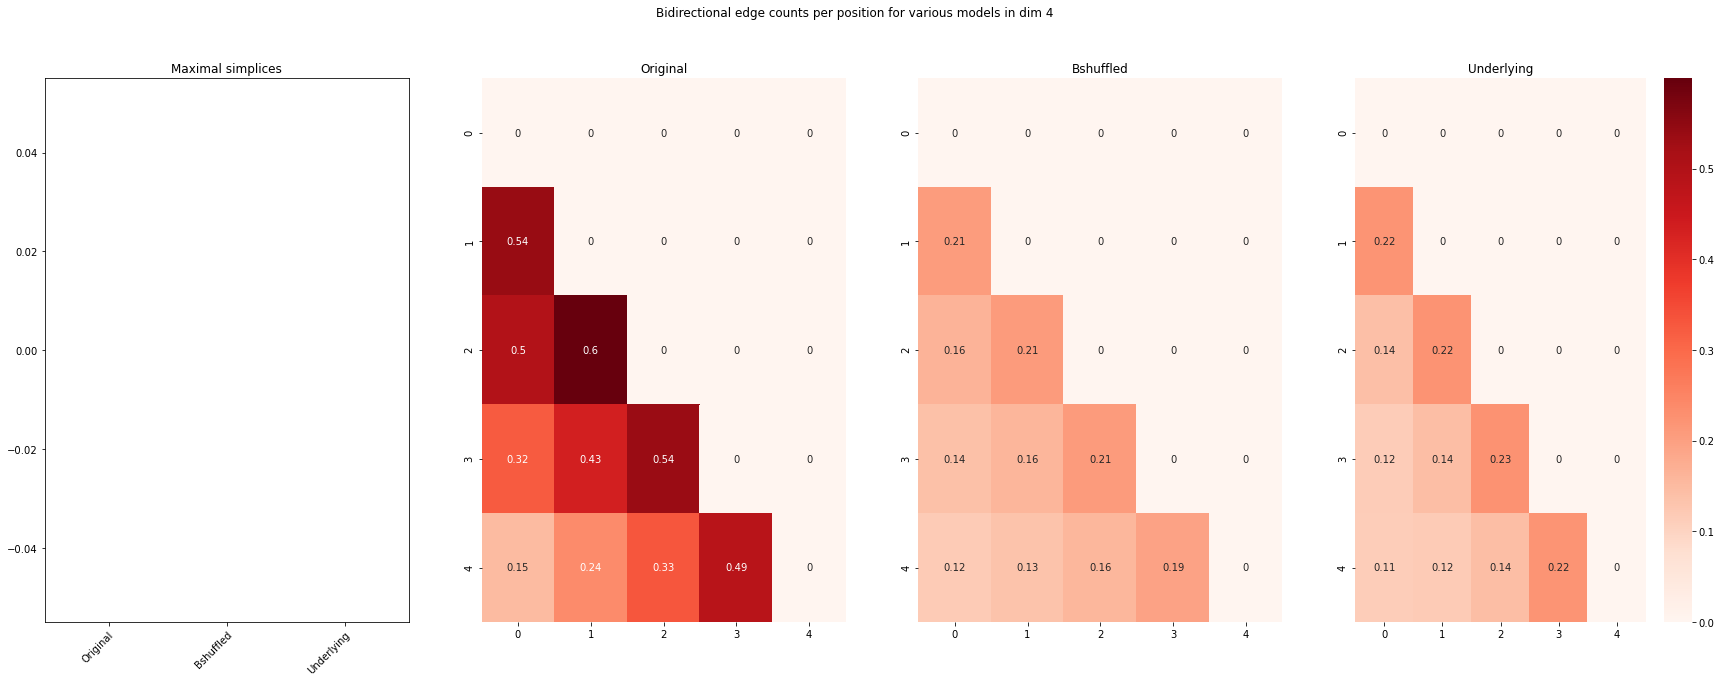

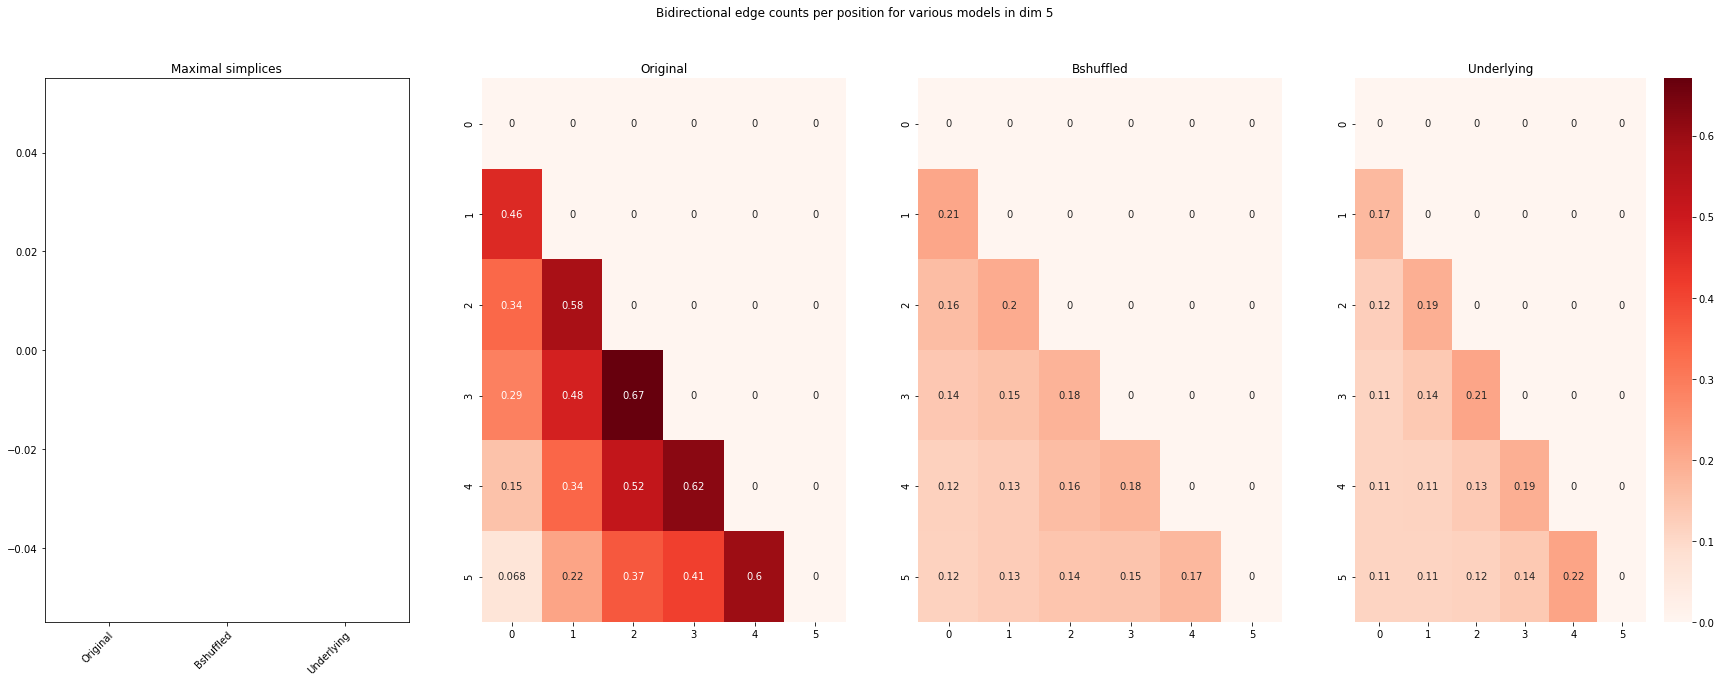

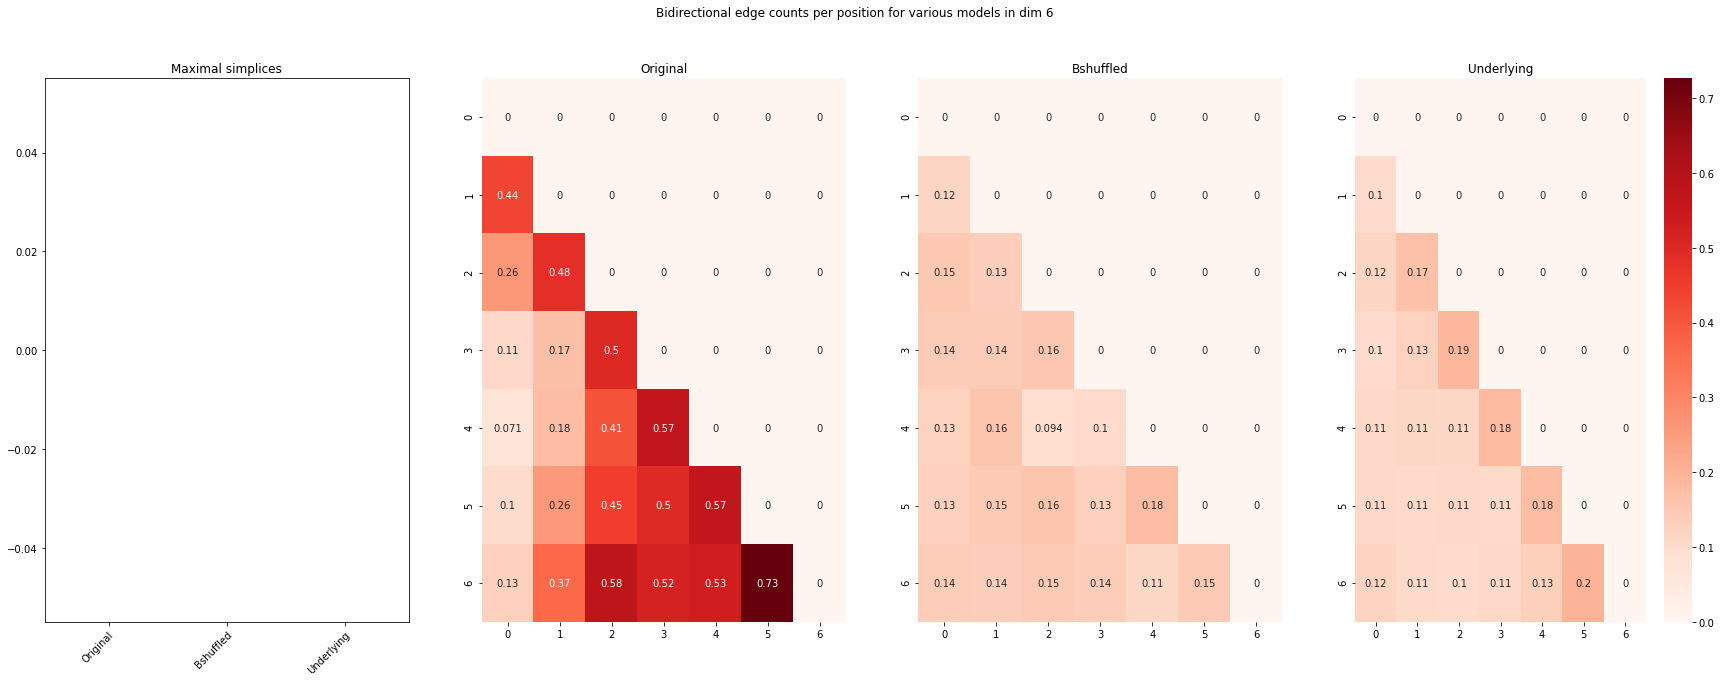

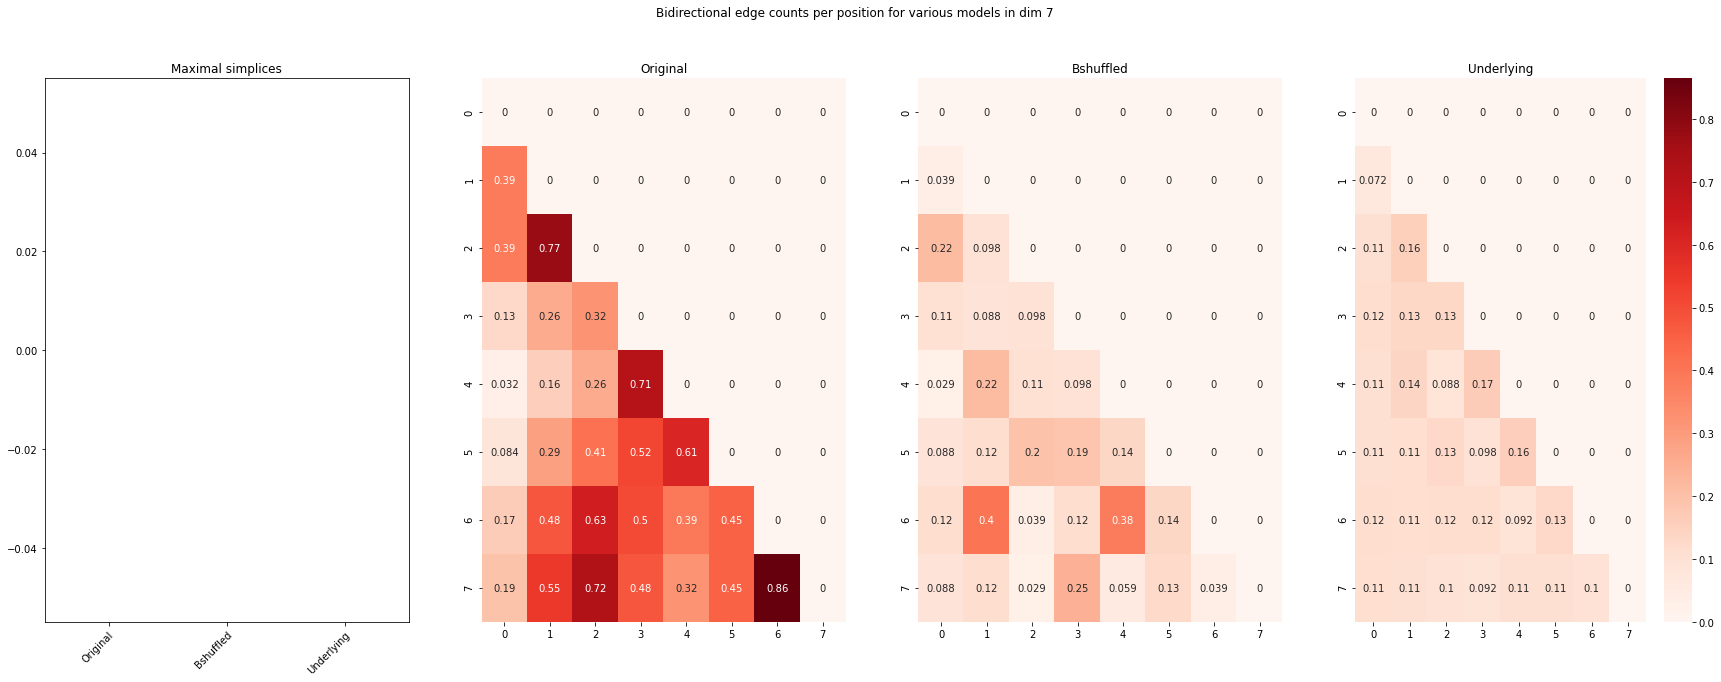

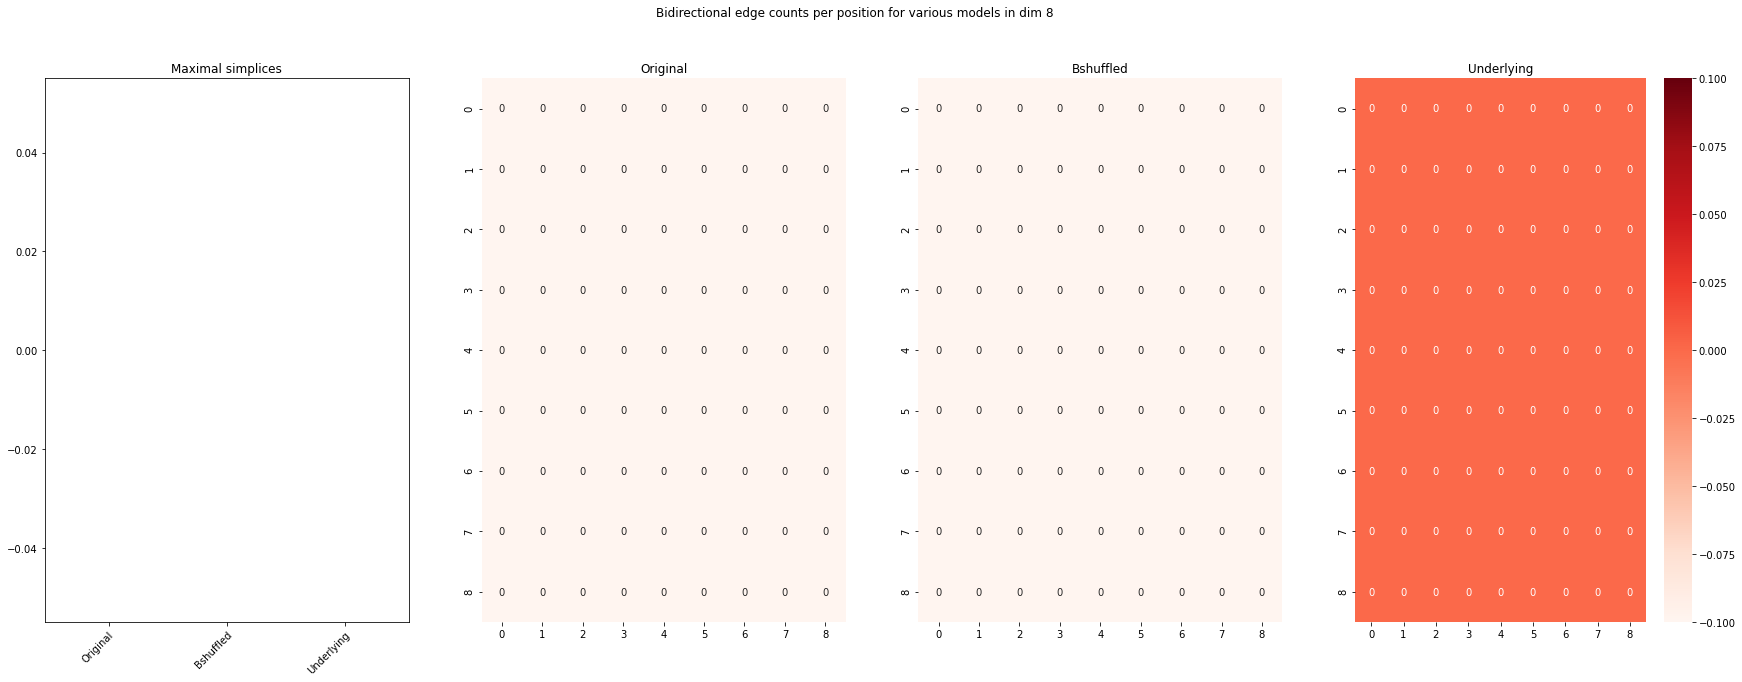

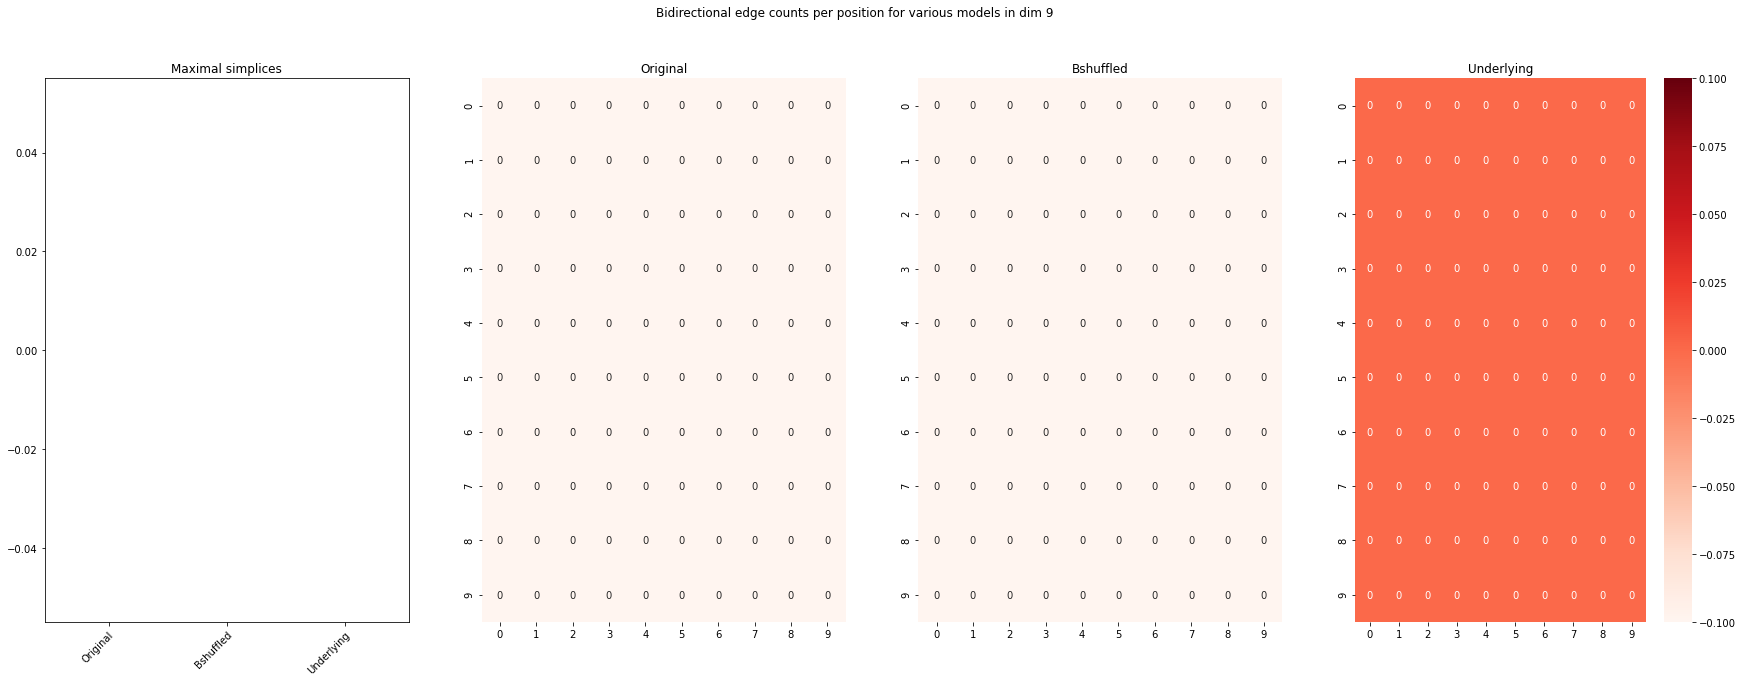

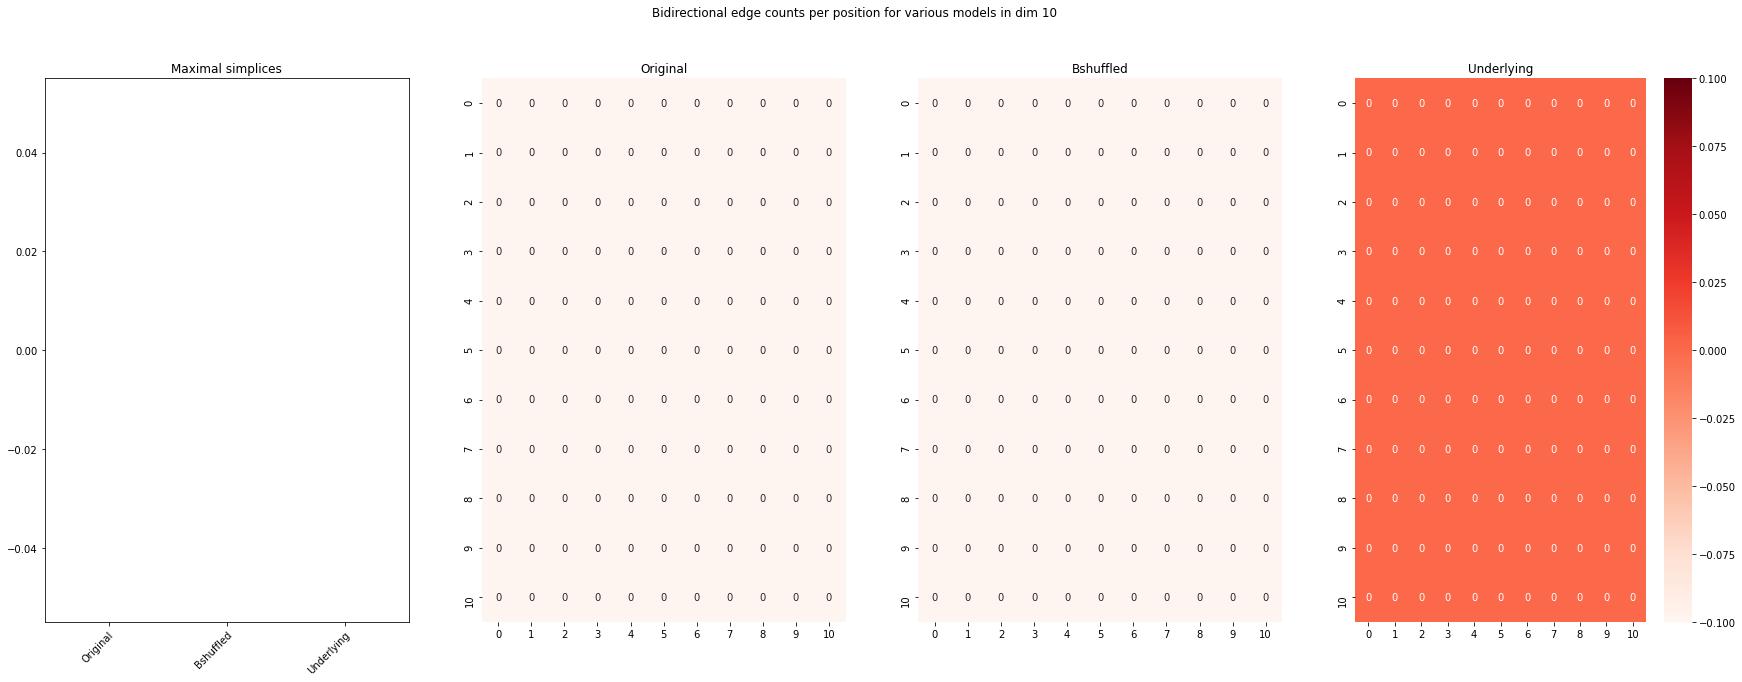

In [23]:
compare_graphs([a,b,c], 1, "worm_mbcounts_norm", title_list = ["Maximal simplices","Original", "Bshuffled", "Underlying"])

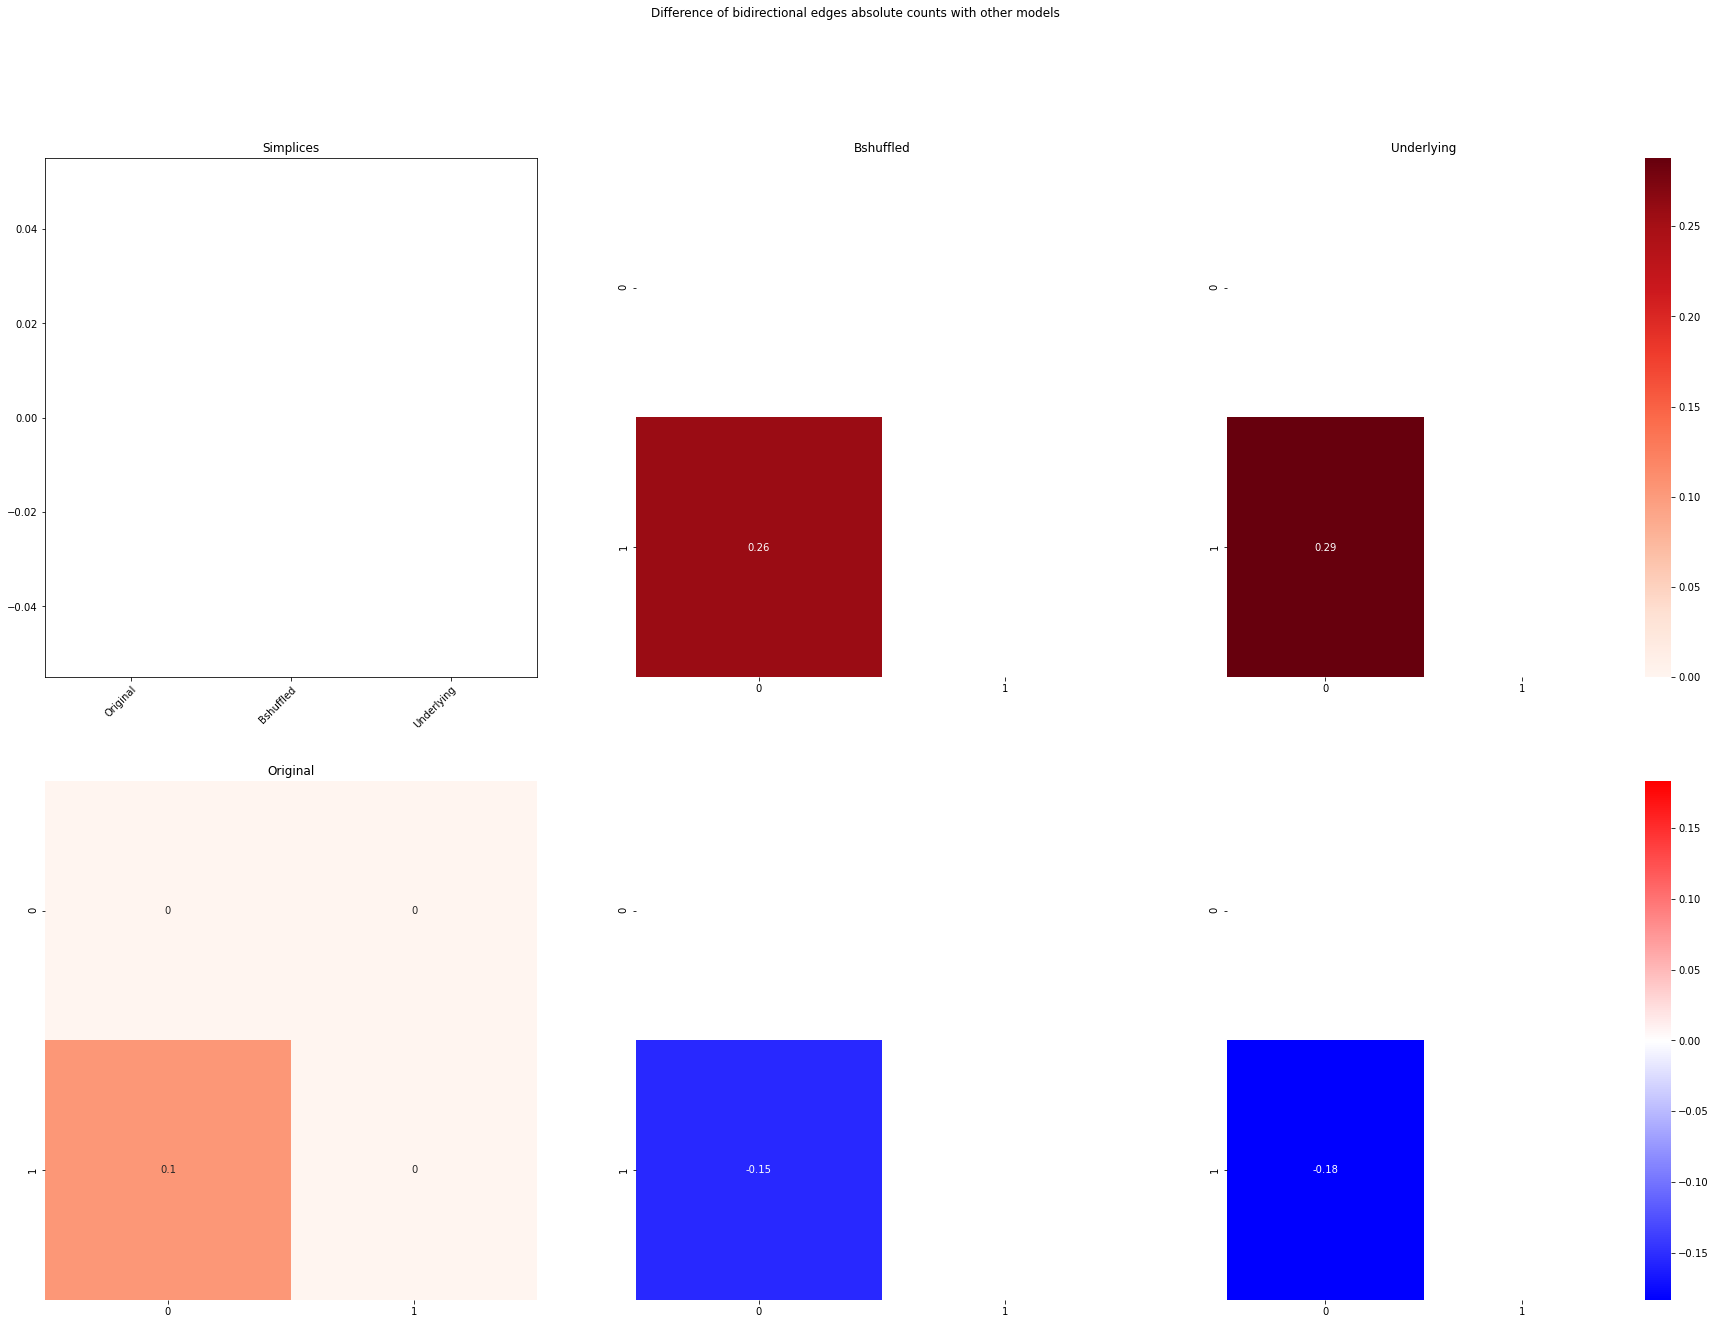

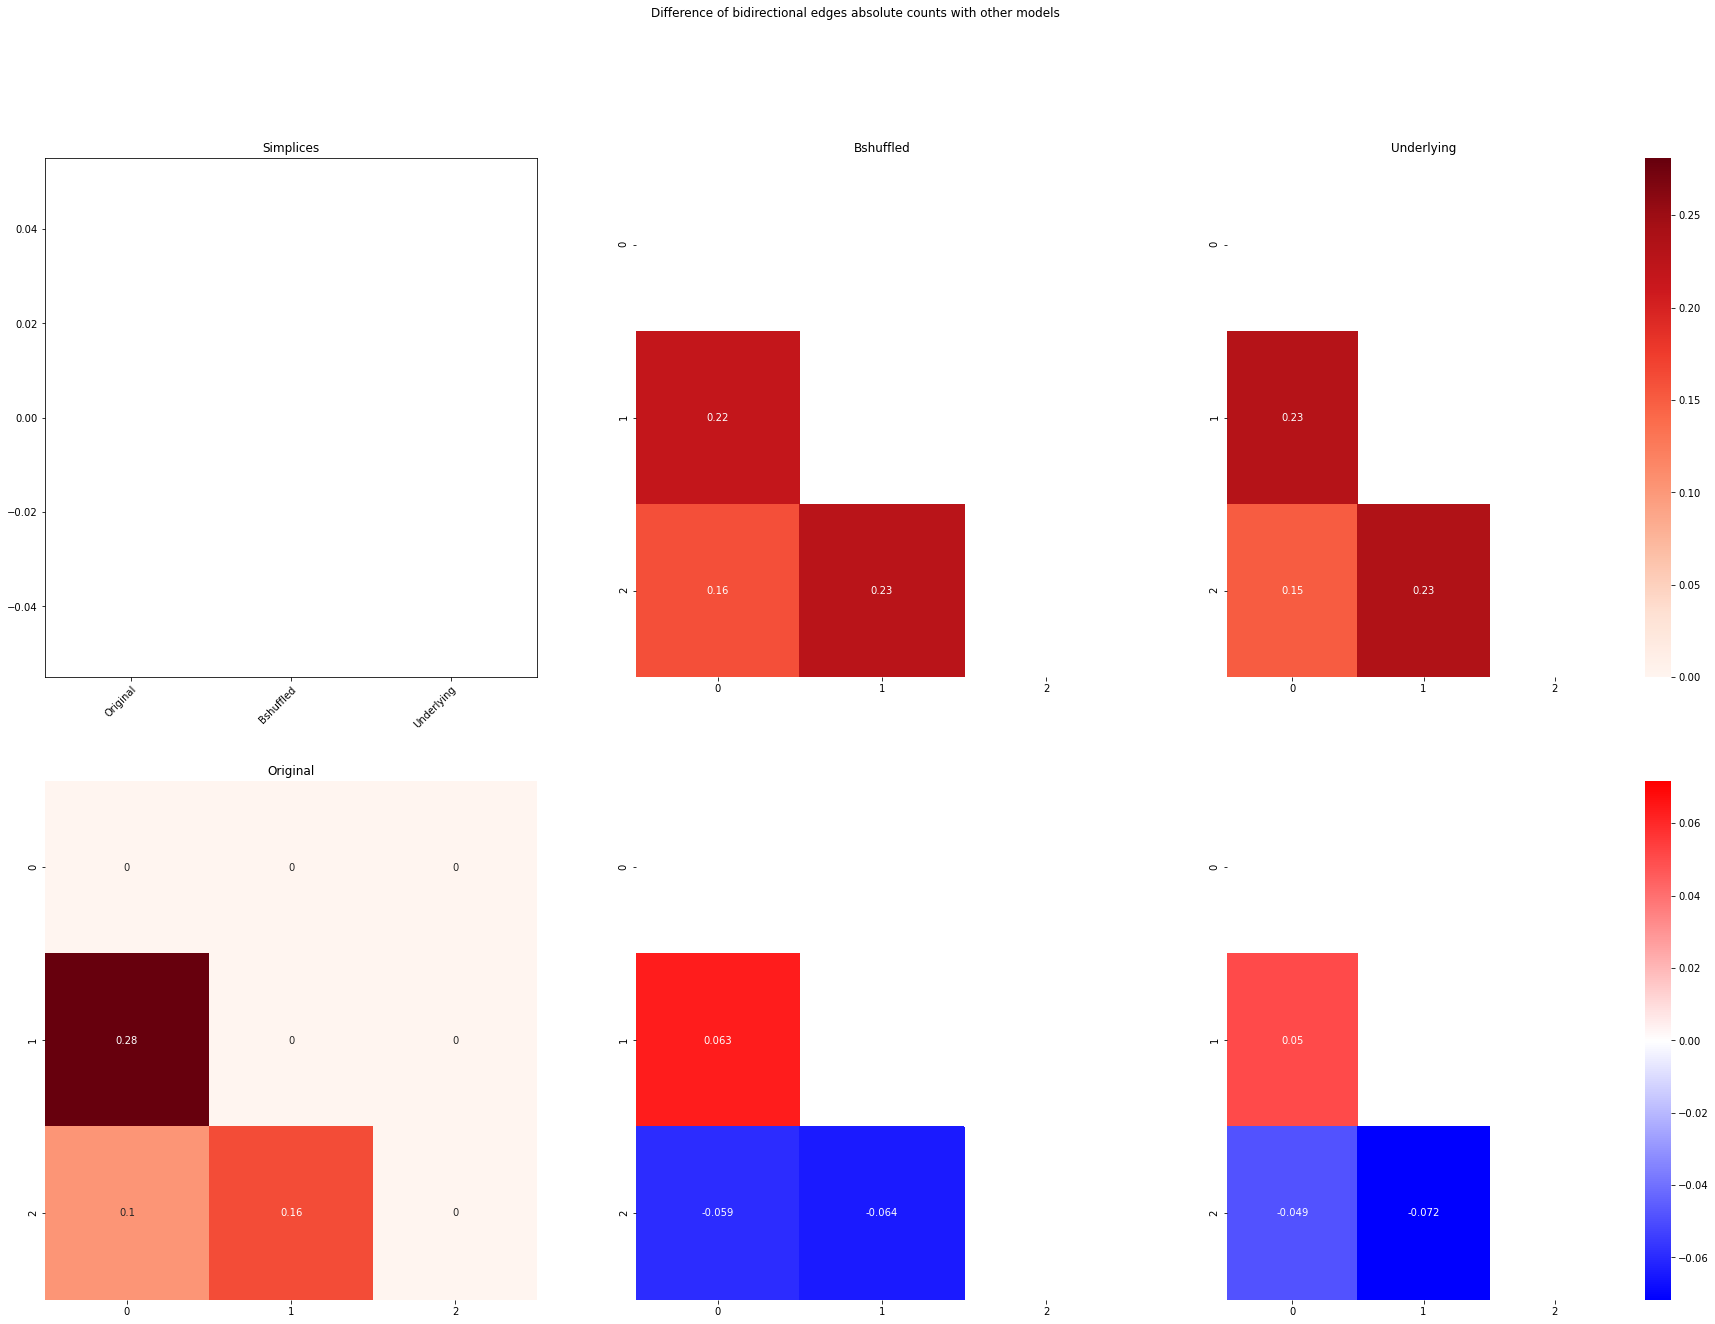

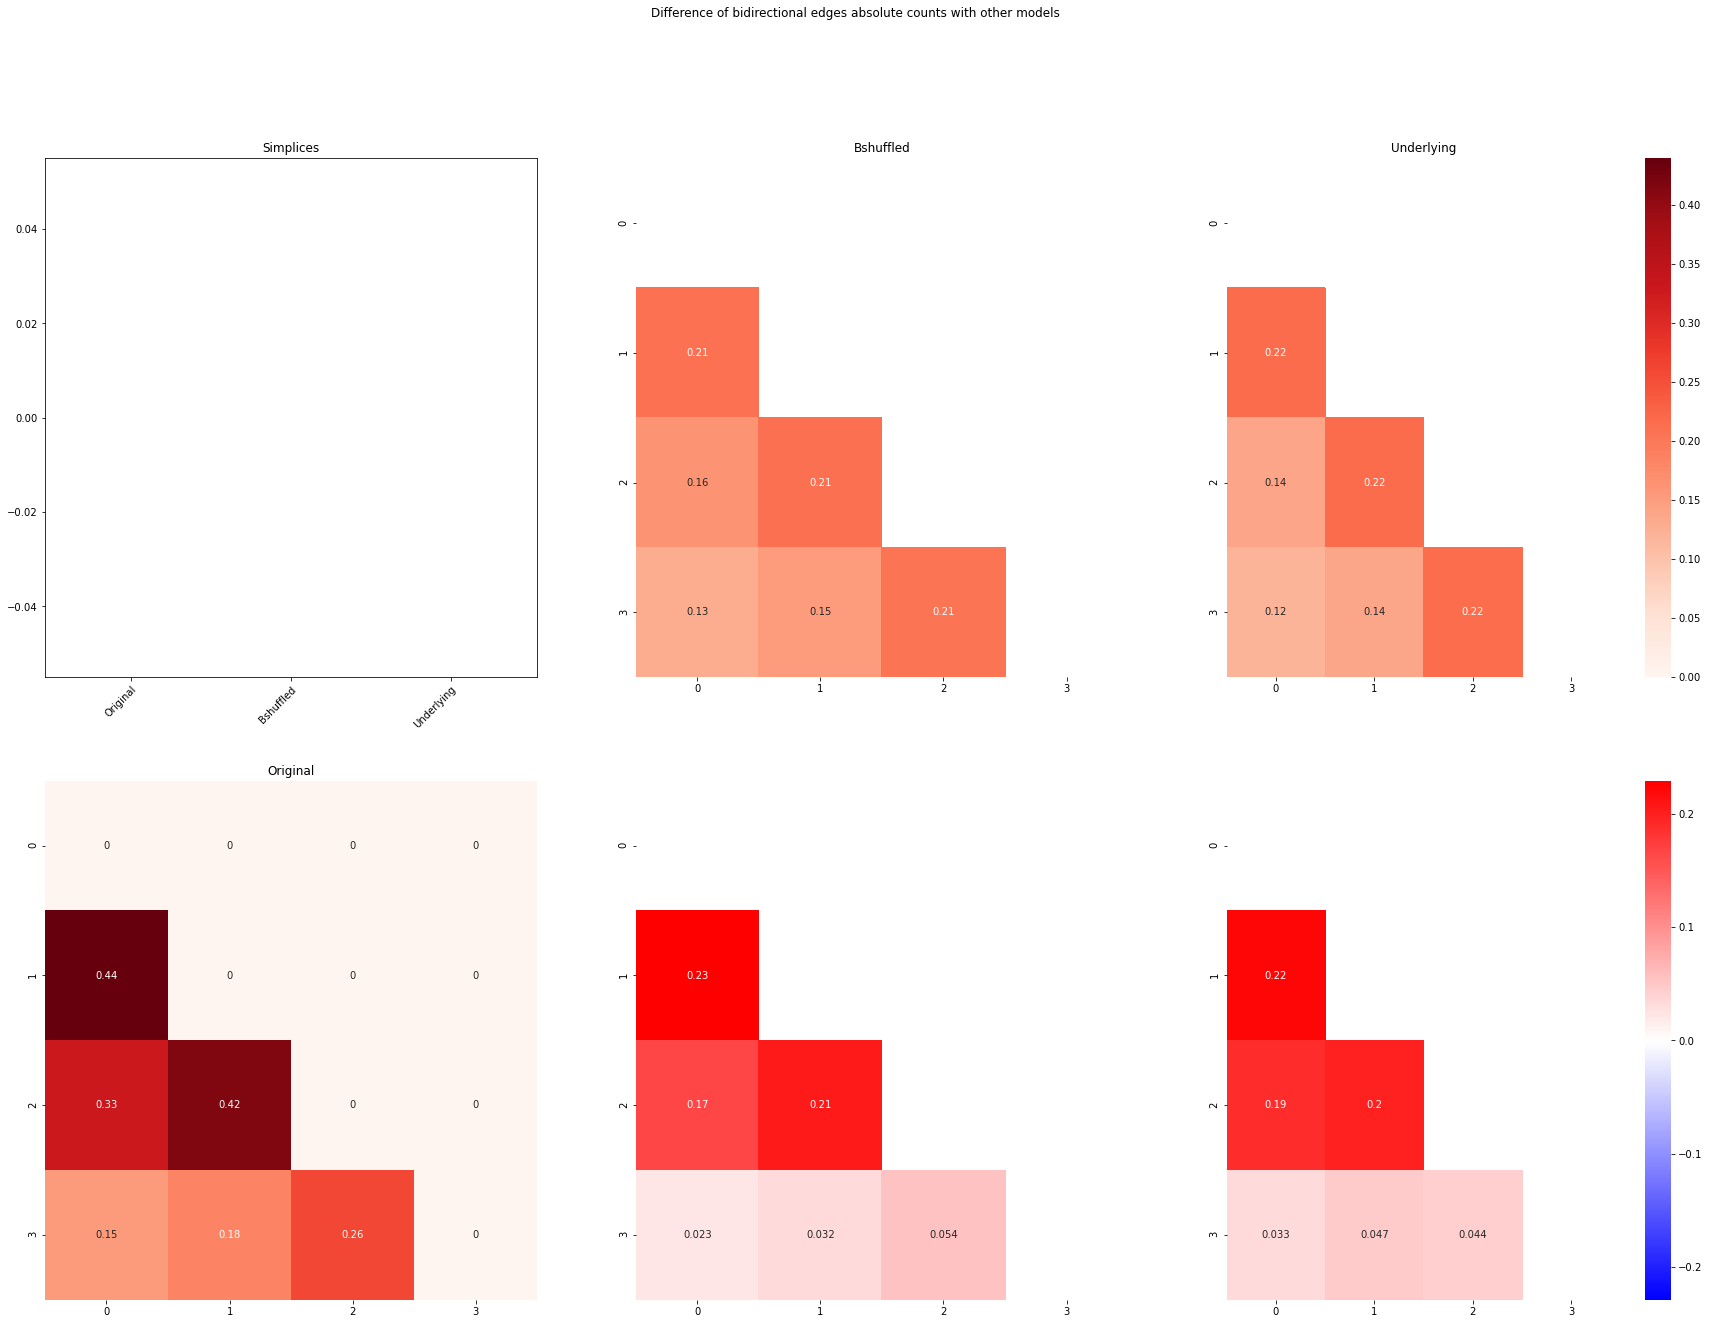

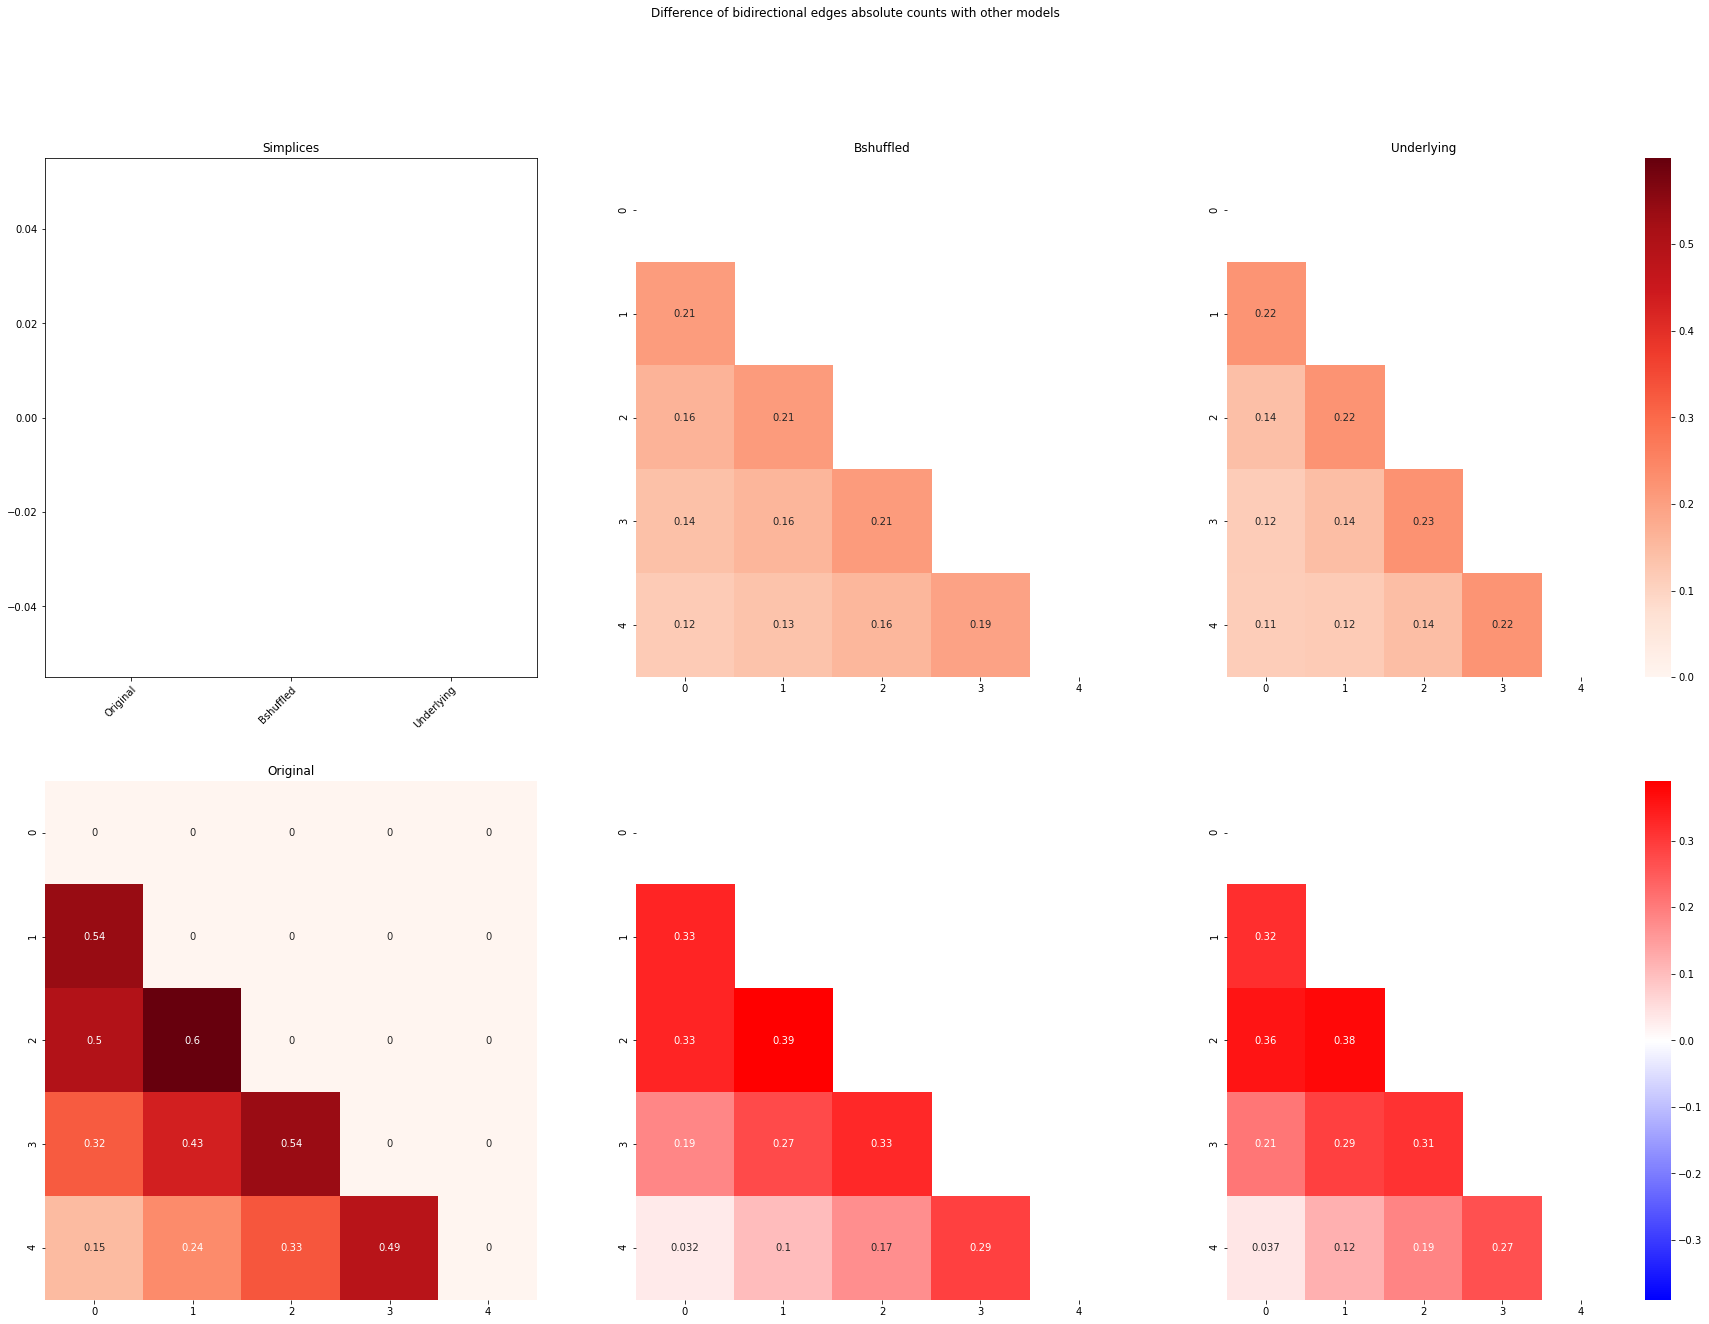

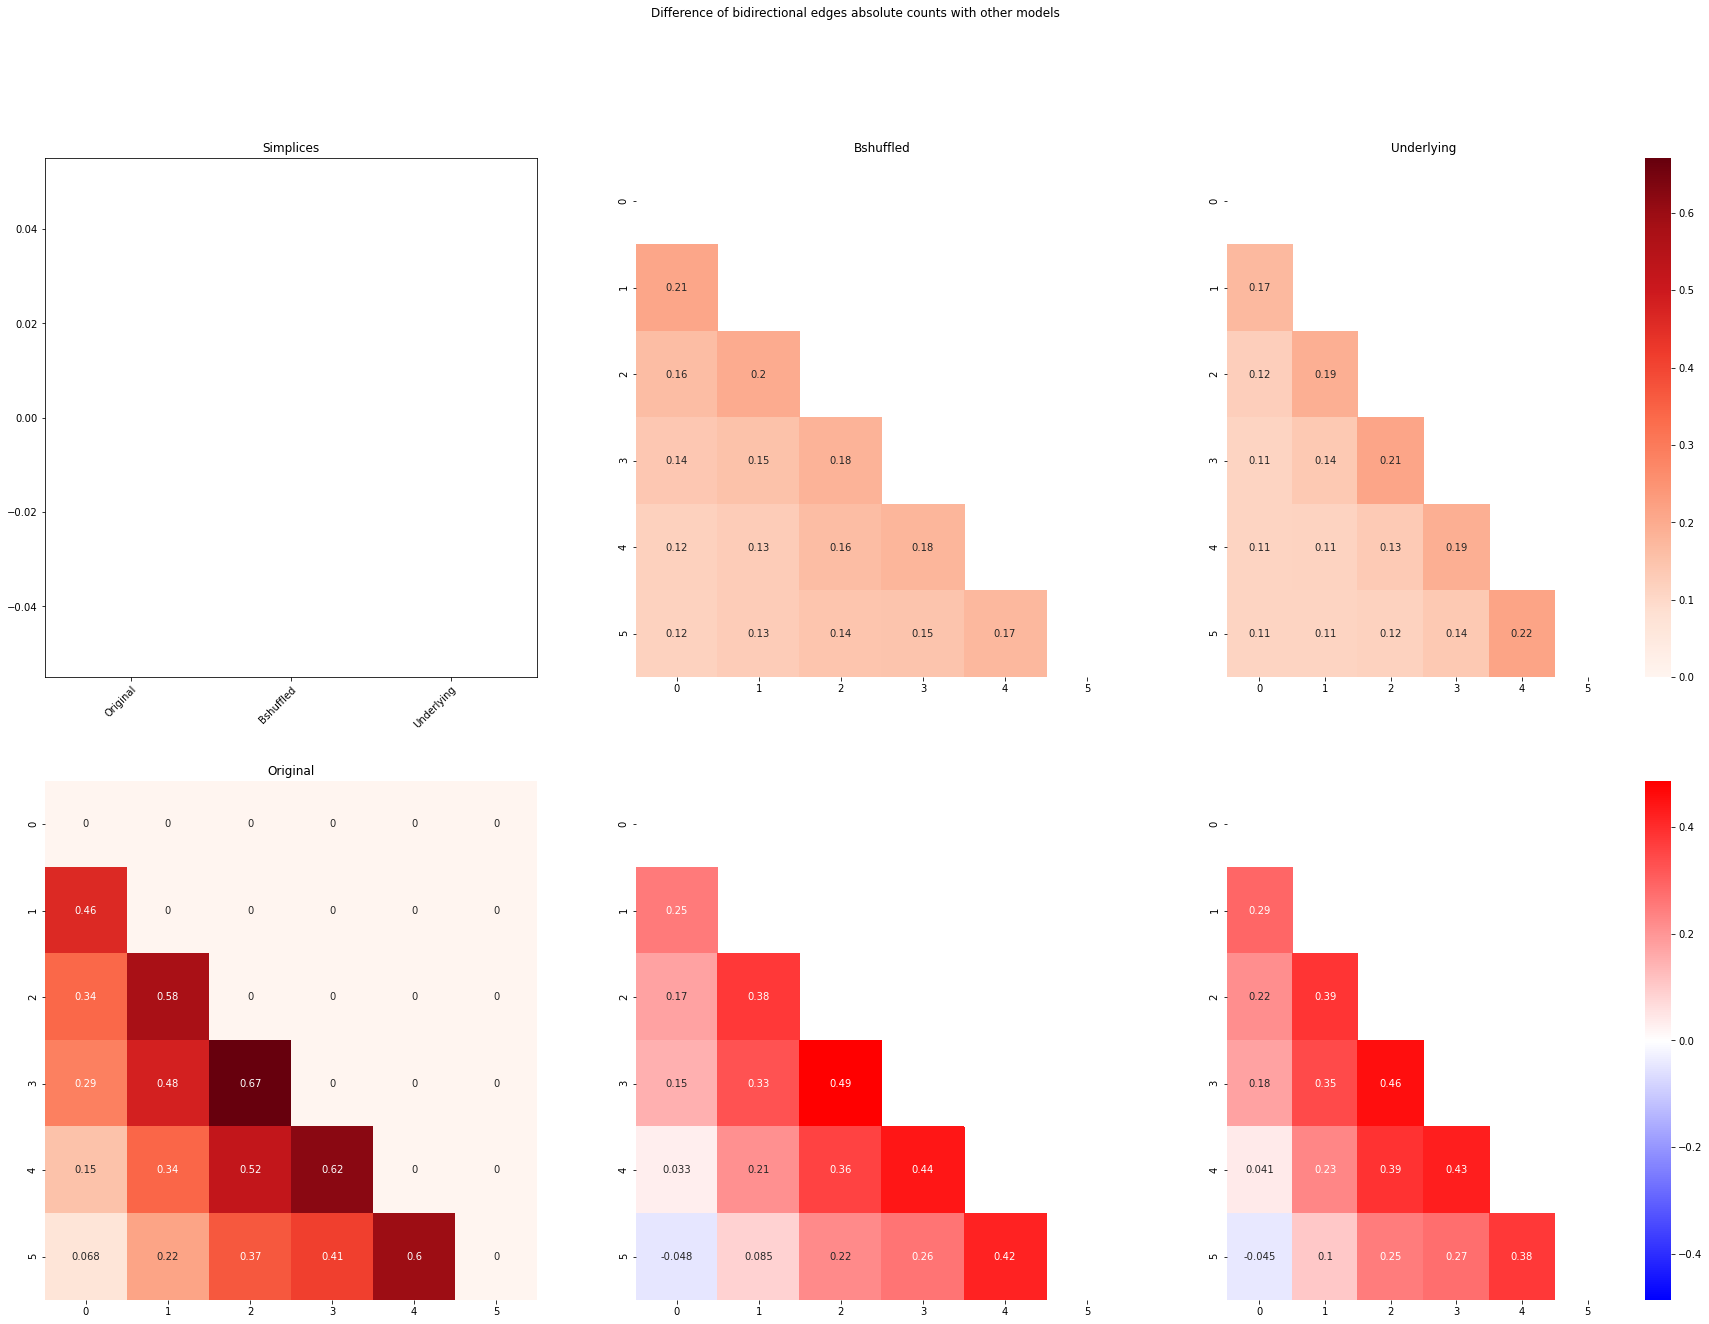

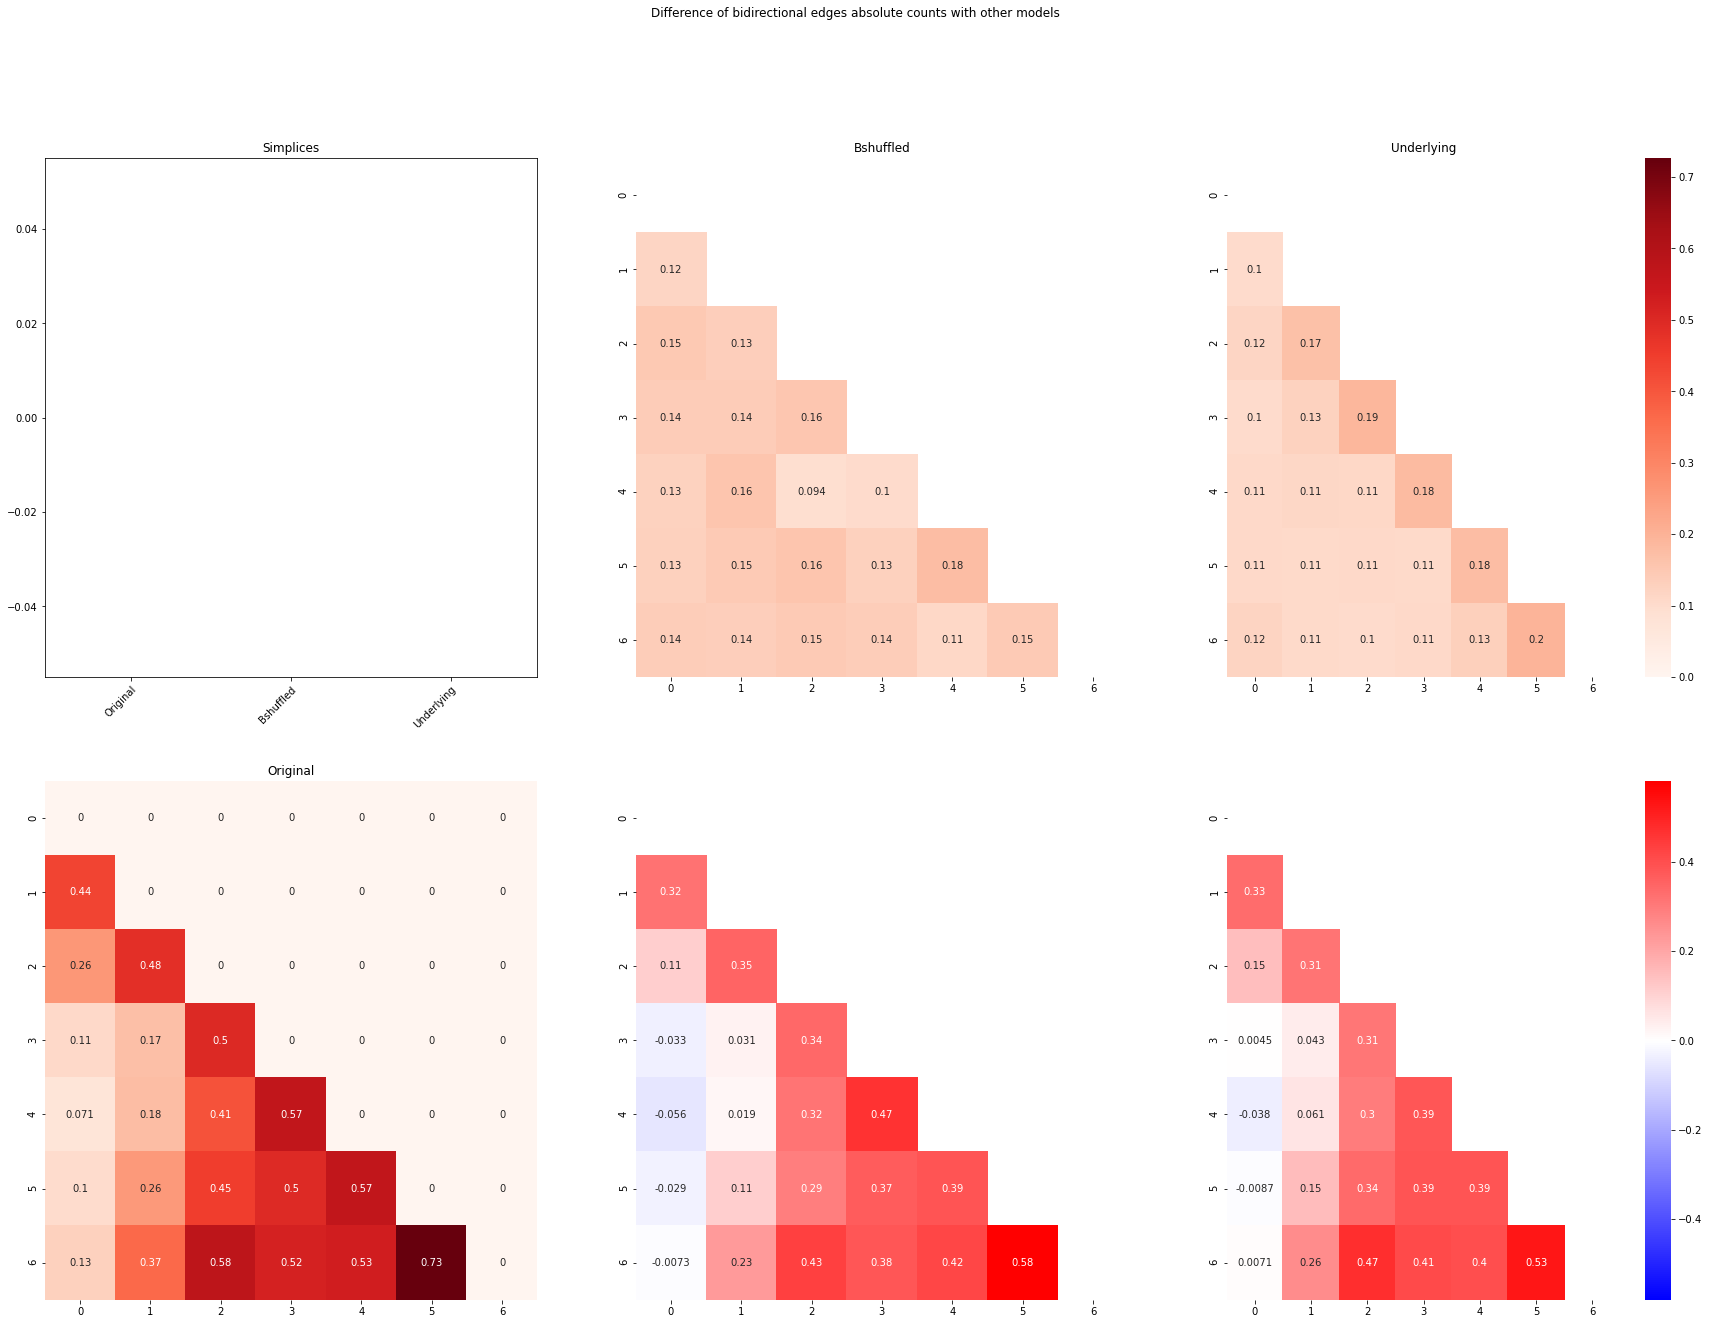

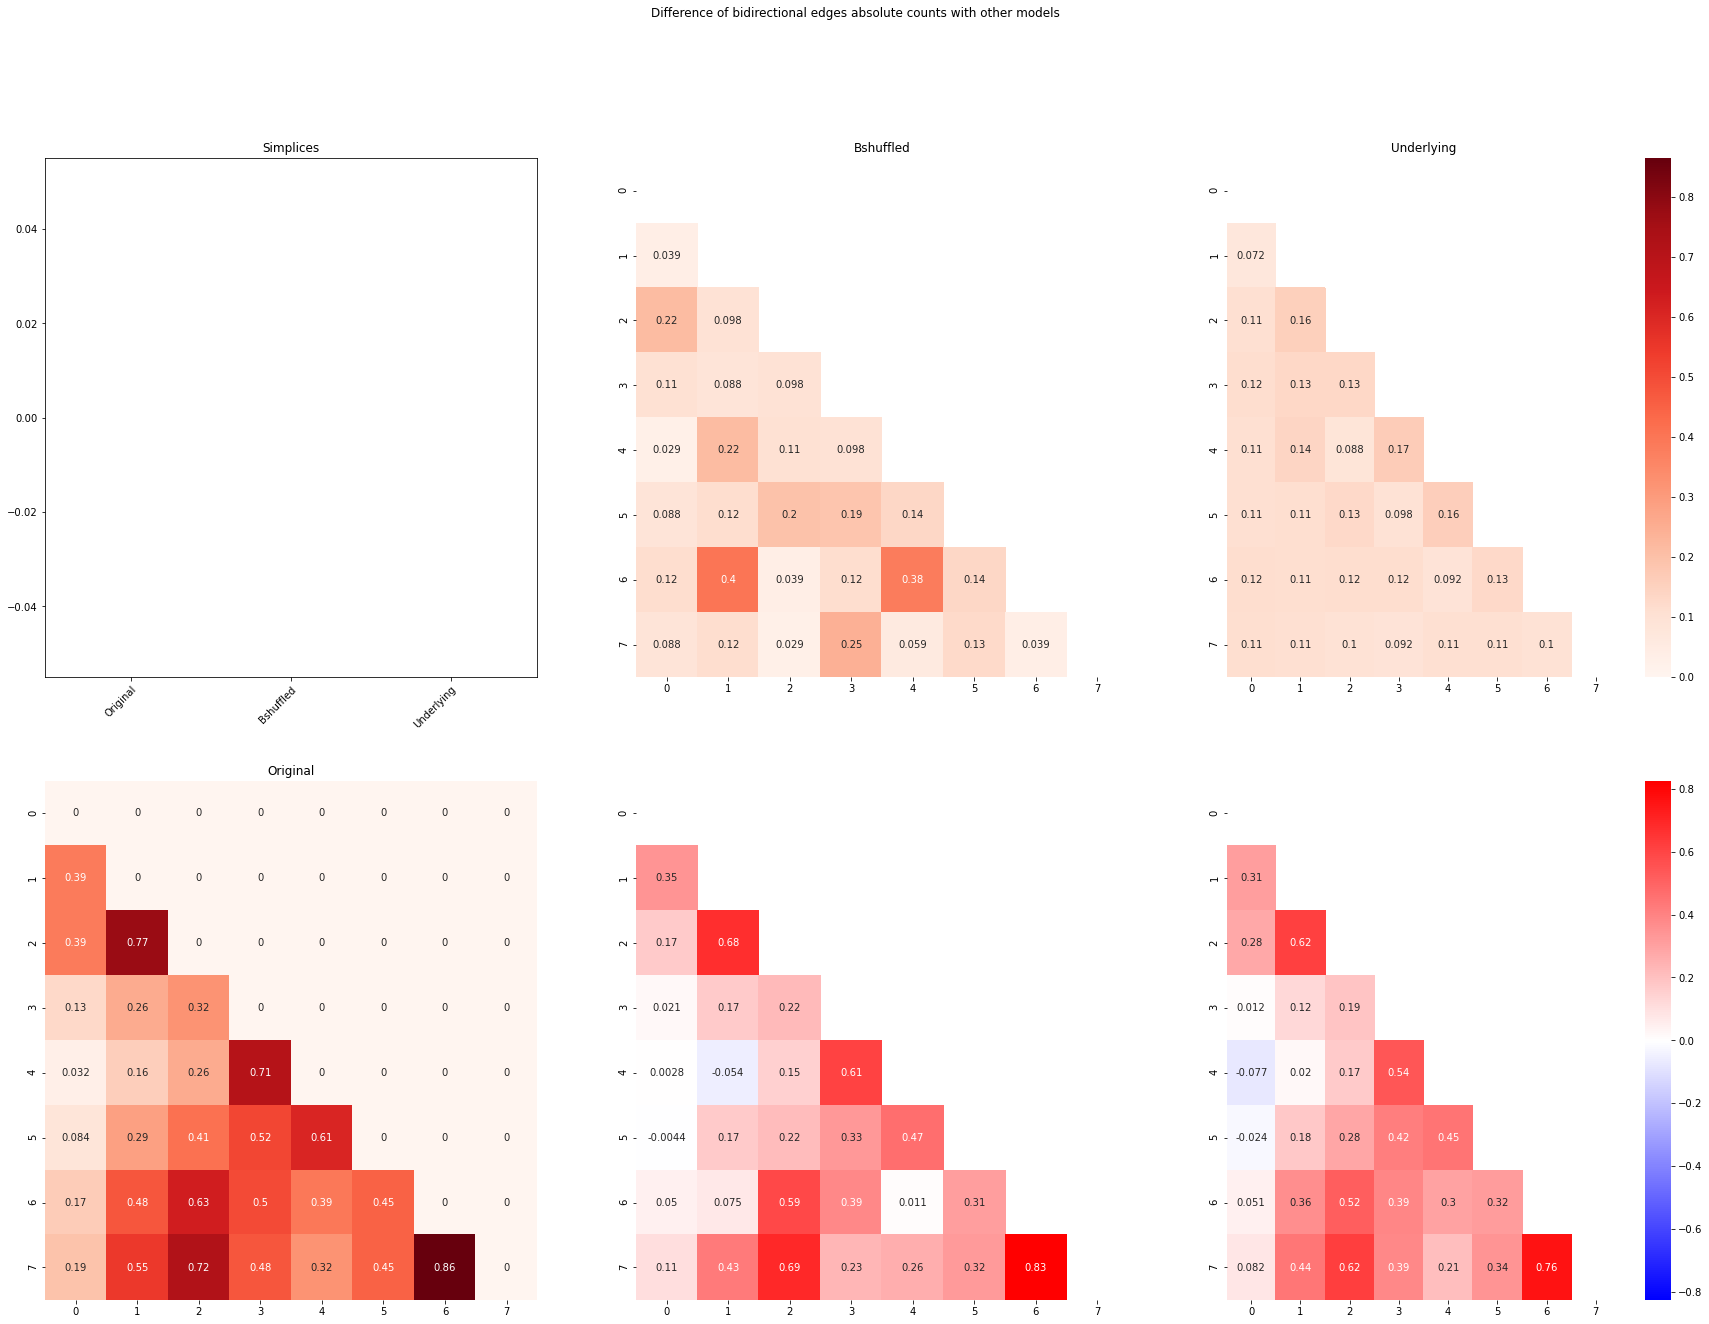

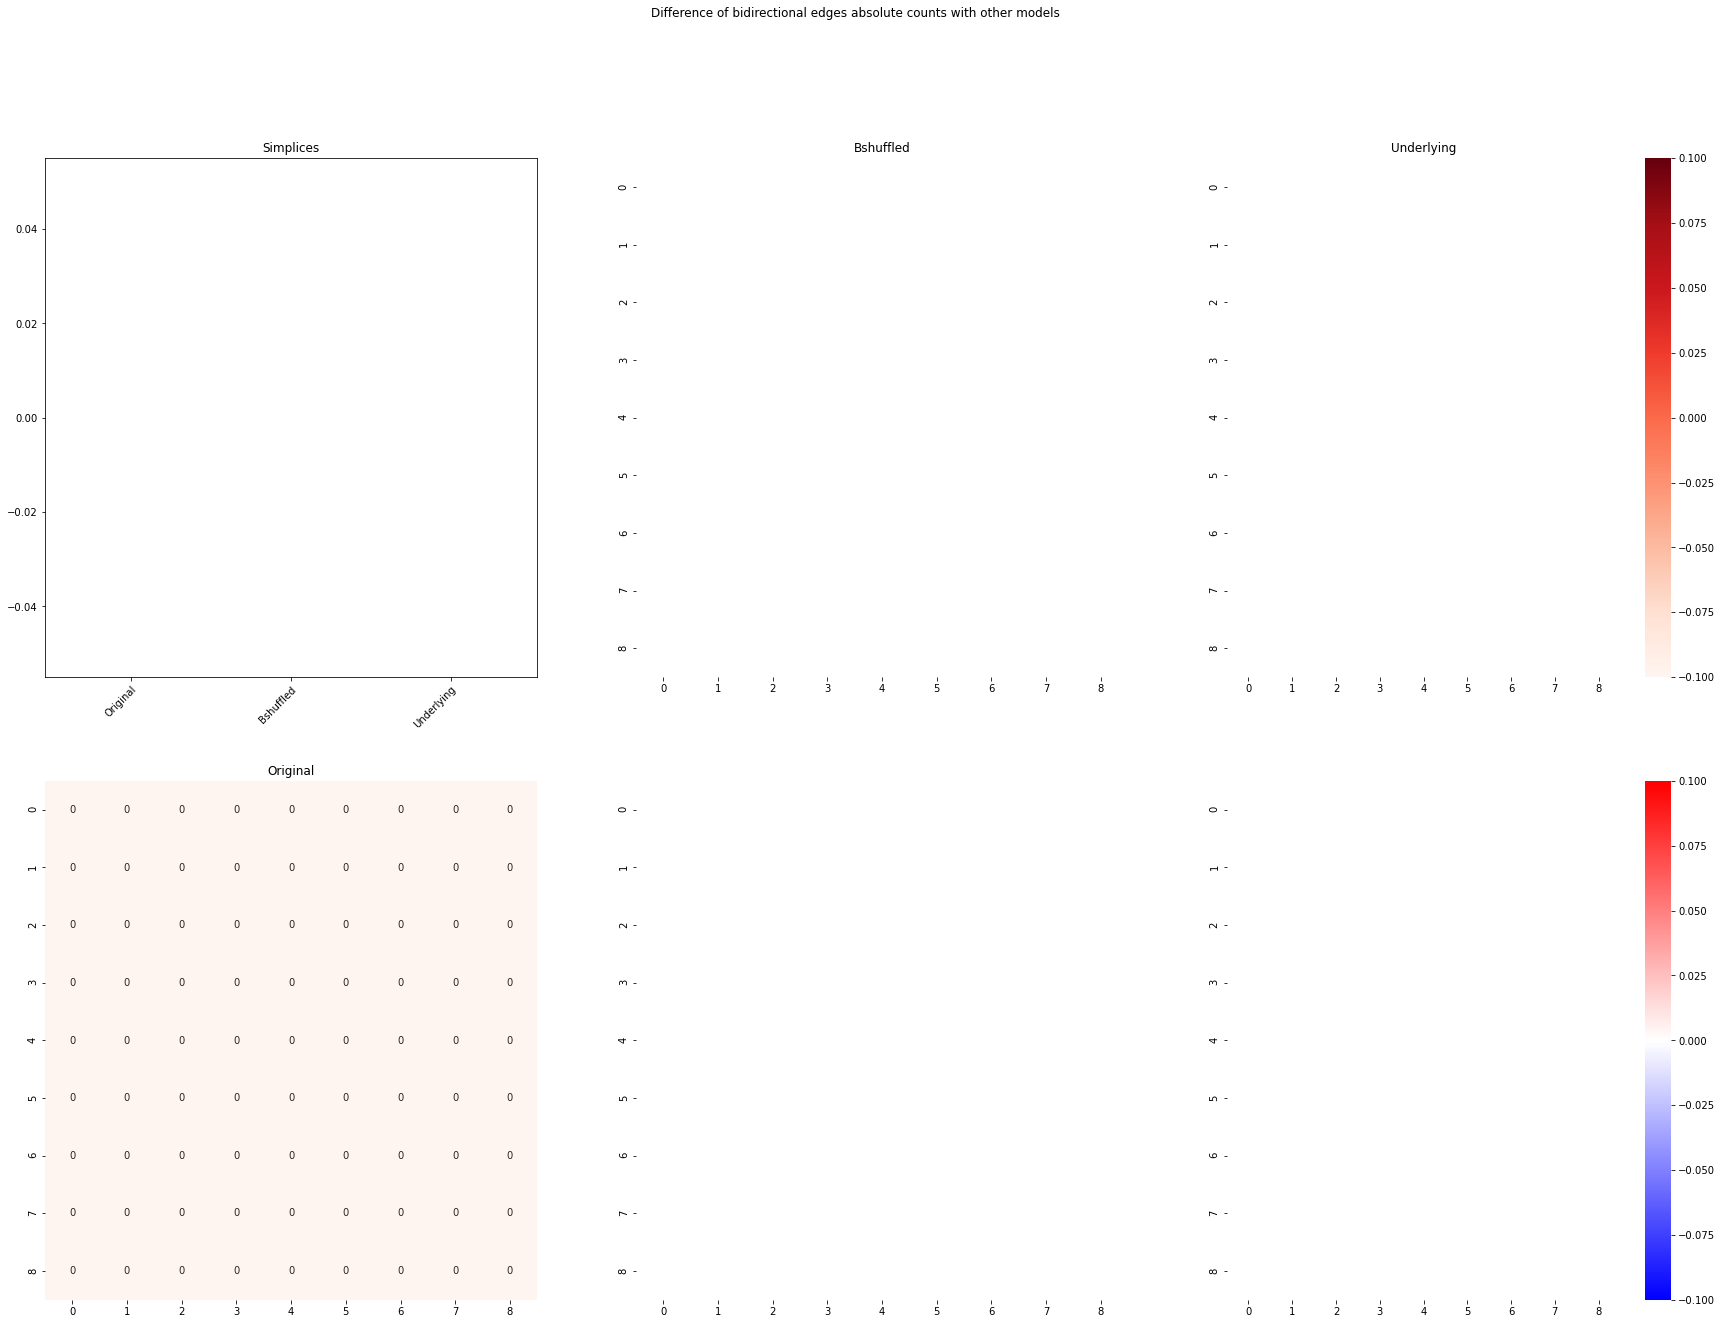

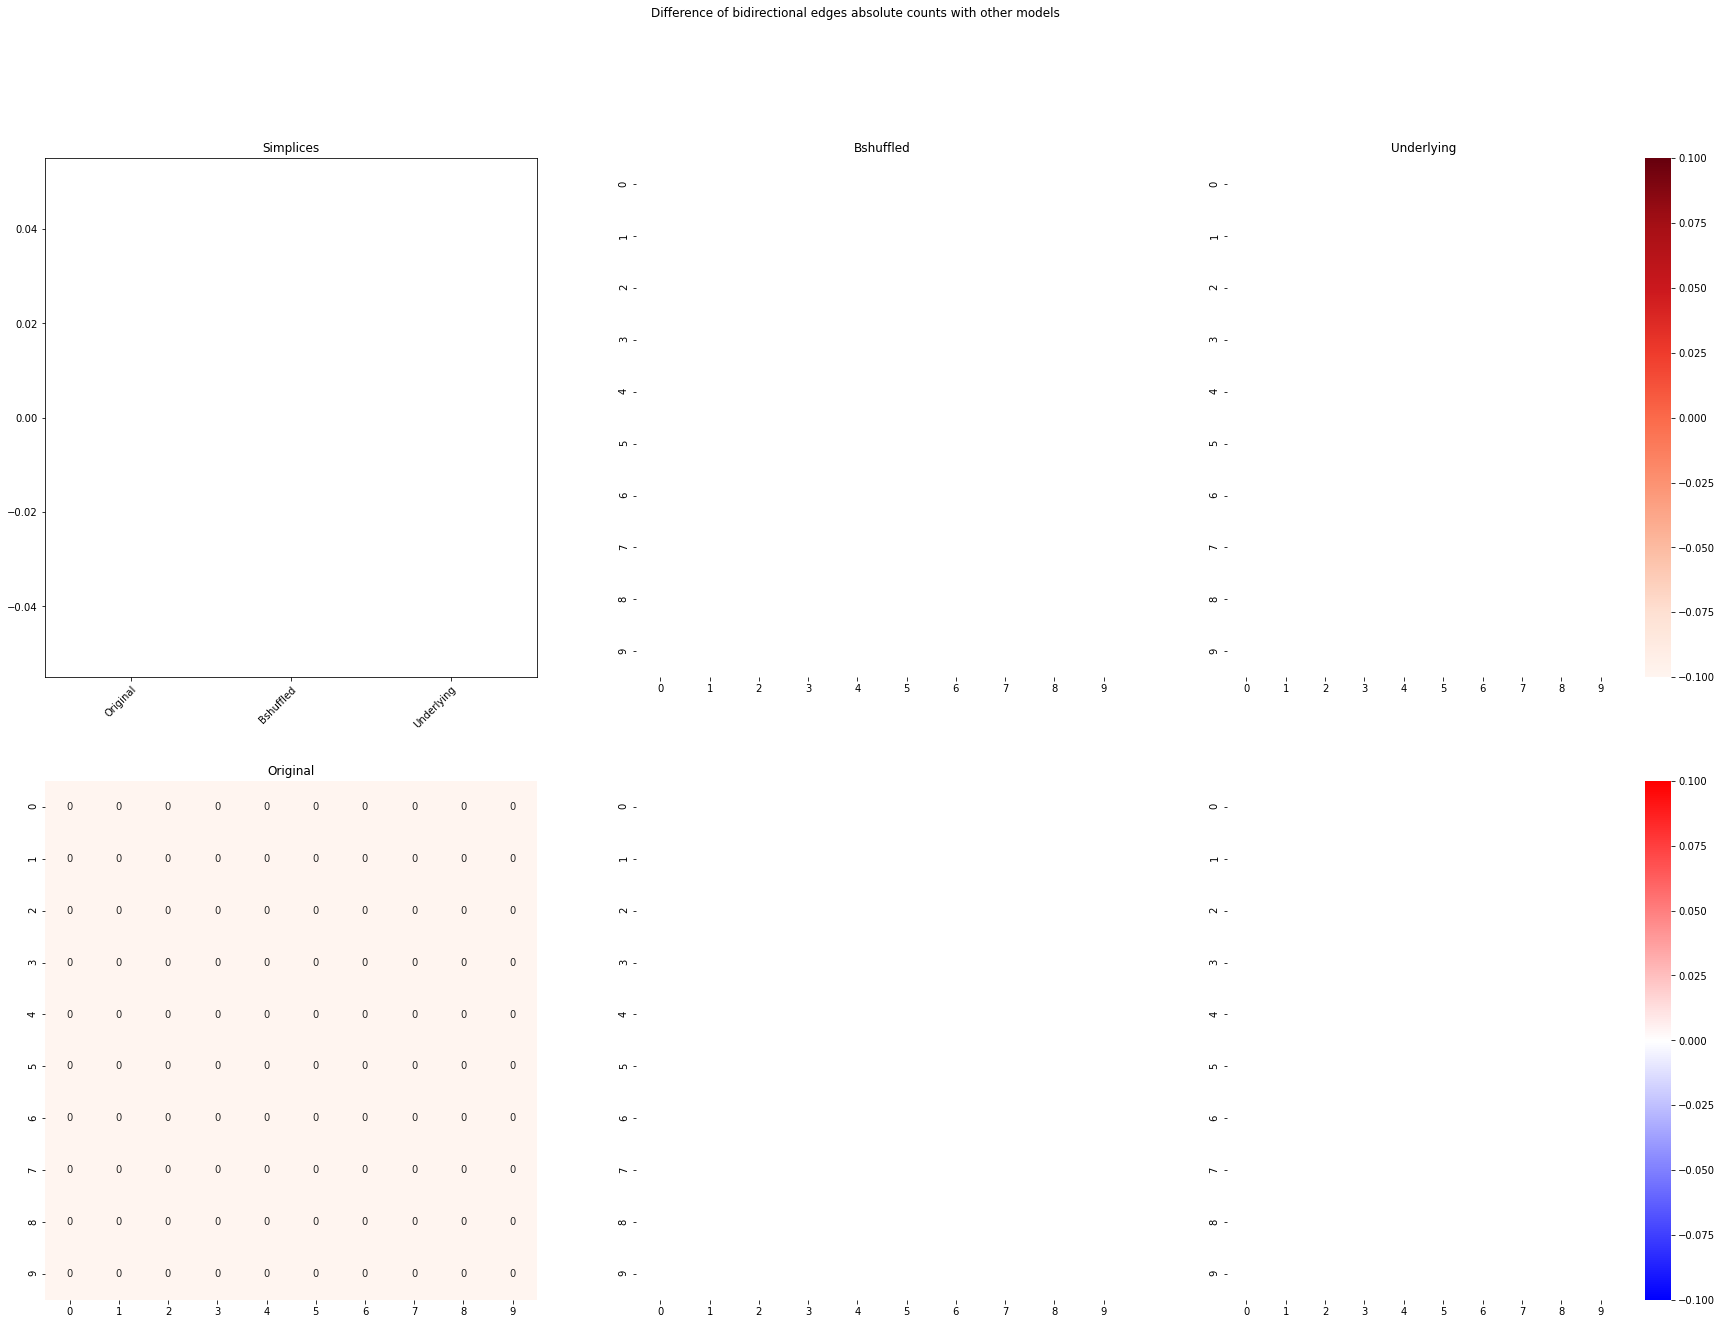

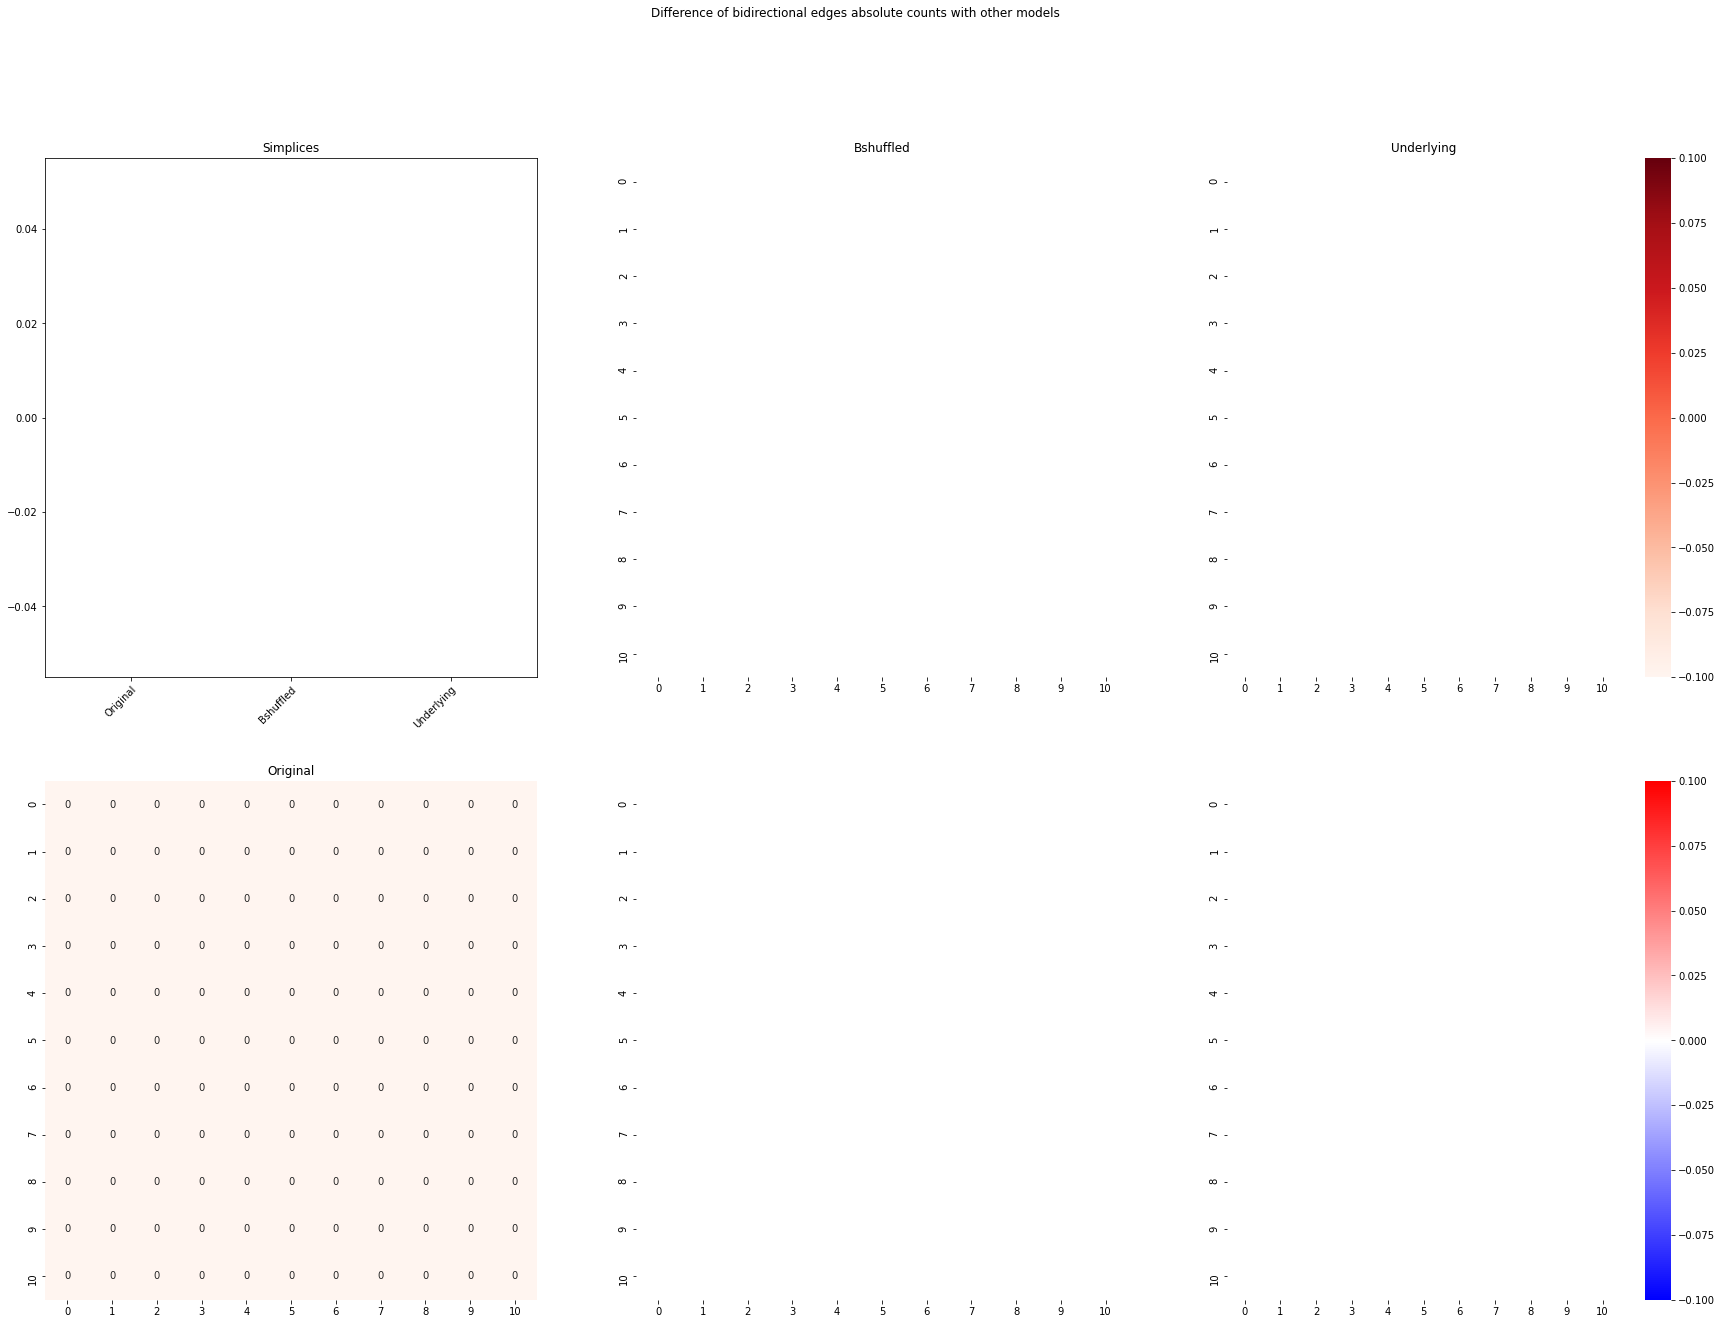

In [24]:
compare_graphs_diff([a,b,c], 1, "worm_mbcounts_norm_diff", title_list = ["Simplices","Original", "Bshuffled", "Underlying"])

# T-tests - bishuffled

## All simplices 

In [25]:
bcounts = []
for element in Path("").glob("data/worm_control/bishuffled/**/bcounts.pkl"):
    element_results = pickle.load(open(element, 'rb'))
    for key, item in element_results.items():
        element_results[key] = percent_transform(item)[0]
    bcounts.append(element_results)

In [26]:
worm_bcounts = pickle.load(open(Path("data/worm/full/bcounts.pkl"), 'rb'))
for key, item in worm_bcounts.items():
    worm_bcounts[key] = percent_transform(item)[0]


In [27]:
def compute_ostt(bcounts, column_bcounts, max_dim = 10):
    statistic_matrices = []
    pvalue_matrices = []
    diff_matrices = []
    for dimension in range(1,max_dim+1):
        statistic = np.zeros((dimension+1, dimension+1))
        pvalues = np.zeros((dimension+1, dimension+1))
        diff = np.zeros((dimension+1, dimension+1))
        for i in range(dimension):
            for j in range(i+1):
                hyp = column_bcounts[dimension][i+1][j]
                samples = [elem[dimension][i+1][j] for elem in bcounts]
                result = ttest_1samp(samples, hyp)
                statistic[i+1][j] = result[0]
                pvalues[i+1][j] = result[1]/2
                diff[i+1][j] = np.average(samples) - hyp
        statistic[statistic == 0] = np.nan
        pvalues[pvalues == 0] = np.nan
        diff[diff == 0] = np.nan
        statistic_matrices.append(statistic)
        pvalue_matrices.append(pvalues)
        diff_matrices.append(diff)
    return statistic_matrices, pvalue_matrices, diff_matrices

In [28]:
def plot_ostt(statistic_matrices, pvalue_matrices, diff_matrices, max_dim = 6, name = "ostt"):
    for dimension in range(1,max_dim+1):

        dvalue = np.nanmax(np.absolute(diff_matrices[dimension]))
        svalue = np.nanmax(np.absolute(statistic_matrices[dimension]))
        fig, axes = plt.subplots(1,3, figsize = (15,6))
        sns.heatmap(diff_matrices[dimension], cmap = cm.get_cmap('bwr'), ax = axes[0], annot = True,
                   vmin = -dvalue, vmax = dvalue)
        sns.heatmap(statistic_matrices[dimension], cmap = cm.get_cmap('bwr'), ax = axes[1], annot = True,
                   vmin = -svalue, vmax = svalue)
        sns.heatmap(np.log(pvalue_matrices[dimension]), cmap = cm.get_cmap('viridis'), ax = axes[2], annot = True)
        axes[0].set_title('Difference in count')
        axes[1].set_title('Difference in statistic')
        axes[2].set_title('Log10 of pvalue')
        fig.suptitle(f"Summary of t-tests in dim {dimension+1}")
        fig.savefig(name+str(dimension), facecolor = 'white')

In [29]:
def plot_significance_groups(statistic_matrices, pvalue_matrices, diff_matrices, max_dim = 6, name = "sgroups"):
    for dimension in range(1, max_dim+1):
        pvalue_matrix = pvalue_matrices[dimension]
        one_star = pvalue_matrix < 0.05
        two_star = pvalue_matrix < 0.01
        three_star = pvalue_matrix < 0.001
        significance_matrix = np.ones(pvalue_matrix.shape)
        significance_matrix += one_star
        significance_matrix += two_star
        significance_matrix += three_star
        significance_matrix = np.multiply(significance_matrix, -np.sign(statistic_matrices[dimension]))
        
        fig, ax = plt.subplots(1,1, figsize = (8,8))
        sns.heatmap(significance_matrix, cmap = cm.get_cmap('bwr'), ax = ax, annot = False,
                   vmin = -4, vmax = 4)
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks(np.linspace(-4,4,9))
        colorbar.set_ticklabels([
        "***, fewer counts",
        "**, fewer counts",
        "*, fewer counts",
        "ns, fewer counts",
        "equal counts",
        "ns, more counts",
        "*, more counts",
        "**, more counts",
        "***, more counts"
        ])
        ax.set_title(f"Significance of one-sided, one sample t-test of worm vs bishuffled, dim {dimension+1}")
        fig.savefig(name+str(dimension), facecolor = 'white')
        

In [30]:
statistic_matrices, pvalue_matrices, diff_matrices = compute_ostt(bcounts, worm_bcounts, max_dim = 10)

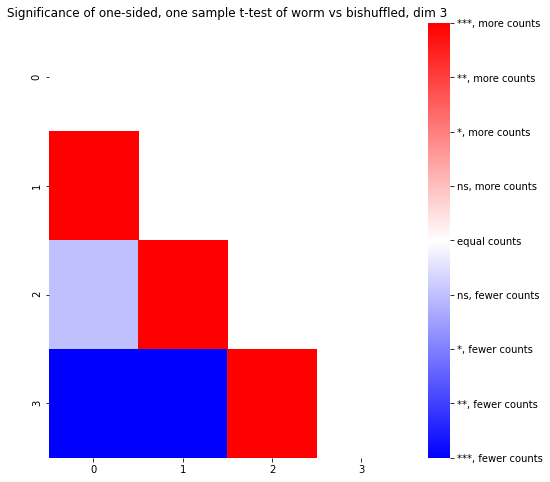

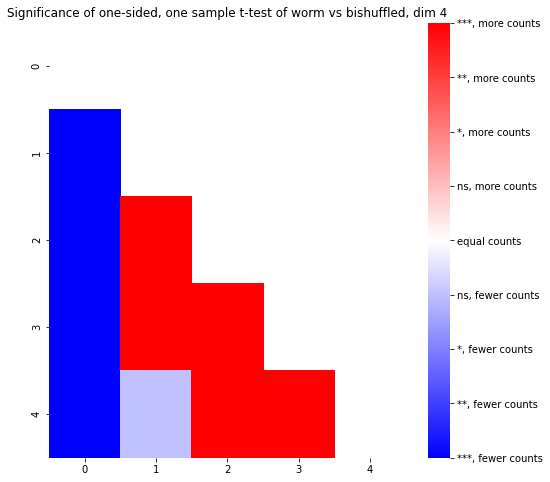

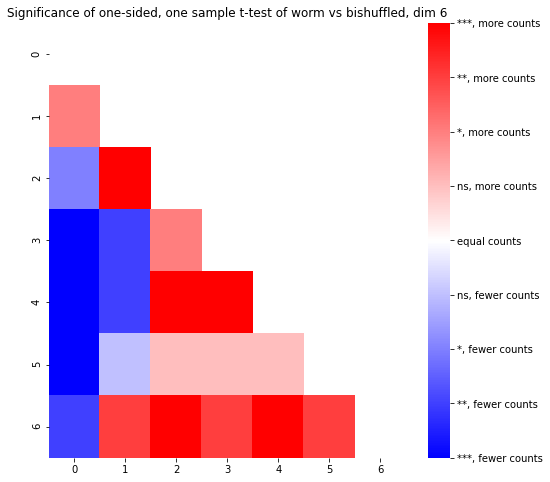

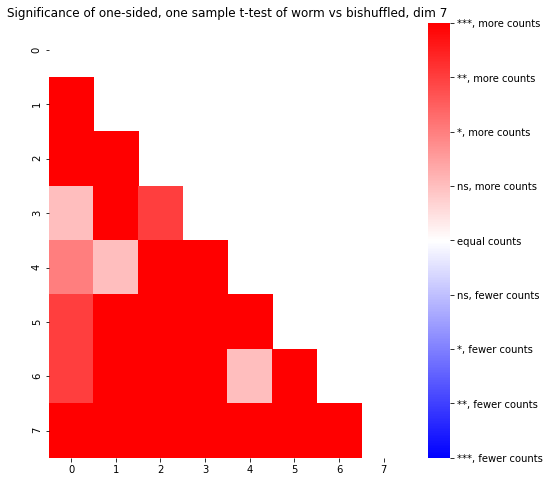

In [31]:
plot_significance_groups(statistic_matrices, pvalue_matrices, diff_matrices, name = "worm_bishuffled_ttest")

## Maximal simplices 

In [32]:
bcounts = []
for element in Path("").glob("data/worm_control/bishuffled/**/mbcounts.pkl"):
    element_results = pickle.load(open(element, 'rb'))
    for key, item in element_results.items():
        element_results[key] = percent_transform(item)[0]
    bcounts.append(element_results)

In [33]:
worm_bcounts = pickle.load(open(Path("data/worm/full/mbcounts.pkl"), 'rb'))
for key, item in worm_bcounts.items():
    worm_bcounts[key] = percent_transform(item)[0]


In [34]:
statistic_matrices, pvalue_matrices, diff_matrices = compute_ostt(bcounts, worm_bcounts, max_dim = 10)

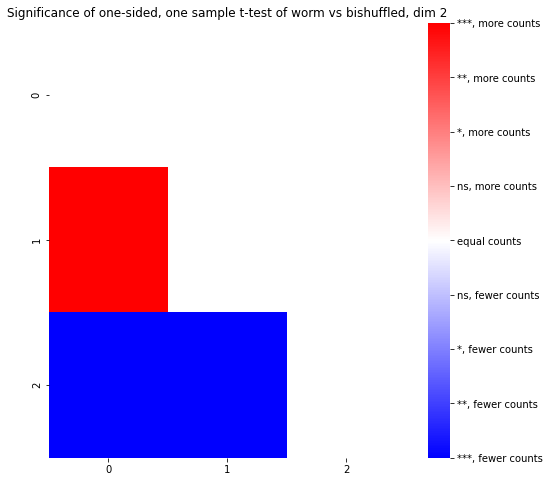

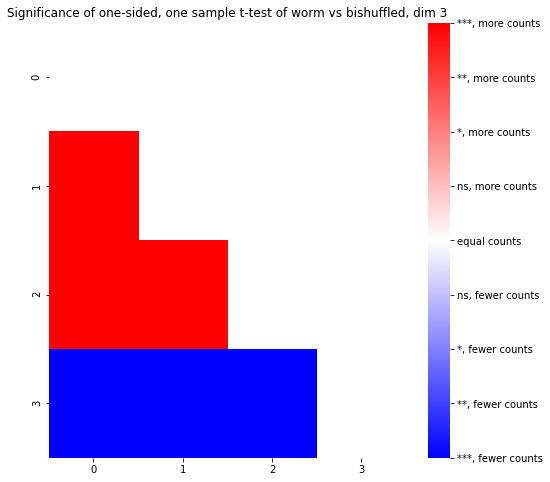

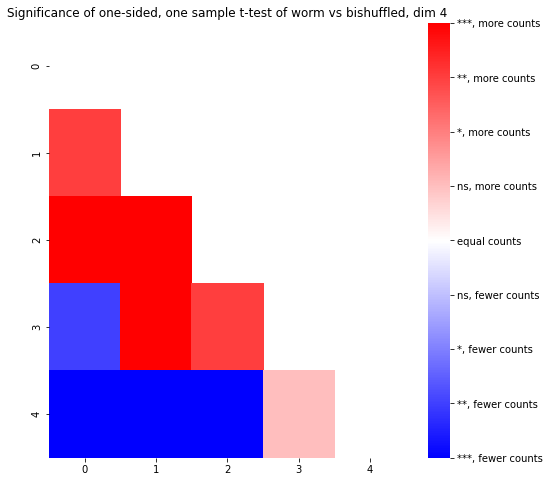

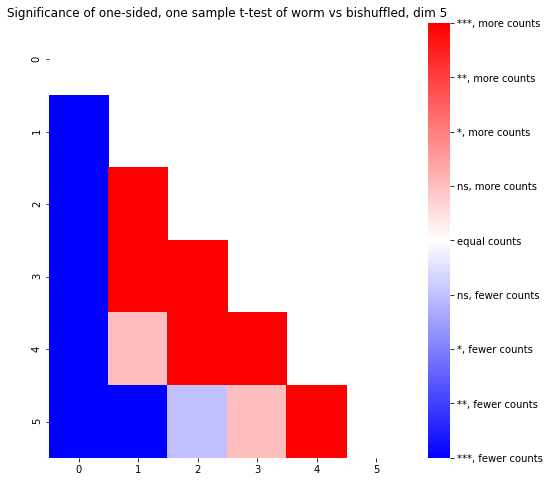

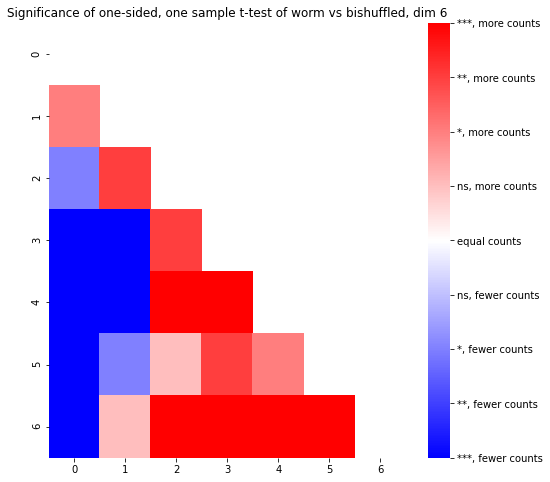

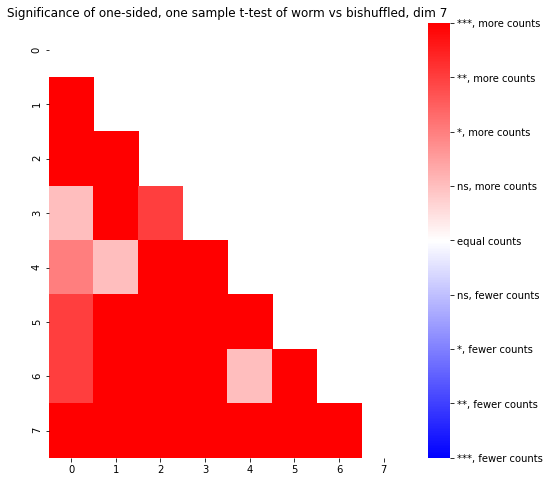

In [35]:
plot_significance_groups(statistic_matrices, pvalue_matrices, diff_matrices, name = "worm_bshuffled_ttest_maximal")

# Gaussianity?

In [36]:
c = np.array([results[4][-1,-2] for results in bcounts])

In [ ]:
c = np.array([results[4][-2,-3] for results in bcounts])

In [ ]:
plt.hist(c, bins=35)